# This code is for both Inbending AND Outbending momentum corrections
## Corrections are for the eπ+N, epπ+π-, epπ0, and Elastic Scattering channels
<!-- Note: This code must load pre-made root files with histograms -->

.

.

## Initial Code (always run first)

In [1]:
%reset -f
import ROOT, numpy
ROOT.gStyle.SetTitleOffset(1.3,'y')
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

ll, ll2 = ROOT.TLine(), ROOT.TLine()
ll.SetLineColor(2)
ll2.SetLineColor(1)



class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    DELTA = '\u0394' # symbol
    END = '\033[0m'


print("Code has started running...")

Welcome to JupyROOT 6.22/06
Code has started running...


.

.

.

# Initial Choices

.

# Choice of File/Data types

In [2]:
# Inbending or Outbending files?
Selection_of_In_or_Out = "Inbending"
Selection_of_In_or_Out = "Outbending"


# Data set from RG-A (Spring data may not be currently compatible - need to rerun)
Selection_Data_Set = "Fall2018"
# Selection_Data_Set = "Spring2019"


# Type of exclusive event
event_type = "SP" # Single Pion Channel (ep->eπ+N)
event_type = "DP" # Double Pion Channel (ep->epπ+π- --- also uses the π0 channel for the ∆P histograms)
# event_type = "P0" # π0 Channel (ep->epπ0)
# event_type = "ES" # Elastic Scattering Channel (ep->e'p')



MM_type = "epipX" # Use for single pion channel (select with event_type = "SP")
MM_type = "eppipX" # Use for double pion channel (select with event_type = "DP")
# MM_type = "eppi0X" # Use for π0 channel (select with event_type = "P0")
# MM_type = "epX" # Use for elastic scattering channel (select with event_type = "ES")


print("".join(["\nStarting ", MM_type, " ", str(Selection_of_In_or_Out), " (from ", Selection_Data_Set.replace("20", " 20"), ")...\n"]))



Starting eppipX Outbending (from Fall 2018)...



.

.

.

.


# Save Results?

In [3]:
SaveResultsQ = 'yes'
# SaveResultsQ = 'no'


print("".join(["\nSaving results? ", color.BOLD, str(SaveResultsQ), color.END, "\n"]))




Saving results? yes



.


.

# Print Method

Decides which orientation the plots will be drawn in (i.e., 3x2 horizontal canvases or 2x3 vertical canvases)

In [4]:
print_method = "ver"
print_method = "hor"

print("".join(["\nSaving Vertically or Horizontally? ", color.BOLD, "Vertically (Better for wikipage)" if print_method == "ver" else "Horizontally", color.END, "\n"]))

# print_method decides which orientation the plots will be drawn in (not affected by the choice to save)


Saving Vertically or Horizontally? Horizontally



.

.

# Initializing Alerts...

The following cell makes an alarm that will sound off at various points of this code in order to notify the user of the code's progress. Each alert can be turned off from here

In [5]:
# To run an alert, set the variable to 'yes' (tells the code to run that alert)

# 'runAlert' is the main alert command which will sound off after the last line of this code to notify you that the whole code is finished (must always run this alert if any other one is to be run)
runAlert = 'yes'
# runAlert = 'no'

# 'runAlertErrorH' is the alert for when the ∆P histograms are run
runAlertErrorH = 'yes'
# runAlertErrorH = 'no'

# 'runAlertMLoop' is the alert for when the Missing Mass histograms are run
runAlertMLoop = 'yes'
# runAlertMLoop = 'no'


final_Only = "no"
# final_Only = "yes"


if(runAlert == 'yes' and final_Only != "yes"):
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        framerate = 44100
        duration = 1
        freq = 300
        t = np.linspace(0, duration, framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
    alert()
    
    print("\nAlert has been set.\n")
    
else:
    runAlertErrorH, runAlertMLoop = 'no', 'no'
    print("\nThere will be no alerts when this code is run.\n")


Alert has been set.



.

.

.

.

# Loading RDataFrame (Input file)

In [6]:
# Run with ∆p? (This option is to make sure that the ∆p histograms are only run when the file is known to have that information available - Just a small safety measure to prevent some crashes)
RunDpQ = 'yes'
# RunDpQ = 'no'



if(Selection_Data_Set != "Spring2019"):
    
    
    if(MM_type == "epipX"):
        

        general_batch_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Data_Files/Single_Pion_Channel_epipN/", str(Selection_of_In_or_Out), "/"])
        file_name = "".join(["Single_Pion_Channel_epipX_", Selection_of_In_or_Out,"_With_Dp_VFinal_SP", "8" if "In" in Selection_of_In_or_Out else "8" , "_File_All.root"])
        # Single pion files above are not up-to-date
        
        
        Extra_Part_of_Name = "_GitHub_SP_New_W"
        
        general_batch_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Single_Pion_Channel_epipN/", str(Selection_of_In_or_Out), "/"])
        file_name = "".join(["Single_Pion_Channel_epipX_", Selection_of_In_or_Out, "_With_Dp", Extra_Part_of_Name, "_File_All.root"])
        
    elif(event_type != "ES"):
        # Inbending_Version = "_VFinal_SP_V8_Pro"
        # Outbending_Version = "_VFinal_SP_V5_Pro"

        Inbending_Version = "_GitHub_F2_Pro"
        Outbending_Version = "_GitHub_F2_Pro"
        
        batch_pi0_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Pi0_Channel_eppi0/", str(Selection_of_In_or_Out), "/"])
        batch_2pion_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Double_Pion_Channel_eppippim/", str(Selection_of_In_or_Out), "/"])
        
        file_name_pi0 = "".join(["Pi0_Channel_eppi0X_", Selection_of_In_or_Out, "_With_Dp", str(Inbending_Version) if "In" in Selection_of_In_or_Out else str(Outbending_Version), ".root"])
        file_name_2pion = "".join(["Double_Pion_Channel_eppipX_", Selection_of_In_or_Out, "_With_Dp", str(Inbending_Version) if "In" in Selection_of_In_or_Out else str(Outbending_Version) , "_File_All.root"])
                
        if(MM_type == "eppipX"):
            general_batch_file_location = batch_2pion_file_location
            file_name = file_name_2pion

        if(MM_type == "eppi0X"):
            general_batch_file_location = batch_pi0_file_location
            file_name = file_name_pi0
            
    else:
        
        Extra_Part_of_Name = "_GitHub_Elastic_V3"
        Extra_Part_of_Name = "_GitHub_Elastic_CD_V1"
        Extra_Part_of_Name = "_GitHub_Elastic_CD_New_V1"
        Extra_Part_of_Name = "_GitHub_Valerii_V1"
        
        
        general_batch_file_location = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/Data_Files/Elastic_Scattering_Channel_ep/", str(Selection_of_In_or_Out), "/"])
        file_name = "".join(["Elastic_Scattering_epX_", Selection_of_In_or_Out, "_With_Dp", Extra_Part_of_Name, "_File_All.root"])


    
if(Selection_Data_Set == "Spring2019"):
    general_batch_file_location = "/lustre19/expphy/volatile/clas12/richcap/Summer2021/jupyter/Batch_Code/Data_Files/Spring2019/Root_Histogram_Creation/"
    file_name = "epipX_Inbending_With_Dp_Spring2019_File_ePiNCND_All.root"
    

    
    
    
    
    
running_code_with_these_files = "".join([str(general_batch_file_location), str(file_name)])


rdf = ROOT.TFile(str(running_code_with_these_files))

if(MM_type == "eppipX"):
    try:
        pro_other_df = ROOT.TFile(str("".join([str(batch_pi0_file_location), str(file_name_pi0)])))
    except:
        print("Error in extra proton correction")
if(MM_type == "eppi0X"):
    try:
        pro_other_df = ROOT.TFile(str("".join([str(batch_2pion_file_location), str(file_name_2pion)])))
    except:
        print("Error in extra proton correction")
    


print("\nRDataFrame has been loaded.\n")
# File location relative to this file:
print("".join(["Running code with files located here: \n\t", str(file_name)]))
if(MM_type != "epipX" and (event_type != "ES")):
    print("".join(["     ", color.BOLD, "and", color.END, "\n\t", file_name_pi0 if(MM_type == "eppipX") else file_name_2pion]))
print("")


RDataFrame has been loaded.

Running code with files located here: 
	Double_Pion_Channel_eppipX_Outbending_With_Dp_GitHub_F2_Pro_File_All.root
     and
	Pi0_Channel_eppi0X_Outbending_With_Dp_GitHub_F2_Pro.root



.

.

.

# Printing the Columns of RDataFrame

In [7]:
CheckDataFrameQ = 'n'
# CheckDataFrameQ = 'y'



if(CheckDataFrameQ == 'y'):
    print("\nPrinting the full list of histogram names saved in the root file loaded...\n")
    for ii in rdf.GetListOfKeys():
        # print(ii.GetName() + ii.GetType())
        print(str(ii.GetName()) + "   -----   object type: " + str(type(rdf.Get(ii.GetName()))))
    print("".join(["\tTotal length= ", str(len(rdf.GetListOfKeys()))]))
    
else:
    print("\nNot printing the full list of histograms saved in the file loaded.")
    print("\n\tTo see what variables are available to be referenced by the code, let CheckDataFrameQ = 'y'\n\t(Does not affect how the rest of the code runs)")
print("".join(["\nTotal number of histograms available = ", str(len(rdf.GetListOfKeys()))]))



Not printing the full list of histograms saved in the file loaded.

	To see what variables are available to be referenced by the code, let CheckDataFrameQ = 'y'
	(Does not affect how the rest of the code runs)

Total number of histograms available = 4652


.

.

.

.

.

.

.

.

.

.

.

.

# Print Any Histogram

Printing requested histograms...


Searching for files with: hPARTPhiall_proPhiSec0_mm0

Histo 1) hPARTPhiall_proPhiSec0_mm0_NoELC   -----   object type: <class cppyy.gbl.TH2D at 0x55f8ddb27780>
Histo 2) hPARTPhiall_proPhiSec0_mm0_NoELClocal   -----   object type: <class cppyy.gbl.TH2D at 0x55f8ddb27780>

Searching for files with: HWC_Histo_All_('mmF_ProMMpro_F', 0, '1'


Searching for files with: Dmom_pel_Histo('mm0_NoELC', '', '', '1', 'regall')


Searching for files with: hmmCPARTall_('mmF_ProMMpro_F', 1, '', '1', 'regall', 'el', 'el', '')


Total number found: 2


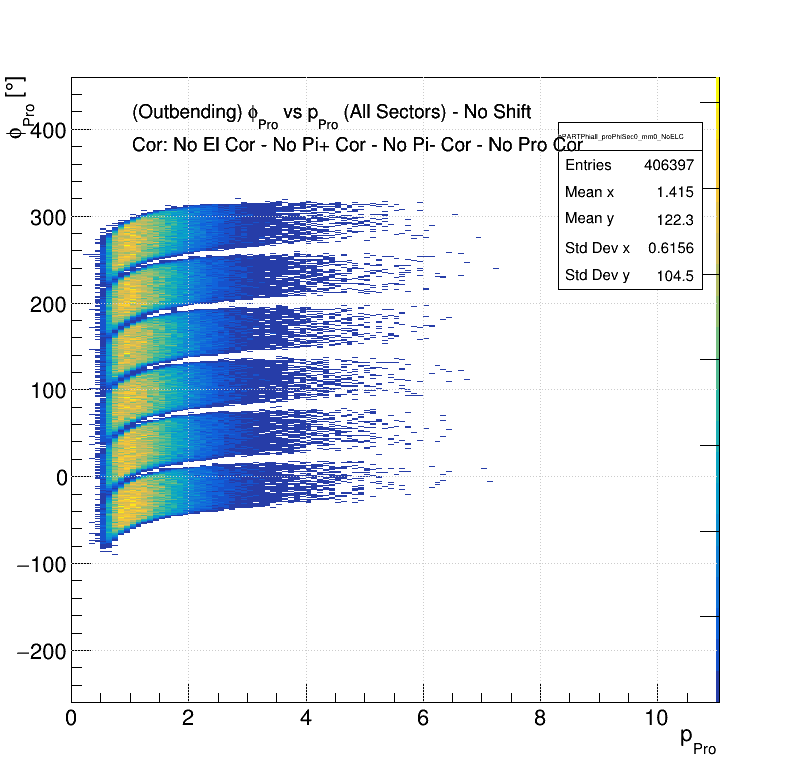

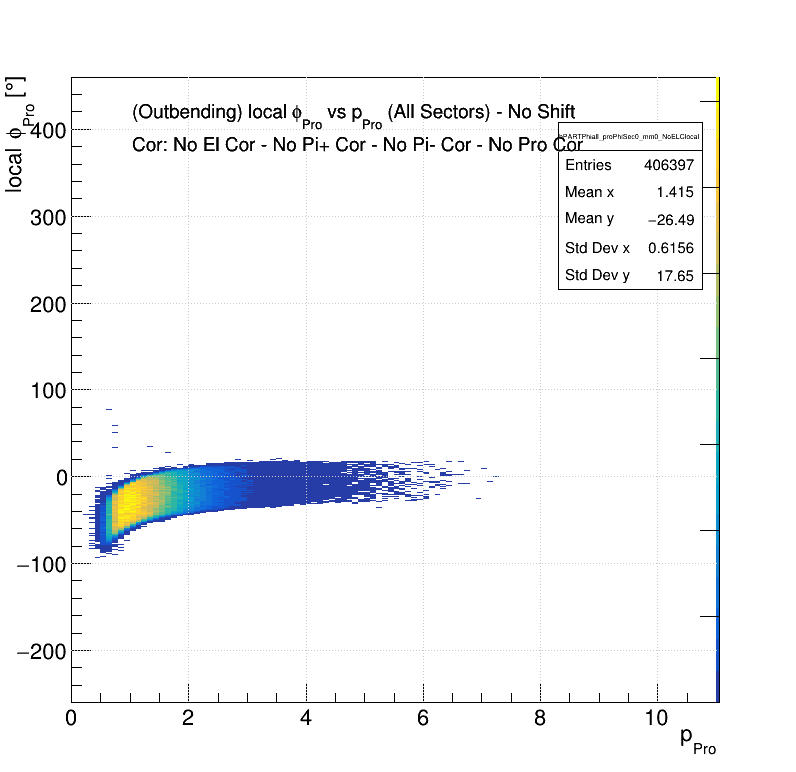

In [8]:
CheckDataFrameQ2 = 'n'
CheckDataFrameQ2 = 'yf' # Prints full list (see CheckDataFrameQ = 'y' in the cell above)
CheckDataFrameQ2 = 'y' # Used for searching with List_of_Locate_name (see below)


Print_Canvas_Q = 'n'
Print_Canvas_Q = 'y'


if(Print_Canvas_Q == 'y' and 'y' != CheckDataFrameQ2):
    Print_Canvas_Q = 'n'


max_print_allowed = 25 # Change this number to limit the number of canvases drawn (will stop drawing after this number is exceeded)

List_of_Locate_name = ["hPARTPhiall_proPhiSec0_mm0", "HWC_Histo_All_('mmF_ProMMpro_F', 0, '1'", "Dmom_pel_Histo('mm0_NoELC', '', '', '1', 'regall')", "hmmCPARTall_('mmF_ProMMpro_F', 1, '', '1', 'regall', 'el', 'el', '')"]

if(CheckDataFrameQ2 == 'yf'):
    List_of_Locate_name = ['']


search_count = 0

if('y' in CheckDataFrameQ2):
    
    if(Print_Canvas_Q == 'y'):
        print("Printing requested histograms...\n")
        histo_search, canvas_search = {}, {}
    
    for Locate_name in List_of_Locate_name:
        print("\nPrinting the full list of histogram names saved in the root file loaded...\n" if('f' in CheckDataFrameQ2) else "".join(["\nSearching for files with: ", color.BOLD, Locate_name, color.END, "\n"]))
        for ii in rdf.GetListOfKeys():
            
            out_print = str(ii.GetName())

            if('f' in CheckDataFrameQ2 or Locate_name in out_print):

                search_count += 1

                print("".join(["Histo ", str(search_count), ") ", out_print, "   -----   object type: ", str(type(rdf.Get(out_print)))]))

                if(Print_Canvas_Q == 'y' and max_print_allowed > search_count):
                    canvas_search[out_print] = ROOT.TCanvas(out_print, out_print, 800, 800)
                    canvas_search[out_print].Divide(1, 1, 0, 0)
                    canvas_search[out_print].SetGrid()

                    ROOT.gStyle.SetAxisColor(16,'xy')
                    ROOT.gStyle.SetOptFit(0)
                    ROOT.gStyle.SetOptStat(1)
                    ROOT.gStyle.SetTitleY(1)
                    ROOT.gStyle.SetTitleX(0.5)

                    # ROOT.gStyle.SetOptFit(1)

                    histo_search[out_print] = rdf.Get(out_print)

                    canvas_search[out_print].Draw()

                    canvas_search[out_print].cd(1)
                    histo_search[out_print].Draw("colz" if("TH2D" in str(type(rdf.Get(out_print)))) else "same")
    
    
    print("".join(["\nTotal number found: ", color.BOLD, str(search_count), color.END]))
else:
    print("\nNot running this cell\n")


.

.

.

.

.

.

.

.

.

# Starting Main Timer

Full time to run the code will be displayed at the end of the code

In [9]:
from datetime import datetime
print("\nStarting production of histograms...\n")

    

# Getting current date
datetime_object_full = datetime.now()

startMin_full, startHr_full = datetime_object_full.minute, datetime_object_full.hour


def Print_Time(Time_Full):
    if(Time_Full.minute < 10):
        timeMin_full = "".join(["0", str(Time_Full.minute)])
    else:
        timeMin_full = str(Time_Full.minute)

    # Printing current time
    if(Time_Full.hour > 12 and Time_Full.hour < 24):
        return ("".join([str((Time_Full.hour) - 12), ":", timeMin_full, " p.m."]))
    if(Time_Full.hour < 12 and Time_Full.hour > 0):
        return ("".join([str(Time_Full.hour), ":", timeMin_full, " a.m."]))
    if(Time_Full.hour == 12):
        return ("".join([str(Time_Full.hour), ":", timeMin_full, " p.m."]))
    if(Time_Full.hour == 0 or Time_Full.hour == 24):
        return ("".join(["12:", timeMin_full, " a.m."]))
    
    
    
print("".join(["The time that the code started is ", Print_Time(datetime_object_full), "\n"]))


Starting production of histograms...

The time that the code started is 2:30 p.m.



.

.

.

.

.

.

.

.

.

# General Use Functions/Code

In [10]:
print("\nMaking functions to help with drawing canvases...\n")

def palette_move(canvas, histo, x_left, x_right, y_up, y_down):

        palette_test = 0

        while(palette_test < 4 and palette_test != -1):
            try:
                palette_histo = histo.GetListOfFunctions().FindObject("palette")

                palette_histo.SetX1NDC(0.905 + x_left)
                palette_histo.SetX2NDC(0.925 + x_right)
                palette_histo.SetY1NDC(0.1 + y_down)
                palette_histo.SetY2NDC(0.9 + y_up)

                canvas.Modified()
                canvas.Update()
                palette_test = -1
            except:
                palette_test += 1

        if(palette_test > 0):
            print("\nFailed to move palette...")
              
    
def Draw_Canvas(canvas, cd_num, left_add, right_add, up_add, down_add):
    canvas.cd(cd_num)
    canvas.cd(cd_num).SetLeftMargin(0.05 + left_add)
    canvas.cd(cd_num).SetRightMargin(0.05 + right_add)
    canvas.cd(cd_num).SetTopMargin(0.1 + up_add)
    canvas.cd(cd_num).SetBottomMargin(0.1 + down_add)
    
    
    
    
    
    
def statbox_move(Histogram, Canvas, Default_Stat_Obj, Sector, Print_Method, Y1_add, Y2_add, X1_add, X2_add):
    
    finding, search = 0, 0

    while(finding == 0 and search < 5):
        Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")
        try:
            
            if(Print_Method == "ver"):
                Default_Stat_Obj.SetY1NDC(0.05 + Y1_add)
                Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)
                
                if(Sector != -1):
                    if(Sector > 4):
                        Default_Stat_Obj.SetY1NDC(0.15 + Y1_add)
                        Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)

                    if(Sector%2 == 0):
                        Default_Stat_Obj.SetX1NDC(0.05 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.35 + X2_add)
                    else:
                        Default_Stat_Obj.SetX1NDC(0.15 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.45 + X2_add)

            if(Print_Method == "hor"):
                Default_Stat_Obj.SetY1NDC(0.05 + Y1_add)
                Default_Stat_Obj.SetY2NDC(0.25 + Y2_add)
                
                if(Sector != -1):
                    if(Sector > 3):
                        Default_Stat_Obj.SetY1NDC(0.15 + Y1_add)
                        Default_Stat_Obj.SetY2NDC(0.35 + Y2_add)

                    if(Sector != 1 and Sector != 4):
                        Default_Stat_Obj.SetX1NDC(0.05 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.35 + X2_add)
                    else:
                        Default_Stat_Obj.SetX1NDC(0.15 + X1_add)
                        Default_Stat_Obj.SetX2NDC(0.45 + X2_add)

            Default_Stat_Obj.Draw("same")
            
            Canvas.Modified()
            Canvas.Update()
            
            finding += 1
            
        except:
            Canvas.Modified()
            Canvas.Update()
            
            finding = 0
            search += 1

    if(search > 4):
        print("Failed search")


Making functions to help with drawing canvases...



.

.

# Functions for Making 2D Slices and Fits

.

.

## Fits for Missing Mass Histograms

In [11]:
print("Defining Missing Mass fits...")

# Meaning of below: h2 is the 2D histogram to be sliced and fit; minR/maxR is the starting/ending point of the slice range, and dR is the increments of increase between each slice (for p_e, fit range should be minR=2, maxR=8, and dR=1)
def fit2dall(h2, minR, maxR, dR, Title, BGq, Particle):
    
    if(" -- Sector" in Title):
        Title = ((((Title.replace("Sector", "".join([Particle, " Sector"]))).replace(" -- p", " -- P")).replace(" -- Pip", " -- Pi+")).replace(" -- Pim", " -- Pi-")).replace("el Sector", "El Sector")

    hx = h2.ProjectionX()
    hys2 = []
    peakList = [Title, "peak position"]
    peakIdealList = [Title, "dif between peak and ideal"]
    peakInError = [Title]
    
    gr2, gr2_Sigma, gr2_Cut_Range_Up, gr2_Cut_Range_Down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_V2 = ROOT.TGraphAsymmErrors()
    
    gr2.SetMarkerStyle(20)
    gr2_V2.SetMarkerStyle(20)
    gr2_Sigma.SetMarkerStyle(20)
    gr2_Cut_Range_Up.SetMarkerStyle(20)
    gr2_Cut_Range_Down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y = [], []

    while minR+dR<=maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)
        
        if(BGq == 'yes'):
            hy2.Add(hy2.ShowBackground(35,""), -1)
            for ii in range(0, hy2.GetNbinsX() + 1, 1):
                if(hy2.GetBinContent(ii) < 0):
                    hy2.SetBinContent(ii, 0)
                    
                    
        hys2.append(hy2)
        
        for ii in hys2:
            print(ii.GetTitle())
        print("\n")
        
        if(event_type == "P0"):
            hy2.Rebin(2)
            hy2.Rebin(2)
                    
        if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
            hy2.Rebin(2)
            
        if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
            hy2.Rebin(2)
            
            
        hy2.Rebin(2)

            
        # fit_function = "".join(["gaus(0)", " + pol1(3)" if BGq != 'yes' else ""])
        # fit_function = "gaus(0) + pol1(3)"
        fit_function = "".join(["gaus(0)", " + pol1(3)" if BGq != 'yes' else " + pol2(3)"])

        if(MM_type != "epipX"):
            fy2 = ROOT.TF1("fy2", str(fit_function), hy2.GetBinCenter(0), hy2.GetBinCenter(hy2.GetNbinsX()))
        else:
            fy2 = ROOT.TF1("fy2", str(fit_function), 0, 1)

        # fy2 = ROOT.TF1("fy2", str(fit_function), hy2.GetBinCenter(0), hy2.GetBinCenter(hy2.GetNbinsX()))
        # mu = 0.9396
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        if(MM_type == "epipX"):
            if(mu < 0.5 or mu > 1.2):
                mu = 0.9396
                
        if(MM_type == "eppipX"):
            if(mu < -0.1 or mu > 0.2):
                mu = 0
                
        if(MM_type == "epX"):
            if(mu < -0.1 or mu > 0.2):
                mu = 0
                
        
        fy2.SetParameters(1, mu, 0.06, 0, 0)
        
        if(MM_type == "epipX"):
            fy2.SetParLimits(1, 0.89, 1)
        elif(MM_type == "eppipX"):
            fy2.SetParLimits(1, mu - 0.0195, mu + 0.0195)
        else: # pi0 channel
            fy2.SetParLimits(1, mu - 0.03, mu + 0.03)
            
        fy2.SetParLimits(2, 0.01, 0.075)

        if(MM_type != "epipX" and MM_type != "eppipX"):
            fy2.SetParLimits(2, 0.01, 0.1)
        
        
        fy2.SetRange(mu - 0.09, mu + 0.09)
        
        if(MM_type != "epipX"):
            if(hy2.GetBinCenter(0) < -0.5):
                if(hy2.GetBinCenter(hy2.GetNbinsX()) > 0.5):
                    fy2.SetRange(-0.5, 0.5)
                else:
                    fy2.SetRange(-0.5, hy2.GetBinCenter(hy2.GetNbinsX()))
            else:
                if(hy2.GetBinCenter(hy2.GetNbinsX()) > 0.5):
                    fy2.SetRange(hy2.GetBinCenter(0), 0.5)
                else:
                    fy2.SetRange(hy2.GetBinCenter(0), hy2.GetBinCenter(hy2.GetNbinsX()))
        
        
        
        hy2.Fit(fy2, "RQ")
        # hy2.Fit(fy2,"RQN")
        
        
        hy2.SetTitle("".join([Title, " ---- p_{", Particle, "} Bin: ", str(minR), " < p_{", Particle, "} < ", str(minR+dR), "}}"]))
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        fy2.SetRange(mu - 3*sig, mu + 3*sig)
        
        
        hy2.Fit(fy2,"RQ")
        # hy2.Fit(fy2, "RQN")
        
        
        if(MM_type == "epipX"):
            if((fy2.GetParameter(1) + fy2.GetParError(1) > 0.98) or (fy2.GetParameter(1) - fy2.GetParError(1) < 0.90) or (abs(fy2.GetParError(1)) > 0.0025)):
                mu = 0.9396 if(mu < 0.8 or mu > 1.1) else hy2.GetBinCenter(hy2.GetMaximumBin())

                print("".join(["Trying to fix ", str(hy2.GetTitle())]))
                fy2.SetParameters(1, mu, 0.06, 0, 0)
                fy2.SetParLimits(1, 0.8, 1.1)
                fy2.SetParLimits(2, 0.01, 0.075)
                fy2.SetRange(0.8, 1.1)


                hy2.Fit(fy2,"RQ")
                # hy2.Fit(fy2, "RQN")
            
            

        # sigma_factor = 1.25
        sigma_factor = 3
        sigma_factor_up = 1.75
        sigma_factor_down = 2
        
        
        MM_Peak, SIG = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, MM_Peak)
        gr2_V2.SetPoint(gr2_V2.GetN(), minR+dR/2.0, MM_Peak)
        
        gr2_Sigma.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, SIG)
        
        gr2_Cut_Range_Up.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, MM_Peak + sigma_factor_up*(SIG))
        gr2_Cut_Range_Down.SetPoint(gr2_Sigma.GetN(), minR+dR/2.0, MM_Peak - sigma_factor_down*(SIG))
            
            
        Error_of_MM_Peak = fy2.GetParError(1)
        Error_of_SIG = fy2.GetParError(2)
        
        gr2.SetPointError(gr2.GetN() - 1, 0, Error_of_MM_Peak)
        gr2_V2.SetPointError(gr2_V2.GetN() - 1, 0, 0, Error_of_MM_Peak + sigma_factor_down*(SIG + Error_of_SIG), Error_of_MM_Peak + sigma_factor_up*(SIG + Error_of_SIG))
        
        gr2_Sigma.SetPointError(gr2_Sigma.GetN() - 1, 0, Error_of_SIG)
        
        gr2_Cut_Range_Up.SetPointError(gr2_Cut_Range_Up.GetN() - 1, 0, Error_of_MM_Peak + sigma_factor_up*(Error_of_SIG))
        gr2_Cut_Range_Down.SetPointError(gr2_Cut_Range_Down.GetN() - 1, 0, Error_of_MM_Peak + sigma_factor_down*(Error_of_SIG))

        
        FindPeak_x.append(MM_Peak)
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(MM_Peak)))
        
        peakList.append(("".join(["For: ", str(minR), "<p_{", Particle, "}<", str(minR+dR)]), round(MM_Peak, 4)))
        
        MM_term = 0.9396 
        
        if(MM_type == "epipX"):
            MM_term = 0.9396
        if(MM_type == "eppipX"):
            MM_term = (0.13957)*(0.13957)
        if(MM_type == "eppi0X"):
            MM_term = (0.13498)*(0.13498)
        if(MM_type == "epX"):
            MM_term = 0
            
            
        dif_peak = round(MM_Peak - MM_term, 4)
            
            
        peakIdealList.append(("".join(["For: ", str(minR), "<p_{", Particle, "}<", str(minR+dR)]), dif_peak))
        if( (MM_term < (MM_Peak + Error_of_MM_Peak)) and (MM_term > (MM_Peak - Error_of_MM_Peak))):
            WithinError = 'IN ideal range'
        else:
            WithinError = 'NOT in ideal range'
        peakInError.append(("".join(["For: ", str(minR), "<p_{", Particle, "}<", str(minR+dR)]), WithinError))
        
        minR += dR
        
            
            
    setattr(h2, "hys2", hys2)
    setattr(h2, "gr2", gr2)
    setattr(h2, "gr2_V2", gr2_V2)
    setattr(h2, "gr2_Sigma", gr2_Sigma)
    setattr(h2, "gr2_Cut_Range_Up", gr2_Cut_Range_Up)
    setattr(h2, "gr2_Cut_Range_Down", gr2_Cut_Range_Down)
    setattr(h2, "peakList", peakList)
    setattr(h2, "peakIdealList", peakIdealList)
    setattr(h2, "peakInError", peakInError)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    
    return h2


Defining Missing Mass fits...


## Fits for ∆P Histograms

In [12]:
print("Defining ∆P fits...")
                
# Same as for fit2dall but this function is specifically meant for the ∆p histograms
def fit2dPE(h2,minR,maxR,dR,Title,BGq,Particle):
    hx = h2.ProjectionX()
    hys2 = []
    peakList = [Title, "peak position"]
    peakIdealList = [Title, "dif between peak and ideal"]
    gr2 = ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y = [], []
    
    SB_ii = 0
    
    while minR+dR<=maxR:
        ib0,ib1 = hx.FindBin(minR),hx.FindBin(minR+dR)
        hy2 = h2.ProjectionY(f"hy{ib1}",ib0,ib1)
        hy2.SetDirectory(0)
        
        if(BGq == 'yes'):
            hy2.Add(hy2.ShowBackground(int(30/((SB_ii/2) + 1))), -1)
            SB_ii += 1
            for ii in range(0,hy2.GetNbinsX()+1,1):
                if(hy2.GetBinContent(ii) < 0):
                    hy2.SetBinContent(ii,0)
                    
                    
        if(event_type == "P0"):
            hy2.Rebin(4)
            if(hy2.GetBinContent(hy2.GetMaximumBin()) < 100):
                hy2.Rebin()
                    
        hys2.append(hy2)
        fy2 = ROOT.TF1("fy2","gaus(0)+pol1(3)", -1, 1) # Fitting with linear background
            
        # mu = 0
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
    
        if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180 and Particle == 'el'):
            hy2.Rebin()
    
        # print("\n Max peak value of " + str(Title) + " is " + str(hy2.GetBinCenter(hy2.GetMaximumBin())) +"\n")
        
        fy2.SetParameters(1, mu, 0.05)
        if(mu < 0):
            fy2.SetParLimits(1, mu - 0.1, 0)
        else:
            fy2.SetParLimits(1, 0, mu + 0.1)
            
        fy2.SetParLimits(1, mu - 0.1, mu + 0.1)
        
        
        fy2.SetParameter(0,hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        fy2.SetRange(mu - 0.1, mu + 0.1)
        fy2.SetRange(mu - 0.15, mu + 0.15)


            
        if(event_type == "SP" and "No El Cor - No Pi+ Cor" in Title and "-10" in Title and "Sector 1" in Title and (minR == 1.5) and (minR + dR == 2.5)):
            fy2.SetParLimits(1, -0.1, 0.1)
        
        hy2.Fit(fy2,"RQ")
        
        
        hy2.SetTitle("".join(["#splitline{", Title, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]))
        mu,sig = fy2.GetParameter(1),abs(fy2.GetParameter(2))

        fy2.SetRange(mu - 3*sig, mu + 3*sig)


        if(minR > 1):
            hy2.Fit(fy2,"RQ")
            
            
            
            
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # Error_Option = "Res" # This option uses the momentum resolution (1% of the momentum) for error bars (i.e., Error_Bars = 0.01*(minR + dR/2.0))
        # Error_Option = "New_Res"
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        

        if("l" in Particle):
            Slice_Title = str(((("".join(["#splitline{", ((Title.replace("Pi+: No Phi Bins -- ", "")).replace(" -- El: No Phi Bins", "")).replace("El: No Phi Bins", "Integrated Phi"), "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"])).replace("elPhi", "#phi_{el}")).replace("el", "El")).replace("pip", "#pi+"))
        else:
            Slice_Title = str((("".join(["#splitline{#splitline{", ((Title.replace("Pi+: No Phi Bins -- ", "")).replace(" -- El: No Phi Bins", "")).replace("El: No Phi Bins", "Integrated Phi"), "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"])).replace("pipPhi", "#phi_{#pi+}")).replace("pip", "#pi+"))
            
        hy2.SetTitle(Slice_Title)
        
        
        if("pro" in Particle):
            if("Extra" in Title):
                Fit_Fixed_Error = 0.01
            else:
                Fit_Fixed_Error = 0.01
        else:
            Fit_Fixed_Error = 0.01
        Set_RES = 0.01
        Res_Errors = Set_RES*(minR + dR/2.0)
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        New_Res_Errors = ((fy2.GetParameter(1))/(minR + dR/2.0))
        # New_Res_Errors = ((minR + dR/2.0)/(fy2.GetParameter(1)))
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            if("l" in Particle):
                Slice_Title = str((("".join(["#splitline{", ((Title.replace("Pi+: No Phi Bins -- ", "")).replace(" -- El: No Phi Bins", "")).replace("El: No Phi Bins", "Integrated Phi"), "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"])).replace("el", "El")).replace("pip", "#pi+"))
            else:
                Slice_Title = str((("".join(["#splitline{#splitline{", ((Title.replace("Pi+: No Phi Bins -- ", "")).replace(" -- El: No Phi Bins", "")).replace("El: No Phi Bins", "Integrated Phi"), "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"])).replace("pipPhi", "#phi_{#pi+}")).replace("pip", "#pi+"))

            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))

            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                if("El" not in Title):
                    print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
                
        # Resolution Error Bars
        if(Error_Option == "Res"):
            hy2.SetTitle("#splitline{#splitline{" + Title + "}{" + str(minR) + " < p_{" + str(Particle) + "} < " + str(minR + dR) + "}}{Error Bars are set by: Momentum Resolution (" + str(Set_RES*100) +"%)}")
            if(abs(fy2.GetParError(1)) < Res_Errors):
                Error_Bars = Res_Errors
            else:
                if("El" not in Title):
                    print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
                
        if(Error_Option == "New_Res"):
            hy2.SetTitle("#splitline{#splitline{" + Title + "}{" + str(minR) + " < p_{" + str(Particle) + "} < " + str(minR + dR) + "}}{Error Bars are set by: (New) Momentum Resolution (#frac{dp}_{p})}")
            if(abs(fy2.GetParError(1)) < New_Res_Errors):
                Error_Bars = New_Res_Errors
            else:
                if("El" not in Title):
                    print("The statistical error is too large for: " + str(hy2.GetTitle()) )
                Error_Bars = fy2.GetParError(1)
        
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1, 0, Error_Bars)
        
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        peakList.append(("".join(["For: ", str(minR), "<p_{", Particle, "}<", str(minR + dR)]),round(fy2.GetParameter(1),4)))
        dif_peak = round(fy2.GetParameter(1) - 0, 4)
        peakIdealList.append(("".join(["For: ", str(minR), "<p_{", Particle, "}<", str(minR + dR)]),dif_peak))
                        
        minR += dR
    setattr(h2,"hys2",hys2)
    setattr(h2,"gr2",gr2)
    setattr(h2,"peakList",peakList)
    setattr(h2,"peakIdealList",peakIdealList)
    setattr(h2,"FindPeak_x",FindPeak_x)
    setattr(h2,"FindPeak_y",FindPeak_y)
    
    
    
    
    
    
# The function below is used to merge the ∆P fits from the double pion and π0 channel to get the proton corrections from both channels simultaneously
def Merge_Histos(TGE1, TGE2):
    Merged_Histo = ROOT.TGraphErrors()
    Merged_Histo.SetMarkerStyle(20)
    # Merged_Histo.SetMarkerColor(1)
    # Merged_Histo.SetMarkerColor(37)
    Merged_Histo.SetMarkerColor(2)
    
    
    for TGE1_Entry in range(0, TGE1.GetN() + 1, 1):
        Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE1.GetPointX(TGE1_Entry), TGE1.GetPointY(TGE1_Entry))
        Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE1.GetErrorX(TGE1_Entry), TGE1.GetErrorY(TGE1_Entry))
        
    for TGE2_Entry in range(0, TGE2.GetN() + 1, 1):
        Merged_Histo.SetPoint(Merged_Histo.GetN(), TGE2.GetPointX(TGE2_Entry), TGE2.GetPointY(TGE2_Entry))
        Merged_Histo.SetPointError(Merged_Histo.GetN() - 1, TGE2.GetErrorX(TGE1_Entry), TGE2.GetErrorY(TGE2_Entry))
        
        
        
    return Merged_Histo

    

Defining ∆P fits...


.

.

# Function for Correction Names in Titles

In [13]:
def corNameTitles(CorrectionNameIn):
    CorrectionName1, CorrectionName2, CorrectionName3, CorrectionName4 = 'Error', 'Error', 'Error', 'Error'

    if(CorrectionNameIn == "No correction"):
        CorrectionNameIn = "mm0"

    if('mm0' in CorrectionNameIn):
        CorrectionName1 = 'No El Cor'
    if('mm1' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Linear - No Phi)'
    if('mmPhi' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Linear - Linear Phi)'
    if('mmPhi_R1' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Linear Phi - Refined 1)'.replace('Linear', 'Linear' if "In" in datatype else 'Quad')
    if('mmPhi_R2' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 2)'
    if('mmPhi_R3' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 3)'
    if('mmPhi_R4' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 4)'
    if('mmPhi_R5' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi - Refined 5)'
    if('mmF' in CorrectionNameIn):
        CorrectionName1 = 'El Cor (Quad - Quad Phi)'

    if('Pip' not in CorrectionNameIn):
        CorrectionName2 = 'No Pi+ Cor' if event_type != "P0" else ""
    if('Pip' in CorrectionNameIn):
        if('MMQ' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - No Phi)'
        if('MMPhi' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Linear Phi)'
        if('MMqPhi_R1' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 1)'
        if('MMqPhi_R2' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 2)'
        if('MMqPhi_R3' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 3)'
        if('MMqPhi_R4' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 4)'
        if('MMqPhi_R5' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi - Refined 5)'
        if('MMF' in CorrectionNameIn):
            CorrectionName2 = 'Pi+ Cor (Quad - Quad Phi)'

    if('Pim' not in CorrectionNameIn):
        CorrectionName3 = 'No Pi- Cor' if event_type == "DP" else ""
    if('Pim' in CorrectionNameIn):
        if('MMpimPhi' in CorrectionNameIn):
            CorrectionName3 = 'Pi- Cor (Linear - Linear Phi)'
        if('MMpim_qPhi' in CorrectionNameIn):
            CorrectionName3 = 'Pi- Cor (Quad - Quad Phi)'
        if('MMpim_F' in CorrectionNameIn):
            CorrectionName3 = 'Pi- Cor (Quad - Quad Phi - Rounded)'

    if('Pro' not in CorrectionNameIn):
        CorrectionName4 = 'No Pro Cor' if event_type != "SP" else ""
        # if(('_NoELC' not in CorrectionNameIn and event_type == "DP") or (event_type == "P0")):
        if('_NoELC' not in CorrectionNameIn):
            CorrectionName4 = ''.join([CorrectionName4, " (Energy Loss Cor)"])
    if('Pro' in CorrectionNameIn):
        if('MMproPhi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Linear - Linear Phi)'
        if("MMpro_qPhi" in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Quad Phi)'
        if('MMpro_pi0Phi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Quad Phi - From Pi0)'
        if('MMpro_pi2Phi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - Quad Phi - From Double Pion)'
        if('MMpro_NoPhi' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Linear - No Phi)'
        if('MMpro_qNoPhi' in CorrectionNameIn or 'MMpro_F' in CorrectionNameIn):
            CorrectionName4 = 'Pro Cor (Quad - No Phi)'
        if('_NoELC' not in CorrectionNameIn):
            CorrectionName4 = CorrectionName4.replace(")", " - Energy Loss Cor)")

    if(CorrectionName1 == 'Error'):
        print("".join(["Error with the Electron Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName1 = "El Cor (ERROR)"

    if(CorrectionName2 == 'Error' and event_type != "P0" and event_type != "ES"):
        print("".join(["Error with the Pi+ Pion Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName2 = "Pi+ Cor (ERROR)"

    if(CorrectionName3 == 'Error' and event_type != "P0" and event_type != "SP" and event_type != "ES"):
        print("".join(["Error with the Pi- Pion Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName3 = "Pi- Cor (ERROR)"

    if(CorrectionName4 == 'Error' and event_type != "SP"):
        print("".join(["Error with the Proton Correction in CorrectionNameInput = ", str(CorrectionNameIn)]))
        CorrectionName4 = "Pro Cor (ERROR)"

    CorrectionName = "".join([CorrectionName1, " - " if CorrectionName2 != "" else "", CorrectionName2, " - " if CorrectionName3 != "" else "", CorrectionName3, " - " if CorrectionName4 != "" else "", CorrectionName4])

    if(event_type == "SP"):
        CorrectionName = "".join([CorrectionName1, " - " if CorrectionName2 != "" else "", CorrectionName2])
    elif(event_type != "ES"):
        CorrectionName = "".join([CorrectionName1, " - " if CorrectionName2 != "" else "", CorrectionName2, " - " if CorrectionName3 != "" else "", CorrectionName3, " - " if CorrectionName4 != "" else "", CorrectionName4])
    else:
        CorrectionName = "".join([CorrectionName1, " - " if CorrectionName4 != "" else "", CorrectionName4])


    if(CorrectionName1 == 'El Cor (Quad - Quad Phi)' and CorrectionName2 == 'Pi+ Cor (Quad - Quad Phi)'):
        if(event_type == "SP"):
            CorrectionName = 'El/Pi+ Cor (Quad - Quad Phi)'
        else:
            if(CorrectionName3 == 'Pi- Cor (Quad - Quad Phi)'):
                if('Pro Cor (Quad - Quad Phi' in CorrectionName4):
                    CorrectionName = "".join(["El/Pi+/Pi-/Pro Cor (Quad - Quad Phi)"])
                else:
                    CorrectionName = "".join(["El/Pi+/Pi- Cor (Quad - Quad Phi) - ", CorrectionName4])
            else:
                if('Pro Cor (Quad - Quad Phi' in CorrectionName4):
                    CorrectionName = "".join(["El/Pi+/Pro Cor (Quad - Quad Phi) - ", CorrectionName3])
                else:
                    CorrectionName = "".join(["El/Pi+ Cor (Quad - Quad Phi) - ", CorrectionName3, " - ", CorrectionName4])

    if(event_type != "SP"):
        if("Energy Loss Cor" not in CorrectionName and '_NoELC' not in CorrectionNameIn):
            CorrectionName = CorrectionName.replace('Pro Cor (Quad - Quad Phi)', 'Pro Cor (Quad - Quad Phi - Energy Loss Cor)')



    return CorrectionName


print("".join(["\n\n", color.BOLD, "Done with Correction Titles", color.END, "\n\n"]))



Done with Correction Titles




# Function for Getting Phi Region List 

In [14]:
# Definitions of Phi binning

def regList_Call(Bin, Particle, Version):
    # Meaning of inputs:
    # # Bin -> Number of Phi Bins
    # # Particle -> Denotes the difference in phi bins for version 2 of this function
    # # Version -> There are 2 versions of this function's output.
    # # # # The output will either be a single list of regions (version 1) OR it will be a list of lists for each region (version 2)
    # # # # Version 2 is used in some title name

    RegList_Out = ['regall']

    if(Version == 1):
        if(Bin == '1'):
            RegList_Out = ['regall']
        if(Bin == '3'):
            RegList_Out = ['reg1', 'reg2', 'reg3']
        if(Bin == '5'):
            RegList_Out = ['reg1', 'reg2', 'reg3', 'reg4', 'reg5']

    if(Version == 2):
        RegList_Out = [['No Phi Bins','regall']]

        if(Bin == '1'):
            RegList_Out = [['No Phi Bins','regall']]
        if(Bin == '3'):
            if(Particle == 'el'):
                RegList_Out = [[' (-5 < localelPhiS < 5)', 'reg1'], [' (localelPhiS < -5)', 'reg2'], [' (localelPhiS > 5)', 'reg3']]
            else:
                RegList_Out = [[''.join([' (-10 < local', str(Particle), 'PhiS < 10)']), 'reg1'], [''.join([' (local', str(Particle), 'PhiS < -10)']), 'reg2'], [''.join([' (local', str(Particle), 'PhiS > 10)']), 'reg3']]
        if(Bin == '5'):
            RegList_Out = [[''.join([' (-5 < local', str(Particle), 'PhiS < 5)']),'reg1'], [''.join([' (-15 < local', str(Particle), 'PhiS < -5)']), 'reg2'], [''.join([' (local', str(Particle), 'PhiS < -15)']), 'reg3'], [''.join([' (5 < local', str(Particle), 'PhiS < 15)']), 'reg4'], [''.join([' (local', str(Particle), 'PhiS > 15)']), 'reg5']]
            
    if(Version == 3):
        if(Bin == '1'):
            RegList_Out = ['regall']
        if(Bin == '3'):
            RegList_Out = ['reg2', 'reg1', 'reg3']
        if(Bin == '5'):
            RegList_Out = ['reg3', 'reg2', 'reg1', 'reg4', 'reg5']
            
    if(Version == 4):
        RegList_Out = [['No Phi Bins','regall']]
        
        if(Bin == '1'):
            RegList_Out = [['No Phi Bins','regall']]
        if(Bin == '3'):
            if(Particle == 'el'):
                RegList_Out = [[' (elPhi < -5)', 'reg2'], [' (-5 < elPhi < 5)', 'reg1'], [' (elPhi > 5)', 'reg3']]
            else:
                RegList_Out = [[''.join([' (', str(Particle), 'Phi < -10)']), 'reg2'], [''.join([' (-10 < ', str(Particle), 'Phi < 10)']), 'reg1'],  [''.join([' (', str(Particle), 'Phi > 10)']), 'reg3']]
        if(Bin == '5'):
            RegList_Out = [[' (' + str(Particle) + 'Phi < -15)', 'reg3'], [' (-15 < ' + str(Particle) + 'Phi < -5)', 'reg2'], [' (-5 < ' + str(Particle) + 'Phi < 5)','reg1'], [' (5 < ' + str(Particle) + 'Phi < 15)', 'reg4'], [' (' + str(Particle) + 'Phi > 15)', 'reg5']]


    return RegList_Out

print("Done")


Done


.

.

.

# Function for Printing New π+ Corrections

In [15]:
print("Defining Routine for Printing New (π+) Correction Functions...")

def PnCF_Dpip(h2D, h2DName, CorrectionNameIn, SName, Sector, PDpQ, PFname, LineOrQuad):


    # SName = "Always Shifted"
    
    CorrectionName = corNameTitles(CorrectionNameIn)    

    outputListforTXT = ['']
    
    if(PFname != ''):
        PhiFilterName = ''.join(['[', str(PFname), ']'])
    else:
        PhiFilterName = PFname
        
        

    if(LineOrQuad == 'linear' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The LINEAR function predicted for ", color.DELTA, "p_{pip} for [Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))

        correction = "".join(["((", str(round(h2D[h2DName].gr2.GetFunction("pol1").GetParameter(1), 8)), ")*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol1").GetParameter(0), 8)), "));"])

        line2 = "".join(["dp = ", "dp + " if('Pip' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)
        
    
    if(LineOrQuad == 'quadratic' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The QUADRATIC function predicted for ", color.DELTA, "p_{pip} for [Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))
        
        correction = "".join(["((", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(2), 8)), ")*pp*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(1), 8)), ")*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(0), 8)), "));"])
        
        line2 = "".join(["dp = ", "dp + " if('Pip' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)

                
        
    return outputListforTXT
      

    
print("Done")





Defining Routine for Printing New (π+) Correction Functions...
Done


.

.

# Function for Printing New Electron Corrections

In [16]:
# This cell is used for when the corrections are given in standard form (i.e. a*x^2 + b*x + c)

print("Defining Routine for Printing New (Electron) Correction Functions...")

def PnCF_DpEL(h2D, h2DName, CorrectionNameIn, Sector, PDpQ, PFname, LineOrQuad):
    
    SName = "Always Shifted"
    
    CorrectionName = corNameTitles(CorrectionNameIn)    

    outputListforTXT = ['']
    
    if(PFname != ''):
        PhiFilterName = ''.join(['[', str(PFname), ']'])
    else:
        PhiFilterName = PFname
        
        

    if(LineOrQuad == 'linear' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The LINEAR function predicted for ", color.DELTA, "p_{pip} for [Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))

        correction = "".join(["((", str(round(h2D[h2DName].gr2.GetFunction("pol1").GetParameter(1), 8)), ")*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol1").GetParameter(0), 8)), "));"])

        line2 = "".join(["dp = ", "dp + " if('Pip' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)
        
    
    if(LineOrQuad == 'quadratic' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The QUADRATIC function predicted for ", color.DELTA, "p_{pip} for [Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))
        
        correction = "".join(["((", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(2), 8)), ")*pp*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(1), 8)), ")*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(0), 8)), "));"])
        
        line2 = "".join(["dp = ", "dp + " if('Pip' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)

                
        
    return outputListforTXT
      

    
print("Done")


Defining Routine for Printing New (Electron) Correction Functions...
Done


.

.

# Function for Printing New Proton Corrections

In [17]:
print("Defining Routine for Printing New (Proton) Correction Functions...")

def PnCF_Dpro(h2D, h2DName, CorrectionNameIn, Sector, PDpQ, PFname, LineOrQuad):
    
    try:
        hist_in_use = h2D[str((h2DName, "both"))]
    except:
        print("\n\n\nFAILED TO GET THE RIGHT HISTOGRAM\n\n")
        hist_in_use = h2D[h2DName].gr2
    
    # SName = "Always Shifted"
    
    CorrectionName = corNameTitles(CorrectionNameIn)    

    outputListforTXT = ['']
    
    if(PFname != ''):
        PhiFilterName = ''.join(['[', str(PFname), ']'])
    else:
        PhiFilterName = PFname
        
        

    if(LineOrQuad == 'linear' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The LINEAR function predicted for ", color.DELTA, "p_{pro} for [", str(Selection_of_In_or_Out), "][Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))

        
        parA = round(hist_in_use.GetFunction("pol1").GetParameter(1), 8)
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
            
        parB = round(hist_in_use.GetFunction("pol1").GetParameter(0), 8)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
        
        # correction = "".join(["((", str(round(h2D[h2DName].gr2.GetFunction("pol1").GetParameter(1), 8)), ")*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol1").GetParameter(0), 8)), "));"])
        correction = "".join(["((", str(parA), ")*pp + (", str(parB), "));"])

        line2 = "".join(["dp = ", "dp + " if('Pro' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)
        
    
    if(LineOrQuad == 'quadratic' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The QUADRATIC function predicted for ", color.DELTA, "p_{pro} for [", str(Selection_of_In_or_Out), "][Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))
        
        parA = round(hist_in_use.GetFunction("pol2").GetParameter(2), 8)
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
            
        parB = round(hist_in_use.GetFunction("pol2").GetParameter(1), 8)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
            
        parC = round(hist_in_use.GetFunction("pol2").GetParameter(0), 8)
        if(abs(parC) < 0.01):
            parC = "{:.4e}".format(parC)
        else:
            parC = round(parC, 5)
        
        # correction = "".join(["((", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(2), 8)), ")*pp*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(1), 8)), ")*pp + (", str(round(h2D[h2DName].gr2.GetFunction("pol2").GetParameter(0), 8)), "));"])
        correction = "".join(["((", str(parA), ")*pp*pp + (", str(parB), ")*pp + (", str(parC), "));"])
        
        line2 = "".join(["dp = ", "dp + " if('Pro' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)

                
        
    return outputListforTXT
      

    
print("Done")
    

Defining Routine for Printing New (Proton) Correction Functions...
Done


In [18]:
print("Defining Routine for Printing Correction Functions...")

def Print_Correction_Function(h2D, h2DName, CorrectionNameIn, Sector, Particle, PFname, LineOrQuad):
    
    if(Particle == "pro"):
        try:
            hist_in_use = h2D[str((h2DName, "both"))]
        except:
            print("\n\n\nFAILED TO GET THE RIGHT ∆P (PROTON) HISTOGRAM...\n\n")
            hist_in_use = h2D[h2DName].gr2
    else:
        try:
            hist_in_use = h2D[h2DName].gr2
        except:
            print("\n\n\nERROR IN GETTING THE CORRECT ∆P HISTOGRAM...\n\n")
            hist_in_use = h2D


    CorrectionName = corNameTitles(CorrectionNameIn)    

    outputListforTXT = [""]
    

    PhiFilterName = "".join(["[", str(PFname), "]"]) if(PFname != "") else ""
    
    
    line1_end = "".join(["function predicted for ", color.DELTA, "p_{", str(Particle), "} for [", str(Selection_of_In_or_Out), "][Cor = ", str(CorrectionName), "][All Sectors]" if(Sector == 'all' or Sector == 0) else "".join(["][Sector ", str(Sector), "]"]), str(PhiFilterName), " is:"])


    if(LineOrQuad == 'linear' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The LINEAR ", str(line1_end)])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))

        parA = round(hist_in_use.GetFunction("pol1").GetParameter(1), 8)
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
            
        parB = round(hist_in_use.GetFunction("pol1").GetParameter(0), 8)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
        
        correction = "".join(["((", str(parA), ")*pp + (", str(parB), "));"])
        
        
        line2 = "".join(["dp = ", correction])

        if(Particle == "el"):
            line2 = "".join(["dp = ", "dp + " if('mm0' not in CorrectionNameIn) else "", correction])        
        if(Particle == "pip"):
            line2 = "".join(["dp = ", "dp + " if('Pip' in CorrectionNameIn) else "", correction])
        if(Particle == "pro"):
            line2 = "".join(["dp = ", "dp + " if('Pro' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)
        
    
    if(LineOrQuad == 'quadratic' or LineOrQuad == 'both'):

        line1 = "".join(["\n\n// The QUADRATIC ", str(line1_end)])
        
        outputListforTXT.append(line1)
        print("".join(["\n", line1]))
        
        parA = round(hist_in_use.GetFunction("pol2").GetParameter(2), 8)
        if(abs(parA) < 0.01):
            parA = "{:.4e}".format(parA)
        else:
            parA = round(parA, 5)
            
        parB = round(hist_in_use.GetFunction("pol2").GetParameter(1), 8)
        if(abs(parB) < 0.01):
            parB = "{:.4e}".format(parB)
        else:
            parB = round(parB, 5)
            
        parC = round(hist_in_use.GetFunction("pol2").GetParameter(0), 8)
        if(abs(parC) < 0.01):
            parC = "{:.4e}".format(parC)
        else:
            parC = round(parC, 5)
        
        
        correction = "".join(["((", str(parA), ")*pp*pp + (", str(parB), ")*pp + (", str(parC), "));"])
        
        
        line2 = "".join(["dp = ", correction])
        
        if(Particle == "el"):
            line2 = "".join(["dp = ", "dp + " if('mm0' not in CorrectionNameIn) else "", correction])        
        if(Particle == "pip"):
            line2 = "".join(["dp = ", "dp + " if('Pip' in CorrectionNameIn) else "", correction])
        if(Particle == "pro"):
            line2 = "".join(["dp = ", "dp + " if('Pro' in CorrectionNameIn) else "", correction])
        
        line2 = "".join(["dp = ", "dp + " if('Pro' in CorrectionNameIn) else "", correction])
        
        outputListforTXT.append(line2)
        print(line2)

                
    return outputListforTXT
      

    
print("Done")
    

Defining Routine for Printing Correction Functions...
Done


.

.

.


.

# Filter Function for Phi Binning and Kinematic Fit

In [19]:
# 'Kinematic Fit' refers to the cut made from the calculated results (not currently in use)
def regFilter(Bank, Binning, Sector, Region, Shift, KFit, Particle):
        if(KFit == 'nf'):
            Bank1 = Bank
        else:
            Bank1 = Bank#.Filter(str(KFit))
        
        if(Particle == 'el' and 'pip' in Shift):
            # print("Bad shift selection.\npi +  shifts should not be mixed with the electron's angle.")
            PhiFilter = 'error'
            return Bank1
        if(Particle == 'pip' and 'e' in Shift):
            # print("Bad shift selection.\nElecton shifts should not be mixed with the pion's angle.")
            PhiFilter = 'error'
            return Bank1
        
    
    
        if(Sector == 0 or Sector == 'all'):
            PhiFilter = 'error'
            return Bank1
        if(Binning == '1'):
            PhiFilter = 'error'
            return Bank1
        
        binName = "".join(["local", str(Particle), "Phi", Shift])
        
        if(Binning == '3'): # Corrections for 3 phi bins
            PhiFilter = 'error'
            if(Region == 'reg1'):
                if(Shift != ''):
                    PhiFilter = ''.join([binName, ' > -5 && ', binName, ' < 5'])
                else:
                    PhiFilter = ''.join([binName, ' > 0 && ', binName, ' < 10'])
            if(Region == 'reg2'):
                if(Shift != ''):
                    PhiFilter = ''.join([binName, ' < -5'])
                else:
                    PhiFilter = ''.join([binName, ' < 0'])
            if(Region == 'reg3'):
                if(Shift != ''):
                    PhiFilter = ''.join([binName, ' > 5'])
                else:
                    PhiFilter = ''.join([binName, ' > 10'])
                    
            return Bank#.Filter(PhiFilter)
            # return PhiFilter

         # Corrections for 5 phi bins
        if(Binning == '5'):
            PhiFilter = 'error'
            if(Region == 'reg1'):
                PhiFilter = "".join([binName, ' > -5 && ', binName, ' < 5'])
            if(Region == 'reg2'):
                PhiFilter = "".join([binName, ' < -5 && ', binName, ' > -15'])
            if(Region == 'reg3'):
                PhiFilter = "".join([binName, ' < -15'])
            if(Region == 'reg4'):
                PhiFilter = "".join([binName, ' > 5 && ', binName, ' < 15'])
            if(Region == 'reg5'):
                PhiFilter = "".join([binName, ' > 15'])
            
            
            if(PhiFilter != 'error'):
                return Bank1#.Filter(PhiFilter)
            else:
                return Bank1

                            

print("Done")

Done


# Function for Filter Titles with Phi Binning

In [20]:
def regFilterTitleExtra(Binning, Sector, Region, Shift, KFit, Particle):
    
        if(Particle == 'el'):
            PhiFilter, Shift = '', 'Se1'
        if(Particle == 'pip'):
            PhiFilter, Shift = '', 'Spip1'
            
        PhiFilter, Shift = '', 'S'
    
    
        if((Sector == 0) or (Binning == '1')):
            PhiFilter = ''
            return PhiFilter
        
        binName = "".join(["#phi_{", str(Particle), "}"])
        
        # Corrections for 3 phi bins
        if(Binning == '3'):
            PhiFilter = ''
            if(Region == 'reg1'):
                if(Particle == 'el'):
                    PhiFilter= ''.join([' -5 < ', binName, ' < 5'])
                else:
                    PhiFilter= ''.join([' -10 < ', binName, ' < 10'])
            if(Region == 'reg2'):
                if(Particle == 'el'):
                    PhiFilter= ''.join([' ', binName, ' < -5'])
                else:
                    PhiFilter= ''.join([' ', binName, '< - 10'])
            if(Region == 'reg3'):
                if(Particle == 'el'):
                    PhiFilter= ''.join([' ', binName, ' > 5'])
                else:
                    PhiFilter= ''.join([' ', binName, ' > 10'])
            return PhiFilter
                        
        # Corrections for 5 phi bins
        if(Binning == '5'):
            PhiFilter = 'error'
            if(Region == 'reg1'):
                PhiFilter = ''.join(['-5 < ', binName, ' < 5'])
            if(Region == 'reg2'):
                PhiFilter = ''.join(['-15 < ', binName, ' < -5'])
            if(Region == 'reg3'):
                PhiFilter = ''.join([binName, ' < -15'])
            if(Region == 'reg4'):
                PhiFilter = ''.join(['5 < ', binName, ' < 15'])
            if(Region == 'reg5'):
                PhiFilter = ''.join([binName, ' > 15'])
                    


            return PhiFilter
                            

print("Done")

Done


.

.

.

.

.

.

.

.

.

In [21]:
# DO NOT CHANGE : some code may need CutChoice to be equal to 'none' to work. Nothing can be done by changing this value (as no new cuts are possible currently)
CutChoice = 'none'
PECut = 'none'
CC4calOnly = 'n'

.

.

.

.

.

.

### Notes about the ∆P histograms (for people not familar with this code):

These histograms use calculated particle momentums to show what corrections are needed to bring the missing mass peaks to the correct location for the given exclusive reactions.
The calculated momentums are found using kinematic equations based on the 4-momentum conservation of the processes:
1) ep->eπ+N

2) ep->epπ+π-

3) ep->epπ0

and

4) ep->e'p' (Elastic Scattering)


These equations assume that the electron momentum and π+/π-/π0/proton angle(s) were measured correctly by detector (or have undergone the proper corrections already). 

Using these variables (and other known constants like the the particle's masses and initial beam energy), a theoretical pion/proton momentum is calculated for each event.


Some of the variable names and lines referencing these histograms may seem oddly named in this context.
The reason being that the code was originally focused on using these histograms for additional cuts but has since developed into a more important role.
Unused remnants of this original purpose may still exist in a variety of conditions, so be aware of possible issues that could arrise if (seemingly) random pieces of code are arbitrarily removed.





<!-- ### The difference between the calculated and measured momentums D_p = p_calculated - p_measured -->

.

.

.

.

.

.

.

.

.

# Run ∆P histograms?

#### The following histograms create new corrections for specific particles in the given reactions
##### To run faster, and if this information is not necessary, let Extra_Delta_P_histoQ = 'n'
##### To run these histograms, let Extra_Delta_P_histoQ = 'y'
The rest of this code will run normally, regardless of this choice

In [22]:
Extra_Delta_P_histoQ = 'n'
Extra_Delta_P_histoQ = 'y'

if(event_type == "P0"):
    Extra_Delta_P_histoQ = 'n'
    print("Don't run corrections in the π0 channel")


try: RunDpQ
except NameError: RunDpQ = 'yes'; print("RunDpQ was not defined. Defaulting to RunDpQ = 'yes' (assumes that these cells can be run)")
    
try: CutChoice
except NameError: CutChoice = 'none'

    
    
if(RunDpQ == 'no'):
    if(Extra_Delta_P_histoQ == 'y'):
        print("These cells cannot be run with the selected files")
    Extra_Delta_P_histoQ = 'n'

# # Want to run these for different sectors? (uses the π+/proton sectors - depends on which particle is selected for the correction)
# # Input the sector numbers you wish to run in the list below ('all' or 0 corresponds to running all the sectors at once without filtering)
Extra_Delta_P_histoSecList = ['all', 1, 2, 3, 4, 5, 6]
# Extra_Delta_P_histoSecList = [1, 2, 3, 4, 5, 6]

Extra_Delta_P_histoSecList = ['all']
    

# Extra Sector Filter that filters based on Electron Sectors. ExtraElectronSecListFilterOn = 'no' turns this option off
ExtraElectronSecListFilterOn = 'no'
ExtraElectronSecListFilterOn = 'yes'

if(event_type != "SP"):
    ExtraElectronSecListFilterOn = 'no'
    Extra_Delta_P_histoSecList = [1, 2, 3, 4, 5, 6]
    

if(ExtraElectronSecListFilterOn == 'yes'):
    ExtraElectronSecListFilter = ['all', 1, 2, 3, 4, 5, 6]
else:
    ExtraElectronSecListFilter = ['all']

    
if(event_type == "ES"):
    ExtraElectronSecListFilterOn = 'yes'
    Extra_Delta_P_histoSecList = ["all"]
    ExtraElectronSecListFilter = [1, 2, 3, 4, 5, 6]
    
    
    
if(event_type == "SP"):
    if(Selection_of_In_or_Out == "Inbending"):
        Extra_Delta_P_histoCorList = ['mm0', 'mmF', 'mmF_PipMMF']

    if(Selection_of_In_or_Out == "Outbending"):
        Extra_Delta_P_histoCorList = ['mm0', 'mmF', 'mmF_PipMMF']


    # # Select which comparisons you would like to see (i.e. which variables would you like to compare to the theoretical calculations)
    # Delta_P_histo_CompareList = ['pi+', 'el']
    Delta_P_histo_CompareList = ['el']
#     Delta_P_histo_CompareList = ['pi+']


if(event_type == "DP"):
    if(Selection_of_In_or_Out == "Inbending"):
        Extra_Delta_P_histoCorList = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F']

    if(Selection_of_In_or_Out == "Outbending"):
        Extra_Delta_P_histoCorList = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F']

    # # Select which comparisons you would like to see (i.e. which variables would you like to compare to the theoretical calculations)
    Delta_P_histo_CompareList = ['pro']

    
    
    
    
    
if(event_type == "P0"):
    if(Selection_of_In_or_Out == "Inbending"):
        # Extra_Delta_P_histoCorList = ['mmF_ProMMpro_F']
        Extra_Delta_P_histoCorList = ['mm0_NoELC', 'mmF_ProMMpro_F']

    if(Selection_of_In_or_Out == "Outbending"):
        # Extra_Delta_P_histoCorList = ['mmF_ProMMpro_F']
        Extra_Delta_P_histoCorList = ['mm0_NoELC', 'mmF_ProMMpro_F']

    # # Select which comparisons you would like to see (i.e. which variables would you like to compare to the theoretical calculations)
    # # Delta_P_histo_CompareList = ['pro', 'el']
    Delta_P_histo_CompareList = ['pro']

    
    
if(event_type == "ES"):
    if(Selection_of_In_or_Out == "Inbending"):
        Extra_Delta_P_histoCorList = ['mm0_NoELC', 'mmF_NoELC', 'mmF_ProMMpro_F_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_F']

    if(Selection_of_In_or_Out == "Outbending"):
        Extra_Delta_P_histoCorList = ['mm0_NoELC', 'mmF_NoELC', 'mmF_ProMMpro_F_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_F']


    # # Select which comparisons you would like to see (i.e. which variables would you like to compare to the theoretical calculations)
    # Delta_P_histo_CompareList = ['pro', 'el']
    Delta_P_histo_CompareList = ['el']
    # Delta_P_histo_CompareList = ['pro']






# Extend range of the 2D histograms? (The 2D histograms are the '∆ values' versus the pion momentum/angle measurements) 
# For the y-axis to have a user-determined range, let Extend2D_histo = 'y'
# For the y-axis to have a range of -0.4 to 0.4, let Extend2D_histo = 'n'
# Note: binning is the same for both options (binning set for the default of 200 bins for a range of -1 to 1)
Extend2D_histo = 'y'

# Set the extended range:
extendx_min, extendx_max = -1, 1

extendx_min, extendx_max = -0.1, 0.1

NumOfExtendedBins = round((extendx_max - extendx_min)/0.005)


# For using ShowBackground() with the slices of the extra 2D histograms
# SBehQ = 'yes'
SBehQ = 'no'



# # Number of (π+) phi bins
# NumPhiBins = ['1', '3', '5']
NumPhiBins = ['1', '3']
# NumPhiBins = ['3', '5']
# NumPhiBins = ['3']
NumPhiBins = ['1']


# # # Number of (electron) phi bins
# # To run code normally (without electron phi bins in ∆p histograms), let NumPhiBinsEL = ['1'] (anything else will cut histograms based on electron phi angles)
NumPhiBinsEL = ['1', '3']
# NumPhiBinsEL = ['3']
# NumPhiBinsEL = ['1']


if(event_type != "SP" and event_type != "ES"):
    NumPhiBins = ['1']
    NumPhiBinsEL = ['1']




# Would you like the pi+ correction equation obtained by this code to be linear or quadratic?
CorEQchooseList = ['linear', 'quadratic', 'both']
CorEQchooseList = ['linear', 'quadratic']
CorEQchooseList = ['linear']
CorEQchooseList = ['quadratic']
# CorEQchooseList = ['both']



# Gives the corrections as functions of momentum AND phi
Get_Phi_ParsQ = 'yes'
# Get_Phi_ParsQ = 'no'

if(len(Extra_Delta_P_histoCorList) > 1):
    Get_Phi_ParsQ = 'no' # do not run this option with more than one correction at a time (code tends to crash otherwise)
    
# Type of continuous (phi-dependent) correction 
Continuous_Phi_Line_or_Quad = 'Line'
Continuous_Phi_Line_or_Quad = 'Quad'
# Continuous_Phi_Line_or_Quad = 'Both'


if(event_type != "SP"):
    Get_Phi_ParsQ = 'no'


##-----------------------------------------------------------------##
##-----##-----## Printing Choices for Delta P Histos ##-----##-----##
##-----------------------------------------------------------------##
if(Extra_Delta_P_histoQ == 'y'):
    
    print("For the ∆P histograms...")
    print("".join(["The momentums being calculated are: ", str(Delta_P_histo_CompareList)]))
    print("".join(["The corrections that will run are: ", str(Extra_Delta_P_histoCorList)]))
    
    print("These Corrections correspond to the following:")
    cor_num = 1
    for cor_names in Extra_Delta_P_histoCorList:
        print("".join(["\t", str(cor_num), ") ", str(cor_names), " -> '", corNameTitles(cor_names), "'"]))
        cor_num += 1
    

    print("".join(["The π+/Proton sectors being run are: ", str(Extra_Delta_P_histoSecList)]))
    print("".join(["The Electron sectors being run are: ", str(ExtraElectronSecListFilter)]))
    
    print("".join(["The list of (π+/pro) Phi bins that will be run is: ", str(NumPhiBins)]))
    print("".join(["The list of (Electron) Phi bins that will be run is: ", str(NumPhiBinsEL)]))
        
    if(str(SBehQ) != 'no'):
        print("".join(["Running fits with ShowBackground()?: ", str(SBehQ)]))
    
    if(Extend2D_histo == 'y'):
        print("".join(["\nThe 2D histograms will be have a range of ", str(extendx_min), " < ", color.DELTA, "p < ", str(extendx_max)]))

    if(len(CorEQchooseList) == 1 and 'both' not in CorEQchooseList):
        print("".join(["\n\nFitting the ∆P histograms with a ", color.BOLD, str(CorEQchooseList[0]), color.END, " equation."]))
    elif(len(CorEQchooseList)>1):
        print("".join(["\n\nFitting the ∆P histograms with a ", color.BOLD, str(CorEQchooseList[0]), color.END, " AND ", color.BOLD, str(CorEQchooseList[1]), color.END, " equation."]))
    if('both' in CorEQchooseList):
        print("".join(["\nWill print both the ", color.BOLD, "linear", color.END, " AND ", color.BOLD, "quadratic", color.END, " fits together."]))
    
    print("".join(["\nGetting corrections for continuous Phi correction? ", color.BOLD, str(Get_Phi_ParsQ), color.END]))
    
    if(Get_Phi_ParsQ == 'yes'):
        if(Continuous_Phi_Line_or_Quad != "Both"):
            print("".join(["Using ", str(Continuous_Phi_Line_or_Quad), " Function of Phi."]))
        else:
            print("Using both Linear AND Quadratic Functions of Phi for Continuous Fit.")
    
else:
    print("Not running ∆P histograms")
    
##----------------------------------------------------------------##
##-----##-----## Printed Choices for Delta P Histos ##-----##-----##
##----------------------------------------------------------------##

print("\n")
    

# The value below will just help count the number of histograms made using these calculations (do not change or remove)
Extra_Delta_P_histoCount, Extra_Delta_P_histoFitsCount = 0, 0


For the ∆P histograms...
The momentums being calculated are: ['pro']
The corrections that will run are: ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F']
These Corrections correspond to the following:
	1) mm0_NoELC -> 'No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor'
	2) mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F -> 'El/Pi+/Pi- Cor (Quad - Quad Phi) - Pro Cor (Quad - No Phi - Energy Loss Cor)'
The π+/Proton sectors being run are: [1, 2, 3, 4, 5, 6]
The Electron sectors being run are: ['all']
The list of (π+/pro) Phi bins that will be run is: ['1']
The list of (Electron) Phi bins that will be run is: ['1']

The 2D histograms will be have a range of -0.1 < Δp < 0.1


Fitting the ∆P histograms with a quadratic equation.

Getting corrections for continuous Phi correction? no




.

.

### Counting the number of ∆P histograms

In [23]:
if(Extra_Delta_P_histoQ == 'y'):

    for correction in Extra_Delta_P_histoCorList:
        for sec in Extra_Delta_P_histoSecList:
            for secEL in ExtraElectronSecListFilter:
                for binning in NumPhiBins:
                    reglist = regList_Call(binning, 'pip' if event_type == "SP" else "pro", 1)
                    for binningEL in NumPhiBinsEL:
                        if(binningEL != '1' and (secEL == 'all' or secEL == 0)):
                            continue
                            
                        reglistEL = regList_Call(binningEL, 'el', 1)

                        # Pi+/Pro Regions
                        for region in reglist:
                            # El Regions
                            for regionEL in reglistEL:

                                if('pi+' in Delta_P_histo_CompareList):
                                    Extra_Delta_P_histoCount += 1
                                    
                                if('el' in Delta_P_histo_CompareList):
                                    Extra_Delta_P_histoCount += 1
                                    
                                if('pro' in Delta_P_histo_CompareList):
                                    Extra_Delta_P_histoCount += 1

                                if(CutChoice != 'none'):

                                    if('pi+' in Delta_P_histo_CompareList):
                                        Extra_Delta_P_histoCount += 1

                                    if('el' in Delta_P_histo_CompareList):
                                        Extra_Delta_P_histoCount += 1
                                        
                                    if('pro' in Delta_P_histo_CompareList):
                                        Extra_Delta_P_histoCount += 1


                                        
    print("".join(["Number of histograms to be made = ", str(Extra_Delta_P_histoCount)]))
    

Extra_Delta_P_histoCount = 0

#############################################################################################
##=====##=====##=====##     Counted Delta P Histograms to be Made     ##=====##=====##=====##
#############################################################################################

Number of histograms to be made = 12


.

.

.

.

.

.

## Starting timer for ∆P histograms

In [24]:
if(Extra_Delta_P_histoQ == 'y'):
    print("\nStarting production of the ∆P histograms...\n")

    # Getting current date
    datetime_object_extra = datetime.now()

    startMin_extra = datetime_object_extra.minute
    startHr_extra = datetime_object_extra.hour
    
    print("".join(["The time that the ", color.DELTA, "P histograms started is ", Print_Time(datetime_object_extra)]))
else:
    print("Not running.")


Starting production of the ∆P histograms...

The time that the ΔP histograms started is 2:30 p.m.


.

.

.

.

# Creating the ∆P Histograms

In [25]:
if(Extra_Delta_P_histoQ == 'y'):
    
    
#     if(Corrections_particle == 'pip'):
    minRange_Dp_fit_pip = 0.5
    # minRange_Dp_fit = 0.75
    # maxRange_Dp_fit_pip = 6.5
    maxRange_Dp_fit_pip = 7.5
    # maxRange_Dp_fit = 7.75
    increment_Dp_fit_pip = 1
#     if(Corrections_particle == 'el'):
    minRange_Dp_fit_el = 2.5
    # minRange_Dp_fit = 0.75
    maxRange_Dp_fit_el = 8.5
    # maxRange_Dp_fit = 7.75
    increment_Dp_fit_el = 1
    
    
    maxRange_Dp_fit_el = 10.5
    
    
    if(Selection_of_In_or_Out == "Inbending"):
        minRange_Dp_fit_pip = 0.5
        maxRange_Dp_fit_pip = 7.5
        increment_Dp_fit_pip = 1
        
        minRange_Dp_fit_el = 2.5
        maxRange_Dp_fit_el = 8.5
        increment_Dp_fit_el = 1
        
        minRange_Dp_fit_pro = 0.45
        # minRange_Dp_fit_pro = 0.75
        maxRange_Dp_fit_pro = 2.95
        increment_Dp_fit_pro = 0.5
        
    if(Selection_of_In_or_Out == "Outbending"):
        minRange_Dp_fit_pip = 0.5
        # maxRange_Dp_fit_pip = 7.5
        maxRange_Dp_fit_pip = 7
        increment_Dp_fit_pip = 1
        
        minRange_Dp_fit_el = 2.5
        maxRange_Dp_fit_el = 9.5
        increment_Dp_fit_el = 1
        
        minRange_Dp_fit_pro = 0.45
        # minRange_Dp_fit_pro = 0.75
        maxRange_Dp_fit_pro = 2.95
        increment_Dp_fit_pro = 0.5
        



    if(Selection_of_In_or_Out == "Inbending"):
        # Utsav/Andrey's Quadratic pi+ Corrections (Inbending)
        BaseLineQuadFit = {}
        # Sector = 1
        BaseLineQuadFit['1'] = ROOT.TF1("BaseLineQuadFit_Sec1", "6.75663e-05*x*x + 0.00224678*x -0.00597441", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 2
        BaseLineQuadFit['2'] = ROOT.TF1("BaseLineQuadFit_Sec2", "0.000569465*x*x -0.00232434*x + 0.00419923", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 3
        BaseLineQuadFit['3'] = ROOT.TF1("BaseLineQuadFit_Sec3", "0.0016486*x*x -0.00726998*x + 0.00876877", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 4
        BaseLineQuadFit['4'] = ROOT.TF1("BaseLineQuadFit_Sec4", "0.00107162*x*x -0.005099*x + 0.00777903", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 5
        BaseLineQuadFit['5'] = ROOT.TF1("BaseLineQuadFit_Sec5", "0.0015461*x*x -0.0105564*x + 0.00932841", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 6
        BaseLineQuadFit['6'] = ROOT.TF1("BaseLineQuadFit_Sec6", "0.00200804*x*x -0.00988233*x + 0.00852797", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)


    if(Selection_of_In_or_Out == "Outbending"):
        # Utsav/Andrey's Quadratic pi+ Corrections (Outbending)
        BaseLineQuadFit = {}
        # Sector = 1
        BaseLineQuadFit['1'] = ROOT.TF1("BaseLineQuadFit_Sec1", "-0.000309556*x*x -0.00655093*x + 0.0312784", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 2
        BaseLineQuadFit['2'] = ROOT.TF1("BaseLineQuadFit_Sec2", "0.0009783*x*x -0.0167832*x + 0.0410139", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 3
        BaseLineQuadFit['3'] = ROOT.TF1("BaseLineQuadFit_Sec3", "0.00144454*x*x -0.0215002*x + 0.0442885", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 4
        BaseLineQuadFit['4'] = ROOT.TF1("BaseLineQuadFit_Sec4", "0.00207241*x*x -0.0214719*x + 0.0458149", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 5
        BaseLineQuadFit['5'] = ROOT.TF1("BaseLineQuadFit_Sec5", "3.05367e-05*x*x -0.0100031*x + 0.0322424", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)
        # Sector = 6
        BaseLineQuadFit['6'] = ROOT.TF1("BaseLineQuadFit_Sec6", "6.02e-06*x*x -0.00930066*x + 0.0355808", minRange_Dp_fit_pip, maxRange_Dp_fit_pip)


    Dmom_pip_Histo, Dmom_pel_Histo = {}, {}
    # Dmom_pip_Histoth = {}
    # Dmom_pip_HistoPhi = {}
    
    if(CutChoice != 'none'):
        Dmom_pip_Histo1 = {}
        # Dmom_pip_Histoth1 = {}
        # Dmom_pip_HistoPhi1 = {}

    print("Defining the calculated histograms...")

    for correction in Extra_Delta_P_histoCorList:

        correctionNAME = corNameTitles(correction)

        for sec in Extra_Delta_P_histoSecList:

            if(sec != "all" and sec != 0):
                SecName = ''.join(['Pi+' if event_type == "SP" else 'Pro', ' Sector ', str(sec)])
            else:
                SecName = ''

            for secEL in ExtraElectronSecListFilter:

                if(secEL != "all" and secEL != 0):
                    if(sec != "all" and sec != 0):
                        SecName = ''.join(['Pi+' if event_type == "SP" else 'Pro', ' Sector ', str(sec), ' and El Sector ', str(secEL)])
                        continue
                    else:
                        SecName = ''.join(['El Sector ', str(secEL)])


                for binning in NumPhiBins:

                    reglist = regList_Call(binning, 'pip' if event_type == "SP" else 'pro', 4)

                    # Pi+/Pro Regions
                    for regionListName in reglist:
                        if(len(regionListName) != 1):
                            region, regionName = regionListName[1], regionListName[0]
                        else:
                            region = regionListName

                        for binningEL in NumPhiBinsEL:

                            reglistEL = regList_Call(binningEL, 'el', 4)

                            if(binningEL != '1' and (secEL == "all" or secEL == 0)):
                                continue
                                
                            if(binningEL != '1' and binning != '1'):
                                continue

                            # EL Regions
                            for regionListNameEL in reglistEL:
                                if(len(regionListNameEL) != 1):
                                    regionEL, regionNameEL = regionListNameEL[1], regionListNameEL[0]
                                else:
                                    regionEL = regionListNameEL


                                histoName = (correction, '', SecName, binning, region)
                                if(event_type != "P0"):
                                    # histoName_other = (((correction.replace("_PipMMF", "")).replace("_PimMMpim_qPhi", "")).replace("_NoELC", ""), '', SecName, binning, region)
                                    histoName_other = (((correction.replace("_PipMMF", "")).replace("_PimMMpim_qPhi", "")), '', SecName, binning, region)
                                else:
                                    histoName_other = ("mm0" if(correction == "mm0") else correction.replace("mmF", "mmF_PipMMF_PimMMpim_qPhi"), '', SecName, binning, region)
                                
                                if(binningEL != '1'):
                                    histoName = (correction, '', SecName, binning, region, binningEL, regionEL)
                                    if(event_type != "P0"):
                                        # histoName_other = (((correction.replace("_PipMMF", "")).replace("_PimMMpim_qPhi", "")).replace("_NoELC", ""), '', SecName, binning, region, binningEL, regionEL)
                                        histoName_other = (((correction.replace("_PipMMF", "")).replace("_PimMMpim_qPhi", "")), '', SecName, binning, region, binningEL, regionEL)
                                    else:
                                        histoName_other = ("mm0" if(correction == "mm0") else correction.replace("mmF", "mmF_PipMMF_PimMMpim_qPhi"), '', SecName, binning, region, binningEL, regionEL)


                                if('pi+' in Delta_P_histo_CompareList):

                                    Dmom_pip_Histo[histoName] = rdf.Get("".join(["Dmom_pip_Histo", str(histoName)]))
                                    # Dmom_pip_Histoth[histoName] = rdf.Get("Dmom_pip_Histoth" + str(histoName))
                                    # Dmom_pip_HistoPhi[histoName] = rdf.Get("Dmom_pip_HistoPhi" + str(histoName)

                                    # Extra_Delta_P_histoCount += 3
                                    Extra_Delta_P_histoCount += 1
                                    
                                    if(SecName != ''):
                                        if(regFilterTitleExtra(binning,sec,region,'','nf','pip') == ''):
                                            fit2dPE(Dmom_pip_Histo[histoName], minRange_Dp_fit_pip, maxRange_Dp_fit_pip, increment_Dp_fit_pip, "".join(["#splitline{Slice of #Delta p_{#pi+} vs p_{#pi+} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}"]), SBehQ, "pip")
                                        elif(binningEL == '1'):
                                            fit2dPE(Dmom_pip_Histo[histoName], minRange_Dp_fit_pip, maxRange_Dp_fit_pip, increment_Dp_fit_pip, "".join(["#splitline{Slice of #Delta p_{#pi+} vs p_{#pi+} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}}{Pi+: ", str(regionName), " -- El: ", str(regionNameEL), "}"]), SBehQ, "pip")
                                        else:
                                            fit2dPE(Dmom_pip_Histo[histoName], minRange_Dp_fit_pip, maxRange_Dp_fit_pip, increment_Dp_fit_pip, "".join(["#splitline{#splitline{Slice of #Delta p_{#pi+} vs p_{#pi+} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}}{Pi+: ", str(regionName), " -- El: ", str(regionNameEL), "}"]), SBehQ, "pip")
                                        Extra_Delta_P_histoFitsCount += 1
                                        
                                        
                                if('el' in Delta_P_histo_CompareList):

                                    Dmom_pel_Histo[histoName] = rdf.Get("Dmom_pel_Histo" + str(histoName))

                                    Extra_Delta_P_histoCount += 1
                                    
                                    if(SecName != ''):
                                        if(regFilterTitleExtra(binningEL, secEL, regionEL, '', 'nf', 'el') == ''):
                                            fit2dPE(Dmom_pel_Histo[histoName], minRange_Dp_fit_el, maxRange_Dp_fit_el, increment_Dp_fit_el, "#splitline{Slice of #Delta p_{el} vs p_{el} -- " + str(SecName) + "}{COR = " + str(correctionNAME) + "}", SBehQ, "el")
                                        elif(binningEL == '1'):
                                            fit2dPE(Dmom_pel_Histo[histoName], minRange_Dp_fit_el, maxRange_Dp_fit_el, increment_Dp_fit_el, "#splitline{Slice of #Delta p_{el} vs p_{el} -- " + str(SecName) + "}{COR = " + str(correctionNAME) + "}}{Pi+: " + str(regionName) + " -- El: " + str(regionNameEL) + "}", SBehQ, "el")
                                        else:
                                            fit2dPE(Dmom_pel_Histo[histoName], minRange_Dp_fit_el, maxRange_Dp_fit_el, increment_Dp_fit_el, "#splitline{#splitline{Slice of #Delta p_{el} vs p_{el} -- " + str(SecName) + "}{COR = " + str(correctionNAME) + "}}{Pi+: " + str(regionName) + " -- El: " + str(regionNameEL) + "}", SBehQ, "el")
                                        Extra_Delta_P_histoFitsCount += 1
                                        
                                        
                                if('pro' in Delta_P_histo_CompareList):

                                    Dmom_pip_Histo[histoName] = rdf.Get("".join(["Dmom_pro_Histo", str(histoName)]))
                                    
                                    try:
                                        Dmom_pip_Histo[str((histoName_other, "other"))] = pro_other_df.Get("".join(["Dmom_pro_Histo", str(histoName_other)]))
                                        try:
                                            Dmom_pip_Histo[str((histoName_other, "other"))].Rebin2D(3)
                                        except:
                                            print("".join(["Failure with rebinning: Dmom_pip_Histo[(", str(histoName_other), ", 'other')]"]))
                                    except:
                                        print("".join(["Failure with Extra: Dmom_pip_Histo[(", str(histoName_other), ", 'other')]"]))
                                    
                                    try:
                                        Dmom_pip_Histo[histoName].Rebin2D(3)
                                    except:
                                        print("".join(["Failure with: Dmom_pip_Histo[", str(histoName), "]"]))
                                        
                                        
#                                     if(event_type == "P0"):
#                                         Dmom_pip_Histo[histoName].RebinX()
#                                         try:
#                                             Dmom_pip_Histo[histoName].RebinY()
#                                         except:
#                                             print("".join(["Second Failure with: Dmom_pip_Histo[", str(histoName), "]"]))
                                    
                                    Extra_Delta_P_histoCount += 1
                                    
                                    if(SecName != ''):
                                        if(regFilterTitleExtra(binning, sec, region, '', 'nf', 'pro') == ''):
                                            fit2dPE(Dmom_pip_Histo[histoName], minRange_Dp_fit_pro, maxRange_Dp_fit_pro, increment_Dp_fit_pro, "".join(["Slice of #Delta p_{pro} vs p_{pro} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}"]), SBehQ, "pro")
                                            try:
                                                fit2dPE(Dmom_pip_Histo[str((histoName_other, "other"))], minRange_Dp_fit_pro - 0.1, maxRange_Dp_fit_pro - 0.1, increment_Dp_fit_pro, "".join(["#splitline{Extra Slice of #Delta p_{pro} vs p_{pro} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}"]), SBehQ, "pro")
                                            except:
                                                print("Failed Extra Proton\n\n\n\n")
                                        elif(binningEL == '1'):
                                            fit2dPE(Dmom_pip_Histo[histoName], minRange_Dp_fit_pro, maxRange_Dp_fit_pro, increment_Dp_fit_pro, "".join(["Slice of #Delta p_{pro} vs p_{pro} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}}{Pro: ", str(regionName), " -- El: ", str(regionNameEL), "}"]), SBehQ, "pro")
                                            try:
                                                fit2dPE(Dmom_pip_Histo[str((histoName_other, "other"))], minRange_Dp_fit_pro - 0.1, maxRange_Dp_fit_pro - 0.1, increment_Dp_fit_pro, "".join(["#splitline{Extra Slice of #Delta p_{pro} vs p_{pro} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}}{Pro: ", str(regionName), " -- El: ", str(regionNameEL), "}"]), SBehQ, "pro")
                                            except:
                                                print("Failed Extra Proton\n\n\n\n")
                                        else:
                                            fit2dPE(Dmom_pip_Histo[histoName], minRange_Dp_fit_pro, maxRange_Dp_fit_pro, increment_Dp_fit_pro, "".join(["#splitline{Slice of #Delta p_{pro} vs p_{pro} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}}{Pro: ", str(regionName), " -- El: ", str(regionNameEL), "}"]), SBehQ, "pro")
                                            try:
                                                fit2dPE(Dmom_pip_Histo[str((histoName_other, "other"))], minRange_Dp_fit_pro - 0.1, maxRange_Dp_fit_pro - 0.1, increment_Dp_fit_pro, "".join(["#splitline{#splitline{Extra Slice of #Delta p_{pro} vs p_{pro} -- ", str(SecName), "}{COR = ", str(correctionNAME), "}}{Pro: ", str(regionName), " -- El: ", str(regionNameEL), "}"]), SBehQ, "pro")
                                            except:
                                                print("Failed Extra Proton\n\n\n\n")
                                        Extra_Delta_P_histoFitsCount += 1

                                if(CutChoice != 'none'):
                                    print("Error")
                                    continue
                                    # if('momentum' in Delta_P_histo_CompareList):
                                    #     Dmom_pip_Histo1[histoName] = rdf.Get("Dmom_pip_Histo1" + str(histoName))
                                    #     # Dmom_pip_Histoth1[histoName] = rdf.Get("Dmom_pip_Histoth1" + str(histoName))
                                    #     # Dmom_pip_HistoPhi1[histoName] = rdf.Get("Dmom_pip_HistoPhi1" + str(histoName))
                                    #     # Extra_Delta_P_histoCount = Extra_Delta_P_histoCount + 3
                                    #     Extra_Delta_P_histoCount = Extra_Delta_P_histoCount + 1
                                        
    
    print("Done defining the histograms...")
    print("".join(["Number of fits made = ", str(Extra_Delta_P_histoFitsCount)]))

else:
    print("Not running these histograms at this time.")

Defining the calculated histograms...
Done defining the histograms...
Number of fits made = 12


.

.

.

.

## Final Correction Print (Functions)

In [26]:
if(Extra_Delta_P_histoQ == 'y'):

    Final_Cor = {}


    if(Selection_of_In_or_Out == "Inbending"):
        ##==========##  DATA SET = INBENDING  ##==========##

        if("el" in Delta_P_histo_CompareList):
            ##==========##  PARTICLE = ELECTRON  ##==========##

            ##===##   Sector 1   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'el', 1))] = ROOT.TF1(str(('reg1', 'el', 1)), '((2.1999999999999996e-07)*(0)*(0) + (7.473000000000001e-05)*(0) + (-0.0017445100000000003))*x*x + ((-6.020000000000001e-06)*(0)*(0) + (-0.0014536356694840004)*(0) + (0.014671594912928))*x + ((3.714000000000001e-05)*(0)*(0) + (0.0030186693613960007)*(0) + (-0.012221731740391997))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'el', 1))] = ROOT.TF1(str(('reg2', 'el', 1)), '((2.1999999999999996e-07)*(-13)*(-13) + (7.473000000000001e-05)*(-13) + (-0.0017445100000000003))*x*x + ((-6.020000000000001e-06)*(-13)*(-13) + (-0.0014536356694840004)*(-13) + (0.014671594912928))*x + ((3.714000000000001e-05)*(-13)*(-13) + (0.0030186693613960007)*(-13) + (-0.012221731740391997))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'el', 1))] = ROOT.TF1(str(('reg3', 'el', 1)), '((2.1999999999999996e-07)*(13)*(13) + (7.473000000000001e-05)*(13) + (-0.0017445100000000003))*x*x + ((-6.020000000000001e-06)*(13)*(13) + (-0.0014536356694840004)*(13) + (0.014671594912928))*x + ((3.714000000000001e-05)*(13)*(13) + (0.0030186693613960007)*(13) + (-0.012221731740391997))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 2   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'el', 2))] = ROOT.TF1(str(('reg1', 'el', 2)), '((-1.2e-06)*(0)*(0) + (7.492999999999999e-05)*(0) + (-0.00149256))*x*x + ((-7.34e-06)*(0)*(0) + (-0.0013186873907)*(0) + (0.012547385088998001))*x + ((7.532e-05)*(0)*(0) + (0.003919822554000001)*(0) + (-0.014004134233984))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'el', 2))] = ROOT.TF1(str(('reg2', 'el', 2)), '((-1.2e-06)*(-13)*(-13) + (7.492999999999999e-05)*(-13) + (-0.00149256))*x*x + ((-7.34e-06)*(-13)*(-13) + (-0.0013186873907)*(-13) + (0.012547385088998001))*x + ((7.532e-05)*(-13)*(-13) + (0.003919822554000001)*(-13) + (-0.014004134233984))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'el', 2))] = ROOT.TF1(str(('reg3', 'el', 2)), '((-1.2e-06)*(13)*(13) + (7.492999999999999e-05)*(13) + (-0.00149256))*x*x + ((-7.34e-06)*(13)*(13) + (-0.0013186873907)*(13) + (0.012547385088998001))*x + ((7.532e-05)*(13)*(13) + (0.003919822554000001)*(13) + (-0.014004134233984))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 3   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'el', 3))] = ROOT.TF1(str(('reg1', 'el', 3)), '((8.92e-06)*(0)*(0) + (-7.124e-05)*(0) + (-0.00190672))*x*x + ((-0.00012107)*(0)*(0) + (0.0012692089999999999)*(0) + (0.011526830439052))*x + ((0.00036484)*(0)*(0) + (-0.0033184115246000004)*(0) + (-0.015839576836180785))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'el', 3))] = ROOT.TF1(str(('reg2', 'el', 3)), '((8.92e-06)*(-13)*(-13) + (-7.124e-05)*(-13) + (-0.00190672))*x*x + ((-0.00012107)*(-13)*(-13) + (0.0012692089999999999)*(-13) + (0.011526830439052))*x + ((0.00036484)*(-13)*(-13) + (-0.0033184115246000004)*(-13) + (-0.015839576836180785))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'el', 3))] = ROOT.TF1(str(('reg3', 'el', 3)), '((8.92e-06)*(13)*(13) + (-7.124e-05)*(13) + (-0.00190672))*x*x + ((-0.00012107)*(13)*(13) + (0.0012692089999999999)*(13) + (0.011526830439052))*x + ((0.00036484)*(13)*(13) + (-0.0033184115246000004)*(13) + (-0.015839576836180785))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 4   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'el', 4))] = ROOT.TF1(str(('reg1', 'el', 4)), '((-1.11e-06)*(0)*(0) + (4.806e-05)*(0) + (0.00059151))*x*x + ((3.549e-05)*(0)*(0) + (-0.00017297414831200005)*(0) + (-0.014311291894078))*x + ((-0.0001675)*(0)*(0) + (0.0006078194882659999)*(0) + (0.0816035525633615))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'el', 4))] = ROOT.TF1(str(('reg2', 'el', 4)), '((-1.11e-06)*(-13)*(-13) + (4.806e-05)*(-13) + (0.00059151))*x*x + ((3.549e-05)*(-13)*(-13) + (-0.00017297414831200005)*(-13) + (-0.014311291894078))*x + ((-0.0001675)*(-13)*(-13) + (0.0006078194882659999)*(-13) + (0.0816035525633615))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'el', 4))] = ROOT.TF1(str(('reg3', 'el', 4)), '((-1.11e-06)*(13)*(13) + (4.806e-05)*(13) + (0.00059151))*x*x + ((3.549e-05)*(13)*(13) + (-0.00017297414831200005)*(13) + (-0.014311291894078))*x + ((-0.0001675)*(13)*(13) + (0.0006078194882659999)*(13) + (0.0816035525633615))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 5   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'el', 5))] = ROOT.TF1(str(('reg1', 'el', 5)), '((5.699999999999996e-07)*(0)*(0) + (-2.7600000000000024e-06)*(0) + (0.00027702))*x*x + ((-1.1999999999999207e-07)*(0)*(0) + (-0.00017736000000000005)*(0) + (-0.010193572000000001))*x + ((1.650999999999999e-05)*(0)*(0) + (0.00114719)*(0) + (0.057217505))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'el', 5))] = ROOT.TF1(str(('reg2', 'el', 5)), '((5.699999999999996e-07)*(-13)*(-13) + (-2.7600000000000024e-06)*(-13) + (0.00027702))*x*x + ((-1.1999999999999207e-07)*(-13)*(-13) + (-0.00017736000000000005)*(-13) + (-0.010193572000000001))*x + ((1.650999999999999e-05)*(-13)*(-13) + (0.00114719)*(-13) + (0.057217505))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'el', 5))] = ROOT.TF1(str(('reg3', 'el', 5)), '((5.699999999999996e-07)*(13)*(13) + (-2.7600000000000024e-06)*(13) + (0.00027702))*x*x + ((-1.1999999999999207e-07)*(13)*(13) + (-0.00017736000000000005)*(13) + (-0.010193572000000001))*x + ((1.650999999999999e-05)*(13)*(13) + (0.00114719)*(13) + (0.057217505))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 6   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'el', 6))] = ROOT.TF1(str(('reg1', 'el', 6)), '((1.6499999999999999e-06)*(0)*(0) + (-5.5140000000000004e-05)*(0) + (-5.573999999999999e-05))*x*x + ((-2.352e-05)*(0)*(0) + (0.000521265941094)*(0) + (-0.009076614674678))*x + ((7.043e-05)*(0)*(0) + (-0.002102072942018)*(0) + (0.062425061544426))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'el', 6))] = ROOT.TF1(str(('reg2', 'el', 6)), '((1.6499999999999999e-06)*(-13)*(-13) + (-5.5140000000000004e-05)*(-13) + (-5.573999999999999e-05))*x*x + ((-2.352e-05)*(-13)*(-13) + (0.000521265941094)*(-13) + (-0.009076614674678))*x + ((7.043e-05)*(-13)*(-13) + (-0.002102072942018)*(-13) + (0.062425061544426))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'el', 6))] = ROOT.TF1(str(('reg3', 'el', 6)), '((1.6499999999999999e-06)*(13)*(13) + (-5.5140000000000004e-05)*(13) + (-5.573999999999999e-05))*x*x + ((-2.352e-05)*(13)*(13) + (0.000521265941094)*(13) + (-0.009076614674678))*x + ((7.043e-05)*(13)*(13) + (-0.002102072942018)*(13) + (0.062425061544426))', minRange_Dp_fit_el, maxRange_Dp_fit_el)




        if("pi+" in Delta_P_histo_CompareList):
            ##==========##  PARTICLE = PI+ PION  ##==========##

            ##===##   Sector 1   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'pip', 1))] = ROOT.TF1(str(('reg1', 'pip', 1)), '((-6.200000000000002e-07)*(0)*(0) + (-2.4e-06)*(0) + (0.00033866999999999995))*x*x + ((8.659999999999998e-06)*(0)*(0) + (0.00038389000000000007)*(0) + (-0.0057319499999999995))*x + ((-1.607e-05)*(0)*(0) + (-0.00049186)*(0) + (0.01490708))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'pip', 1))] = ROOT.TF1(str(('reg2', 'pip', 1)), '((-6.200000000000002e-07)*(-20)*(-20) + (-2.4e-06)*(-20) + (0.00033866999999999995))*x*x + ((8.659999999999998e-06)*(-20)*(-20) + (0.00038389000000000007)*(-20) + (-0.0057319499999999995))*x + ((-1.607e-05)*(-20)*(-20) + (-0.00049186)*(-20) + (0.01490708))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'pip', 1))] = ROOT.TF1(str(('reg3', 'pip', 1)), '((-6.200000000000002e-07)*(20)*(20) + (-2.4e-06)*(20) + (0.00033866999999999995))*x*x + ((8.659999999999998e-06)*(20)*(20) + (0.00038389000000000007)*(20) + (-0.0057319499999999995))*x + ((-1.607e-05)*(20)*(20) + (-0.00049186)*(20) + (0.01490708))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 2   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'pip', 2))] = ROOT.TF1(str(('reg1', 'pip', 2)), '((2.3799999999999997e-06)*(0)*(0) + (6.164e-05)*(0) + (0.00017684999999999993))*x*x + ((-1.3359999999999999e-05)*(0)*(0) + (-0.00010139)*(0) + (-0.0036546300000000003))*x + ((8.22e-06)*(0)*(0) + (-0.00023903999999999993)*(0) + (0.006669669999999999))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'pip', 2))] = ROOT.TF1(str(('reg2', 'pip', 2)), '((2.3799999999999997e-06)*(-20)*(-20) + (6.164e-05)*(-20) + (0.00017684999999999993))*x*x + ((-1.3359999999999999e-05)*(-20)*(-20) + (-0.00010139)*(-20) + (-0.0036546300000000003))*x + ((8.22e-06)*(-20)*(-20) + (-0.00023903999999999993)*(-20) + (0.006669669999999999))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'pip', 2))] = ROOT.TF1(str(('reg3', 'pip', 2)), '((2.3799999999999997e-06)*(20)*(20) + (6.164e-05)*(20) + (0.00017684999999999993))*x*x + ((-1.3359999999999999e-05)*(20)*(20) + (-0.00010139)*(20) + (-0.0036546300000000003))*x + ((8.22e-06)*(20)*(20) + (-0.00023903999999999993)*(20) + (0.006669669999999999))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 3   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'pip', 3))] = ROOT.TF1(str(('reg1', 'pip', 3)), '((2.49e-06)*(0)*(0) + (-4.8410000000000006e-05)*(0) + (0.00028506))*x*x + ((-9.06e-06)*(0)*(0) + (0.00012070999999999999)*(0) + (-0.0030715700000000005))*x + ((4.81e-06)*(0)*(0) + (2.849999999999988e-06)*(0) + (0.00891138))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'pip', 3))] = ROOT.TF1(str(('reg2', 'pip', 3)), '((2.49e-06)*(-20)*(-20) + (-4.8410000000000006e-05)*(-20) + (0.00028506))*x*x + ((-9.06e-06)*(-20)*(-20) + (0.00012070999999999999)*(-20) + (-0.0030715700000000005))*x + ((4.81e-06)*(-20)*(-20) + (2.849999999999988e-06)*(-20) + (0.00891138))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'pip', 3))] = ROOT.TF1(str(('reg3', 'pip', 3)), '((2.49e-06)*(20)*(20) + (-4.8410000000000006e-05)*(20) + (0.00028506))*x*x + ((-9.06e-06)*(20)*(20) + (0.00012070999999999999)*(20) + (-0.0030715700000000005))*x + ((4.81e-06)*(20)*(20) + (2.849999999999988e-06)*(20) + (0.00891138))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 4   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'pip', 4))] = ROOT.TF1(str(('reg1', 'pip', 4)), '((3.0300000000000002e-06)*(0)*(0) + (-3.9799999999999975e-06)*(0) + (0.00124811))*x*x + ((-8.87e-06)*(0)*(0) + (3.000000000000073e-07)*(0) + (-0.01203987))*x + ((-8.299999999999997e-07)*(0)*(0) + (0.00012562)*(0) + (0.02730945))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'pip', 4))] = ROOT.TF1(str(('reg2', 'pip', 4)), '((3.0300000000000002e-06)*(-20)*(-20) + (-3.9799999999999975e-06)*(-20) + (0.00124811))*x*x + ((-8.87e-06)*(-20)*(-20) + (3.000000000000073e-07)*(-20) + (-0.01203987))*x + ((-8.299999999999997e-07)*(-20)*(-20) + (0.00012562)*(-20) + (0.02730945))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'pip', 4))] = ROOT.TF1(str(('reg3', 'pip', 4)), '((3.0300000000000002e-06)*(20)*(20) + (-3.9799999999999975e-06)*(20) + (0.00124811))*x*x + ((-8.87e-06)*(20)*(20) + (3.000000000000073e-07)*(20) + (-0.01203987))*x + ((-8.299999999999997e-07)*(20)*(20) + (0.00012562)*(20) + (0.02730945))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 5   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'pip', 5))] = ROOT.TF1(str(('reg1', 'pip', 5)), '((6.33e-06)*(0)*(0) + (1.607e-05)*(0) + (-0.00022161000000000007))*x*x + ((-5.05e-05)*(0)*(0) + (-9.049000000000002e-05)*(0) + (0.0009675299999999994))*x + ((0.00010928)*(0)*(0) + (0.00012415999999999998)*(0) + (-0.010233769999999998))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'pip', 5))] = ROOT.TF1(str(('reg2', 'pip', 5)), '((6.33e-06)*(-20)*(-20) + (1.607e-05)*(-20) + (-0.00022161000000000007))*x*x + ((-5.05e-05)*(-20)*(-20) + (-9.049000000000002e-05)*(-20) + (0.0009675299999999994))*x + ((0.00010928)*(-20)*(-20) + (0.00012415999999999998)*(-20) + (-0.010233769999999998))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'pip', 5))] = ROOT.TF1(str(('reg3', 'pip', 5)), '((6.33e-06)*(20)*(20) + (1.607e-05)*(20) + (-0.00022161000000000007))*x*x + ((-5.05e-05)*(20)*(20) + (-9.049000000000002e-05)*(20) + (0.0009675299999999994))*x + ((0.00010928)*(20)*(20) + (0.00012415999999999998)*(20) + (-0.010233769999999998))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 6   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'In', 'pip', 6))] = ROOT.TF1(str(('reg1', 'pip', 6)), '((4.870000000000001e-06)*(0)*(0) + (-8.83e-05)*(0) + (0.00194282))*x*x + ((-2.412e-05)*(0)*(0) + (0.00060476)*(0) + (-0.013705249999999999))*x + ((2.3179999999999998e-05)*(0)*(0) + (-0.0006665)*(0) + (0.030562060000000002))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'In', 'pip', 6))] = ROOT.TF1(str(('reg2', 'pip', 6)), '((4.870000000000001e-06)*(-20)*(-20) + (-8.83e-05)*(-20) + (0.00194282))*x*x + ((-2.412e-05)*(-20)*(-20) + (0.00060476)*(-20) + (-0.013705249999999999))*x + ((2.3179999999999998e-05)*(-20)*(-20) + (-0.0006665)*(-20) + (0.030562060000000002))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'In', 'pip', 6))] = ROOT.TF1(str(('reg3', 'pip', 6)), '((4.870000000000001e-06)*(20)*(20) + (-8.83e-05)*(20) + (0.00194282))*x*x + ((-2.412e-05)*(20)*(20) + (0.00060476)*(20) + (-0.013705249999999999))*x + ((2.3179999999999998e-05)*(20)*(20) + (-0.0006665)*(20) + (0.030562060000000002))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)









    if(Selection_of_In_or_Out == "Outbending"):
        ##==========##  DATA SET = OUTBENDING  ##==========##

        if("el" in Delta_P_histo_CompareList):
            ##==========##  PARTICLE = ELECTRON  ##==========##

            ##===##   Sector 1   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'el', 1))] = ROOT.TF1(str(('reg1', 'el', 1)), '((-7.680000000000001e-06)*(0)*(0) + (4.6359999999999997e-05)*(0) + (0.00047164999999999994))*x*x + ((0.00012086999999999999)*(0)*(0) + (2.095908387172627e-05)*(0) + (-0.01581505696920923))*x + ((-0.00041002000000000004)*(0)*(0) + (0.00017297629176463196)*(0) + (0.10543642830160127))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'el', 1))] = ROOT.TF1(str(('reg2', 'el', 1)), '((-7.680000000000001e-06)*(-13)*(-13) + (4.6359999999999997e-05)*(-13) + (0.00047164999999999994))*x*x + ((0.00012086999999999999)*(-13)*(-13) + (2.095908387172627e-05)*(-13) + (-0.01581505696920923))*x + ((-0.00041002000000000004)*(-13)*(-13) + (0.00017297629176463196)*(-13) + (0.10543642830160127))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'el', 1))] = ROOT.TF1(str(('reg3', 'el', 1)), '((-7.680000000000001e-06)*(13)*(13) + (4.6359999999999997e-05)*(13) + (0.00047164999999999994))*x*x + ((0.00012086999999999999)*(13)*(13) + (2.095908387172627e-05)*(13) + (-0.01581505696920923))*x + ((-0.00041002000000000004)*(13)*(13) + (0.00017297629176463196)*(13) + (0.10543642830160127))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 2   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'el', 2))] = ROOT.TF1(str(('reg1', 'el', 2)), '((-2.69e-06)*(0)*(0) + (9.251999999999999e-05)*(0) + (0.00051693))*x*x + ((3.0160000000000003e-05)*(0)*(0) + (-0.0006014090921387545)*(0) + (-0.014597853082099573))*x + ((-6.09e-05)*(0)*(0) + (0.001604331312217349)*(0) + (0.0920823022640712))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'el', 2))] = ROOT.TF1(str(('reg2', 'el', 2)), '((-2.69e-06)*(-13)*(-13) + (9.251999999999999e-05)*(-13) + (0.00051693))*x*x + ((3.0160000000000003e-05)*(-13)*(-13) + (-0.0006014090921387545)*(-13) + (-0.014597853082099573))*x + ((-6.09e-05)*(-13)*(-13) + (0.001604331312217349)*(-13) + (0.0920823022640712))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'el', 2))] = ROOT.TF1(str(('reg3', 'el', 2)), '((-2.69e-06)*(13)*(13) + (9.251999999999999e-05)*(13) + (0.00051693))*x*x + ((3.0160000000000003e-05)*(13)*(13) + (-0.0006014090921387545)*(13) + (-0.014597853082099573))*x + ((-6.09e-05)*(13)*(13) + (0.001604331312217349)*(13) + (0.0920823022640712))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 3   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'el', 3))] = ROOT.TF1(str(('reg1', 'el', 3)), '((-1.045e-05)*(0)*(0) + (-6.491e-05)*(0) + (0.00113616))*x*x + ((0.00012512)*(0)*(0) + (0.00053421)*(0) + (-0.017395325))*x + ((-0.00030891)*(0)*(0) + (-0.0015331625000000002)*(0) + (0.09388657999999998))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'el', 3))] = ROOT.TF1(str(('reg2', 'el', 3)), '((-1.045e-05)*(-13)*(-13) + (-6.491e-05)*(-13) + (0.00113616))*x*x + ((0.00012512)*(-13)*(-13) + (0.00053421)*(-13) + (-0.017395325))*x + ((-0.00030891)*(-13)*(-13) + (-0.0015331625000000002)*(-13) + (0.09388657999999998))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'el', 3))] = ROOT.TF1(str(('reg3', 'el', 3)), '((-1.045e-05)*(13)*(13) + (-6.491e-05)*(13) + (0.00113616))*x*x + ((0.00012512)*(13)*(13) + (0.00053421)*(13) + (-0.017395325))*x + ((-0.00030891)*(13)*(13) + (-0.0015331625000000002)*(13) + (0.09388657999999998))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 4   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'el', 4))] = ROOT.TF1(str(('reg1', 'el', 4)), '((-7.370000000000001e-06)*(0)*(0) + (-8.129999999999998e-06)*(0) + (0.0009242499999999999))*x*x + ((0.00011312)*(0)*(0) + (-5.24443967086604e-05)*(0) + (-0.02294359230477773))*x + ((-0.0003518)*(0)*(0) + (0.0003189245686188386)*(0) + (0.132258344318232))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'el', 4))] = ROOT.TF1(str(('reg2', 'el', 4)), '((-7.370000000000001e-06)*(-13)*(-13) + (-8.129999999999998e-06)*(-13) + (0.0009242499999999999))*x*x + ((0.00011312)*(-13)*(-13) + (-5.24443967086604e-05)*(-13) + (-0.02294359230477773))*x + ((-0.0003518)*(-13)*(-13) + (0.0003189245686188386)*(-13) + (0.132258344318232))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'el', 4))] = ROOT.TF1(str(('reg3', 'el', 4)), '((-7.370000000000001e-06)*(13)*(13) + (-8.129999999999998e-06)*(13) + (0.0009242499999999999))*x*x + ((0.00011312)*(13)*(13) + (-5.24443967086604e-05)*(13) + (-0.02294359230477773))*x + ((-0.0003518)*(13)*(13) + (0.0003189245686188386)*(13) + (0.132258344318232))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 5   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'el', 5))] = ROOT.TF1(str(('reg1', 'el', 5)), '((-8.17e-06)*(0)*(0) + (-1.681e-05)*(0) + (0.0007806599999999999))*x*x + ((0.00014176000000000003)*(0)*(0) + (0.0004109547249006405)*(0) + (-0.026943658017232024))*x + ((-0.00044153000000000004)*(0)*(0) + (-0.0013535093510604543)*(0) + (0.14857370160374717))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'el', 5))] = ROOT.TF1(str(('reg2', 'el', 5)), '((-8.17e-06)*(-13)*(-13) + (-1.681e-05)*(-13) + (0.0007806599999999999))*x*x + ((0.00014176000000000003)*(-13)*(-13) + (0.0004109547249006405)*(-13) + (-0.026943658017232024))*x + ((-0.00044153000000000004)*(-13)*(-13) + (-0.0013535093510604543)*(-13) + (0.14857370160374717))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'el', 5))] = ROOT.TF1(str(('reg3', 'el', 5)), '((-8.17e-06)*(13)*(13) + (-1.681e-05)*(13) + (0.0007806599999999999))*x*x + ((0.00014176000000000003)*(13)*(13) + (0.0004109547249006405)*(13) + (-0.026943658017232024))*x + ((-0.00044153000000000004)*(13)*(13) + (-0.0013535093510604543)*(13) + (0.14857370160374717))', minRange_Dp_fit_el, maxRange_Dp_fit_el)



            ##===##   Sector 6   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'el', 6))] = ROOT.TF1(str(('reg1', 'el', 6)), '((1.63e-06)*(0)*(0) + (6.251e-05)*(0) + (-0.00022456999999999997))*x*x + ((8.18e-06)*(0)*(0) + (-0.0006687967160864473)*(0) + (0.00042875049650489003))*x + ((-2.1719999999999995e-05)*(0)*(0) + (0.0015467053298854456)*(0) + (0.05675769700466873))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - NEGATIVE BIN: -13 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'el', 6))] = ROOT.TF1(str(('reg2', 'el', 6)), '((1.63e-06)*(-13)*(-13) + (6.251e-05)*(-13) + (-0.00022456999999999997))*x*x + ((8.18e-06)*(-13)*(-13) + (-0.0006687967160864473)*(-13) + (0.00042875049650489003))*x + ((-2.1719999999999995e-05)*(-13)*(-13) + (0.0015467053298854456)*(-13) + (0.05675769700466873))', minRange_Dp_fit_el, maxRange_Dp_fit_el)

                ##===##   PHI BINS - POSITIVE BIN: 13 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'el', 6))] = ROOT.TF1(str(('reg3', 'el', 6)), '((1.63e-06)*(13)*(13) + (6.251e-05)*(13) + (-0.00022456999999999997))*x*x + ((8.18e-06)*(13)*(13) + (-0.0006687967160864473)*(13) + (0.00042875049650489003))*x + ((-2.1719999999999995e-05)*(13)*(13) + (0.0015467053298854456)*(13) + (0.05675769700466873))', minRange_Dp_fit_el, maxRange_Dp_fit_el)




        if("pi+" in Delta_P_histo_CompareList):
            ##==========##  PARTICLE = PI+ PION  ##==========##

            ##===##   Sector 1   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'pip', 1))] = ROOT.TF1(str(('reg1', 'pip', 1)), '((5.699999999999998e-07)*(0)*(0) + (-2.5309999999999997e-05)*(0) + (0.0003225300000000001))*x*x + ((2.12e-06)*(0)*(0) + (-0.00036741)*(0) + (-0.01378036))*x + ((-1.215e-05)*(0)*(0) + (0.00042750000000000004)*(0) + (0.04561037))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'pip', 1))] = ROOT.TF1(str(('reg2', 'pip', 1)), '((5.699999999999998e-07)*(-20)*(-20) + (-2.5309999999999997e-05)*(-20) + (0.0003225300000000001))*x*x + ((2.12e-06)*(-20)*(-20) + (-0.00036741)*(-20) + (-0.01378036))*x + ((-1.215e-05)*(-20)*(-20) + (0.00042750000000000004)*(-20) + (0.04561037))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'pip', 1))] = ROOT.TF1(str(('reg3', 'pip', 1)), '((5.699999999999998e-07)*(20)*(20) + (-2.5309999999999997e-05)*(20) + (0.0003225300000000001))*x*x + ((2.12e-06)*(20)*(20) + (-0.00036741)*(20) + (-0.01378036))*x + ((-1.215e-05)*(20)*(20) + (0.00042750000000000004)*(20) + (0.04561037))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 2   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'pip', 2))] = ROOT.TF1(str(('reg1', 'pip', 2)), '((-3.999999999999996e-08)*(0)*(0) + (-9.836e-05)*(0) + (0.00031419999999999994))*x*x + ((8.599999999999998e-07)*(0)*(0) + (0.00046072999999999996)*(0) + (-0.01358229))*x + ((8.089999999999999e-06)*(0)*(0) + (-0.0006025299999999999)*(0) + (0.03593831))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'pip', 2))] = ROOT.TF1(str(('reg2', 'pip', 2)), '((-3.999999999999996e-08)*(-20)*(-20) + (-9.836e-05)*(-20) + (0.00031419999999999994))*x*x + ((8.599999999999998e-07)*(-20)*(-20) + (0.00046072999999999996)*(-20) + (-0.01358229))*x + ((8.089999999999999e-06)*(-20)*(-20) + (-0.0006025299999999999)*(-20) + (0.03593831))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'pip', 2))] = ROOT.TF1(str(('reg3', 'pip', 2)), '((-3.999999999999996e-08)*(20)*(20) + (-9.836e-05)*(20) + (0.00031419999999999994))*x*x + ((8.599999999999998e-07)*(20)*(20) + (0.00046072999999999996)*(20) + (-0.01358229))*x + ((8.089999999999999e-06)*(20)*(20) + (-0.0006025299999999999)*(20) + (0.03593831))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 3   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'pip', 3))] = ROOT.TF1(str(('reg1', 'pip', 3)), '((-1.37e-06)*(0)*(0) + (3.7590000000000004e-05)*(0) + (0.00074895))*x*x + ((8.45e-06)*(0)*(0) + (0.00014638)*(0) + (-0.019520910000000002))*x + ((-1.41e-06)*(0)*(0) + (-0.00035780999999999996)*(0) + (0.03526424))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'pip', 3))] = ROOT.TF1(str(('reg2', 'pip', 3)), '((-1.37e-06)*(-20)*(-20) + (3.7590000000000004e-05)*(-20) + (0.00074895))*x*x + ((8.45e-06)*(-20)*(-20) + (0.00014638)*(-20) + (-0.019520910000000002))*x + ((-1.41e-06)*(-20)*(-20) + (-0.00035780999999999996)*(-20) + (0.03526424))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'pip', 3))] = ROOT.TF1(str(('reg3', 'pip', 3)), '((-1.37e-06)*(20)*(20) + (3.7590000000000004e-05)*(20) + (0.00074895))*x*x + ((8.45e-06)*(20)*(20) + (0.00014638)*(20) + (-0.019520910000000002))*x + ((-1.41e-06)*(20)*(20) + (-0.00035780999999999996)*(20) + (0.03526424))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 4   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'pip', 4))] = ROOT.TF1(str(('reg1', 'pip', 4)), '((2.6999999999999996e-06)*(0)*(0) + (5.0280000000000006e-05)*(0) + (0.0009006800000000001))*x*x + ((-1.548e-05)*(0)*(0) + (-6.140999999999997e-05)*(0) + (-0.01507865))*x + ((2.0630000000000004e-05)*(0)*(0) + (0.00017882)*(0) + (0.03521682))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'pip', 4))] = ROOT.TF1(str(('reg2', 'pip', 4)), '((2.6999999999999996e-06)*(-20)*(-20) + (5.0280000000000006e-05)*(-20) + (0.0009006800000000001))*x*x + ((-1.548e-05)*(-20)*(-20) + (-6.140999999999997e-05)*(-20) + (-0.01507865))*x + ((2.0630000000000004e-05)*(-20)*(-20) + (0.00017882)*(-20) + (0.03521682))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'pip', 4))] = ROOT.TF1(str(('reg3', 'pip', 4)), '((2.6999999999999996e-06)*(20)*(20) + (5.0280000000000006e-05)*(20) + (0.0009006800000000001))*x*x + ((-1.548e-05)*(20)*(20) + (-6.140999999999997e-05)*(20) + (-0.01507865))*x + ((2.0630000000000004e-05)*(20)*(20) + (0.00017882)*(20) + (0.03521682))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 5   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'pip', 5))] = ROOT.TF1(str(('reg1', 'pip', 5)), '((2.1999999999999997e-06)*(0)*(0) + (-1.554e-05)*(0) + (0.0005464500000000001))*x*x + ((-1.06e-05)*(0)*(0) + (0.00012258)*(0) + (-0.0165047))*x + ((1.039e-05)*(0)*(0) + (-0.00020619999999999997)*(0) + (0.043593599999999996))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'pip', 5))] = ROOT.TF1(str(('reg2', 'pip', 5)), '((2.1999999999999997e-06)*(-20)*(-20) + (-1.554e-05)*(-20) + (0.0005464500000000001))*x*x + ((-1.06e-05)*(-20)*(-20) + (0.00012258)*(-20) + (-0.0165047))*x + ((1.039e-05)*(-20)*(-20) + (-0.00020619999999999997)*(-20) + (0.043593599999999996))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'pip', 5))] = ROOT.TF1(str(('reg3', 'pip', 5)), '((2.1999999999999997e-06)*(20)*(20) + (-1.554e-05)*(20) + (0.0005464500000000001))*x*x + ((-1.06e-05)*(20)*(20) + (0.00012258)*(20) + (-0.0165047))*x + ((1.039e-05)*(20)*(20) + (-0.00020619999999999997)*(20) + (0.043593599999999996))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)



            ##===##   Sector 6   ##===##
                ##===##   PHI BINS - CENTRAL BIN: 0 Degrees   ##===##
            Final_Cor[str(('reg1', 'Out', 'pip', 6))] = ROOT.TF1(str(('reg1', 'pip', 6)), '((1.1100000000000002e-06)*(0)*(0) + (-1.0000000000001598e-08)*(0) + (6.879999999999999e-05))*x*x + ((-8.86e-06)*(0)*(0) + (-5.940000000000001e-05)*(0) + (-0.011327799999999999))*x + ((1.9189999999999998e-05)*(0)*(0) + (-0.00024435)*(0) + (0.034909079999999995))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - NEGATIVE BIN: -20 Degrees   ##===##
            Final_Cor[str(('reg2', 'Out', 'pip', 6))] = ROOT.TF1(str(('reg2', 'pip', 6)), '((1.1100000000000002e-06)*(-20)*(-20) + (-1.0000000000001598e-08)*(-20) + (6.879999999999999e-05))*x*x + ((-8.86e-06)*(-20)*(-20) + (-5.940000000000001e-05)*(-20) + (-0.011327799999999999))*x + ((1.9189999999999998e-05)*(-20)*(-20) + (-0.00024435)*(-20) + (0.034909079999999995))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)

                ##===##   PHI BINS - POSITIVE BIN: 20 Degrees   ##===##
            Final_Cor[str(('reg3', 'Out', 'pip', 6))] = ROOT.TF1(str(('reg3', 'pip', 6)), '((1.1100000000000002e-06)*(20)*(20) + (-1.0000000000001598e-08)*(20) + (6.879999999999999e-05))*x*x + ((-8.86e-06)*(20)*(20) + (-5.940000000000001e-05)*(20) + (-0.011327799999999999))*x + ((1.9189999999999998e-05)*(20)*(20) + (-0.00024435)*(20) + (0.034909079999999995))', minRange_Dp_fit_pip, maxRange_Dp_fit_pip)


    print("Done")

Done


.

.

.

.

.

.

.

.

.

.

# Displaying results for Calculated Histograms

.

.

# ∆P momentum 2D histograms (Gives π+ Correction Functions)

In [27]:
if(Extra_Delta_P_histoQ == 'y' and 'pi+' in Delta_P_histo_CompareList):
    
    # Set max and min y-range values using ymax and ymin below
    ymax = 0.1
    ymin = -0.1

    xmin = minRange_Dp_fit_pip - 0.5
    xmax = maxRange_Dp_fit_pip + 0.5
    
    draw_fit_info = "yes"
    
    
    if(draw_fit_info == "yes"):
        stats_dp_2 = {}

    # Print the full fit function for ∆P_{π+}? (let printDpQ = 'yes' or printDpQ = 'no')
    # Note: this additional function is NOT what should be used for the momentum corrections
    # printDpQ = 'yes'
    printDpQ = 'no'
    
    
    Draw_together = "no"
    # Draw_together = "yes"
    


    printing_to_txt_file_list = [['\nThe expression for ', color.DELTA, 'p is defined as being: ', color.DELTA, 'p = p_calculated - p_measured where p_measured = pp (measured by the detector/is the original corrected momentum before kinematic calculations)','\n']]


    if('all' in ExtraElectronSecListFilter):

        c2, c2all, legendCor = {}, {}, {}
        fitLine, fitQuad, pol2_then_pol1, pol2_then_pol2, fit_Line_Quad = {}, {}, {}, {}, {}
        

        for correction in Extra_Delta_P_histoCorList:
            for CorEQchoose in CorEQchooseList:

                Extra_Delta_P_histoShiftList2 = ['']
                NumPhiBins2 = NumPhiBins

                for shift in Extra_Delta_P_histoShiftList2:
                    for binning in NumPhiBins2:
                        if(binning == '1'):
                            reglist = [['All Phi Bins','regall']]
                            continue
                        if(binning == '3'):
                            reglist = [[' (pipPhi < -10)', 'reg2'], [' (-10 < pipPhi < 10)', 'reg1'], [' (pipPhi > 10)', 'reg3']]
                        if(binning == '5'):
                            reglist = [[' (pipPhi < -15)', 'reg3'], [' (-15 < pipPhi < -5)', 'reg2'], [' (-5 < pipPhi < 5)','reg1'], [' (5 < pipPhi < 15)', 'reg4'], [' (pipPhi > 15)', 'reg5']]

                        for regionListName in reglist:
                            if(len(regionListName) != 1):
                                region = regionListName[1]
                                regionName = regionListName[0]
                            else:
                                region = regionListName

                            cNameAll = (correction, shift, 'All Sectors', binning, region, CorEQchoose)
                            cNameSec = (correction, shift, 'Sectors', binning, region, CorEQchoose)
                            
                            if(Draw_together == "yes"):
                                cNameSec = (correction, shift, 'Sectors', binning, CorEQchoose)

                            c2all[cNameAll] = ROOT.TCanvas("c2" + str(cNameAll),"c2" + str(cNameAll), 900, 900)
                            c2all[cNameAll].Divide(1,1,0,0)
                            c2all[cNameAll].SetGrid()
                            ROOT.gStyle.SetAxisColor(16,'xy')
                            ROOT.gStyle.SetOptFit(0)

                            if(print_method == "ver"):
                                c2[cNameSec] = ROOT.TCanvas("c2" + str(cNameSec),"c2" + str(cNameSec), 1100, 1200)
                                c2[cNameSec].Divide(2,3,0,0)
                            if(print_method == "hor"):
                                c2[cNameSec] = ROOT.TCanvas("c2" + str(cNameSec),"c2" + str(cNameSec), 1200, 800)
                                c2[cNameSec].Divide(3,2,0,0)
                                
                            c2[cNameSec].SetGrid()
                            ROOT.gStyle.SetAxisColor(16,'xy')
                            ROOT.gStyle.SetOptFit(0)
                            ROOT.gStyle.SetOptStat(0)
                            ROOT.gStyle.SetTitleY(1)
                            # ROOT.gStyle.SetTitleX(0.375)
                            ROOT.gStyle.SetTitleX(0.425)
                            
                            if(draw_fit_info == "yes" and Draw_together != "yes"):
                                ROOT.gStyle.SetOptFit(1)


                            legendCor[cNameSec] = ROOT.TLegend(0.1, 0.7, 0.4, 0.9)


        for correction in Extra_Delta_P_histoCorList:
            for CorEQchoose in CorEQchooseList:
                print("".join(["The correction equations being produced right now is: ", str(CorEQchoose), "\n"]))

                Extra_Delta_P_histoShiftList2 = ['']
                NumPhiBins2 = NumPhiBins

                for shift in Extra_Delta_P_histoShiftList2:

                    for binning in NumPhiBins2:


                        if(binning == '1'):
                            reglist = [['All Phi Bins','regall']]
                            continue
                        if(binning == '3'):
                            reglist = [[' (pipPhi < -10)', 'reg2'], [' (-10 < pipPhi < 10)', 'reg1'], [' (pipPhi > 10)', 'reg3']]
                        if(binning == '5'):
                            reglist = [[' (pipPhi < -15)', 'reg3'], [' (-15 < pipPhi < -5)', 'reg2'], [' (-5 < pipPhi < 5)','reg1'], [' (5 < pipPhi < 15)', 'reg4'], [' (pipPhi > 15)', 'reg5']]

                            
                        print("".join(["\n\n\nThe Number of Phi Bins is: ", str(binning), "\n\n"]))
                        printing_to_txt_file_list.append(["\n\n\nThe Number of Phi Bins is: " + str(binning) + "\n\n"])

                        for sec in Extra_Delta_P_histoSecList:
                            
                            if(sec == "all" or sec == 0):
                                continue

                            for regionListName in reglist:
                                if(len(regionListName) != 1):
                                    region = regionListName[1]
                                    regionName = regionListName[0]
                                else:
                                    region = regionListName


                                cNameAll = (correction, shift, 'All Sectors', binning, region, CorEQchoose)
                                cNameSec = (correction, shift, 'Sectors', binning, region, CorEQchoose)
                                
                                if(Draw_together == "yes"):
                                    cNameSec = (correction, shift, 'Sectors', binning, CorEQchoose)

                                if(sec == 'all' or sec == 0):
                                    SecName = ''

                                else:
                                    SecName = ''.join(['Pi+ Sector ', str(sec)])

                                histoName = (correction, shift, SecName, binning, region)

                                if(correction == '' or correction == 'mm0'):
                                    CorName = 'No correction'
                                else:
                                    CorName = correction

                                ShiftName = ''

                                if(sec == 'all' or sec == 0):
                                    c2all[cNameAll].Draw()
                                    c2all[cNameAll].cd(1)
                                    Dmom_pip_Histo[histoName].GetYaxis().SetRangeUser(ymin,ymax)
                                    Dmom_pip_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
                                    Dmom_pip_Histo[histoName].Draw('colz')
                                    ll.DrawLine(xmin,0,xmax,0)

                                    if(SaveResultsQ == 'yes'):
                                        c2all[cNameAll].SaveAs("".join(["(", str(Selection_of_In_or_Out), ") Delta p vs Pi+ Momentum[", str(cNameAll), "].png"]))



                                else:
                                    c2[cNameSec].Draw()

                                    c2[cNameSec].cd(sec)
                                    Dmom_pip_Histo[histoName].GetYaxis().SetRangeUser(ymin,ymax)
                                    Dmom_pip_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
                                    if(Draw_together != "yes" or region == "reg2"):
                                        Dmom_pip_Histo[histoName].Draw('colz')
                                    
                                    Dp_histo_title = str("".join(["#splitline{#splitline{#scale[1.1]{(", str(Selection_of_In_or_Out), ") #Delta p_{#pi+} vs p_{#pi+} -- Sector ", str(sec), "}}{#scale[0.65]{Correction:} #scale[0.5]{", str(corNameTitles(correction)), "}}}{#scale[0.9]{", str(binning), " Phi Bins: ", str(str(regionName).replace("pipPhi", "#phi_{#pi+}")), "}};p_{#pi+} [GeV];#Delta p_{#pi+} [GeV]"]))

                                    if(Draw_together == "yes"):
                                        Dp_histo_title = str("".join(["#splitline{#splitline{#scale[1.1]{(", str(Selection_of_In_or_Out), ") #Delta p_{#pi+} vs p_{#pi+} -- Sector ", str(sec), "}}{#scale[0.65]{Correction:} #scale[0.5]{", str(corNameTitles(correction)), "}}}{#scale[0.9]{", str(binning), " Phi Bins}};p_{#pi+} [GeV];#Delta p_{#pi+} [GeV]"]))
        
                                    Dmom_pip_Histo[histoName].SetTitle(Dp_histo_title)
                                    Dmom_pip_Histo[histoName].gr2.Draw("P sames")

                

                                    fit_function = "pol1" if(CorEQchoose == 'linear') else "pol2" if(CorEQchoose == 'quadratic') else "error"
                
                                    if(fit_function != "error"):
                        
                                        Dmom_pip_Histo[histoName].gr2.Fit(str(fit_function))
                                        Dmom_pip_Histo[histoName].gr2.GetFunction(str(fit_function)).SetLineColor(1)
                                
                                        if(Draw_together == "yes"):
                                        
                                            if(region == "reg1"):
                                                Dmom_pip_Histo[histoName].gr2.GetFunction(str(fit_function)).SetLineColor(1)
                                                Dmom_pip_Histo[histoName].gr2.SetMarkerColor(1)
                                                
                                            if(region == "reg2"):
                                                Dmom_pip_Histo[histoName].gr2.GetFunction(str(fit_function)).SetLineColor(2)
                                                Dmom_pip_Histo[histoName].gr2.SetMarkerColor(2)
                                                
                                            if(region == "reg3"):
                                                Dmom_pip_Histo[histoName].gr2.GetFunction(str(fit_function)).SetLineColor(3)
                                                Dmom_pip_Histo[histoName].gr2.SetMarkerColor(3)


                                    if(CorEQchoose == 'both' or fit_function == "error"):


                                        Dmom_pip_Histo[histoName].gr2.Fit("pol1")

                                        fitLine[histoName] = ROOT.TF1("".join(["fitLine[", str(histoName), "]"]), str(round(Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").GetParameter(1),8))+"*x + ("+str(round(Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").GetParameter(0),8))+")", minRange_Dp_fit, maxRange_Dp_fit)
                                        fitLine[histoName].SetLineColor(3);
                                        fitLine[histoName].Draw("same")
                                        legendCor[cNameSec].AddEntry(fitLine[histoName], "Delta p Linear pi+","l")

                                        legendCor[cNameSec].Draw('same')

                                        Dmom_pip_Histo[histoName].gr2.Fit("pol2")
                                        fitQuad[histoName] = Dmom_pip_Histo[histoName].gr2.GetFunction("pol2")
                                        fitQuad[histoName].SetLineColor(4);
                                        fitQuad[histoName].Draw("same")
                                        legendCor[cNameSec].AddEntry(fitQuad[histoName], "Delta p Quadratic pi+","l")

                                        
                                        legendCor[cNameSec].Draw('same')
                                        
                                           
                                    if(draw_fit_info == "yes" and Draw_together != "yes"):
                                        statbox_move(Dmom_pip_Histo[histoName].gr2, c2[cNameSec], stats_dp_2[str(histoName)], sec, print_method, 0, 0, 0, 0)
                                        
                                        
                                    ll.DrawLine(xmin, 0, xmax, 0)

                                    
                                    if("m" not in correction):
                                        try:
                                            Final_Cor[str((region, Selection_of_In_or_Out.replace("bending", ""), 'pip', sec))].SetLineColor(2)
                                            Final_Cor[str((region, Selection_of_In_or_Out.replace("bending", ""), 'pip', sec))].Draw("same")
                                        except:
                                            print("Failed a final correction draw")

                                    if(CorEQchoose != 'both'):
                                        printing_to_txt_file_list.append(PnCF_Dpip(Dmom_pip_Histo, histoName, CorName, ShiftName, sec, printDpQ, regionName, CorEQchoose))


                                    if(SaveResultsQ == 'yes'):
                                        save_name = "".join([str(Selection_of_In_or_Out), "_Delta_P_vs_Pi+_Momentum_", str(cNameSec), "_Fit_", str(CorEQchoose), ".png"])
                                        
                                        save_name = ((save_name.replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")
                                        save_name = save_name.replace(" ", "_")
                                        save_name = save_name.replace("__", "_")
                                        
                                        c2[cNameSec].SaveAs(save_name)


                    print("\n\n\n")
                    printing_to_txt_file_list.append(['\n\n\n'])





        if(SaveResultsQ != 'yes'):
            print("These results are not currently being saved.")

    else:
        print("This cell can only run when the option to not filter by electron sector is choosen.")
else:
    print("Not running these histograms at this time.")


Not running these histograms at this time.


.

.

.

# ∆P momentum 2D histograms (Gives Electron Correction Functions)

In [28]:
# This cell uses standard form for the corrections

if(Extra_Delta_P_histoQ == 'y' and 'el' in Delta_P_histo_CompareList):
    
    # Set max and min y-range values using ymax and ymin below
    # ymax = 0.04
    # ymin =-0.04
#     ymax = 0.1
#     ymin =-0.1
    
    ymax, ymin = extendx_max, extendx_min

    # ymax = 5
    # ymin =-5

    # xmax = 7
    # xmin = 0

    xmin = minRange_Dp_fit_el - 0.5
    xmax = maxRange_Dp_fit_el + 0.5
    #                                 Dmom_pel_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
    
    
    
    draw_fit_info = "yes"
    
    if(draw_fit_info == "yes"):
        stats_dp_2 = {}

    # Print the full fit function for D_pip? (let printDpQ = 'yes' or printDpQ = 'no')
    # Note: this additional function is NOT what should be used for the momentum corrections
    # printDpQ = 'yes'
    printDpQ = 'no'


    printing_to_txt_file_list = [['\nThe expression for \u0394p is defined as being: \u0394p = p_calculated - p_measured where p_measured = pp (measured by the detector/is the original corrected momentum before kinematic calculations)','\n']]


    if('all' in Extra_Delta_P_histoSecList):

        c2, c2all, legendCor = {}, {}, {}
        fitLine, fitQuad, fit_Line_Quad = {}, {}, {}
        pol2_then_pol1, pol2_then_pol2 = {}, {}
        
        
        for correction in Extra_Delta_P_histoCorList:
            for CorEQchoose in CorEQchooseList:
                # print("The correction equations being produced right now is: " + str(CorEQchoose) + "\n")
                
                # if('mm0' in correction or 'mm1' in correction):
                #     Extra_Delta_P_histoShiftList2 = ['']
                # else:
                #     Extra_Delta_P_histoShiftList2 = Extra_Delta_P_histoShiftList
                # for shift in Extra_Delta_P_histoShiftList2:
                
                for binning in NumPhiBinsEL:
                    if(binning == '1'):
                        reglist = [['All El Phi Bins','regall']]
                        continue
                    if(binning == '3'):
                        reglist = [[' (elPhi < -5)', 'reg2'], [' (-5 < elPhi < 5)', 'reg1'], [' (elPhi > 5)', 'reg3']]
                    if(binning == '5'):
                        reglist = [[' (elPhi < -15)', 'reg3'], [' (-15 < elPhi < -5)', 'reg2'], [' (-5 < elPhi < 5)','reg1'], [' (5 < elPhi < 15)', 'reg4'], [' (elPhi > 15)', 'reg5']]

                    for regionListName in reglist:
                        if(len(regionListName) != 1):
                            region = regionListName[1]
                            regionName = regionListName[0]
                        else:
                            region = regionListName

                        cNameAll = (correction, '', 'All Sectors', binning, region, CorEQchoose)
                        cNameSec = (correction, '', 'Sectors', binning, region, CorEQchoose)
                        

                        c2all[cNameAll] = ROOT.TCanvas("c2" + str(cNameAll),"c2" + str(cNameAll),900,900)
                        c2all[cNameAll].Divide(1,1,0,0)
                        c2all[cNameAll].SetGrid()
                        ROOT.gStyle.SetAxisColor(16,'xy')
                        ROOT.gStyle.SetOptFit(0)


                        
                        if(print_method == "ver"):
                            c2[cNameSec] = ROOT.TCanvas("c2" + str(cNameSec),"c2" + str(cNameSec), 1100, 1200)
                            c2[cNameSec].Divide(2,3,0,0)
                        if(print_method == "hor"):
                            c2[cNameSec] = ROOT.TCanvas("c2" + str(cNameSec),"c2" + str(cNameSec), 1200, 800)
                            c2[cNameSec].Divide(3,2,0,0)
                            
                        c2[cNameSec].SetGrid()
                        ROOT.gStyle.SetAxisColor(16,'xy')
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetOptStat(0)
                        ROOT.gStyle.SetTitleY(1)
                        # ROOT.gStyle.SetTitleX(0.375)
                        ROOT.gStyle.SetTitleX(0.425)
                        
                        if(draw_fit_info == "yes"):
                            ROOT.gStyle.SetOptFit(1)


                        legendCor[cNameSec] = ROOT.TLegend(0.1,0.7,0.4,0.9)
                        



        for correction in Extra_Delta_P_histoCorList:
            for CorEQchoose in CorEQchooseList:
                print("The correction equations being produced right now is: " + str(CorEQchoose) + "\n")
                
                # if('mm0' in correction or 'mm1' in correction):
                #     Extra_Delta_P_histoShiftList2 = ['']
                # else:
                #     Extra_Delta_P_histoShiftList2 = Extra_Delta_P_histoShiftLis
                # for shift in Extra_Delta_P_histoShiftList2:

                for binning in NumPhiBinsEL:


                    if(binning == '1'):
                        reglist = [['All El Phi Bins','regall']]
                        continue
                    if(binning == '3'):
                        reglist = [[' (elPhi < -5)', 'reg2'], [' (-5 < elPhi < 5)', 'reg1'], [' (elPhi > 5)', 'reg3']]
                    if(binning == '5'):
                        reglist = [[' (elPhi < -15)', 'reg3'], [' (-15 < elPhi < -5)', 'reg2'], [' (-5 < elPhi < 5)','reg1'], [' (5 < elPhi < 15)', 'reg4'], [' (elPhi > 15)', 'reg5']]
                        
                        
                    print("\n\n\nThe Number of Phi Bins is: " + str(binning) + "\n\n")
                    printing_to_txt_file_list.append(["\n\n\nThe Number of Phi Bins is: " + str(binning) + "\n\n"])


                    for sec in ExtraElectronSecListFilter:

                        for regionListName in reglist:
                            if(len(regionListName) != 1):
                                region = regionListName[1]
                                regionName = regionListName[0]
                            else:
                                region = regionListName


                            cNameAll = (correction, '', 'All Sectors', binning, region, CorEQchoose)
                            cNameSec = (correction, '', 'Sectors', binning, region, CorEQchoose)


                            if(sec == 'all' or sec == 0):
                                SecName = ''
                                continue

                            else:
                                SecName = ''.join(['El Sector ', str(sec)])

                            if(binning != '1'):
                                histoName = (correction, '', SecName, '1', 'regall', binning, region)
                            else:
                                histoName = (correction, '', SecName, binning, region)

                            if(correction == '' or correction == 'mm0'):
                                CorName = 'No correction'
                            else:
                                CorName = correction

                            ShiftName = ''

                            if(sec == 'all' or sec == 0):
                                c2all[cNameAll].Draw()
                                c2all[cNameAll].cd(1)
                                Dmom_pel_Histo[histoName].GetYaxis().SetRangeUser(ymin,ymax)
                                Dmom_pel_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
                                Dmom_pel_Histo[histoName].Draw('colz')
                                ll.DrawLine(xmin,0,xmax,0)

                                if(SaveResultsQ == 'yes'):
                                    c2all[cNameAll].SaveAs("(" + str(Selection_of_In_or_Out) + ") Delta p vs El Momentum[" + str(cNameAll) + "].png")



                            else:
                                c2[cNameSec].Draw()

                                c2[cNameSec].cd(sec)
                                Dmom_pel_Histo[histoName].GetYaxis().SetRangeUser(ymin,ymax)
                                Dmom_pel_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
                                Dmom_pel_Histo[histoName].Draw('colz')
                                
                                Dp_histo_title = str("".join(["#splitline{#splitline{#scale[1.1]{#Delta p_{el} vs p_{el} -- Sector ", str(sec), "}}{#scale[0.65]{Correction:} #scale[0.5]{", str(corNameTitles(correction)), "}}}{#scale[0.9]{", str(binning), " Phi Bins: ", str(str(regionName).replace("elPhi", "#phi_{el}")), "}};p_{el} [GeV];#Delta p_{el} [GeV]"]))
                                
                                Dmom_pel_Histo[histoName].SetTitle(Dp_histo_title)
                                Dmom_pel_Histo[histoName].gr2.Draw("P")
                                # if(CorEQchoose == 'linear' or "mm0" not in correction):
                                if(CorEQchoose == 'linear'):
                                    Dmom_pel_Histo[histoName].gr2.Fit("pol1")
                                    Dmom_pel_Histo[histoName].gr2.GetFunction("pol1").SetLineColor(1);
                                # if(CorEQchoose == 'quadratic' and "mm0" in correction):
                                if(CorEQchoose == 'quadratic'):
                                    Dmom_pel_Histo[histoName].gr2.Fit("pol2")
                                    Dmom_pel_Histo[histoName].gr2.GetFunction("pol2").SetLineColor(1);

                                    # if('mm0' in correction):
                                    #     BaseLineQuadFit[str(sec)].Draw('same')
                                    #     BaseLineQuadFit[str(sec)].SetLineColor(2);
                                if('combined' in CorEQchoose):
                                    # pol2_and_pol1[histoName] = ROOT.TF1("pol2_from_pol1_" + str(histoName),"((1 + TMath::Sign(1, -(x - 5)))/2)*([pl1]*x + [pl0]) + ((1 + TMath::Sign(1, x - 5))/2)*([pq2]*(x - 5)*(x - 5) + [pq1]*(x - 5) + ([pl1]*5 + [pl0]))", minRange_Dp_fit, maxRange_Dp_fit)

                                    if(CorEQchoose == 'combined'):
                                        pol2_then_pol1[histoName] = ROOT.TF1("pol2_then_pol1_" + str(histoName),"((1 + TMath::Sign(1, (x - 5)))/2)*([pl1]*x + [pl0]) + ((1 + TMath::Sign(1, -(x - 5)))/2)*([pq2]*(x - 5)*(x - 5) + [pq1]*(x - 5) + ([pl1]*5 + [pl0]))", minRange_Dp_fit, maxRange_Dp_fit)
                                    if(CorEQchoose == 'combined_2'):
                                        # Cut off between corrections is now 4 GeV instead of 5 GeV
                                        pol2_then_pol1[histoName] = ROOT.TF1("pol2_then_pol1_" + str(histoName),"((1 + TMath::Sign(1, (x - 4)))/2)*([pl1]*x + [pl0]) + ((1 + TMath::Sign(1, -(x - 4)))/2)*([pq2]*(x - 4)*(x - 4) + [pq1]*(x - 4) + ([pl1]*4 + [pl0]))", minRange_Dp_fit, maxRange_Dp_fit)
                                    if(CorEQchoose == 'combined_3'):
                                        # Should actually be called pol1 then pol2 (switched order) but this way is much more convient to code
                                        pol2_then_pol1[histoName] = ROOT.TF1("pol2_then_pol1_" + str(histoName),"((1 + TMath::Sign(1, -(x - 5)))/2)*([pl1]*(x - 5) + [pl0] + ([pq2]*5*5 + [pq1]*5) ) + ((1 + TMath::Sign(1, (x - 5)))/2)*([pq2]*x*x + [pq1]*x + [pl0])", minRange_Dp_fit, maxRange_Dp_fit)
                                    if(CorEQchoose == 'combined_4'):
                                        # Should actually be called pol1 then pol2 (switched order) but this way is much more convient to code
                                        # Cut off between corrections is now 4 GeV instead of 5 GeV
                                        pol2_then_pol1[histoName] = ROOT.TF1("pol2_then_pol1_" + str(histoName),"((1 + TMath::Sign(1, -(x - 4)))/2)*([pl1]*(x - 4) + [pl0] + ([pq2]*4*4 + [pq1]*4) ) + ((1 + TMath::Sign(1, (x - 4)))/2)*([pq2]*x*x + [pq1]*x + [pl0])", minRange_Dp_fit, maxRange_Dp_fit)


                                    Dmom_pel_Histo[histoName].gr2.Fit("pol2_then_pol1_" + str(histoName))

                                    fit_Line_Quad[str((histoName,"pol2_then_pol1"))] = Dmom_pel_Histo[histoName].gr2.GetFunction("pol2_then_pol1_" + str(histoName))
                                    fit_Line_Quad[str((histoName,"pol2_then_pol1"))].SetLineColor(1);

                                    fit_Line_Quad[str((histoName,"pol2_then_pol1"))].Draw("same")
                                    

                                    c2[cNameSec].Modified()
                                    c2[cNameSec].Update()

                                # if(CorEQchoose == 'both' and "mm0" in correction):
                                if(CorEQchoose == 'extra pol2'):

                                    pol2_then_pol2[histoName] = ROOT.TF1("pol2_then_pol2_" + str(histoName),"((1 + TMath::Sign(1, -(x - 5)))/2)*([pf2]*x*x + [pf1]*x + [pf0]) + ((1 + TMath::Sign(1, (x - 5)))/2)*([ps2]*(x - 5)*(x - 5) + [ps1]*(x - 5) + ([pf2]*5*5 + [pf1]*5 + [pf0]))", minRange_Dp_fit, maxRange_Dp_fit)

                                    Dmom_pel_Histo[histoName].gr2.Fit("pol2_then_pol2_" + str(histoName))

                                    fit_Line_Quad[str((histoName,"pol2_then_pol2"))] = Dmom_pel_Histo[histoName].gr2.GetFunction("pol2_then_pol2_" + str(histoName))
                                    fit_Line_Quad[str((histoName,"pol2_then_pol2"))].SetLineColor(1);

                                    fit_Line_Quad[str((histoName,"pol2_then_pol2"))].Draw("same")

                                    c2[cNameSec].Modified()
                                    c2[cNameSec].Update()

                                if(CorEQchoose == 'both'):

                                    # if('mm0' in correction):
                                        # legendCor[cNameSec].AddEntry(BaseLineQuadFit[str(sec)],"Baseline Quadratic Pi+","l")

                                    Dmom_pel_Histo[histoName].gr2.Fit("pol1")

                                    fitLine[histoName] = ROOT.TF1("fitLine[" + str(histoName) + "]", str(round(Dmom_pel_Histo[histoName].gr2.GetFunction("pol1").GetParameter(1),8)) + "*x + (" + str(round(Dmom_pel_Histo[histoName].gr2.GetFunction("pol1").GetParameter(0),8)) + ")", minRange_Dp_fit, maxRange_Dp_fit)
                                    fitLine[histoName].SetLineColor(3);
                                    fitLine[histoName].Draw("same")
                                    legendCor[cNameSec].AddEntry(fitLine[histoName],"Delta p Linear El","l")

                                    legendCor[cNameSec].Draw('same')

                                    Dmom_pel_Histo[histoName].gr2.Fit("pol2")
                                    fitQuad[histoName] = Dmom_pel_Histo[histoName].gr2.GetFunction("pol2")
                                    fitQuad[histoName].SetLineColor(4);
                                    fitQuad[histoName].Draw("same")
                                    legendCor[cNameSec].AddEntry(fitQuad[histoName],"Delta p Quadratic El","l")

                                    legendCor[cNameSec].Draw('same')


                                ll.DrawLine(xmin,0,xmax,0)
                                
#                                 if(draw_fit_info == "yes"):
#                                     finding, search = 0, 0

#                                     while(finding == 0 and search < 5):
#                                         stats_dp_2[str(histoName)] = Dmom_pel_Histo[histoName].gr2.GetListOfFunctions().FindObject("stats")
#                                         try: 
#                                             stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.4)
#                                             stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.4)
#                                             if(sec > 4):
#                                                 stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.3)
#                                                 stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.3)

#                                             if(sec%2 == 0):
#                                                 stats_dp_2[str(histoName)].SetX1NDC(0.15 - 0.1)
#                                                 stats_dp_2[str(histoName)].SetX2NDC(0.45 - 0.1)
#                                             else:
#                                                 stats_dp_2[str(histoName)].SetX1NDC(0.15)
#                                                 stats_dp_2[str(histoName)].SetX2NDC(0.45)

#                                             stats_dp_2[str(histoName)].Draw("same")
#                                             c2[cNameSec].Modified()
#                                             c2[cNameSec].Update()
#                                             finding += 1
#                                         except:
#                                             c2[cNameSec].Modified()
#                                             c2[cNameSec].Update()
#                                             finding = 0
#                                             search += 1

#                                     if(search > 4):
#                                         print("Failed search")
                                        
                                if(draw_fit_info == "yes"):
                                    finding, search = 0, 0

                                    while(finding == 0 and search < 5):
                                        stats_dp_2[str(histoName)] = Dmom_pel_Histo[histoName].gr2.GetListOfFunctions().FindObject("stats")
                                        try:

                                            if(print_method == "ver"):
                                                stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.4)
                                                stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.4)
                                                if(sec > 4):
                                                    stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.3)
                                                    stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.3)

                                                if(sec%2 == 0):
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15 - 0.1)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45 - 0.1)
                                                else:
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45)

                                            if(print_method == "hor"):
                                                stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.4)
                                                stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.4)
                                                if(sec > 3):
                                                    stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.3)
                                                    stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.3)

                                                if(sec != 1 and sec != 4):
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15 - 0.1)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45 - 0.1)
                                                else:
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45)

                                            stats_dp_2[str(histoName)].Draw("same")
                                            c2[cNameSec].Modified()
                                            c2[cNameSec].Update()
                                            finding += 1
                                        except:
                                            c2[cNameSec].Modified()
                                            c2[cNameSec].Update()
                                            finding = 0
                                            search += 1

                                    if(search > 4):
                                        print("Failed search")

                                        
                                        
                                # if(CorEQchoose != 'both' and CorEQchoose != 'combined_2' and CorEQchoose != 'extra pol2'):
                                if(CorEQchoose != 'both'):
                                    printing_to_txt_file_list.append(PnCF_DpEL(Dmom_pel_Histo, histoName, CorName, sec, printDpQ, regionName, CorEQchoose))

                                    
#                                 if("Pip" not in correction):
                                if("m" not in correction):
                                    try:
                                        Final_Cor[str((region, Selection_of_In_or_Out.replace("bending", ""), 'el', sec))].SetLineColor(2)
                                        Final_Cor[str((region, Selection_of_In_or_Out.replace("bending", ""), 'el', sec))].Draw("same")
                                    except:
                                        print("Failed a final correction draw")

                                    
                                    
                                if(SaveResultsQ == 'yes'):                                    
                                    save_name = "".join([str(Selection_of_In_or_Out), "_Delta_P_vs_El_Momentum_", str(cNameSec), "_Fit_", str(CorEQchoose), ".png"])

                                    save_name = save_name.replace("reg1", "Center_Phi")
                                    save_name = save_name.replace("reg2", "Negative_Phi")
                                    save_name = save_name.replace("reg3", "Positive_Phi")

                                    save_name = save_name.replace(" ", "_")
                                    save_name = save_name.replace("__", "_")

                                    c2[cNameSec].SaveAs(save_name)


                print("\n\n\n")
                printing_to_txt_file_list.append(['\n\n\n'])





        if(SaveResultsQ != 'yes'):
            print("These results are not currently being saved.")

    else:
        print("This cell can only run when the option to not filter by Pi+ sector is choosen.")
else:
    print("Not running these histograms at this time.")


Not running these histograms at this time.


.

.

.

# ∆P momentum 2D histograms (Gives Proton Correction Functions)

The correction equations being produced right now is: quadratic




The Number of Phi Bins is: 1





// The QUADRATIC function predicted for Δp_{pro} for [Outbending][Cor = No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor][Sector 1][All Pro Phi Bins] is:
dp = ((-0.02154)*pp*pp + (0.0961)*pp + (-0.0689));
Failed a final correction draw



// The QUADRATIC function predicted for Δp_{pro} for [Outbending][Cor = No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor][Sector 2][All Pro Phi Bins] is:
dp = ((-0.02307)*pp*pp + (0.09903)*pp + (-0.06865));
Failed a final correction draw



// The QUADRATIC function predicted for Δp_{pro} for [Outbending][Cor = No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor][Sector 3][All Pro Phi Bins] is:
dp = ((-0.02198)*pp*pp + (0.09494)*pp + (-0.07052));
Failed a final correction draw



// The QUADRATIC function predicted for Δp_{pro} for [Outbending][Cor = No El Cor - No Pi+ Cor - No Pi- Cor - No Pro Cor][Sector 4][All Pro Phi Bins] is:
dp = ((-0.02767)*pp*pp 

Info in <TCanvas::Print>: png file Outbending_Delta_p_vs_Pro_Momentum_('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'Sectors',_'1',_'Intergrated_Phi',_'quadratic')_Fit_quadratic.png has been created
Info in <TCanvas::Print>: png file Outbending_Delta_p_vs_Pro_Momentum_('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'Sectors',_'1',_'Intergrated_Phi',_'quadratic')_Fit_quadratic.png has been created
Info in <TCanvas::Print>: png file Outbending_Delta_p_vs_Pro_Momentum_('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'Sectors',_'1',_'Intergrated_Phi',_'quadratic')_Fit_quadratic.png has been created
Info in <TCanvas::Print>: png file Outbending_Delta_p_vs_Pro_Momentum_('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'Sectors',_'1',_'Intergrated_Phi',_'quadratic')_Fit_quadratic.png has been created
Info in <TCanvas::Print>: png file Outbending_Delta_p_vs_Pro_Momentum_('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'Sectors',_'1',_'Intergrated_Phi'

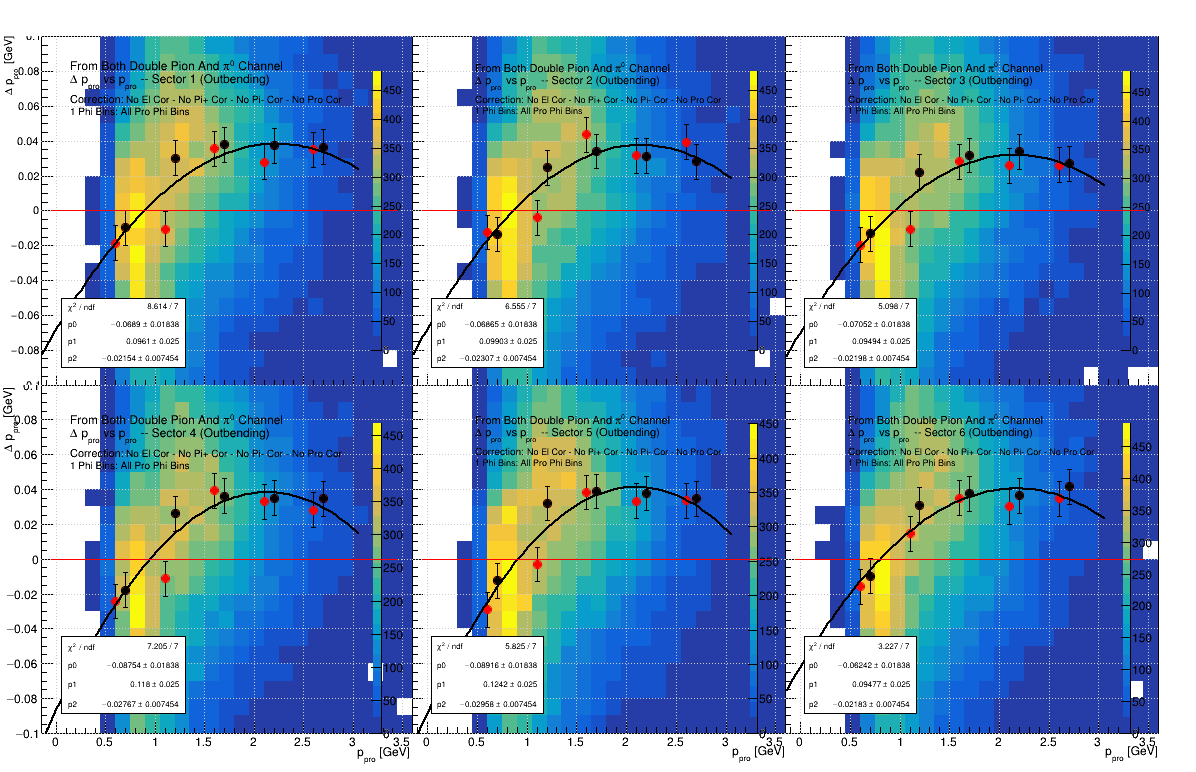

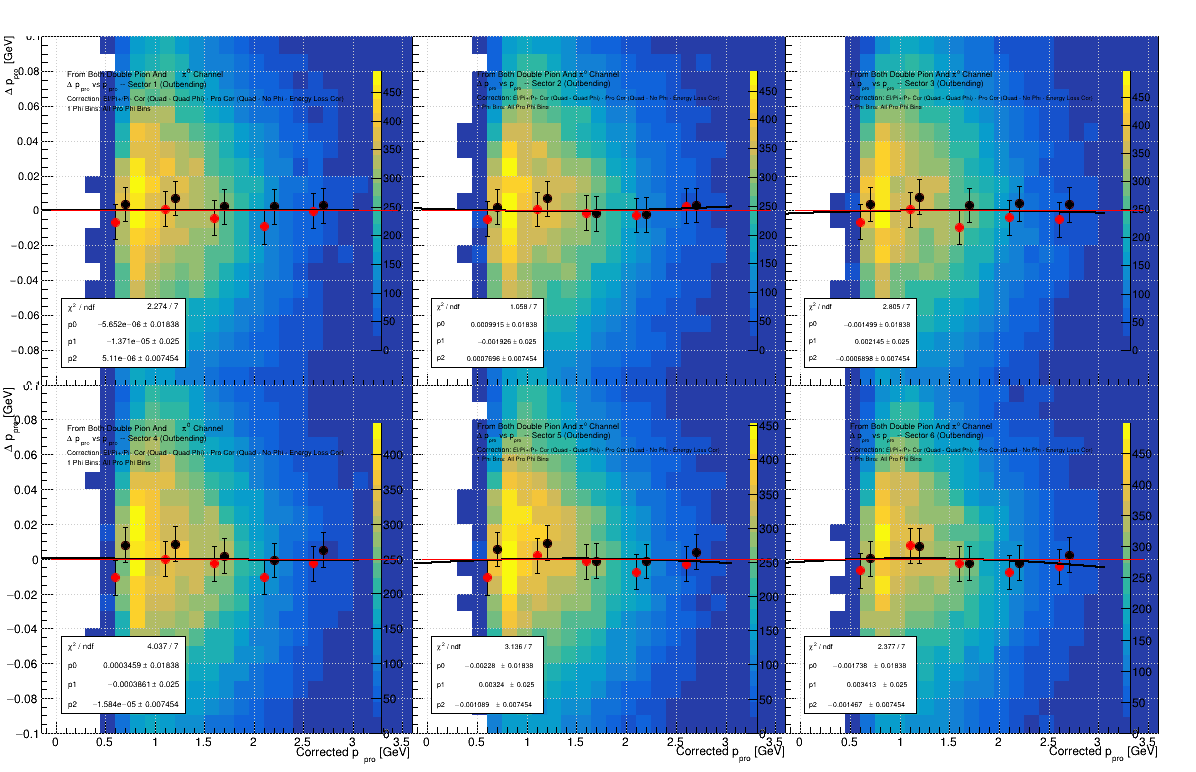

In [29]:
if(Extra_Delta_P_histoQ == 'y' and 'pro' in Delta_P_histo_CompareList):
    
    ymax, ymin = extendx_max, extendx_min

    xmin = minRange_Dp_fit_pro - 0.5
    xmax = maxRange_Dp_fit_pro + 0.5
    
    
    draw_fit_info = "yes"
    
    if(draw_fit_info == "yes"):
        stats_dp_2 = {}

    # Print the full fit function for D_pip? (let printDpQ = 'yes' or printDpQ = 'no')
    # Note: this additional function is NOT what should be used for the momentum corrections
    # printDpQ = 'yes'
    printDpQ = 'no'


    printing_to_txt_file_list = [['\nThe expression for \u0394p is defined as being: \u0394p = p_calculated - p_measured where p_measured = pp (measured by the detector/is the original corrected momentum before kinematic calculations)','\n']]


    if('all' in ExtraElectronSecListFilter):

        c2, c2all, legendCor = {}, {}, {}
        fitLine, fitQuad, fit_Line_Quad = {}, {}, {}
        
        for correction in Extra_Delta_P_histoCorList:
            for CorEQchoose in CorEQchooseList:
                
                for binning in NumPhiBins:
                    if(binning == '1'):
                        reglist = [['All Pro Phi Bins', 'regall']]
#                         continue
                    if(binning == '3'):
                        reglist = [[' (proPhi < -10)', 'reg2'], [' (-10 < proPhi < 10)', 'reg1'], [' (proPhi > 10)', 'reg3']]
                    if(binning == '5'):
                        reglist = [[' (proPhi < -15)', 'reg3'], [' (-15 < proPhi < -5)', 'reg2'], [' (-5 < proPhi < 5)','reg1'], [' (5 < proPhi < 15)', 'reg4'], [' (proPhi > 15)', 'reg5']]

                    for regionListName in reglist:
                        if(len(regionListName) != 1):
                            region = regionListName[1]
                            regionName = regionListName[0]
                        else:
                            region = regionListName

                        if('all' in Extra_Delta_P_histoSecList):
                            cNameAll = (correction, '', 'All Sectors', binning, region, CorEQchoose)
                            c2all[cNameAll] = ROOT.TCanvas("c2" + str(cNameAll),"c2" + str(cNameAll), 900, 900)
                            c2all[cNameAll].Divide(1,1,0,0)
                            c2all[cNameAll].SetGrid()
                            ROOT.gStyle.SetAxisColor(16,'xy')
                            ROOT.gStyle.SetOptFit(0)


                        cNameSec = (correction, '', 'Sectors', binning, region, CorEQchoose)
                        if(print_method == "ver"):
                            c2[cNameSec] = ROOT.TCanvas("c2" + str(cNameSec),"c2" + str(cNameSec), 1100, 1200)
                            c2[cNameSec].Divide(2, 3, 0, 0)
                        if(print_method == "hor"):
                            c2[cNameSec] = ROOT.TCanvas("c2" + str(cNameSec),"c2" + str(cNameSec), 1200, 800)
                            c2[cNameSec].Divide(3, 2, 0, 0)
                            
                        c2[cNameSec].SetGrid()
                        ROOT.gStyle.SetAxisColor(16,'xy')
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetOptStat(0)
                        ROOT.gStyle.SetTitleY(1)
                        ROOT.gStyle.SetTitleX(0.5)
#                         ROOT.gStyle.SetTitleX(0.425)
                        
                        if(draw_fit_info == "yes"):
                            ROOT.gStyle.SetOptFit(1)


                        legendCor[cNameSec] = ROOT.TLegend(0.1,0.7,0.4,0.9)
                        



        for correction in Extra_Delta_P_histoCorList:
            for CorEQchoose in CorEQchooseList:
                print("".join(["The correction equations being produced right now is: ", str(CorEQchoose), "\n"]))

                for binning in NumPhiBins:

                    if(binning == '1'):
                        reglist = [['All Pro Phi Bins', 'regall']]
                        # continue
                    if(binning == '3'):
                        reglist = [[' (proPhi < -10)', 'reg2'], [' (-10 < proPhi < 10)', 'reg1'], [' (proPhi > 10)', 'reg3']]
                    if(binning == '5'):
                        reglist = [[' (proPhi < -15)', 'reg3'], [' (-15 < proPhi < -5)', 'reg2'], [' (-5 < proPhi < 5)','reg1'], [' (5 < proPhi < 15)', 'reg4'], [' (proPhi > 15)', 'reg5']]
                        
                        
                    print("".join(["\n\n\nThe Number of Phi Bins is: ", str(binning), "\n\n"]))
                    printing_to_txt_file_list.append(["".join(["\n\n\nThe Number of Phi Bins is: ", str(binning), "\n\n"])])


                    for sec in Extra_Delta_P_histoSecList:

                        for regionListName in reglist:
                            if(len(regionListName) != 1):
                                region = regionListName[1]
                                regionName = regionListName[0]
                            else:
                                region = regionListName


                            cNameAll = (correction, '', 'All Sectors', binning, region, CorEQchoose)
                            cNameSec = (correction, '', 'Sectors', binning, region, CorEQchoose)


                            if(sec == 'all' or sec == 0):
                                SecName = ''
                                continue

                            else:
                                SecName = ''.join(['Pro Sector ', str(sec)])


                            histoName = (correction, '', SecName, binning, region)
                            # histoName_other = (((correction.replace("_PipMMF", "")).replace("_PimMMpim_qPhi", "")).replace("_NoELC", ""), '', SecName, binning, region)
                            histoName_other = (((correction.replace("_PipMMF", "")).replace("_PimMMpim_qPhi", "")), '', SecName, binning, region)

                            if(correction == '' or correction == 'mm0'):
                                CorName = 'No correction'
                            else:
                                CorName = correction

                            ShiftName = ''

                            if(sec == 'all' or sec == 0):
                                c2all[cNameAll].Draw()
                                c2all[cNameAll].cd(1)
                                Dmom_pip_Histo[histoName].GetYaxis().SetRangeUser(ymin,ymax)
                                Dmom_pip_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
                                Dmom_pip_Histo[histoName].Draw('colz')
                                ll.DrawLine(xmin,0,xmax,0)

                                if(SaveResultsQ == 'yes'):
                                    c2all[cNameAll].SaveAs("".join(["(", str(Selection_of_In_or_Out), ") Delta p vs Pro Momentum[", str(cNameAll), "].png"]))



                            else:
                                c2[cNameSec].Draw()

                                c2[cNameSec].cd(sec)
                                Dmom_pip_Histo[histoName].GetYaxis().SetRangeUser(ymin,ymax)
                                Dmom_pip_Histo[histoName].GetXaxis().SetRangeUser(xmin,xmax)
                                
                                # Dp_histo_title = str("".join(["#splitline{#splitline{#splitline{#scale[1.1]{#Delta p_{pro} vs p_{pro} -- Sector ", str(sec), "}}{#scale[0.95]{Correction:} #scale[0.85]{", str(corNameTitles(correction)), "}}}{#scale[0.9]{", str(binning), " Phi Bins: ", str(str(regionName).replace("proPhi", "#phi_{pro}")), "}}}{#scale[0.5]{Error Bars are Pre-Set (not statistical)}}"]))
                                Dp_histo_title = str("".join(["#splitline{#splitline{#scale[1.1]{#Delta p_{pro} vs p_{pro} -- Sector ", str(sec), " (", Selection_of_In_or_Out, ")}}{#scale[0.95]{Correction:} #scale[0.85]{", str(corNameTitles(correction)), "}}}{#scale[0.9]{", str(binning), " Phi Bins: ", str(str(regionName).replace("proPhi", "#phi_{pro}")), "}}"]))
                                
                                try:
                                    Dmom_pip_Histo[str((histoName, "both_2D"))] = Dmom_pip_Histo[histoName].Clone()
                                    Dmom_pip_Histo[str((histoName, "both_2D"))].Add(Dmom_pip_Histo[str((histoName_other, "other"))])
                                    
                                    Dp_histo_title = str("".join(["#splitline{#scale[1.1]{From Both Double Pion And #pi^{0} Channel}}{", Dp_histo_title, "}"]))

                                except:
                                    print("\n\n\nFailed to combine the 2D histograms\n\n\n\n")
                                    Dmom_pip_Histo[str((histoName, "both_2D"))] = Dmom_pip_Histo[histoName]
                                    
                                Dp_histo_title = str("".join([Dp_histo_title, ";", "Corrected " if("_NoELC" not in correction) else "", "p_{pro} [GeV];#Delta p_{pro} [GeV]"]))
                                    
                                    
                                # Dmom_pip_Histo[histoName].Draw('colz')
                                Dmom_pip_Histo[str((histoName, "both_2D"))].Draw('colz')
                                
                                # Dp_histo_title = str("".join(["#splitline{#splitline{#scale[1.1]{#Delta p_{pro} vs p_{pro} -- Sector ", str(sec), "}}{#scale[0.65]{Correction:} #scale[0.5]{", str(corNameTitles(correction)), "}}}{#scale[0.9]{", str(binning), " Phi Bins: ", str(str(regionName).replace("proPhi", "#phi_{pro}")), "}};p_{pro} [GeV];#Delta p_{pro} [GeV]"]))
                                
                                # Dmom_pip_Histo[histoName].SetTitle(Dp_histo_title)
                                Dmom_pip_Histo[str((histoName, "both_2D"))].SetTitle(Dp_histo_title)
                                
                                try:
                                    Dmom_pip_Histo[str((histoName, "both"))] = Merge_Histos(Dmom_pip_Histo[histoName].gr2, Dmom_pip_Histo[str((histoName_other, "other"))].gr2)
                                    Dmom_pip_Histo[str((histoName, "both"))].Draw("P same")
                                except:
                                    print("Failed Extra")

                                Dmom_pip_Histo[histoName].gr2.Draw("P same")

                                if(CorEQchoose == 'linear'):
                                    try:
                                        Dmom_pip_Histo[str((histoName, "both"))].Fit("pol1")
                                        Dmom_pip_Histo[str((histoName, "both"))].GetFunction("pol1").SetLineColor(1)
                                    except:
                                        Dmom_pip_Histo[histoName].gr2.Fit("pol1")
                                        Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").SetLineColor(1);

                                if(CorEQchoose == 'quadratic'):
                                    try:
                                        Dmom_pip_Histo[str((histoName, "both"))].Fit("pol2")
                                        Dmom_pip_Histo[str((histoName, "both"))].GetFunction("pol2").SetLineColor(1)
                                    except:
                                        Dmom_pip_Histo[histoName].gr2.Fit("pol2")
                                        Dmom_pip_Histo[histoName].gr2.GetFunction("pol2").SetLineColor(1);

                                    # if('mm0' in correction):
                                    #     BaseLineQuadFit[str(sec)].Draw('same')
                                    #     BaseLineQuadFit[str(sec)].SetLineColor(2);
                                

                                if(CorEQchoose == 'both'):

                                    # if('mm0' in correction):
                                        # legendCor[cNameSec].AddEntry(BaseLineQuadFit[str(sec)],"Baseline Quadratic Pi+","l")
                                    try:
                                        Dmom_pip_Histo[str((histoName, "both"))].Fit("pol2")
                                    except:
                                        Dmom_pip_Histo[histoName].gr2.Fit("pol1")

                                    try:
                                        # fitLine[histoName] = ROOT.TF1("fitLine[" + str(histoName) + "]", str(round(Dmom_pip_Histo[str((histoName, "both"))].gr2.GetFunction("pol1").GetParameter(1),8)) + "*x + (" + str(round(Dmom_pip_Histo[str((histoName, "both"))].gr2.GetFunction("pol1").GetParameter(0),8)) + ")", minRange_Dp_fit_pro, maxRange_Dp_fit_pro)
                                        fitLine[histoName] = ROOT.TF1("fitLine[" + str(histoName) + "]", str(round(Dmom_pip_Histo[str((histoName, "both"))].gr2.GetFunction("pol1").GetParameter(1),8)) + "*x + (" + str(round(Dmom_pip_Histo[str((histoName, "both"))].gr2.GetFunction("pol1").GetParameter(0),8)) + ")", 0.2, maxRange_Dp_fit_pro)
                                    except:
                                        # fitLine[histoName] = ROOT.TF1("fitLine[" + str(histoName) + "]", str(round(Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").GetParameter(1),8)) + "*x + (" + str(round(Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").GetParameter(0),8)) + ")", minRange_Dp_fit_pro, maxRange_Dp_fit_pro)
                                        fitLine[histoName] = ROOT.TF1("fitLine[" + str(histoName) + "]", str(round(Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").GetParameter(1),8)) + "*x + (" + str(round(Dmom_pip_Histo[histoName].gr2.GetFunction("pol1").GetParameter(0),8)) + ")", 0.2, maxRange_Dp_fit_pro)
                                        
                                    fitLine[histoName].SetLineColor(3);
                                    fitLine[histoName].Draw("same")
                                    legendCor[cNameSec].AddEntry(fitLine[histoName],"Delta p Linear Pro","l")

                                    legendCor[cNameSec].Draw('same')

                                    try:
                                        Dmom_pip_Histo[str((histoName, "both"))].gr2.Fit("pol2")
                                        fitQuad[histoName] = Dmom_pel_Histo[str((histoName, "both"))].gr2.GetFunction("pol2")
                                    except:
                                        Dmom_pip_Histo[histoName].gr2.Fit("pol2")
                                        fitQuad[histoName] = Dmom_pel_Histo[histoName].gr2.GetFunction("pol2")
                                    fitQuad[histoName].SetLineColor(4);
                                    fitQuad[histoName].Draw("same")
                                    legendCor[cNameSec].AddEntry(fitQuad[histoName],"Delta p Quadratic Pro","l")

                                    legendCor[cNameSec].Draw('same')


                                ll.DrawLine(xmin,0,xmax,0)
                                        
                                if(draw_fit_info == "yes"):
                                    finding, search = 0, 0

                                    while(finding == 0 and search < 5):
                                        try:
                                            stats_dp_2[str(histoName)] = Dmom_pip_Histo[str((histoName, "both"))].GetListOfFunctions().FindObject("stats")
                                        except:
                                            stats_dp_2[str(histoName)] = Dmom_pip_Histo[histoName].gr2.GetListOfFunctions().FindObject("stats")
                                        try:

                                            if(print_method == "ver"):
                                                stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.4)
                                                stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.4)
                                                if(sec > 4):
                                                    stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.3)
                                                    stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.3)

                                                if(sec%2 == 0):
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15 - 0.1)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45 - 0.1)
                                                else:
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45)

                                            if(print_method == "hor"):
                                                stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.4)
                                                stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.4)
                                                if(sec > 3):
                                                    stats_dp_2[str(histoName)].SetY1NDC(0.45 - 0.3)
                                                    stats_dp_2[str(histoName)].SetY2NDC(0.65 - 0.3)

                                                if(sec != 1 and sec != 4):
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15 - 0.1)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45 - 0.1)
                                                else:
                                                    stats_dp_2[str(histoName)].SetX1NDC(0.15)
                                                    stats_dp_2[str(histoName)].SetX2NDC(0.45)

                                            stats_dp_2[str(histoName)].Draw("same")
                                            c2[cNameSec].Modified()
                                            c2[cNameSec].Update()
                                            finding += 1
                                        except:
                                            c2[cNameSec].Modified()
                                            c2[cNameSec].Update()
                                            finding = 0
                                            search += 1

                                    if(search > 4):
                                        print("Failed search")
                                        
                                        
                                    
                                palette_test = 0

                                while(palette_test < 4 and palette_test != -1):
                                    try:
                                        try:
                                            palette_MM_histo_for_cut_2D = Dmom_pip_Histo[str((histoName, "both_2D"))].GetListOfFunctions().FindObject("palette")
                                        except:
                                            palette_MM_histo_for_cut_2D = Dmom_pip_Histo[histoName].GetListOfFunctions().FindObject("palette")
                                            
                                        palette_MM_histo_for_cut_2D.SetX1NDC(0.83 + 0.075)
                                        palette_MM_histo_for_cut_2D.SetX2NDC(0.85 + 0.075)
                                        palette_MM_histo_for_cut_2D.SetY1NDC(0.1)
                                        palette_MM_histo_for_cut_2D.SetY2NDC(0.9)
                                        c2[cNameSec].Modified()
                                        c2[cNameSec].Update()
                                        palette_test = -1
                                    except:
                                        palette_test += 1

                                if(palette_test > 0):
                                    print("\nfailed")

                                        
                                        
                                # if(CorEQchoose != 'both' and CorEQchoose != 'combined_2' and CorEQchoose != 'extra pol2'):
                                if(CorEQchoose != 'both'):
                                    try:
                                        printing_to_txt_file_list.append(PnCF_Dpro(Dmom_pip_Histo, histoName, CorName, sec, printDpQ, regionName, CorEQchoose))
                                    except:
                                        print("\nFailed to print...\n")
                                        
                                    
                                if("Pip" not in correction and "Pro" not in correction):
                                    try:
                                        Final_Cor[str((region, Selection_of_In_or_Out.replace("bending", ""), 'pro', sec))].SetLineColor(2)
                                        Final_Cor[str((region, Selection_of_In_or_Out.replace("bending", ""), 'pro', sec))].Draw("same")
                                    except:
                                        print("Failed a final correction draw")

                                    
                                    
                                if(SaveResultsQ == 'yes'):
                                    
                                    save_name = "".join([str(Selection_of_In_or_Out), "_Delta_p_vs_Pro_Momentum_", str(cNameSec), "_Fit_", str(CorEQchoose), ".png"])

                                    save_name = save_name.replace("regall", "Intergrated_Phi")
                                    save_name = save_name.replace("reg1", "Center_Phi")
                                    save_name = save_name.replace("reg2", "Negative_Phi")
                                    save_name = save_name.replace("reg3", "Positive_Phi")

                                    save_name = save_name.replace(correction, corNameTitles(correction).replace("/", "_"))
                                    
                                    save_name = save_name.replace(" ", "_")
                                    save_name = save_name.replace("__", "_")
                                    
                                    # print(save_name)
                                    
                                    c2[cNameSec].SaveAs(save_name)


                print("\n\n\n")
                printing_to_txt_file_list.append(['\n\n\n'])





        if(SaveResultsQ != 'yes'):
            print("These results are not currently being saved.")

    else:
        print("This cell can only run when the option to not filter by Electron sector is choosen.")
else:
    print("Not running these histograms at this time.")



.

.

.

# π+ Phi Corrections

# Plots of Fit Parameters with respect to π+ Phi

## From 3 Phi Bins

### Continuous pol1 phi

In [30]:
# Standard Form Output (linear phi)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '3' in NumPhiBins and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no' and 'pi+' in Delta_P_histo_CompareList):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Line'):
        ContinuousPipCor_print = []

        # ContinuousPipCor_print.append("\n\n")


        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par0")),"cCor_Phi_"+str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par1")),"cCor_Phi_"+str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par2")),"cCor_Phi_"+str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    cCor_Phi[(correction,LineOrQuad,"pl0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl0")),"cCor_Phi_"+str((correction,LineOrQuad,"pl0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pl1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl1")),"cCor_Phi_"+str((correction,LineOrQuad,"pl1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq1")),"cCor_Phi_"+str((correction,LineOrQuad,"pq1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq2")),"cCor_Phi_"+str((correction,LineOrQuad,"pq2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].SetGrid()

                if(LineOrQuad == 'extra pol2'):
                    cCor_Phi[(correction,LineOrQuad,"pf2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf2")),"cCor_Phi_"+str((correction,LineOrQuad,"pf2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf1")),"cCor_Phi_"+str((correction,LineOrQuad,"pf1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf0")),"cCor_Phi_"+str((correction,LineOrQuad,"pf0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps2")),"cCor_Phi_"+str((correction,LineOrQuad,"ps2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps1")),"cCor_Phi_"+str((correction,LineOrQuad,"ps1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].SetGrid()



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in Extra_Delta_P_histoSecList:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []
                    SecName = ''.join(['Pi+ Sector ', str(sec)])

                    graphName = (correction, sec, LineOrQuad)

                    gCor_Par4[graphName] = ROOT.TGraphErrors()
                    gCor_Par4[graphName].SetMarkerStyle(20)

                    gCor_Par3[graphName] = ROOT.TGraphErrors()
                    gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-20, 'reg2'], [20, 'reg3']]


                    for reglist in reglist1:
                        region = reglist[1]

                        phiXpoint = reglist[0]

                        h2DName = (correction, '', SecName, '3', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol2_"+str(h2DName))


                            phiY_Par_pf0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf0"),8)
                            phiY_Par_pf0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(0)

                            phiY_Par_pf1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf1"),8)
                            phiY_Par_pf1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(1)

                            phiY_Par_pf2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf2"),8)
                            phiY_Par_pf2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(2)

                            phiY_Par_ps1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps1"),8)
                            phiY_Par_ps1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(3)

                            phiY_Par_ps2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps2"),8)
                            phiY_Par_ps2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(4)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pf0
                                point_y1_Par1 = phiY_Par_pf1
                                point_y1_Par2 = phiY_Par_pf2
                                point_y1_Par3 = phiY_Par_ps1
                                point_y1_Par4 = phiY_Par_ps2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pf0
                                point_y2_Par1 = phiY_Par_pf1
                                point_y2_Par2 = phiY_Par_pf2
                                point_y2_Par3 = phiY_Par_ps1
                                point_y2_Par4 = phiY_Par_ps2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pf0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pf0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pf1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pf1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pf2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pf2_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_ps1)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_ps1_Error)

                            gCor_Par4[graphName].SetPoint(gCor_Par4[graphName].GetN(), phiXpoint, phiY_Par_ps2)
                            gCor_Par4[graphName].SetPointError(gCor_Par4[graphName].GetN()-1, 1, phiY_Par_ps2_Error)





                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol1_"+str(h2DName))

                            phiY_Par_pl0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl0"),8)
                            phiY_Par_pl0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(0)

                            phiY_Par_pl1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl1"),8)
                            phiY_Par_pl1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(1)

                            phiY_Par_pq1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq1"),8)
                            phiY_Par_pq1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(2)

                            phiY_Par_pq2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq2"),8)
                            phiY_Par_pq2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(3)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pl0
                                point_y1_Par1 = phiY_Par_pl1
                                point_y1_Par2 = phiY_Par_pq1
                                point_y1_Par3 = phiY_Par_pq2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pl0
                                point_y2_Par1 = phiY_Par_pl1
                                point_y2_Par2 = phiY_Par_pq1
                                point_y2_Par3 = phiY_Par_pq2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pl0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pl0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pl1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pl1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pq1)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pq1_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_pq2)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_pq2_Error)







                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg2'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg3'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)




                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg2'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg3'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


    ###############################################################################################################################################
        ##==========##==========##==========##==========##     Got Points from Descrete Fits     ##==========##==========##==========##==========##
    ###############################################################################################################################################











    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    CorrectionName = 'El Cor with 3 phi bins'

                    CorrectionName = corNameTitles(correction)
                    # if('mm0' in correction):
                    #     CorrectionName = 'No El Cor'
                    # if('mm1' in correction):
                    #     CorrectionName = 'El Cor without phi bins'
                    # if('mm3' in correction):
                    #     CorrectionName = 'El Cor with 3 phi bins'
                    # if('mm5' in correction):
                    #     CorrectionName = 'El Cor with 5 phi bins'
                    # if('mmPhi' in correction):
                    #     CorrectionName = 'El Cor with function of phi'
                    # if('PipMMQ' in correction):
                    #     CorrectionName = CorrectionName + ' - With baseline pi+ correction'
                    # if('PipMMPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear Cont Pi+ Cor'
                    # if('PipMMqPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad Cont Pi+ Cor'
                    # if('PipMM3' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear 3 Phi Bin Pi+ Cor'
                    # if('PipMMq3' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad 3 Phi Bin Pi+ Cor'


                    lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
                    lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
                    lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)



                    lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
                    lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
                    lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic' or LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
                        lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
                        # lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)


                    if(LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit3 = ROOT.TF1("lineFit3","[p1]*x + [p0]")
                        # lineFit3.SetParameter(1,(point_y2_Par3 - point_y1_Par3)/40)
                        lineFit3.SetParLimits(1,((point_y2_Par3 - point_y1_Par3)/40)*0.2,((point_y2_Par3 - point_y1_Par3)/40)*1.8)


                    if(LineOrQuad == 'extra pol2'):
                        lineFit4 = ROOT.TF1("lineFit4","[p1]*x + [p0]")
                        # lineFit4.SetParameter(1,(point_y2_Par4 - point_y1_Par4)/40)
                        lineFit4.SetParLimits(1,((point_y2_Par4 - point_y1_Par4)/40)*0.2,((point_y2_Par4 - point_y1_Par4)/40)*1.8)



                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                    if(LineOrQuad == 'extra pol2'):

                        cCor_Phi[(correction,LineOrQuad,"pf0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pf0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf0' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pf1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf1' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pf2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf2' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"ps1")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'ps1' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")


                            cCor_Phi[(correction,LineOrQuad,"ps2")].cd(sec)
                            gCor_Par4[graphName].Draw("AP")
                            gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par4[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'ps2' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par4[graphName].Fit("lineFit4")


                        firstLinePrint = "\nThe CONTINUOUS DOUBLE QUADRATIC (pol2 then pol2) correction function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        First_Part = 'error'
                        Second_Part = 'error'



                        Par_pf0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_pf0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_pf0_B < 0):
                            par_pf0 = "(("+str(Par_pf0_A)+")*phi - ("+str(abs(Par_pf0_B))+"))"
                        else:
                            par_pf0 = "(("+str(Par_pf0_A)+")*phi + ("+str(Par_pf0_B)+"))"


                        Par_pf1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_pf1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_pf1_B < 0):
                            par_pf1 = "(("+str(Par_pf1_A)+")*phi - ("+str(abs(Par_pf1_B))+"))"
                        else:
                            par_pf1 = "(("+str(Par_pf1_A)+")*phi + ("+str(Par_pf1_B)+"))"


                        Par_pf2_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_pf2_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_pf2_B < 0):
                            par_pf2 = "(("+str(Par_pf2_A)+")*phi - ("+str(abs(Par_pf2_B))+"))"
                        else:
                            par_pf2 = "(("+str(Par_pf2_A)+")*phi + ("+str(Par_pf2_B)+"))"


                        Par_ps1_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_ps1_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_ps1_B < 0):
                            par_ps1 = "(("+str(Par_ps1_A)+")*phi - ("+str(abs(Par_ps1_B))+"))"
                        else:
                            par_ps1 = "(("+str(Par_ps1_A)+")*phi + ("+str(Par_ps1_B)+"))"


                        Par_ps2_A = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(1),8)
                        Par_ps2_B = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(0),8)
                        if(Par_ps2_B < 0):
                            par_ps2 = "(("+str(Par_ps2_A)+")*phi - ("+str(abs(Par_ps2_B))+"))"
                        else:
                            par_ps2 = "(("+str(Par_ps2_A)+")*phi + ("+str(Par_ps2_B)+"))"



                        First_Part = "((1 + TMath::Sign(1, -(pp - 5)))/2)*(" + str(par_pf2) + "*pp*pp + " + str(par_pf1) + "*pp + " + str(par_pf0) + ")"
                        Second_Part = "((1 + TMath::Sign(1, (pp - 5)))/2)*(" + str(par_ps2) + "*(pp - 5)*(pp - 5) + " + str(par_ps1) + "*(pp - 5) + (" + str(par_pf2) + "*25 + " + str(par_pf1) + "*5 + " + str(par_pf0) + "))"

                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(First_Part) + " + " + str(Second_Part) + ";"
                        else:
                            full_Correction = "dp = " + str(First_Part) + " + " + str(Second_Part) + ";"


                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')



                ##################################          Linear + Quadratic (combined)          ##################################

                    # if(LineOrQuad == 'combined'):
                    if('combined' in LineOrQuad):

                        cCor_Phi[(correction,LineOrQuad,"pl0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pl1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pl0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pl0' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pl1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pl1' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pq1")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pq1' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"pq2")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pq2' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")



                        firstLinePrint = "\nThe CONTINUOUS COMBINED (pol2 then pol1) correction function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        linear_Part = 'error'
                        quadratic_Part = 'error'



                        Par_l0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_l0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_l0_B < 0):
                            par_l0 = "(("+str(Par_l0_A)+")*phi - ("+str(abs(Par_l0_B))+"))"
                        else:
                            par_l0 = "(("+str(Par_l0_A)+")*phi + ("+str(Par_l0_B)+"))"

                        Par_l1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_l1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_l1_B < 0):
                            par_l1 = "(("+str(Par_l1_A)+")*phi - ("+str(abs(Par_l1_B))+"))"
                        else:
                            par_l1 = "(("+str(Par_l1_A)+")*phi + ("+str(Par_l1_B)+"))"

                        Par_q1_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_q1_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_q1_B < 0):
                            par_q1 = "(("+str(Par_q1_A)+")*phi - ("+str(abs(Par_q1_B))+"))"
                        else:
                            par_q1 = "(("+str(Par_q1_A)+")*phi + ("+str(Par_q1_B)+"))"

                        Par_q2_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_q2_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_q2_B < 0):
                            par_q2 = "(("+str(Par_q2_A)+")*phi - ("+str(abs(Par_q2_B))+"))"
                        else:
                            par_q2 = "(("+str(Par_q2_A)+")*phi + ("+str(Par_q2_B)+"))"


                        if(LineOrQuad == 'combined'):
                            func_switch_at = '5'
                        if(LineOrQuad == 'combined_2'):
                            func_switch_at = '4'


                        linear_Part = "((1 + TMath::Sign(1, (pp - " + func_switch_at + ")))/2)*(" + str(par_l1) + "*pp + " + str(par_l0) + ")"
                        quadratic_Part = "((1 + TMath::Sign(1, -(pp - " + func_switch_at + ")))/2)*(" + str(par_q2) + "*(pp - " + func_switch_at + ")*(pp - " + func_switch_at + ") + " + str(par_q1) + "*(pp - " + func_switch_at + ") + (" + str(par_l1) + "*" + func_switch_at + " + " + str(par_l0) + "))"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(quadratic_Part) + " + " + str(linear_Part) + ";"
                        else:
                            full_Correction = "dp = " + str(quadratic_Part) + " + " + str(linear_Part) + ";"

                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction,LineOrQuad,"par2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5,5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'a' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")



                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "\nThe CONTINUOUS QUADRATIC function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'


                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_L_B2 < 0):
                            Par_A = "(("+str(Par_L_A2)+")*phi - ("+str(abs(Par_L_B2))+"))"
                        else:
                            Par_A = "(("+str(Par_L_A2)+")*phi + ("+str(Par_L_B2)+"))"

                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_B1 < 0):
                            Par_B = "(("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
                        else:
                            Par_B = "(("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_L_B0 < 0):
                            Par_C = "(("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
                        else:
                            Par_C = "(("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"


                        full_Correction = str(Par_A)+"*pp*pp + "+str(Par_B)+"*pp + "+str(Par_C)+";"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            # gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            # gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "\nThe CONTINUOUS LINEAR function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'


                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)

                        if(Par_L_B1 < 0):
                            Par_A = "((" + str(Par_L_A1) + ")*phi - (" + str(abs(Par_L_B1)) + "))"
                        else:
                            Par_A = "((" + str(Par_L_A1) + ")*phi + (" + str(Par_L_B1) + "))"

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_B0 < 0):
                            Par_B = "((" + str(Par_L_A0) + ")*phi - (" + str(abs(Par_L_B0)) + "))"
                        else:
                            Par_B = "((" + str(Par_L_A0) + ")*phi + (" + str(Par_L_B0) + "))"


                        full_Correction = str(Par_A) + "*pp + " + str(Par_B) + ";"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint + '\n' + full_Correction + '\n')

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs(str(Selection_of_In_or_Out)+" Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [Cor = "+str(CorrectionName)+"][Parameter = a].png")
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs(str(Selection_of_In_or_Out)+" Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [Cor = "+str(CorrectionName)+"][Parameter = b].png")
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs(str(Selection_of_In_or_Out)+" Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [Cor = "+str(CorrectionName)+"][Parameter = c].png")
                            

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

### Continuous pol2 phi

In [31]:
# Standard Form Output (pol2 phi functions)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '3' in NumPhiBins and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no' and 'pi+' in Delta_P_histo_CompareList):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Quad'):
        
        ContinuousPipCor_print = []

        # ContinuousPipCor_print.append("\n\n")
        ContinuousPipCor_print.append("\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.\n\n")

        print("\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.\n\n")

        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            # if(correction == 'mm0' or correction == 'mm1'):
            #     continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par0")),"cCor_Phi_"+str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par1")),"cCor_Phi_"+str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par2")),"cCor_Phi_"+str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    cCor_Phi[(correction,LineOrQuad,"pl0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl0")),"cCor_Phi_"+str((correction,LineOrQuad,"pl0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pl1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl1")),"cCor_Phi_"+str((correction,LineOrQuad,"pl1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq1")),"cCor_Phi_"+str((correction,LineOrQuad,"pq1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq2")),"cCor_Phi_"+str((correction,LineOrQuad,"pq2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].SetGrid()

                if(LineOrQuad == 'extra pol2'):
                    cCor_Phi[(correction,LineOrQuad,"pf2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf2")),"cCor_Phi_"+str((correction,LineOrQuad,"pf2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf1")),"cCor_Phi_"+str((correction,LineOrQuad,"pf1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf0")),"cCor_Phi_"+str((correction,LineOrQuad,"pf0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps2")),"cCor_Phi_"+str((correction,LineOrQuad,"ps2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps1")),"cCor_Phi_"+str((correction,LineOrQuad,"ps1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].SetGrid()



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################    

        for correction in Extra_Delta_P_histoCorList:
            # if(correction == 'mm0' or correction == 'mm1'):
            #     continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in Extra_Delta_P_histoSecList:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []
                    ContinuousPipCor_print.append("\n\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.")

                    SecName = ''.join(['Pi+ Sector ', str(sec)])

                    graphName = (correction, sec, LineOrQuad)

                    gCor_Par4[graphName] = ROOT.TGraphErrors()
                    gCor_Par4[graphName].SetMarkerStyle(20)

                    gCor_Par3[graphName] = ROOT.TGraphErrors()
                    gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-20, 'reg2'], [20, 'reg3']]


                    for reglist in reglist1:
                        region = reglist[1]

                        phiXpoint = reglist[0]

                        h2DName = (correction, '', SecName, '3', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol2_"+str(h2DName))


                            phiY_Par_pf0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf0"),8)
                            phiY_Par_pf0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(0)

                            phiY_Par_pf1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf1"),8)
                            phiY_Par_pf1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(1)

                            phiY_Par_pf2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf2"),8)
                            phiY_Par_pf2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(2)

                            phiY_Par_ps1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps1"),8)
                            phiY_Par_ps1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(3)

                            phiY_Par_ps2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps2"),8)
                            phiY_Par_ps2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(4)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pf0
                                point_y1_Par1 = phiY_Par_pf1
                                point_y1_Par2 = phiY_Par_pf2
                                point_y1_Par3 = phiY_Par_ps1
                                point_y1_Par4 = phiY_Par_ps2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pf0
                                point_y2_Par1 = phiY_Par_pf1
                                point_y2_Par2 = phiY_Par_pf2
                                point_y2_Par3 = phiY_Par_ps1
                                point_y2_Par4 = phiY_Par_ps2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pf0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pf0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pf1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pf1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pf2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pf2_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_ps1)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_ps1_Error)

                            gCor_Par4[graphName].SetPoint(gCor_Par4[graphName].GetN(), phiXpoint, phiY_Par_ps2)
                            gCor_Par4[graphName].SetPointError(gCor_Par4[graphName].GetN()-1, 1, phiY_Par_ps2_Error)





                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol1_"+str(h2DName))

                            phiY_Par_pl0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl0"),8)
                            phiY_Par_pl0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(0)

                            phiY_Par_pl1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl1"),8)
                            phiY_Par_pl1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(1)

                            phiY_Par_pq1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq1"),8)
                            phiY_Par_pq1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(2)

                            phiY_Par_pq2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq2"),8)
                            phiY_Par_pq2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(3)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pl0
                                point_y1_Par1 = phiY_Par_pl1
                                point_y1_Par2 = phiY_Par_pq1
                                point_y1_Par3 = phiY_Par_pq2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pl0
                                point_y2_Par1 = phiY_Par_pl1
                                point_y2_Par2 = phiY_Par_pq1
                                point_y2_Par3 = phiY_Par_pq2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pl0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pl0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pl1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pl1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pq1)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pq1_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_pq2)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_pq2_Error)







                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg2'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg3'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)






                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg2'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg3'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


                    CorrectionName = 'El Cor with 3 phi bins'

                    CorrectionName = corNameTitles(correction)
                    
                    # if('mm0' in correction):
                    #     CorrectionName = 'No El Cor'
                    # if('mm1' in correction):
                    #     CorrectionName = 'El Cor without phi bins'
                    # if('mm3' in correction):
                    #     CorrectionName = 'El Cor with 3 phi bins'
                    # if('mm5' in correction):
                    #     CorrectionName = 'El Cor with 5 phi bins'
                    # if('mmPhi' in correction):
                    #     CorrectionName = 'El Cor with function of phi'
                    # if('PipMMQ' in correction):
                    #     CorrectionName = CorrectionName + ' - With baseline pi+ correction'
                    # if('PipMMPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear Cont Pi+ Cor'
                    # if('PipMMqPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad Cont Pi+ Cor'
                    # if('PipMM3' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear 3 Phi Bin Pi+ Cor'
                    # if('PipMMq3' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad 3 Phi Bin Pi+ Cor'



    #                 lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    lineFit0 = ROOT.TF1("lineFit0","[p2]*x*x + [p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
    #                 lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
    #                 lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)


    #                 lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    lineFit1 = ROOT.TF1("lineFit1","[p2]*x*x + [p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
    #                 lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
    #                 lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic' or LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
    #                     lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        lineFit2 = ROOT.TF1("lineFit2","[p2]*x*x + [p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
    #                     lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
    #                     lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)


                    if(LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
    #                     lineFit3 = ROOT.TF1("lineFit3","[p1]*x + [p0]")
                        lineFit3 = ROOT.TF1("lineFit3","[p2]*x*x + [p1]*x + [p0]")
    #                     lineFit3.SetParameter(1,(point_y2_Par3 - point_y1_Par3)/40)
    #                     lineFit3.SetParLimits(1,((point_y2_Par3 - point_y1_Par3)/40)*0.2,((point_y2_Par3 - point_y1_Par3)/40)*1.8)


                    if(LineOrQuad == 'extra pol2'):
    #                     lineFit4 = ROOT.TF1("lineFit4","[p1]*x + [p0]")
                        lineFit4 = ROOT.TF1("lineFit4","[p2]*x*x + [p1]*x + [p0]")
    #                     lineFit4.SetParameter(1,(point_y2_Par4 - point_y1_Par4)/40)
    #                     lineFit4.SetParLimits(1,((point_y2_Par4 - point_y1_Par4)/40)*0.2,((point_y2_Par4 - point_y1_Par4)/40)*1.8)



                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                    if(LineOrQuad == 'extra pol2'):

                        cCor_Phi[(correction,LineOrQuad,"pf0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pf0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf0' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pf1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf1' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pf2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf2' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"ps1")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'ps1' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")


                            cCor_Phi[(correction,LineOrQuad,"ps2")].cd(sec)
                            gCor_Par4[graphName].Draw("AP")
                            gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par4[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'ps2' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par4[graphName].Fit("lineFit4")


                        firstLinePrint = "// The CONTINUOUS DOUBLE QUADRATIC (pol2 then pol2) correction function predicted for ∆p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        First_Part = 'error'
                        Second_Part = 'error'



                        Par_pf0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_pf0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_pf0_B < 0):
                            par_pf0 = "(("+str(Par_pf0_A)+")*phi - ("+str(abs(Par_pf0_B))+"))"
                        else:
                            par_pf0 = "(("+str(Par_pf0_A)+")*phi + ("+str(Par_pf0_B)+"))"


                        Par_pf1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_pf1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_pf1_B < 0):
                            par_pf1 = "(("+str(Par_pf1_A)+")*phi - ("+str(abs(Par_pf1_B))+"))"
                        else:
                            par_pf1 = "(("+str(Par_pf1_A)+")*phi + ("+str(Par_pf1_B)+"))"


                        Par_pf2_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_pf2_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_pf2_B < 0):
                            par_pf2 = "(("+str(Par_pf2_A)+")*phi - ("+str(abs(Par_pf2_B))+"))"
                        else:
                            par_pf2 = "(("+str(Par_pf2_A)+")*phi + ("+str(Par_pf2_B)+"))"


                        Par_ps1_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_ps1_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_ps1_B < 0):
                            par_ps1 = "(("+str(Par_ps1_A)+")*phi - ("+str(abs(Par_ps1_B))+"))"
                        else:
                            par_ps1 = "(("+str(Par_ps1_A)+")*phi + ("+str(Par_ps1_B)+"))"


                        Par_ps2_A = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(1),8)
                        Par_ps2_B = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(0),8)
                        if(Par_ps2_B < 0):
                            par_ps2 = "(("+str(Par_ps2_A)+")*phi - ("+str(abs(Par_ps2_B))+"))"
                        else:
                            par_ps2 = "(("+str(Par_ps2_A)+")*phi + ("+str(Par_ps2_B)+"))"



                        First_Part = "((1 + TMath::Sign(1, -(pp - 5)))/2)*(" + str(par_pf2) + "*pp*pp + " + str(par_pf1) + "*pp + " + str(par_pf0) + ")"
                        Second_Part = "((1 + TMath::Sign(1, (pp - 5)))/2)*(" + str(par_ps2) + "*(pp - 5)*(pp - 5) + " + str(par_ps1) + "*(pp - 5) + (" + str(par_pf2) + "*25 + " + str(par_pf1) + "*5 + " + str(par_pf0) + "))"

                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(First_Part) + " + " + str(Second_Part) + ";"
                        else:
                            full_Correction = "dp = " + str(First_Part) + " + " + str(Second_Part) + ";"


                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')



                ##################################          Linear + Quadratic (combined)          ##################################

                    # if(LineOrQuad == 'combined'):
                    if('combined' in LineOrQuad):

                        cCor_Phi[(correction,LineOrQuad,"pl0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pl1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pl0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pl0' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pl1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pl1' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pq1")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pq1' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"pq2")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pq2' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")



                        firstLinePrint = "// The CONTINUOUS COMBINED (pol2 then pol1) correction function predicted for ∆p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        linear_Part = 'error'
                        quadratic_Part = 'error'



                        Par_l0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_l0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_l0_B < 0):
                            par_l0 = "(("+str(Par_l0_A)+")*phi - ("+str(abs(Par_l0_B))+"))"
                        else:
                            par_l0 = "(("+str(Par_l0_A)+")*phi + ("+str(Par_l0_B)+"))"

                        Par_l1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_l1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_l1_B < 0):
                            par_l1 = "(("+str(Par_l1_A)+")*phi - ("+str(abs(Par_l1_B))+"))"
                        else:
                            par_l1 = "(("+str(Par_l1_A)+")*phi + ("+str(Par_l1_B)+"))"

                        Par_q1_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_q1_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_q1_B < 0):
                            par_q1 = "(("+str(Par_q1_A)+")*phi - ("+str(abs(Par_q1_B))+"))"
                        else:
                            par_q1 = "(("+str(Par_q1_A)+")*phi + ("+str(Par_q1_B)+"))"

                        Par_q2_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_q2_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_q2_B < 0):
                            par_q2 = "(("+str(Par_q2_A)+")*phi - ("+str(abs(Par_q2_B))+"))"
                        else:
                            par_q2 = "(("+str(Par_q2_A)+")*phi + ("+str(Par_q2_B)+"))"


                        if(LineOrQuad == 'combined'):
                            func_switch_at = '5'
                        if(LineOrQuad == 'combined_2'):
                            func_switch_at = '4'


                        linear_Part = "((1 + TMath::Sign(1, (pp - " + func_switch_at + ")))/2)*(" + str(par_l1) + "*pp + " + str(par_l0) + ")"
                        quadratic_Part = "((1 + TMath::Sign(1, -(pp - " + func_switch_at + ")))/2)*(" + str(par_q2) + "*(pp - " + func_switch_at + ")*(pp - " + func_switch_at + ") + " + str(par_q1) + "*(pp - " + func_switch_at + ") + (" + str(par_l1) + "*" + func_switch_at + " + " + str(par_l0) + "))"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(quadratic_Part) + " + " + str(linear_Part) + ";"
                        else:
                            full_Correction = "dp = " + str(quadratic_Part) + " + " + str(linear_Part) + ";"

                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction,LineOrQuad,"par2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1, 2]:
                            cCor_Phi[(correction,LineOrQuad,"par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
#                             gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.01, 0.01)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5,5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                # gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.01, 0.01)

                            Cont_Phi_Par_Title = "".join(["#splitline{", Selection_of_In_or_Out, " Continuous (Quadratic) Correction Parameter 'ø'", "}{", "Sector ", str(sec), " - ", str(CorrectionName), "}; #phi_{#pi+} [Degrees]"])
                            
                            gCor_Par2[graphName].SetTitle(Cont_Phi_Par_Title.replace("ø", "a"))
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")



                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                # gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.06, 0.06)

                            
                            
                            gCor_Par1[graphName].SetTitle(Cont_Phi_Par_Title.replace("ø", "b"))
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035, 0.035)
                            
                            if("mmF" == correction):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.015, 0.05)
                                

                            if(Selection_of_In_or_Out == "Outbending"):
                                # gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.06, 0.06)
                                if("Pip" not in correction):
                                    gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.02, 0.14)

                            
                            
                            gCor_Par0[graphName].SetTitle(Cont_Phi_Par_Title.replace("ø", "c"))
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["// The CONTINUOUS QUADRATIC function predicted for ∆p_{pip} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        firstPartOfeq, secondPartOfeq = 'error', 'error'




                        Par_Q_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(2),8)
                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_L_A2 < 0):
                            if(Par_L_B2 < 0):
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi - ("+str(abs(Par_L_A2))+")*phi - ("+str(abs(Par_L_B2))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi - ("+str(abs(Par_L_A2))+")*phi + ("+str(Par_L_B2)+"))"
                        else:
                            if(Par_L_B2 < 0):
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi + ("+str(Par_L_A2)+")*phi - ("+str(abs(Par_L_B2))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi + ("+str(Par_L_A2)+")*phi + ("+str(Par_L_B2)+"))"

                        Par_A = "((" + str(Par_Q_A2) + ")*phi*phi + (" + str(Par_L_A2) + ")*phi + (" + str(Par_L_B2) + "))"

                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2),8)
                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_A1 < 0):
                            if(Par_L_B1 < 0):
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi + ("+str(Par_L_B1)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

                        Par_B = "((" + str(Par_Q_A1) + ")*phi*phi + (" + str(Par_L_A1) + ")*phi + (" + str(Par_L_B1) + "))"

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2),8)
                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_A0 < 0):
                            if(Par_L_B0 < 0):
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi + ("+str(Par_L_B0)+"))"
                        else:
                            if(Par_L_B0 < 0):
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"

                        Par_C = "((" + str(Par_Q_A0) + ")*phi*phi + (" + str(Par_L_A0) + ")*phi + (" + str(Par_L_B0) + "))"


    #                     Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
    #                     Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
    #                     if(Par_L_B2 < 0):
    #                         Par_A = "(("+str(Par_L_A2)+")*phi - ("+str(abs(Par_L_B2))+"))"
    #                     else:
    #                         Par_A = "(("+str(Par_L_A2)+")*phi + ("+str(Par_L_B2)+"))"

    #                     Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
    #                     Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
    #                     if(Par_L_B1 < 0):
    #                         Par_B = "(("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
    #                     else:
    #                         Par_B = "(("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

    #                     Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
    #                     Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
    #                     if(Par_L_B0 < 0):
    #                         Par_C = "(("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
    #                     else:
    #                         Par_C = "(("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"


    
                        full_Correction = "".join(["dp = ", "dp + " if('Pip' in correction) else "", str(Par_A), "*pp*pp + ", str(Par_B), "*pp + ", str(Par_C), ";"])


                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
    #                         gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
    #                         gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "// The CONTINUOUS LINEAR function predicted for ∆p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'


                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2),8)
                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_A1 < 0):
                            if(Par_L_B1 < 0):
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi + ("+str(Par_L_B1)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2),8)
                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_A0 < 0):
                            if(Par_L_B0 < 0):
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi + ("+str(Par_L_B0)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"

    #                     if(Par_L_B0 < 0):
    #                         Par_B = "(("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
    #                     else:
    #                         Par_B = "(("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"


                        full_Correction = str(Par_A)+"*pp + "+str(Par_B)+";"



                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint+'\n'+full_Correction+'\n')

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pi+ Momentum Corrections [Quadratic Phi][Cor = ", str(CorrectionName), "][Parameter = a].png"]))
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pi+ Momentum Corrections [Quadratic Phi][Cor = ", str(CorrectionName), "][Parameter = b].png"]))
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pi+ Momentum Corrections [Quadratic Phi][Cor = ", str(CorrectionName), "][Parameter = c].png"]))

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

.

## From 5 Phi Bins

### Continuous pol1 phi

In [32]:
# Standard Form Output (linear phi)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '5' in NumPhiBins and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no'):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Line'):

        ContinuousPipCor_print = []


        ContinuousPipCor_print.append("\nThe following corrections are from using 5 Phi Bins instead of 3.\n\n")
        print("\nThe following corrections are from using 5 Phi Bins instead of 3.\n\n")


        # ContinuousPipCor_print.append("\n\n")


        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par0")),"cCor_Phi_"+str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par1")),"cCor_Phi_"+str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par2")),"cCor_Phi_"+str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    cCor_Phi[(correction,LineOrQuad,"pl0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl0")),"cCor_Phi_"+str((correction,LineOrQuad,"pl0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pl1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl1")),"cCor_Phi_"+str((correction,LineOrQuad,"pl1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq1")),"cCor_Phi_"+str((correction,LineOrQuad,"pq1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq2")),"cCor_Phi_"+str((correction,LineOrQuad,"pq2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].SetGrid()

                if(LineOrQuad == 'extra pol2'):
                    cCor_Phi[(correction,LineOrQuad,"pf2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf2")),"cCor_Phi_"+str((correction,LineOrQuad,"pf2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf1")),"cCor_Phi_"+str((correction,LineOrQuad,"pf1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf0")),"cCor_Phi_"+str((correction,LineOrQuad,"pf0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps2")),"cCor_Phi_"+str((correction,LineOrQuad,"ps2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps1")),"cCor_Phi_"+str((correction,LineOrQuad,"ps1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].SetGrid()



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in Extra_Delta_P_histoSecList:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []

                    ContinuousPipCor_print.append("\n\nThe following corrections are from using 5 Phi Bins instead of 3.")



                    SecName = 'Sector '+str(sec)

                    graphName = (correction, sec, LineOrQuad)

                    gCor_Par4[graphName] = ROOT.TGraphErrors()
                    gCor_Par4[graphName].SetMarkerStyle(20)

                    gCor_Par3[graphName] = ROOT.TGraphErrors()
                    gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-10, 'reg2'], [-20, 'reg3'], [10, 'reg4'], [20, 'reg5']]

                    for reglist in reglist1:
                        region = reglist[1]

                        phiXpoint = reglist[0]

                        h2DName = (correction, '', SecName, '5', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol2_"+str(h2DName))


                            phiY_Par_pf0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf0"),8)
                            phiY_Par_pf0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(0)

                            phiY_Par_pf1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf1"),8)
                            phiY_Par_pf1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(1)

                            phiY_Par_pf2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf2"),8)
                            phiY_Par_pf2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(2)

                            phiY_Par_ps1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps1"),8)
                            phiY_Par_ps1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(3)

                            phiY_Par_ps2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps2"),8)
                            phiY_Par_ps2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(4)


                            if(region == 'reg3'):
                                point_y1_Par0 = phiY_Par_pf0
                                point_y1_Par1 = phiY_Par_pf1
                                point_y1_Par2 = phiY_Par_pf2
                                point_y1_Par3 = phiY_Par_ps1
                                point_y1_Par4 = phiY_Par_ps2

                            if(region == 'reg5'):
                                point_y2_Par0 = phiY_Par_pf0
                                point_y2_Par1 = phiY_Par_pf1
                                point_y2_Par2 = phiY_Par_pf2
                                point_y2_Par3 = phiY_Par_ps1
                                point_y2_Par4 = phiY_Par_ps2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pf0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pf0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pf1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pf1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pf2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pf2_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_ps1)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_ps1_Error)

                            gCor_Par4[graphName].SetPoint(gCor_Par4[graphName].GetN(), phiXpoint, phiY_Par_ps2)
                            gCor_Par4[graphName].SetPointError(gCor_Par4[graphName].GetN()-1, 1, phiY_Par_ps2_Error)





                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol1_"+str(h2DName))

                            phiY_Par_pl0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl0"),8)
                            phiY_Par_pl0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(0)

                            phiY_Par_pl1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl1"),8)
                            phiY_Par_pl1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(1)

                            phiY_Par_pq1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq1"),8)
                            phiY_Par_pq1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(2)

                            phiY_Par_pq2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq2"),8)
                            phiY_Par_pq2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(3)


                            if(region == 'reg3'):
                                point_y1_Par0 = phiY_Par_pl0
                                point_y1_Par1 = phiY_Par_pl1
                                point_y1_Par2 = phiY_Par_pq1
                                point_y1_Par3 = phiY_Par_pq2

                            if(region == 'reg5'):
                                point_y2_Par0 = phiY_Par_pl0
                                point_y2_Par1 = phiY_Par_pl1
                                point_y2_Par2 = phiY_Par_pq1
                                point_y2_Par3 = phiY_Par_pq2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pl0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pl0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pl1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pl1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pq1)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pq1_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_pq2)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_pq2_Error)







                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg3'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg5'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)




                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg3'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg5'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


    ###############################################################################################################################################
        ##==========##==========##==========##==========##     Got Points from Descrete Fits     ##==========##==========##==========##==========##
    ###############################################################################################################################################











    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    CorrectionName = 'El Cor with 3 phi bins'
        
                    CorrectionName = corNameTitles(correction)

                    # if('mm0' in correction):
                    #     CorrectionName = 'No El Cor'
                    # if('mm1' in correction):
                    #     CorrectionName = 'El Cor without phi bins'
                    # if('mm3' in correction):
                    #     CorrectionName = 'El Cor with 3 phi bins'
                    # if('mm5' in correction):
                    #     CorrectionName = 'El Cor with 5 phi bins'
                    # if('mmPhi' in correction):
                    #     CorrectionName = 'El Cor with function of phi'
                    # if('PipMMQ' in correction):
                    #     CorrectionName = CorrectionName + ' - With baseline pi+ correction'
                    # if('PipMMPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear Cont Pi+ Cor'
                    # if('PipMMqPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad Cont Pi+ Cor'
                    # if('PipMM3' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear 3 Phi Bin Pi+ Cor'
                    # if('PipMMq3' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad 3 Phi Bin Pi+ Cor'


                    lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
                    lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
                    lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)



                    lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
                    lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
                    lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic' or LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
                        lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
                        # lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)


                    if(LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit3 = ROOT.TF1("lineFit3","[p1]*x + [p0]")
                        # lineFit3.SetParameter(1,(point_y2_Par3 - point_y1_Par3)/40)
                        lineFit3.SetParLimits(1,((point_y2_Par3 - point_y1_Par3)/40)*0.2,((point_y2_Par3 - point_y1_Par3)/40)*1.8)


                    if(LineOrQuad == 'extra pol2'):
                        lineFit4 = ROOT.TF1("lineFit4","[p1]*x + [p0]")
                        # lineFit4.SetParameter(1,(point_y2_Par4 - point_y1_Par4)/40)
                        lineFit4.SetParLimits(1,((point_y2_Par4 - point_y1_Par4)/40)*0.2,((point_y2_Par4 - point_y1_Par4)/40)*1.8)



                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                    if(LineOrQuad == 'extra pol2'):

                        cCor_Phi[(correction,LineOrQuad,"pf0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pf0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf0' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pf1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf1' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pf2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pf2' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"ps1")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'ps1' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")


                            cCor_Phi[(correction,LineOrQuad,"ps2")].cd(sec)
                            gCor_Par4[graphName].Draw("AP")
                            gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par4[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'ps2' for Quadratic + Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par4[graphName].Fit("lineFit4")


                        firstLinePrint = "The CONTINUOUS DOUBLE QUADRATIC (pol2 then pol2) correction function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        First_Part = 'error'
                        Second_Part = 'error'



                        Par_pf0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_pf0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_pf0_B < 0):
                            par_pf0 = "(("+str(Par_pf0_A)+")*phi - ("+str(abs(Par_pf0_B))+"))"
                        else:
                            par_pf0 = "(("+str(Par_pf0_A)+")*phi + ("+str(Par_pf0_B)+"))"


                        Par_pf1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_pf1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_pf1_B < 0):
                            par_pf1 = "(("+str(Par_pf1_A)+")*phi - ("+str(abs(Par_pf1_B))+"))"
                        else:
                            par_pf1 = "(("+str(Par_pf1_A)+")*phi + ("+str(Par_pf1_B)+"))"


                        Par_pf2_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_pf2_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_pf2_B < 0):
                            par_pf2 = "(("+str(Par_pf2_A)+")*phi - ("+str(abs(Par_pf2_B))+"))"
                        else:
                            par_pf2 = "(("+str(Par_pf2_A)+")*phi + ("+str(Par_pf2_B)+"))"


                        Par_ps1_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_ps1_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_ps1_B < 0):
                            par_ps1 = "(("+str(Par_ps1_A)+")*phi - ("+str(abs(Par_ps1_B))+"))"
                        else:
                            par_ps1 = "(("+str(Par_ps1_A)+")*phi + ("+str(Par_ps1_B)+"))"


                        Par_ps2_A = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(1),8)
                        Par_ps2_B = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(0),8)
                        if(Par_ps2_B < 0):
                            par_ps2 = "(("+str(Par_ps2_A)+")*phi - ("+str(abs(Par_ps2_B))+"))"
                        else:
                            par_ps2 = "(("+str(Par_ps2_A)+")*phi + ("+str(Par_ps2_B)+"))"



                        First_Part = "((1 + TMath::Sign(1, -(pp - 5)))/2)*(" + str(par_pf2) + "*pp*pp + " + str(par_pf1) + "*pp + " + str(par_pf0) + ")"
                        Second_Part = "((1 + TMath::Sign(1, (pp - 5)))/2)*(" + str(par_ps2) + "*(pp - 5)*(pp - 5) + " + str(par_ps1) + "*(pp - 5) + (" + str(par_pf2) + "*25 + " + str(par_pf1) + "*5 + " + str(par_pf0) + "))"

                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(First_Part) + " + " + str(Second_Part) + ";"
                        else:
                            full_Correction = "dp = " + str(First_Part) + " + " + str(Second_Part) + ";"


                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')



                ##################################          Linear + Quadratic (combined)          ##################################

                    # if(LineOrQuad == 'combined'):
                    if('combined' in LineOrQuad):

                        cCor_Phi[(correction,LineOrQuad,"pl0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pl1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pl0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pl0' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pl1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pl1' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pq1")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pq1' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"pq2")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'pq2' for Quadratic + Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")



                        firstLinePrint = "The CONTINUOUS COMBINED (pol2 then pol1) correction function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        linear_Part = 'error'
                        quadratic_Part = 'error'



                        Par_l0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_l0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_l0_B < 0):
                            par_l0 = "(("+str(Par_l0_A)+")*phi - ("+str(abs(Par_l0_B))+"))"
                        else:
                            par_l0 = "(("+str(Par_l0_A)+")*phi + ("+str(Par_l0_B)+"))"

                        Par_l1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_l1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_l1_B < 0):
                            par_l1 = "(("+str(Par_l1_A)+")*phi - ("+str(abs(Par_l1_B))+"))"
                        else:
                            par_l1 = "(("+str(Par_l1_A)+")*phi + ("+str(Par_l1_B)+"))"

                        Par_q1_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_q1_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_q1_B < 0):
                            par_q1 = "(("+str(Par_q1_A)+")*phi - ("+str(abs(Par_q1_B))+"))"
                        else:
                            par_q1 = "(("+str(Par_q1_A)+")*phi + ("+str(Par_q1_B)+"))"

                        Par_q2_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_q2_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_q2_B < 0):
                            par_q2 = "(("+str(Par_q2_A)+")*phi - ("+str(abs(Par_q2_B))+"))"
                        else:
                            par_q2 = "(("+str(Par_q2_A)+")*phi + ("+str(Par_q2_B)+"))"


                        if(LineOrQuad == 'combined'):
                            func_switch_at = '5'
                        if(LineOrQuad == 'combined_2'):
                            func_switch_at = '4'


                        linear_Part = "((1 + TMath::Sign(1, (pp - " + func_switch_at + ")))/2)*(" + str(par_l1) + "*pp + " + str(par_l0) + ")"
                        quadratic_Part = "((1 + TMath::Sign(1, -(pp - " + func_switch_at + ")))/2)*(" + str(par_q2) + "*(pp - " + func_switch_at + ")*(pp - " + func_switch_at + ") + " + str(par_q1) + "*(pp - " + func_switch_at + ") + (" + str(par_l1) + "*" + func_switch_at + " + " + str(par_l0) + "))"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(quadratic_Part) + " + " + str(linear_Part) + ";"
                        else:
                            full_Correction = "dp = " + str(quadratic_Part) + " + " + str(linear_Part) + ";"

                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction,LineOrQuad,"par2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5,5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'a' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")



                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "The CONTINUOUS QUADRATIC function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'


                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_L_B2 < 0):
                            Par_A = "(("+str(Par_L_A2)+")*phi - ("+str(abs(Par_L_B2))+"))"
                        else:
                            Par_A = "(("+str(Par_L_A2)+")*phi + ("+str(Par_L_B2)+"))"

                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_B1 < 0):
                            Par_B = "(("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
                        else:
                            Par_B = "(("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_L_B0 < 0):
                            Par_C = "(("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
                        else:
                            Par_C = "(("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"


                        full_Correction = str(Par_A)+"*pp*pp + "+str(Par_B)+"*pp + "+str(Par_C)+";"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint+'\n'+full_Correction+'\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            # gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            # gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "The CONTINUOUS LINEAR function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'


                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)

                        if(Par_L_B1 < 0):
                            Par_A = "((" + str(Par_L_A1) + ")*phi - (" + str(abs(Par_L_B1)) + "))"
                        else:
                            Par_A = "((" + str(Par_L_A1) + ")*phi + (" + str(Par_L_B1) + "))"

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_B0 < 0):
                            Par_B = "((" + str(Par_L_A0) + ")*phi - (" + str(abs(Par_L_B0)) + "))"
                        else:
                            Par_B = "((" + str(Par_L_A0) + ")*phi + (" + str(Par_L_B0) + "))"


                        full_Correction = str(Par_A) + "*pp + " + str(Par_B) + ";"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint + '\n' + full_Correction + '\n')

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')


                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs(str(Selection_of_In_or_Out)+" Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [5 Phi Bins][Cor = " + str(CorrectionName) + "][Parameter = a].png")
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs(str(Selection_of_In_or_Out)+" Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [5 Phi Bins][Cor = " + str(CorrectionName) + "][Parameter = b].png")
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs(str(Selection_of_In_or_Out)+" Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [5 Phi Bins][Cor = " + str(CorrectionName) + "][Parameter = c].png")

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

### Continuous pol2 phi

In [33]:
# Standard Form Output (pol2 phi functions)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '5' in NumPhiBins and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no'):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Quad'):

        ContinuousPipCor_print = []

        # ContinuousPipCor_print.append("\n\n")
        ContinuousPipCor_print.append("\nThe following corrections are from using 5 Phi Bins instead of 3.")
        ContinuousPipCor_print.append("The following corrections also have second order polynomial functions of phi to get their continuous parameters.\n\n")

        print("\nThe following corrections are from using 5 Phi Bins instead of 3.")
        print("The following corrections also have second order polynomial functions of phi to get their continuous parameters.\n\n")

        cCor_Phi, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par0")),"cCor_Phi_"+str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par1")),"cCor_Phi_"+str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par2")),"cCor_Phi_"+str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    print("Removed this option.")
                    continue

                if(LineOrQuad == 'extra pol2'):
                    print("Removed this option.")
                    continue



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################    

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue
                if('combined' in LineOrQuad):
                    print("Removed this option.")
                    continue

                if(LineOrQuad == 'extra pol2'):
                    print("Removed this option.")
                    continue

                for sec in Extra_Delta_P_histoSecList:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []
                    ContinuousPipCor_print.append("\n\nThe following corrections are from using 5 Phi Bins instead of 3.\n")
                    ContinuousPipCor_print.append("The following corrections also have second order polynomial functions of phi to get their continuous parameters.\n\n")

                    SecName = 'Sector '+str(sec)

                    graphName = (correction, sec, LineOrQuad)


                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-10, 'reg2'], [-20, 'reg3'], [10, 'reg4'], [20, 'reg5']]


                    for reglist in reglist1:
                        region = reglist[1]

                        phiXpoint = reglist[0]

                        h2DName = (correction, '', SecName, '5', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):
                            print("Removed this option.")
                            continue


                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):
                            print("Removed this option.")
                            continue


                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par2_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par1_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par0_Error)






                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par1_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par0_Error)


                    CorrectionName = 'El Cor with 5 phi bins'
                    
                    CorrectionName = corNameTitles(correction)

                    # if('mm0' in correction):
                    #     CorrectionName = 'No El Cor'
                    # if('mm1' in correction):
                    #     CorrectionName = 'El Cor without phi bins'
                    # if('mm3' in correction):
                    #     CorrectionName = 'El Cor with 3 phi bins'
                    # if('mm5' in correction):
                    #     CorrectionName = 'El Cor with 5 phi bins'
                    # if('mmPhi' in correction):
                    #     CorrectionName = 'El Cor with function of phi'
                    # if('PipMMQ' in correction):
                    #     CorrectionName = CorrectionName + ' - With baseline pi+ correction'
                    # if('PipMMPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear Cont Pi+ Cor'
                    # if('PipMMqPhi' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad Cont Pi+ Cor'
                    # if('PipMM3' in correction):
                    #     CorrectionName = CorrectionName + ' - With linear 3 Phi Bin Pi+ Cor'
                    # if('PipMMq3' in correction):
                    #     CorrectionName = CorrectionName + ' - With quad 3 Phi Bin Pi+ Cor'


                    lineFit0 = ROOT.TF1("lineFit0","[p2]*x*x + [p1]*x + [p0]")
                    lineFit1 = ROOT.TF1("lineFit1","[p2]*x*x + [p1]*x + [p0]")

                    if(LineOrQuad == 'quadratic' or LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit2 = ROOT.TF1("lineFit2","[p2]*x*x + [p1]*x + [p0]")

                    if(LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        print("Removed this option.")
                        continue

                    if(LineOrQuad == 'extra pol2'):
                        print("Removed this option.")
                        continue



                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                    if(LineOrQuad == 'extra pol2'):
                        print("Removed this option.")
                        continue


                ##################################          Linear + Quadratic (combined)          ##################################

                    if('combined' in LineOrQuad):
                        print("Removed this option.")
                        continue



                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction,LineOrQuad,"par2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5,5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'a' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")



                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Quadratic Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "The CONTINUOUS QUADRATIC function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'




                        Par_Q_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(2),8)
                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_L_A2 < 0):
                            if(Par_L_B2 < 0):
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi - ("+str(abs(Par_L_A2))+")*phi - ("+str(abs(Par_L_B2))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi - ("+str(abs(Par_L_A2))+")*phi + ("+str(Par_L_B2)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi + ("+str(Par_L_A2)+")*phi - ("+str(abs(Par_L_B2))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A2) + ")*phi*phi + ("+str(Par_L_A2)+")*phi + ("+str(Par_L_B2)+"))"

                        Par_A = "((" + str(Par_Q_A2) + ")*phi*phi + (" + str(Par_L_A2) + ")*phi + (" + str(Par_L_B2) + "))"

                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2),8)
                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_A1 < 0):
                            if(Par_L_B1 < 0):
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi + ("+str(Par_L_B1)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

                        Par_B = "((" + str(Par_Q_A1) + ")*phi*phi + (" + str(Par_L_A1) + ")*phi + (" + str(Par_L_B1) + "))"

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2),8)
                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_A0 < 0):
                            if(Par_L_B0 < 0):
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi + ("+str(Par_L_B0)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_C = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"

                        Par_C = "((" + str(Par_Q_A0) + ")*phi*phi + (" + str(Par_L_A0) + ")*phi + (" + str(Par_L_B0) + "))"




                        full_Correction = str(Par_A) + "*pp*pp + " + str(Par_B) + "*pp + " + str(Par_C) + ";"


                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
    #                         gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par1[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'b' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
    #                         gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par0[graphName].SetTitle("Sector "+str(sec)+" - Fit Parameter 'c' for Linear Fit of: " + str(CorrectionName)+"; #phi_{pip}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "The CONTINUOUS LINEAR function predicted for Δ p_{pip} for [Cor = "+str(CorrectionName)+"][Sector "+str(sec)+"] is:"
                        firstPartOfeq = 'error'
                        secondPartOfeq = 'error'


                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2),8)
                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_A1 < 0):
                            if(Par_L_B1 < 0):
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi - ("+str(abs(Par_L_A1))+")*phi + ("+str(Par_L_B1)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi - ("+str(abs(Par_L_B1))+"))"
                            else:
                                Par_A = "((" + str(Par_Q_A1) + ")*phi*phi + ("+str(Par_L_A1)+")*phi + ("+str(Par_L_B1)+"))"

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2),8)
                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_A0 < 0):
                            if(Par_L_B0 < 0):
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi - ("+str(abs(Par_L_A0))+")*phi + ("+str(Par_L_B0)+"))"
                        else:
                            if(Par_L_B1 < 0):
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi - ("+str(abs(Par_L_B0))+"))"
                            else:
                                Par_B = "((" + str(Par_Q_A0) + ")*phi*phi + ("+str(Par_L_A0)+")*phi + ("+str(Par_L_B0)+"))"


                        full_Correction = str(Par_A) + "*pp + " + str(Par_B) + ";"



                        if('Pip' in correction):
                            full_Correction = "dp = dp + " + str(full_Correction)
                        else:
                            full_Correction = "dp = " + str(full_Correction)


                        print(firstLinePrint + '\n' + full_Correction + '\n')

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [5 Phi Bins][Quadratic Phi][Cor = "+str(CorrectionName)+"][Parameter = a].png")
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [5 Phi Bins][Quadratic Phi][Cor = "+str(CorrectionName)+"][Parameter = b].png")
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " Pi+ Momentum Corrections [5 Phi Bins][Quadratic Phi][Cor = "+str(CorrectionName)+"][Parameter = c].png")
    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

.

.

.

# Electron Phi Corrections

# Plots of Fit Parameters with respect to El Phi

## From 3 (El) Phi Bins

### Continuous pol1 (El) phi

In [34]:
# Standard Form Output (linear phi)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '3' in NumPhiBinsEL and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no' and 'el' in Delta_P_histo_CompareList):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Line'):
        ContinuousPipCor_print = []

        # ContinuousPipCor_print.append("\n\n")


        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"par0")),"cCor_Phi_" + str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"par1")),"cCor_Phi_" + str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"par2")),"cCor_Phi_" + str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    cCor_Phi[(correction,LineOrQuad,"pl0")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pl0")),"cCor_Phi_" + str((correction,LineOrQuad,"pl0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pl1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pl1")),"cCor_Phi_" + str((correction,LineOrQuad,"pl1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pq1")),"cCor_Phi_" + str((correction,LineOrQuad,"pq1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pq2")),"cCor_Phi_" + str((correction,LineOrQuad,"pq2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].SetGrid()

                if(LineOrQuad == 'extra pol2'):
                    cCor_Phi[(correction,LineOrQuad,"pf2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pf2")),"cCor_Phi_" + str((correction,LineOrQuad,"pf2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pf1")),"cCor_Phi_" + str((correction,LineOrQuad,"pf1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf0")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pf0")),"cCor_Phi_" + str((correction,LineOrQuad,"pf0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"ps2")),"cCor_Phi_" + str((correction,LineOrQuad,"ps2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"ps1")),"cCor_Phi_" + str((correction,LineOrQuad,"ps1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].SetGrid()



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in ExtraElectronSecListFilter:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []
                    SecName = ''.join(['El Sector ', str(sec)])

                    graphName = (correction, sec, LineOrQuad)

                    gCor_Par4[graphName] = ROOT.TGraphErrors()
                    gCor_Par4[graphName].SetMarkerStyle(20)

                    gCor_Par3[graphName] = ROOT.TGraphErrors()
                    gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-13, 'reg2'], [13, 'reg3']]


                    for reglist in reglist1:

                        phiXpoint, region = reglist[0], reglist[1]

                        h2DName = (correction, '', SecName, '1', 'regall', '3', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol2_then_pol2_" + str(h2DName))


                            phiY_Par_pf0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("pf0"),8)
                            phiY_Par_pf0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(0)

                            phiY_Par_pf1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("pf1"),8)
                            phiY_Par_pf1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(1)

                            phiY_Par_pf2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("pf2"),8)
                            phiY_Par_pf2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(2)

                            phiY_Par_ps1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("ps1"),8)
                            phiY_Par_ps1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(3)

                            phiY_Par_ps2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("ps2"),8)
                            phiY_Par_ps2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(4)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pf0
                                point_y1_Par1 = phiY_Par_pf1
                                point_y1_Par2 = phiY_Par_pf2
                                point_y1_Par3 = phiY_Par_ps1
                                point_y1_Par4 = phiY_Par_ps2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pf0
                                point_y2_Par1 = phiY_Par_pf1
                                point_y2_Par2 = phiY_Par_pf2
                                point_y2_Par3 = phiY_Par_ps1
                                point_y2_Par4 = phiY_Par_ps2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pf0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pf0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pf1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pf1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pf2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pf2_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_ps1)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_ps1_Error)

                            gCor_Par4[graphName].SetPoint(gCor_Par4[graphName].GetN(), phiXpoint, phiY_Par_ps2)
                            gCor_Par4[graphName].SetPointError(gCor_Par4[graphName].GetN()-1, 1, phiY_Par_ps2_Error)





                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol2_then_pol1_" + str(h2DName))

                            phiY_Par_pl0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pl0"),8)
                            phiY_Par_pl0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(0)

                            phiY_Par_pl1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pl1"),8)
                            phiY_Par_pl1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(1)

                            phiY_Par_pq1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pq1"),8)
                            phiY_Par_pq1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(2)

                            phiY_Par_pq2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pq2"),8)
                            phiY_Par_pq2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(3)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pl0
                                point_y1_Par1 = phiY_Par_pl1
                                point_y1_Par2 = phiY_Par_pq1
                                point_y1_Par3 = phiY_Par_pq2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pl0
                                point_y2_Par1 = phiY_Par_pl1
                                point_y2_Par2 = phiY_Par_pq1
                                point_y2_Par3 = phiY_Par_pq2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pl0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pl0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pl1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pl1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pq1)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pq1_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_pq2)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_pq2_Error)







                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg2'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg3'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)




                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg2'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg3'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


    ###############################################################################################################################################
        ##==========##==========##==========##==========##     Got Points from Descrete Fits     ##==========##==========##==========##==========##
    ###############################################################################################################################################











    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    CorrectionName = 'El Cor with 3 phi bins'

                    CorrectionName = corNameTitles(correction)


                    lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
                    lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
                    lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)



                    lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
                    lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
                    lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic' or LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
                        lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
                        # lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)


                    if(LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        lineFit3 = ROOT.TF1("lineFit3","[p1]*x + [p0]")
                        # lineFit3.SetParameter(1,(point_y2_Par3 - point_y1_Par3)/40)
                        lineFit3.SetParLimits(1,((point_y2_Par3 - point_y1_Par3)/40)*0.2,((point_y2_Par3 - point_y1_Par3)/40)*1.8)


                    if(LineOrQuad == 'extra pol2'):
                        lineFit4 = ROOT.TF1("lineFit4","[p1]*x + [p0]")
                        # lineFit4.SetParameter(1,(point_y2_Par4 - point_y1_Par4)/40)
                        lineFit4.SetParLimits(1,((point_y2_Par4 - point_y1_Par4)/40)*0.2,((point_y2_Par4 - point_y1_Par4)/40)*1.8)



                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                    if(LineOrQuad == 'extra pol2'):

                        cCor_Phi[(correction,LineOrQuad,"pf0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pf0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pf0' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pf1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pf1' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pf2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pf2' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"ps1")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'ps1' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")


                            cCor_Phi[(correction,LineOrQuad,"ps2")].cd(sec)
                            gCor_Par4[graphName].Draw("AP")
                            gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par4[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'ps2' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par4[graphName].Fit("lineFit4")


                        firstLinePrint = "".join(["\nThe CONTINUOUS DOUBLE QUADRATIC (pol2 then pol2) correction function predicted for Δ p_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        First_Part, Second_Part = 'error', 'error'



                        Par_pf0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_pf0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_pf0_B < 0):
                            par_pf0 = "".join(["((", str(Par_pf0_A), ")*phi - (", str(abs(Par_pf0_B)), "))"])
                        else:
                            par_pf0 = "".join(["((", str(Par_pf0_A), ")*phi + (", str(Par_pf0_B), "))"])


                        Par_pf1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_pf1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_pf1_B < 0):
                            par_pf1 = "".join(["((", str(Par_pf1_A), ")*phi - (", str(abs(Par_pf1_B)), "))"])
                        else:
                            par_pf1 = "".join(["((", str(Par_pf1_A), ")*phi + (", str(Par_pf1_B), "))"])


                        Par_pf2_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_pf2_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_pf2_B < 0):
                            par_pf2 = "".join(["((", str(Par_pf2_A), ")*phi - (", str(abs(Par_pf2_B)), "))"])
                        else:
                            par_pf2 = "".join(["((", str(Par_pf2_A), ")*phi + (", str(Par_pf2_B), "))"])


                        Par_ps1_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_ps1_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_ps1_B < 0):
                            par_ps1 = "".join(["((", str(Par_ps1_A), ")*phi - (", str(abs(Par_ps1_B)), "))"])
                        else:
                            par_ps1 = "".join(["((", str(Par_ps1_A), ")*phi + (", str(Par_ps1_B), "))"])


                        Par_ps2_A = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(1),8)
                        Par_ps2_B = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(0),8)
                        if(Par_ps2_B < 0):
                            par_ps2 = "".join(["((", str(Par_ps2_A), ")*phi - (", str(abs(Par_ps2_B)), "))"])
                        else:
                            par_ps2 = "".join(["((", str(Par_ps2_A), ")*phi + (", str(Par_ps2_B), "))"])



                        First_Part = "((1 + TMath::Sign(1, -(pp - 5)))/2)*(" + str(par_pf2) + "*pp*pp + " + str(par_pf1) + "*pp + " + str(par_pf0) + ")"
                        Second_Part = "((1 + TMath::Sign(1, (pp - 5)))/2)*(" + str(par_ps2) + "*(pp - 5)*(pp - 5) + " + str(par_ps1) + "*(pp - 5) + (" + str(par_pf2) + "*25 + " + str(par_pf1) + "*5 + " + str(par_pf0) + "))"

                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(First_Part), " + ", str(Second_Part), ";"])
                        else:
                            full_Correction = "".join(["dp = ", str(First_Part), " + ", str(Second_Part), ";"])


                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')



                ##################################          Linear + Quadratic (combined)          ##################################

                    # if(LineOrQuad == 'combined'):
                    if('combined' in LineOrQuad):

                        cCor_Phi[(correction,LineOrQuad,"pl0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pl1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pl0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pl0' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pl1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pl1' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pq1")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pq1' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"pq2")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pq2' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")



                        firstLinePrint = "".join(["\nThe CONTINUOUS COMBINED (pol2 then pol1) correction function predicted for Δ p_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        linear_Part, quadratic_Part = 'error', 'error'



                        Par_l0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_l0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_l0_B < 0):
                            par_l0 = "".join(["((", str(Par_l0_A), ")*phi - (", str(abs(Par_l0_B)), "))"])
                        else:
                            par_l0 = "".join(["((", str(Par_l0_A), ")*phi + (", str(Par_l0_B), "))"])

                        Par_l1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_l1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_l1_B < 0):
                            par_l1 = "".join(["((", str(Par_l1_A), ")*phi - (", str(abs(Par_l1_B)), "))"])
                        else:
                            par_l1 = "".join(["((", str(Par_l1_A), ")*phi + (", str(Par_l1_B), "))"])

                        Par_q1_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_q1_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_q1_B < 0):
                            par_q1 = "".join(["((", str(Par_q1_A), ")*phi - (", str(abs(Par_q1_B)), "))"])
                        else:
                            par_q1 = "".join(["((", str(Par_q1_A), ")*phi + (", str(Par_q1_B), "))"])

                        Par_q2_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1),8)
                        Par_q2_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0),8)
                        if(Par_q2_B < 0):
                            par_q2 = "".join(["((", str(Par_q2_A), ")*phi - (", str(abs(Par_q2_B)), "))"])
                        else:
                            par_q2 = "".join(["((", str(Par_q2_A), ")*phi + (", str(Par_q2_B), "))"])


                        if(LineOrQuad == 'combined'):
                            func_switch_at = '5'
                        if(LineOrQuad == 'combined_2'):
                            func_switch_at = '4'


                        linear_Part = "".join(["((1 + TMath::Sign(1, (pp - ", func_switch_at, ")))/2)*(", str(par_l1), "*pp + ", str(par_l0), ")"])
                        quadratic_Part = "".join(["((1 + TMath::Sign(1, -(pp - ", func_switch_at, ")))/2)*(", str(par_q2), "*(pp - ", func_switch_at, ")*(pp - ", func_switch_at, ") + ", str(par_q1), "*(pp - ", func_switch_at, ") + (", str(par_l1), "*", func_switch_at, " + ", str(par_l0), "))"])


                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(quadratic_Part), " + ", str(linear_Part), ";"])
                        else:
                            full_Correction = "".join(["dp = ", str(quadratic_Part), " + ", str(linear_Part), ";"])

                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction,LineOrQuad,"par2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5,5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.1, 0.1)

                            gCor_Par2[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'a' for Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")



                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.1, 0.1)

                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'b' for Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.1, 0.1)

                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'c' for Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["\nThe CONTINUOUS QUADRATIC function predicted for Δ p_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        firstPartOfeq, secondPartOfeq = 'error', 'error'


                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1),8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0),8)
                        if(Par_L_B2 < 0):
                            Par_A = "".join(["((", str(Par_L_A2), ")*phi - (", str(abs(Par_L_B2)), "))"])
                        else:
                            Par_A = "".join(["((", str(Par_L_A2), ")*phi + (", str(Par_L_B2), "))"])

                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)
                        if(Par_L_B1 < 0):
                            Par_B = "".join(["((", str(Par_L_A1), ")*phi - (", str(abs(Par_L_B1)), "))"])
                        else:
                            Par_B = "".join(["((", str(Par_L_A1), ")*phi + (", str(Par_L_B1), "))"])

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)
                        if(Par_L_B0 < 0):
                            Par_C = "".join(["((", str(Par_L_A0), ")*phi - (", str(abs(Par_L_B0)), "))"])
                        else:
                            Par_C = "".join(["((", str(Par_L_A0), ")*phi + (", str(Par_L_B0), "))"])


                        full_Correction = "".join([str(Par_A), "*pp*pp + ", str(Par_B), "*pp + ", str(Par_C), ";"])


                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(full_Correction)])
                        else:
                            full_Correction = "".join(["dp = ", str(full_Correction)])


                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            # gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'b' for Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            # gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'c' for Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["\nThe CONTINUOUS LINEAR function predicted for Δ p_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        firstPartOfeq, secondPartOfeq = 'error', 'error'


                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1),8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0),8)

                        if(Par_L_B1 < 0):
                            Par_A = "".join(["((", str(Par_L_A1), ")*phi - (", str(abs(Par_L_B1)), "))"])
                        else:
                            Par_A = "".join(["((", str(Par_L_A1), ")*phi + (", str(Par_L_B1), "))"])

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1),8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0),8)

                        if(Par_L_B0 < 0):
                            Par_B = "".join(["((", str(Par_L_A0), ")*phi - (", str(abs(Par_L_B0)), "))"])
                        else:
                            Par_B = "".join(["((", str(Par_L_A0), ")*phi + (", str(Par_L_B0), "))"])


                        full_Correction = "".join([str(Par_A), "*pp + ", str(Par_B), ";"])


                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(full_Correction)])
                        else:
                            full_Correction = "".join(["dp = ", str(full_Correction)])


                        print(firstLinePrint + '\n' + full_Correction + '\n')

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " El Momentum Corrections [Cor = " + str(CorrectionName) + "][Parameter = a].png")
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " El Momentum Corrections [Cor = " + str(CorrectionName) + "][Parameter = b].png")
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " El Momentum Corrections [Cor = " + str(CorrectionName) + "][Parameter = c].png")
                            

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

### Continuous pol2 (El) phi

In [35]:
# Standard Form Output (pol2 phi functions)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '3' in NumPhiBinsEL and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no' and 'el' in Delta_P_histo_CompareList):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Quad'):
        
        ContinuousPelCor_print = []

        # ContinuousPelCor_print.append("\n\n")
        ContinuousPelCor_print.append("\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.\n\n")

        print("\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.\n\n")

        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                

                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"par0")),"cCor_Phi_" + str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"par1")),"cCor_Phi_" + str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"par2")),"cCor_Phi_" + str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    cCor_Phi[(correction,LineOrQuad,"pl0")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pl0")),"cCor_Phi_" + str((correction,LineOrQuad,"pl0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pl1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pl1")),"cCor_Phi_" + str((correction,LineOrQuad,"pl1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pq1")),"cCor_Phi_" + str((correction,LineOrQuad,"pq1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pq2")),"cCor_Phi_" + str((correction,LineOrQuad,"pq2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].SetGrid()

                if(LineOrQuad == 'extra pol2'):
                    cCor_Phi[(correction,LineOrQuad,"pf2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pf2")),"cCor_Phi_" + str((correction,LineOrQuad,"pf2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pf1")),"cCor_Phi_" + str((correction,LineOrQuad,"pf1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf0")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"pf0")),"cCor_Phi_" + str((correction,LineOrQuad,"pf0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps2")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"ps2")),"cCor_Phi_" + str((correction,LineOrQuad,"ps2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps1")] = ROOT.TCanvas("cCor_Phi_" + str((correction,LineOrQuad,"ps1")),"cCor_Phi_" + str((correction,LineOrQuad,"ps1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].SetGrid()



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################    

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in ExtraElectronSecListFilter:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPelCor_print = []
                    ContinuousPelCor_print.append("\n\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.")

                    SecName = ''.join(['El Sector ', str(sec)])

                    graphName = (correction, sec, LineOrQuad)

                    gCor_Par4[graphName] = ROOT.TGraphErrors()
                    gCor_Par4[graphName].SetMarkerStyle(20)

                    gCor_Par3[graphName] = ROOT.TGraphErrors()
                    gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-13, 'reg2'], [13, 'reg3']]


                    for reglist in reglist1:
                        phiXpoint, region = reglist[0], reglist[1]

                        h2DName = (correction, '', SecName, '1', 'regall', '3', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol2_then_pol2_" + str(h2DName))


                            phiY_Par_pf0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("pf0"),8)
                            phiY_Par_pf0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(0)

                            phiY_Par_pf1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("pf1"),8)
                            phiY_Par_pf1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(1)

                            phiY_Par_pf2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("pf2"),8)
                            phiY_Par_pf2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(2)

                            phiY_Par_ps1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("ps1"),8)
                            phiY_Par_ps1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(3)

                            phiY_Par_ps2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParameter("ps2"),8)
                            phiY_Par_ps2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_" + str(h2DName)).GetParError(4)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pf0
                                point_y1_Par1 = phiY_Par_pf1
                                point_y1_Par2 = phiY_Par_pf2
                                point_y1_Par3 = phiY_Par_ps1
                                point_y1_Par4 = phiY_Par_ps2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pf0
                                point_y2_Par1 = phiY_Par_pf1
                                point_y2_Par2 = phiY_Par_pf2
                                point_y2_Par3 = phiY_Par_ps1
                                point_y2_Par4 = phiY_Par_ps2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pf0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pf0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pf1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pf1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pf2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pf2_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_ps1)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_ps1_Error)

                            gCor_Par4[graphName].SetPoint(gCor_Par4[graphName].GetN(), phiXpoint, phiY_Par_ps2)
                            gCor_Par4[graphName].SetPointError(gCor_Par4[graphName].GetN()-1, 1, phiY_Par_ps2_Error)





                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol2_then_pol1_" + str(h2DName))

                            phiY_Par_pl0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pl0"),8)
                            phiY_Par_pl0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(0)

                            phiY_Par_pl1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pl1"),8)
                            phiY_Par_pl1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(1)

                            phiY_Par_pq1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pq1"),8)
                            phiY_Par_pq1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(2)

                            phiY_Par_pq2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParameter("pq2"),8)
                            phiY_Par_pq2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_" + str(h2DName)).GetParError(3)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pl0
                                point_y1_Par1 = phiY_Par_pl1
                                point_y1_Par2 = phiY_Par_pq1
                                point_y1_Par3 = phiY_Par_pq2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pl0
                                point_y2_Par1 = phiY_Par_pl1
                                point_y2_Par2 = phiY_Par_pq1
                                point_y2_Par3 = phiY_Par_pq2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pl0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pl0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pl1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pl1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pq1)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pq1_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_pq2)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_pq2_Error)







                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg2'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg3'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)






                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pel_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pel_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg2'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg3'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


                    CorrectionName = 'El Cor with 3 phi bins'

                    CorrectionName = corNameTitles(correction)


                    # lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    lineFit0 = ROOT.TF1("lineFit0","[p2]*x*x + [p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
                    # lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
                    # lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)


                    # lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    lineFit1 = ROOT.TF1("lineFit1","[p2]*x*x + [p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
                    # lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
                    # lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic' or LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        # lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        lineFit2 = ROOT.TF1("lineFit2","[p2]*x*x + [p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
                        # lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
                        # lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)


                    if(LineOrQuad == 'extra pol2' or 'combined' in LineOrQuad):
                        # lineFit3 = ROOT.TF1("lineFit3","[p1]*x + [p0]")
                        lineFit3 = ROOT.TF1("lineFit3","[p2]*x*x + [p1]*x + [p0]")
                        # lineFit3.SetParameter(1,(point_y2_Par3 - point_y1_Par3)/40)
                        # lineFit3.SetParLimits(1,((point_y2_Par3 - point_y1_Par3)/40)*0.2,((point_y2_Par3 - point_y1_Par3)/40)*1.8)


                    if(LineOrQuad == 'extra pol2'):
                        # lineFit4 = ROOT.TF1("lineFit4","[p1]*x + [p0]")
                        lineFit4 = ROOT.TF1("lineFit4","[p2]*x*x + [p1]*x + [p0]")
                        # lineFit4.SetParameter(1,(point_y2_Par4 - point_y1_Par4)/40)
                        # lineFit4.SetParLimits(1,((point_y2_Par4 - point_y1_Par4)/40)*0.2,((point_y2_Par4 - point_y1_Par4)/40)*1.8)



                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                    if(LineOrQuad == 'extra pol2'):

                        cCor_Phi[(correction,LineOrQuad,"pf0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pf2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"ps2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pf0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pf0' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pf1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pf1' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pf2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pf2' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"ps1")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'ps1' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")


                            cCor_Phi[(correction,LineOrQuad,"ps2")].cd(sec)
                            gCor_Par4[graphName].Draw("AP")
                            gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par4[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par4[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'ps2' for Quadratic + Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par4[graphName].Fit("lineFit4")


                        firstLinePrint = "".join(["// The CONTINUOUS DOUBLE QUADRATIC (pol2 then pol2) correction function predicted for Δp_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        First_Part, Second_Part = 'error', 'error'



                        Par_pf0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_pf0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)
                        if(Par_pf0_B < 0):
                            par_pf0 = "".join(["((", str(Par_pf0_A), ")*phi - (", str(abs(Par_pf0_B)), "))"])
                        else:
                            par_pf0 = "".join(["((", str(Par_pf0_A), ")*phi + (", str(Par_pf0_B), "))"])


                        Par_pf1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_pf1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        if(Par_pf1_B < 0):
                            par_pf1 = "".join(["((", str(Par_pf1_A), ")*phi - (", str(abs(Par_pf1_B)), "))"])
                        else:
                            par_pf1 = "".join(["((", str(Par_pf1_A), ")*phi + (", str(Par_pf1_B), "))"])


                        Par_pf2_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1), 8)
                        Par_pf2_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0), 8)
                        if(Par_pf2_B < 0):
                            par_pf2 = "".join(["((", str(Par_pf2_A), ")*phi - (", str(abs(Par_pf2_B)), "))"])
                        else:
                            par_pf2 = "".join(["((", str(Par_pf2_A), ")*phi + (", str(Par_pf2_B), "))"])


                        Par_ps1_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1), 8)
                        Par_ps1_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0), 8)
                        if(Par_ps1_B < 0):
                            par_ps1 = "".join(["((", str(Par_ps1_A), ")*phi - (", str(abs(Par_ps1_B)), "))"])
                        else:
                            par_ps1 = "".join(["((", str(Par_ps1_A), ")*phi + (", str(Par_ps1_B), "))"])


                        Par_ps2_A = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(1), 8)
                        Par_ps2_B = round(gCor_Par4[graphName].GetFunction("lineFit4").GetParameter(0), 8)
                        if(Par_ps2_B < 0):
                            par_ps2 = "".join(["((", str(Par_ps2_A), ")*phi - (", str(abs(Par_ps2_B)), "))"])
                        else:
                            par_ps2 = "".join(["((", str(Par_ps2_A), ")*phi + (", str(Par_ps2_B), "))"])



                        First_Part = "".join(["((1 + TMath::Sign(1, -(pp - 5)))/2)*(", str(par_pf2), "*pp*pp + ", str(par_pf1) + "*pp + ", str(par_pf0), ")"])
                        Second_Part = "".join(["((1 + TMath::Sign(1, (pp - 5)))/2)*(", str(par_ps2), "*(pp - 5)*(pp - 5) + ", str(par_ps1), "*(pp - 5) + (", str(par_pf2), "*25 + ", str(par_pf1), "*5 + ", str(par_pf0), "))"])

                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(First_Part), " + ", str(Second_Part), ";"])
                        else:
                            full_Correction = "".join(["dp = ", str(First_Part), " + ", str(Second_Part), ";"])


                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPelCor_print.append(firstLinePrint)
                        ContinuousPelCor_print.append(full_Correction)
                        ContinuousPelCor_print.append('')



                ##################################          Linear + Quadratic (combined)          ##################################

                    # if(LineOrQuad == 'combined'):
                    if('combined' in LineOrQuad):

                        cCor_Phi[(correction,LineOrQuad,"pl0")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pl1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"pq2")].Draw()


                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"pl0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pl0' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                            cCor_Phi[(correction,LineOrQuad,"pl1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pl1' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"pq1")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pq1' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction,LineOrQuad,"pq2")].cd(sec)
                            gCor_Par3[graphName].Draw("AP")
                            gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par3[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par3[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'pq2' for Quadratic + Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par3[graphName].Fit("lineFit3")



                        firstLinePrint = "".join(["// The CONTINUOUS COMBINED (pol2 then pol1) correction function predicted for Δp_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        linear_Part, quadratic_Part = 'error', 'error'



                        Par_l0_A = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_l0_B = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)
                        if(Par_l0_B < 0):
                            par_l0 = "".join(["((", str(Par_l0_A), ")*phi - (", str(abs(Par_l0_B)), "))"])
                        else:
                            par_l0 = "".join(["((", str(Par_l0_A), ")*phi + (", str(Par_l0_B), "))"])

                        Par_l1_A = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_l1_B = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        if(Par_l1_B < 0):
                            par_l1 = "".join(["((", str(Par_l1_A), ")*phi - (", str(abs(Par_l1_B)), "))"])
                        else:
                            par_l1 = "".join(["((", str(Par_l1_A), ")*phi + (", str(Par_l1_B), "))"])

                        Par_q1_A = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1), 8)
                        Par_q1_B = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0), 8)
                        if(Par_q1_B < 0):
                            par_q1 = "".join(["((", str(Par_q1_A), ")*phi - (", str(abs(Par_q1_B)), "))"])
                        else:
                            par_q1 = "".join(["((", str(Par_q1_A), ")*phi + (", str(Par_q1_B), "))"])

                        Par_q2_A = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(1), 8)
                        Par_q2_B = round(gCor_Par3[graphName].GetFunction("lineFit3").GetParameter(0), 8)
                        if(Par_q2_B < 0):
                            par_q2 = "".join(["((", str(Par_q2_A), ")*phi - (", str(abs(Par_q2_B)), "))"])
                        else:
                            par_q2 = "".join(["((", str(Par_q2_A), ")*phi + (", str(Par_q2_B), "))"])


                        if(LineOrQuad == 'combined'):
                            func_switch_at = '5'
                        if(LineOrQuad == 'combined_2'):
                            func_switch_at = '4'


                        linear_Part = "".join(["((1 + TMath::Sign(1, (pp - ", func_switch_at, ")))/2)*(", str(par_l1), "*pp + ", str(par_l0), ")"])
                        quadratic_Part = "".join(["((1 + TMath::Sign(1, -(pp - ", func_switch_at, ")))/2)*(", str(par_q2), "*(pp - ", func_switch_at, ")*(pp - ", func_switch_at, ") + ", str(par_q1), "*(pp - ", func_switch_at, ") + (", str(par_l1), "*", func_switch_at, " + ", str(par_l0), "))"])


                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(quadratic_Part), " + ", str(linear_Part), ";"])
                        else:
                            full_Correction = "".join(["dp = ", str(quadratic_Part), " + ", str(linear_Part), ";"])

                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPelCor_print.append(firstLinePrint)
                        ContinuousPelCor_print.append(full_Correction)
                        ContinuousPelCor_print.append('')




                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):


                        cCor_Phi[(correction,LineOrQuad,"par2")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction,LineOrQuad,"par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035,0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5,5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'a' for Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")



                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'b' for Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")



                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'c' for Quadratic Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["// The CONTINUOUS QUADRATIC function predicted for Δp_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        firstPartOfeq, secondPartOfeq = 'error', 'error'


                        
                        Par_Q_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(2), 8)
                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1), 8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0), 8)
                        if(Par_L_A2 < 0):
                            if(Par_L_B2 < 0):
                                Par_A = "".join(["((", str(Par_Q_A2), ")*phi*phi - (", str(abs(Par_L_A2)), ")*phi - (", str(abs(Par_L_B2)), "))"])
                            else:
                                Par_A = "".join(["((", str(Par_Q_A2), ")*phi*phi - (", str(abs(Par_L_A2)), ")*phi + (", str(Par_L_B2), "))"])
                        else:
                            if(Par_L_B2 < 0):
                                Par_A = "".join(["((", str(Par_Q_A2), ")*phi*phi + (", str(Par_L_A2), ")*phi - (", str(abs(Par_L_B2)), "))"])
                            else:
                                Par_A = "".join(["((", str(Par_Q_A2), ")*phi*phi + (", str(Par_L_A2), ")*phi + (", str(Par_L_B2), "))"])

                        Par_A = "".join(["((", str(Par_Q_A2), ")*phi*phi + (", str(Par_L_A2), ")*phi + (", str(Par_L_B2), "))"])

                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2), 8)
                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        if(Par_L_A1 < 0):
                            if(Par_L_B1 < 0):
                                Par_B = "".join(["((", str(Par_Q_A1), ")*phi*phi - (", str(abs(Par_L_A1)), ")*phi - (", str(abs(Par_L_B1)), "))"])
                            else:
                                Par_B = "".join(["((", str(Par_Q_A1), ")*phi*phi - (", str(abs(Par_L_A1)), ")*phi + (", str(Par_L_B1), "))"])
                        else:
                            if(Par_L_B1 < 0):
                                Par_B = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_L_A1), ")*phi - (", str(abs(Par_L_B1)), "))"])
                            else:
                                Par_B = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_L_A1), ")*phi + (", str(Par_L_B1), "))"])

                        Par_B = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_L_A1), ")*phi + (", str(Par_L_B1), "))"])

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2), 8)
                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)

                        if(Par_L_A0 < 0):
                            if(Par_L_B0 < 0):
                                Par_C = "".join(["((", str(Par_Q_A0), ")*phi*phi - (", str(abs(Par_L_A0)), ")*phi - (", str(abs(Par_L_B0)), "))"])
                            else:
                                Par_C = "".join(["((", str(Par_Q_A0), ")*phi*phi - (", str(abs(Par_L_A0)), ")*phi + (", str(Par_L_B0), "))"])
                        else:
                            if(Par_L_B0 < 0):
                                Par_C = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_L_A0), ")*phi - (", str(abs(Par_L_B0)), "))"])
                            else:
                                Par_C = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_L_A0), ")*phi + (", str(Par_L_B0), "))"])

                        Par_C = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_L_A0), ")*phi + (", str(Par_L_B0), "))"])


                        full_Correction = "".join([str(Par_A), "*pp*pp + ", str(Par_B), "*pp + ", str(Par_C), ";"])


                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(full_Correction)])
                        else:
                            full_Correction = "".join(["dp = ", str(full_Correction)])


                        print(firstLinePrint + '\n' + full_Correction + '\n')
                        ContinuousPelCor_print.append(firstLinePrint)
                        ContinuousPelCor_print.append(full_Correction)
                        ContinuousPelCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction,LineOrQuad,"par1")].Draw()
                        cCor_Phi[(correction,LineOrQuad,"par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction,LineOrQuad,"par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            # gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par1[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'b' for Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction,LineOrQuad,"par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            # gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2,0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05,0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30,30)
                            gCor_Par0[graphName].SetTitle("Sector " + str(sec) + " - Fit Parameter 'c' for Linear Fit of: " + str(CorrectionName) + "; #phi_{el}")
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["// The CONTINUOUS LINEAR function predicted for Δp_{el} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])
                        firstPartOfeq, secondPartOfeq = 'error', 'error'


                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2), 8)
                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        if(Par_L_A1 < 0):
                            if(Par_L_B1 < 0):
                                Par_A = "".join(["((", str(Par_Q_A1), ")*phi*phi - (", str(abs(Par_L_A1)), ")*phi - (", str(abs(Par_L_B1)), "))"])
                            else:
                                Par_A = "".join(["((", str(Par_Q_A1), ")*phi*phi - (", str(abs(Par_L_A1)), ")*phi + (", str(Par_L_B1), "))"])
                        else:
                            if(Par_L_B1 < 0):
                                Par_A = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_L_A1), ")*phi - (", str(abs(Par_L_B1)), "))"])
                            else:
                                Par_A = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_L_A1), ")*phi + (", str(Par_L_B1), "))"])

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2), 8)
                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)

                        if(Par_L_A0 < 0):
                            if(Par_L_B0 < 0):
                                Par_B = "".join(["((", str(Par_Q_A0), ")*phi*phi - (", str(abs(Par_L_A0)), ")*phi - (", str(abs(Par_L_B0)), "))"])
                            else:
                                Par_B = "".join(["((", str(Par_Q_A0), ")*phi*phi - (", str(abs(Par_L_A0)), ")*phi + (", str(Par_L_B0), "))"])
                        else:
                            if(Par_L_B0 < 0):
                                Par_B = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_L_A0), ")*phi - (", str(abs(Par_L_B0)), "))"])
                            else:
                                Par_B = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_L_A0), ")*phi + (", str(Par_L_B0), "))"])


                        full_Correction = "".join([str(Par_A), "*pp + ", str(Par_B), ";"])



                        if('mm0' not in correction):
                            full_Correction = "".join(["dp = dp + ", str(full_Correction)])
                        else:
                            full_Correction = "".join(["dp = ", str(full_Correction)])


                        print(firstLinePrint + '\n' + full_Correction + '\n')

                        ContinuousPelCor_print.append(firstLinePrint)
                        ContinuousPelCor_print.append(full_Correction)
                        ContinuousPelCor_print.append('')


                    printing_to_txt_file_list.append(ContinuousPelCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " El  Momentum Corrections [Quadratic Phi][Cor = " + str(CorrectionName) + "][Parameter = a].png")
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " El  Momentum Corrections [Quadratic Phi][Cor = " + str(CorrectionName) + "][Parameter = b].png")
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs(str(Selection_of_In_or_Out) + " Fits for Continuous " + str(LineOrQuad) + " El  Momentum Corrections [Quadratic Phi][Cor = " + str(CorrectionName) + "][Parameter = c].png")

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

.

.

.

# Proton Phi Corrections

# Plots of Fit Parameters with respect to Proton Phi

## From 3 Phi Bins

### Continuous pol1 phi

In [36]:
# Standard Form Output (linear phi)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '3' in NumPhiBins and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no' and 'pro' in Delta_P_histo_CompareList):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Line'):
        ContinuousPipCor_print = []

        # ContinuousPipCor_print.append("\n\n")


        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par0")),"cCor_Phi_"+str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par1")),"cCor_Phi_"+str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par2")),"cCor_Phi_"+str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()

                if('combined' in LineOrQuad):
                    cCor_Phi[(correction,LineOrQuad,"pl0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl0")),"cCor_Phi_"+str((correction,LineOrQuad,"pl0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pl1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pl1")),"cCor_Phi_"+str((correction,LineOrQuad,"pl1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pl1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq1")),"cCor_Phi_"+str((correction,LineOrQuad,"pq1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pq2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pq2")),"cCor_Phi_"+str((correction,LineOrQuad,"pq2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pq2")].SetGrid()

                if(LineOrQuad == 'extra pol2'):
                    cCor_Phi[(correction,LineOrQuad,"pf2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf2")),"cCor_Phi_"+str((correction,LineOrQuad,"pf2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf1")),"cCor_Phi_"+str((correction,LineOrQuad,"pf1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf1")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"pf0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"pf0")),"cCor_Phi_"+str((correction,LineOrQuad,"pf0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"pf0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps2")),"cCor_Phi_"+str((correction,LineOrQuad,"ps2")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps2")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"ps1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"ps1")),"cCor_Phi_"+str((correction,LineOrQuad,"ps1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"ps1")].SetGrid()



                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in Extra_Delta_P_histoSecList:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []
                    SecName = ''.join(['Pro Sector ', str(sec)])

                    graphName = (correction, sec, LineOrQuad)

                    gCor_Par4[graphName] = ROOT.TGraphErrors()
                    gCor_Par4[graphName].SetMarkerStyle(20)

                    gCor_Par3[graphName] = ROOT.TGraphErrors()
                    gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-20, 'reg2'], [20, 'reg3']]


                    for reglist in reglist1:
                        region = reglist[1]

                        phiXpoint = reglist[0]

                        h2DName = (correction, '', SecName, '3', region)





                ##################################          Quadratic + Quadratic (extra pol2)          ##################################

                        if(LineOrQuad == 'extra pol2'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol2_"+str(h2DName))


                            phiY_Par_pf0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf0"),8)
                            phiY_Par_pf0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(0)

                            phiY_Par_pf1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf1"),8)
                            phiY_Par_pf1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(1)

                            phiY_Par_pf2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("pf2"),8)
                            phiY_Par_pf2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(2)

                            phiY_Par_ps1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps1"),8)
                            phiY_Par_ps1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(3)

                            phiY_Par_ps2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParameter("ps2"),8)
                            phiY_Par_ps2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol2_"+str(h2DName)).GetParError(4)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pf0
                                point_y1_Par1 = phiY_Par_pf1
                                point_y1_Par2 = phiY_Par_pf2
                                point_y1_Par3 = phiY_Par_ps1
                                point_y1_Par4 = phiY_Par_ps2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pf0
                                point_y2_Par1 = phiY_Par_pf1
                                point_y2_Par2 = phiY_Par_pf2
                                point_y2_Par3 = phiY_Par_ps1
                                point_y2_Par4 = phiY_Par_ps2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pf0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pf0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pf1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pf1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pf2)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pf2_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_ps1)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_ps1_Error)

                            gCor_Par4[graphName].SetPoint(gCor_Par4[graphName].GetN(), phiXpoint, phiY_Par_ps2)
                            gCor_Par4[graphName].SetPointError(gCor_Par4[graphName].GetN()-1, 1, phiY_Par_ps2_Error)





                ##################################          Linear + Quadratic (combined)          ##################################

                        if('combined' in LineOrQuad):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2_then_pol1_"+str(h2DName))

                            phiY_Par_pl0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl0"),8)
                            phiY_Par_pl0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(0)

                            phiY_Par_pl1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pl1"),8)
                            phiY_Par_pl1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(1)

                            phiY_Par_pq1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq1"),8)
                            phiY_Par_pq1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(2)

                            phiY_Par_pq2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParameter("pq2"),8)
                            phiY_Par_pq2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2_then_pol1_"+str(h2DName)).GetParError(3)


                            if(region == 'reg2'):
                                point_y1_Par0 = phiY_Par_pl0
                                point_y1_Par1 = phiY_Par_pl1
                                point_y1_Par2 = phiY_Par_pq1
                                point_y1_Par3 = phiY_Par_pq2

                            if(region == 'reg3'):
                                point_y2_Par0 = phiY_Par_pl0
                                point_y2_Par1 = phiY_Par_pl1
                                point_y2_Par2 = phiY_Par_pq1
                                point_y2_Par3 = phiY_Par_pq2

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_Par_pl0)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_Par_pl0_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_Par_pl1)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_Par_pl1_Error)

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_Par_pq1)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_Par_pq1_Error)

                            gCor_Par3[graphName].SetPoint(gCor_Par3[graphName].GetN(), phiXpoint, phiY_Par_pq2)
                            gCor_Par3[graphName].SetPointError(gCor_Par3[graphName].GetN()-1, 1, phiY_Par_pq2_Error)







                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg2'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg3'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)




                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg2'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg3'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


    ###############################################################################################################################################
        ##==========##==========##==========##==========##     Got Points from Descrete Fits     ##==========##==========##==========##==========##
    ###############################################################################################################################################











    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    CorrectionName = 'El Cor with 3 phi bins'

                    CorrectionName = corNameTitles(correction)


                    lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
                    lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
                    lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)



                    lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
                    lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
                    lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic'):
                        lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
                        lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
                        # lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)



                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction, LineOrQuad, "par2")].Draw()
                        cCor_Phi[(correction, LineOrQuad, "par1")].Draw()
                        cCor_Phi[(correction, LineOrQuad, "par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction, LineOrQuad, "par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035, 0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5, 5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par2[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'a' for Quadratic Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction, LineOrQuad, "par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035, 0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par1[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'b' for Quadratic Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")


                            cCor_Phi[(correction, LineOrQuad, "par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035, 0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            gCor_Par0[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'c' for Quadratic Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")


                        firstLinePrint = "".join(["\n// The QUADRATIC Momentum, LINEAR phi function predicted for Δp_{pro} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])

                        Par_L_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1), 8)
                        Par_L_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0), 8)
                        
                        Par_A = "".join(["((", str(Par_L_A2), ")*phi + (", str(Par_L_B2),"))"])

                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        
                        Par_B = "".join(["((", str(Par_L_A1), ")*phi + (", str(Par_L_B1),"))"])

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)
                        
                        Par_C = "".join(["((", str(Par_L_A0), ")*phi + (", str(Par_L_B0),"))"])

                        full_Correction = "".join(["dp = ", "dp + " if 'Pro' in correction else "", str(Par_A), "*pp*pp + ", str(Par_B), "*pp + ", str(Par_C), ";"])

                        print("".join([firstLinePrint, '\n', full_Correction, '\n']))
                        
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction, LineOrQuad, "par1")].Draw()
                        cCor_Phi[(correction, LineOrQuad, "par0")].Draw()

                        for run2_times in [1,2]:

                            cCor_Phi[(correction, LineOrQuad, "par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            # gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2, 0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05, 0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30, 30)
                            gCor_Par1[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'b' for Linear Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction, LineOrQuad, "par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            # gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2, 0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05, 0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30, 30)
                            gCor_Par0[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'c' for Linear Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["\n// The LINEAR Momentum, LINEAR phi function predicted for Δp_{pro} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])


                        Par_L_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_L_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        
                        Par_A = "".join(["((", str(Par_L_A1), ")*phi + (", str(Par_L_B1),"))"])

                        Par_L_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_L_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)
                        
                        Par_B = "".join(["((", str(Par_L_A0), ")*phi + (", str(Par_L_B0),"))"])

                        full_Correction = str(Par_A) + "*pp + " + str(Par_B) + ";"
                        
                        full_Correction = "".join(["dp = ", "dp + " if 'Pro' in correction else "", str(Par_A), "*pp + ", str(Par_B), ";"])


                        print("".join([firstLinePrint, '\n', full_Correction, '\n']))

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


    ###########################################################################################################################################################
                    ##==========##==========##==========##==========##     Getting Continous Corrections     ##==========##==========##==========##==========##
    ###########################################################################################################################################################

                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pro Momentum Corrections [Cor = ", str(CorrectionName), "][Parameter = a].png"]))
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pro Momentum Corrections [Cor = ", str(CorrectionName), "][Parameter = b].png"]))
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pro Momentum Corrections [Cor = ", str(CorrectionName), "][Parameter = c].png"]))
                            

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

### Continuous pol2 phi

In [37]:
# Standard Form Output (pol2 phi functions)
ready_to_run_phi = 'n'
if(Extra_Delta_P_histoQ == 'y' and '3' in NumPhiBins and Get_Phi_ParsQ != 'no' and ready_to_run_phi != 'no' and 'pro' in Delta_P_histo_CompareList):
    if(Continuous_Phi_Line_or_Quad == 'Both' or Continuous_Phi_Line_or_Quad == 'Quad'):
        
        ContinuousPipCor_print = []

        # ContinuousPipCor_print.append("\n\n")
        ContinuousPipCor_print.append("\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.\n\n")

        print("\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.\n\n")

        cCor_Phi, gCor_Par4, gCor_Par3, gCor_Par2, gCor_Par1, gCor_Par0 = {}, {}, {}, {}, {}, {}

        phiY_ParA, phiY_ParB, phiY_ParC, phiY_ParA_Error, phiY_ParB_Error, phiY_ParC_Error = 0, 0, 0, 0, 0, 0

        phiY_Par2, phiY_Par1, phiY_Par0, phiY_Par2_Error, phiY_Par1_Error, phiY_Par0_Error = 0, 0, 0, 0, 0, 0

        phiXpoint = 0




    ##################################################################################################################################################################
        ##==========##==========##     Making Canvases     ##==========##==========##----##==========##==========##     Making Canvases     ##==========##==========##
    ##################################################################################################################################################################

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue

                if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                    cCor_Phi[(correction,LineOrQuad,"par0")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par0")),"cCor_Phi_"+str((correction,LineOrQuad,"par0")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par0")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par0")].SetGrid()

                    cCor_Phi[(correction,LineOrQuad,"par1")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par1")),"cCor_Phi_"+str((correction,LineOrQuad,"par1")),1100,1200)
                    cCor_Phi[(correction,LineOrQuad,"par1")].Divide(2,3,0.0001, 0.0001)
                    cCor_Phi[(correction,LineOrQuad,"par1")].SetGrid()

                    if(LineOrQuad == 'quadratic'):
                        cCor_Phi[(correction,LineOrQuad,"par2")] = ROOT.TCanvas("cCor_Phi_"+str((correction,LineOrQuad,"par2")),"cCor_Phi_"+str((correction,LineOrQuad,"par2")),1100,1200)
                        cCor_Phi[(correction,LineOrQuad,"par2")].Divide(2,3,0.0001, 0.0001)
                        cCor_Phi[(correction,LineOrQuad,"par2")].SetGrid()


                ROOT.gStyle.SetAxisColor(16,'xy')
                ROOT.gStyle.SetOptFit(1)

    ##############################################################################################################################################################
        ##==========##==========##     Made Canvases     ##==========##==========##----##==========##==========##     Made Canvases     ##==========##==========##
    ##############################################################################################################################################################



    ###################################################################################################################################################
        ##==========##==========##==========##==========##     Getting Points from Descrete Fits     ##==========##==========##==========##==========##
    ###################################################################################################################################################    

        for correction in Extra_Delta_P_histoCorList:
            if(correction == 'mm0' or correction == 'mm1'):
                continue

            for LineOrQuad in CorEQchooseList:
                if(LineOrQuad == 'both'):
                    print("Can't do both at the same time")
                    continue


                for sec in Extra_Delta_P_histoSecList:
                    if(sec == 'all' or sec == 0):
                        continue

                    ContinuousPipCor_print = []
                    ContinuousPipCor_print.append("\n\nThe following corrections have second order polynomial functions of phi to get their continuous parameters.")

                    SecName = ''.join(['Pro Sector ', str(sec)])

                    graphName = (correction, sec, LineOrQuad)

#                     gCor_Par4[graphName] = ROOT.TGraphErrors()
#                     gCor_Par4[graphName].SetMarkerStyle(20)

#                     gCor_Par3[graphName] = ROOT.TGraphErrors()
#                     gCor_Par3[graphName].SetMarkerStyle(20)

                    gCor_Par2[graphName] = ROOT.TGraphErrors()
                    gCor_Par2[graphName].SetMarkerStyle(20)

                    gCor_Par1[graphName] = ROOT.TGraphErrors()
                    gCor_Par1[graphName].SetMarkerStyle(20)

                    gCor_Par0[graphName] = ROOT.TGraphErrors()
                    gCor_Par0[graphName].SetMarkerStyle(20)


                    reglist1 = [[0, 'reg1'], [-20, 'reg2'], [20, 'reg3']]


                    for reglist in reglist1:
                        region = reglist[1]

                        phiXpoint = reglist[0]

                        h2DName = (correction, '', SecName, '3', region)



                ##################################          Quadratic          ##################################

                        if(LineOrQuad == 'quadratic'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol2")

                            phiY_Par2 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(2),8)
                            phiY_Par2_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(2)

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol2").GetParError(0)

                            phiY_ParA = phiY_Par2
                            phiY_ParB = phiY_Par1
                            phiY_ParC = phiY_Par0
                            phiY_ParA_Error = phiY_Par2_Error
                            phiY_ParB_Error = phiY_Par1_Error
                            phiY_ParC_Error = phiY_Par0_Error

                            if(region == 'reg2'):
                                point_y1_Par2 = phiY_ParA
                                point_y1_Par1 = phiY_ParB
                                point_y1_Par0 = phiY_ParC

                            if(region == 'reg3'):
                                point_y2_Par2 = phiY_ParA
                                point_y2_Par1 = phiY_ParB
                                point_y2_Par0 = phiY_ParC

                            gCor_Par2[graphName].SetPoint(gCor_Par2[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par2[graphName].SetPointError(gCor_Par2[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParB_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParC)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParC_Error)




                ##################################          Linear          ##################################

                        if(LineOrQuad == 'linear'):

                            if(len(CorEQchooseList) > 1):
                                Dmom_pip_Histo[h2DName].gr2.Fit("pol1")

                            phiY_Par1 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(1),8)
                            phiY_Par1_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(1)

                            phiY_Par0 = round(Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParameter(0),8)
                            phiY_Par0_Error = Dmom_pip_Histo[h2DName].gr2.GetFunction("pol1").GetParError(0)

                            phiY_ParA = phiY_Par1
                            phiY_ParB = phiY_Par0

                            phiY_ParA_Error = phiY_Par1_Error
                            phiY_ParB_Error = phiY_Par0_Error


                            if(region == 'reg2'):
                                point_y1_Par1 = phiY_ParA
                                point_y1_Par0 = phiY_ParB

                            if(region == 'reg3'):
                                point_y2_Par1 = phiY_ParA
                                point_y2_Par0 = phiY_ParB


                            gCor_Par1[graphName].SetPoint(gCor_Par1[graphName].GetN(), phiXpoint, phiY_ParA)
                            gCor_Par1[graphName].SetPointError(gCor_Par1[graphName].GetN()-1, 1, phiY_ParA_Error)

                            gCor_Par0[graphName].SetPoint(gCor_Par0[graphName].GetN(), phiXpoint, phiY_ParB)
                            gCor_Par0[graphName].SetPointError(gCor_Par0[graphName].GetN()-1, 1, phiY_ParB_Error)


                    CorrectionName = 'El Cor with 3 phi bins'

                    CorrectionName = corNameTitles(correction)
                    

    #                 lineFit0 = ROOT.TF1("lineFit0","[p1]*x + [p0]")
                    lineFit0 = ROOT.TF1("lineFit0","[p2]*x*x + [p1]*x + [p0]")
                    # lineFit0.SetParLimits(0,-3,3)
    #                 lineFit0.SetParameter(1,(point_y2_Par0 - point_y1_Par0)/40)
    #                 lineFit0.SetParLimits(1,((point_y2_Par0 - point_y1_Par0)/40)*0.2,((point_y2_Par0 - point_y1_Par0)/40)*1.8)


    #                 lineFit1 = ROOT.TF1("lineFit1","[p1]*x + [p0]")
                    lineFit1 = ROOT.TF1("lineFit1","[p2]*x*x + [p1]*x + [p0]")
                    # lineFit1.SetParLimits(0,-3,3)
    #                 lineFit1.SetParameter(1,(point_y2_Par1 - point_y1_Par1)/40)
    #                 lineFit1.SetParLimits(1,((point_y2_Par1 - point_y1_Par1)/40)*0.2,((point_y2_Par1 - point_y1_Par1)/40)*1.8)


                    if(LineOrQuad == 'quadratic'):
    #                     lineFit2 = ROOT.TF1("lineFit2","[p1]*x + [p0]")
                        lineFit2 = ROOT.TF1("lineFit2","[p2]*x*x + [p1]*x + [p0]")
                        # lineFit2.SetParLimits(0,-3,3)
    #                     lineFit2.SetParameter(1,(point_y2_Par2 - point_y1_Par2)/40)
    #                     lineFit2.SetParLimits(1,((point_y2_Par2 - point_y1_Par2)/40)*0.2,((point_y2_Par2 - point_y1_Par2)/40)*1.8)



                ##################################          Quadratic          ##################################

                    if(LineOrQuad == 'quadratic'):

                        cCor_Phi[(correction, LineOrQuad, "par2")].Draw()
                        cCor_Phi[(correction, LineOrQuad, "par1")].Draw()
                        cCor_Phi[(correction, LineOrQuad, "par0")].Draw()

                        for run2_times in [1,2]:
                            cCor_Phi[(correction, LineOrQuad, "par2")].cd(sec)
                            gCor_Par2[graphName].Draw("AP")
                            gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.035, 0.035)
                            # gCor_Par2[graphName].GetYaxis().SetRangeUser(-5, 5)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par2[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            Cont_Phi_Par_Title = "".join(["#splitline{Continuous (Quadratic) Correction Parameter 'ø' for Sector ", str(sec),"}{", str(CorrectionName), "}; #phi_{pro} [Degrees]"])
                            
                            gCor_Par2[graphName].SetTitle(Cont_Phi_Par_Title.replace("ø", "a"))
                            
                            if(run2_times == 2):
                                gCor_Par2[graphName].Fit("lineFit2")


                            cCor_Phi[(correction, LineOrQuad, "par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.035, 0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)
                                
                                
                            gCor_Par1[graphName].SetTitle(Cont_Phi_Par_Title.replace("ø", "b"))
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")
                                
                                
                            cCor_Phi[(correction, LineOrQuad, "par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.035,0.035)

                            if(Selection_of_In_or_Out == "Outbending"):
                                gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.08, 0.08)

                            
                            gCor_Par0[graphName].SetTitle(Cont_Phi_Par_Title.replace("ø", "c"))
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")

                                
                        firstLinePrint = "".join(["// The QUADRATIC Momentum, QUADRATIC phi function predicted for ∆p_{pro} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])


                        Par_Q_A2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(2), 8)
                        Par_Q_B2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(1), 8)
                        Par_Q_C2 = round(gCor_Par2[graphName].GetFunction("lineFit2").GetParameter(0), 8)
                        
                        Par_A = "".join(["((", str(Par_Q_A2), ")*phi*phi + (", str(Par_Q_B2), ")*phi + (", str(Par_Q_C2), "))"])

                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2), 8)
                        Par_Q_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_Q_C1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        
                        Par_B = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_Q_B1), ")*phi + (", str(Par_Q_C1), "))"])
                        

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2), 8)
                        Par_Q_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_Q_C0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)
                        
                        Par_C = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_Q_B0), ")*phi + (", str(Par_Q_C0), "))"])


                        full_Correction = "".join(["dp = ", "dp + " if 'Pro' in correction else "", str(Par_A), "*pp*pp + ", str(Par_B), "*pp + ", str(Par_C), ";"])

                        print("".join([firstLinePrint, '\n', full_Correction, '\n']))
                        
                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')




                ##################################          Linear          ##################################

                    if(LineOrQuad == 'linear'):

                        cCor_Phi[(correction, LineOrQuad, "par1")].Draw()
                        cCor_Phi[(correction, LineOrQuad, "par0")].Draw()

                        for run2_times in [1, 2]:

                            cCor_Phi[(correction, LineOrQuad, "par1")].cd(sec)
                            gCor_Par1[graphName].Draw("AP")
    #                         gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.2, 0.2)
                            gCor_Par1[graphName].GetYaxis().SetRangeUser(-0.05, 0.05)
                            gCor_Par1[graphName].GetXaxis().SetRangeUser(-30, 30)
                            gCor_Par1[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'b' for Linear Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par1[graphName].Fit("lineFit1")

                            cCor_Phi[(correction, LineOrQuad, "par0")].cd(sec)
                            gCor_Par0[graphName].Draw("AP")
    #                         gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.2, 0.2)
                            gCor_Par0[graphName].GetYaxis().SetRangeUser(-0.05, 0.05)
                            gCor_Par0[graphName].GetXaxis().SetRangeUser(-30, 30)
                            gCor_Par0[graphName].SetTitle("".join(["Sector ", str(sec), " - Fit Parameter 'c' for Linear Fit of: ", str(CorrectionName), "; #phi_{pro}"]))
                            if(run2_times == 2):
                                gCor_Par0[graphName].Fit("lineFit0")



                        firstLinePrint = "".join(["\n// The LINEAR Momentum, QUADRATIC phi function predicted for ∆p_{pro} for [Cor = ", str(CorrectionName), "][Sector ", str(sec), "] is:"])



                        Par_Q_A1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(2), 8)
                        Par_Q_B1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(1), 8)
                        Par_Q_C1 = round(gCor_Par1[graphName].GetFunction("lineFit1").GetParameter(0), 8)
                        
                        Par_A = "".join(["((", str(Par_Q_A1), ")*phi*phi + (", str(Par_Q_B1), ")*phi + (", str(Par_Q_C1), "))"])

                        Par_Q_A0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(2), 8)
                        Par_Q_B0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(1), 8)
                        Par_Q_C0 = round(gCor_Par0[graphName].GetFunction("lineFit0").GetParameter(0), 8)
                        
                        Par_B = "".join(["((", str(Par_Q_A0), ")*phi*phi + (", str(Par_Q_B0), ")*phi + (", str(Par_Q_C0), "))"])

                        full_Correction = "".join(["dp = ", "dp + " if 'Pro' in correction else "", str(Par_A), "*pp + ", str(Par_B), ";"])


                        print("".join([firstLinePrint, '\n', full_Correction, '\n']))

                        ContinuousPipCor_print.append(firstLinePrint)
                        ContinuousPipCor_print.append(full_Correction)
                        ContinuousPipCor_print.append('')


                    printing_to_txt_file_list.append(ContinuousPipCor_print)

                    if(sec == 6):
                        print('\n\n')
                        printing_to_txt_file_list.append('\n\n')

                    if(SaveResultsQ == 'yes'):
                        if(LineOrQuad == 'linear' or LineOrQuad == 'quadratic'):
                            if(LineOrQuad == 'quadratic'):
                                cCor_Phi[(correction,LineOrQuad,"par2")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pro Momentum Corrections [Quadratic Phi][Cor = ", str(CorrectionName), "][Parameter = a].png"]))
                            cCor_Phi[(correction,LineOrQuad,"par1")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pro Momentum Corrections [Quadratic Phi][Cor = ", str(CorrectionName), "][Parameter = b].png"]))
                            cCor_Phi[(correction,LineOrQuad,"par0")].SaveAs("".join([str(Selection_of_In_or_Out), " Fits for Continuous ", str(LineOrQuad), " Pro Momentum Corrections [Quadratic Phi][Cor = ", str(CorrectionName), "][Parameter = c].png"]))

    else:
        print("Not running this cell")
else:
    print("Not running this cell")

Not running this cell


.

.

.

.

.

.

.

.

.

## Fit Quality of Histograms (π+ Corrections)

In [38]:
if(Extra_Delta_P_histoQ == 'y' and 'pi+' in Delta_P_histo_CompareList):
    
    ShowTheseHistogramsQ = 'yes'
    ShowTheseHistogramsQ = 'no'
    
    # For presentation images
    special_print_these_histos_Q = "no"
#     special_print_these_histos_Q = "yes"
    
    if(ShowTheseHistogramsQ == 'yes'):

        c2 = {}
        c2all = {}
        c4 = {}
        stats_dp = {}

        for correction in Extra_Delta_P_histoCorList:
            
            for binning in NumPhiBins:
                if(binning == '1'):
                    reglist = ['regall']
                    continue
                if(binning == '3'):
                    reglist = ['reg1','reg2','reg3']
                if(binning == '5'):
                    reglist = ['reg1','reg2','reg3','reg4','reg5']

                for region in reglist:
                    canvasName = (correction, shift, binning, region)
                    histoName = (correction, shift, ''.join(['Pi+ Sector ', str(Extra_Delta_P_histoSecList[0]) if(Extra_Delta_P_histoSecList[0] != "all" and Extra_Delta_P_histoSecList[0] != 0) else str(Extra_Delta_P_histoSecList[1])]), binning, region)

                    # c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),4500,3000)
                    # c2[canvasName].Divide(len(Dmom_pip_Histo[histoName].hys2),6,0,0)  # 0.0001, 0.0001)
                    if(special_print_these_histos_Q == "yes"):
                        c2[canvasName] = ROOT.TCanvas("".join(["c2", str(canvasName)]), "".join(["c2", str(canvasName)]),2000,3000)
                        c2[canvasName].Divide(3, 6, 0, 0)
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetTitleY(1.01)
                        ROOT.gStyle.SetTitleX(0.5)
                    else:
#                         c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),4500,3000)
                        c2[canvasName] = ROOT.TCanvas("".join(["c2", str(canvasName)]), "".join(["c2", str(canvasName)]), 2700, 1800)
                        c2[canvasName].Divide(len(Dmom_pip_Histo[histoName].hys2), 6, 0.0001, 0.0001)
                        ROOT.gStyle.SetOptFit(1)
                        ROOT.gStyle.SetTitleY(1.01)
                        ROOT.gStyle.SetTitleX(0.5)
                    c2[canvasName].SetGrid()
                    ROOT.gStyle.SetAxisColor(16,'xy')


                    c2[canvasName].Draw()

                    for sec in Extra_Delta_P_histoSecList:
                        if(sec == 'all' or sec == 0):
                            SecName = ''
                            continue
                        else:
                            SecName = ''.join(['Pi+ Sector ', str(sec)])

                        histoName = (correction, shift, SecName, binning, region)

                        # print(str(histoName)+"->"+str(len(Dmom_pip_Histo[histoName].hys2)))

                        cd_range = range(0,len(Dmom_pip_Histo[histoName].hys2))

                        if(special_print_these_histos_Q == "yes"):
                            cd_range = [0, int(len(Dmom_pip_Histo[histoName].hys2)/2), len(Dmom_pip_Histo[histoName].hys2)-1]
                            ii2 = 0

                        for ii in cd_range:
                            if(special_print_these_histos_Q == "yes"):
                                ii2 = ii2 + 1
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetLeftMargin(0.085)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetRightMargin(0.05)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetTopMargin(0.175)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetBottomMargin(0.055)

                                Dmom_pip_Histo[histoName].hys2[ii].SetTitle("".join(["#scale[1]{", str(Dmom_pip_Histo[histoName].hys2[ii].GetTitle()), "}"]))

                                Dmom_pip_Histo[histoName].hys2[ii].GetXaxis().SetRangeUser(-0.6,0.4)
                                
                                Dmom_pip_Histo[histoName].hys2[ii].Draw('same')
                                
                                
                            else:
                                ii2 = ii + 1
                                c2[canvasName].cd(ii2 + len(Dmom_pip_Histo[histoName].hys2)*(sec-1))
                                
                                Dmom_pip_Histo[histoName].hys2[ii].GetXaxis().SetRangeUser(-0.6,0.4)
                                
                                Dmom_pip_Histo[histoName].hys2[ii].Draw('same')
                                
                                finding, search = 0, 0
                                
                                while(finding == 0 and search < 5):
                                    stats_dp[(str(histoName), str(ii))] = Dmom_pip_Histo[histoName].hys2[ii].GetListOfFunctions().FindObject("stats")
                                    try: 
                                        stats_dp[(str(histoName), str(ii))].SetY1NDC(0.45)
                                        stats_dp[(str(histoName), str(ii))].SetY2NDC(0.7)
                                        stats_dp[(str(histoName), str(ii))].SetX1NDC(0.15)
                                        stats_dp[(str(histoName), str(ii))].SetX2NDC(0.45)
                                        stats_dp[(str(histoName), str(ii))].Draw("same")
                                        c2[canvasName].Modified()
                                        c2[canvasName].Update()
                                        finding += 1
                                    except:
                                        c2[canvasName].Modified()
                                        c2[canvasName].Update()
                                        finding = 0
                                        search += 1
                                        
                                if(search > 4):
                                    print("Failed search")

                                    



                            # Dmom_pip_Histo[histoName].hys2[ii].ShowBackground(int(30/((ii/2) + 1)))
                            ll.DrawLine(Dmom_pip_Histo[histoName].FindPeak_x[ii], 0, Dmom_pip_Histo[histoName].FindPeak_x[ii], Dmom_pip_Histo[histoName].FindPeak_y[ii]) 
                            # Dmom_pip_Histo[histoName].hys2[ii].ShowBackground(10,'same')

                            if(SaveResultsQ == 'yes'):
                                save_name = "".join([str(Selection_of_In_or_Out), "_Delta_P_vs_Pi+_Momentum_Fit_Quality_", str(canvasName), ".png"])

                                save_name = save_name.replace("reg1", "Center_Phi")
                                save_name = save_name.replace("reg2", "Negative_Phi")
                                save_name = save_name.replace("reg3", "Positive_Phi")

                                save_name = save_name.replace(" ", "_")
                                save_name = save_name.replace("__", "_")

                                c2[canvasName].SaveAs(save_name)


#                         c4[canvasName] = ROOT.TCanvas("c4"+str(canvasName),"c4",100,100)
#                         c4[canvasName].Draw()
        if(SaveResultsQ != 'yes'):
            print("These results are not currently being saved.")
    else:
        print("These histograms are being supressed right now. Let ShowTheseHistogramsQ = 'yes' in this cell to see these results.")

else:
    print("Not running these histograms at this time.")
    


Not running these histograms at this time.


.

.


## Fit Quality of Histograms (Electron Corrections)

In [39]:
if(Extra_Delta_P_histoQ == 'y' and 'el' in Delta_P_histo_CompareList):
    
    ShowTheseHistogramsQ = 'yes'
#     ShowTheseHistogramsQ = 'no'
    
    # For presentation images
    special_print_these_histos_Q = "no"
#     special_print_these_histos_Q = "yes"
    
    if(ShowTheseHistogramsQ == 'yes'):

        c2, c2all, c4, stats_dp = {}, {}, {}, {}

        for correction in Extra_Delta_P_histoCorList:
            
            for binning in NumPhiBinsEL:
                if(binning == '1'):
                    reglist = ['regall']
                    continue
                if(binning == '3'):
                    reglist = ['reg1','reg2','reg3']
                if(binning == '5'):
                    reglist = ['reg1','reg2','reg3','reg4','reg5']

                for region in reglist:
                    canvasName = (correction, '', binning, region)
                    histoName = (correction, '', ''.join(['El Sector ', str(ExtraElectronSecListFilter[0]) if(ExtraElectronSecListFilter[0] != "all" and ExtraElectronSecListFilter[0] != 0) else str(ExtraElectronSecListFilter[1])]), binning, region)

                    # c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),4500,3000)
                    # c2[canvasName].Divide(len(Dmom_pel_Histo[histoName].hys2),6,0,0)  # 0.0001, 0.0001)
                    if(special_print_these_histos_Q == "yes"):
                        c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),2000,3000)
                        c2[canvasName].Divide(3, 6, 0, 0)
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetTitleY(1.01)
                        ROOT.gStyle.SetTitleX(0.5)
                    else:
#                         c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),4500,3000)
                        c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName), 2700, 1800)
                        c2[canvasName].Divide(len(Dmom_pel_Histo[histoName].hys2),6,0.0001, 0.0001)
                        ROOT.gStyle.SetOptFit(1)
                    c2[canvasName].SetGrid()
                    ROOT.gStyle.SetAxisColor(16,'xy')


                    c2[canvasName].Draw()

                    for sec in ExtraElectronSecListFilter:
                        if(sec == 'all' or sec == 0):
                            SecName = ''
                            continue
                        else:
                            SecName = ''.join(['El Sector ', str(sec)])
                            
                            
                        if(binning != '1'):
                            histoName = (correction, '', SecName, '1', 'regall', binning, region)
                        else:
                            histoName = (correction, '', SecName, binning, region)

                        # print(str(histoName)+"->"+str(len(Dmom_pel_Histo[histoName].hys2)))

                        cd_range = range(0,len(Dmom_pel_Histo[histoName].hys2))

                        if(special_print_these_histos_Q == "yes"):
                            cd_range = [0, int(len(Dmom_pel_Histo[histoName].hys2)/2), len(Dmom_pel_Histo[histoName].hys2)-1]
                            ii2 = 0

                        for ii in cd_range:
                            if(special_print_these_histos_Q == "yes"):
                                ii2 = ii2 + 1
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetLeftMargin(0.085)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetRightMargin(0.05)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetTopMargin(0.175)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetBottomMargin(0.055)

                                Dmom_pel_Histo[histoName].hys2[ii].SetTitle("".join(["#scale[1]{", str(Dmom_pel_Histo[histoName].hys2[ii].GetTitle()).replace("Pi+: No Phi Bins -- El", "El Phi Bin"), "}"]))

                                Dmom_pel_Histo[histoName].hys2[ii].GetXaxis().SetRangeUser(-0.6,0.4)
                                
                                Dmom_pel_Histo[histoName].hys2[ii].Draw('same')
                                
                            else:
                                ii2 = ii + 1
                                c2[canvasName].cd(ii2 + len(Dmom_pel_Histo[histoName].hys2)*(sec-1))
                                Dmom_pel_Histo[histoName].hys2[ii].GetXaxis().SetRangeUser(-0.6,0.4)
                                
                                Dmom_pel_Histo[histoName].hys2[ii].SetTitle(str(Dmom_pel_Histo[histoName].hys2[ii].GetTitle()).replace("Pi+: No Phi Bins -- El", "El Phi Bin"))
                                
                                Dmom_pel_Histo[histoName].hys2[ii].Draw('same')
                                
                                
                                # print(str(Dmom_pel_Histo[histoName].hys2[ii].GetTitle()))
                                
                                finding, search = 0, 0
                                
                                while(finding == 0 and search < 5):
                                    stats_dp[(str(histoName), str(ii))] = Dmom_pel_Histo[histoName].hys2[ii].GetListOfFunctions().FindObject("stats")
                                    try: 
                                        stats_dp[(str(histoName), str(ii))].SetY1NDC(0.45 - 0.05)
                                        stats_dp[(str(histoName), str(ii))].SetY2NDC(0.7 - 0.05)
                                        stats_dp[(str(histoName), str(ii))].SetX1NDC(0.15)
                                        stats_dp[(str(histoName), str(ii))].SetX2NDC(0.45)
                                        stats_dp[(str(histoName), str(ii))].Draw("same")
                                        c2[canvasName].Modified()
                                        c2[canvasName].Update()
                                        finding += 1
                                    except:
                                        c2[canvasName].Modified()
                                        c2[canvasName].Update()
                                        finding = 0
                                        search += 1
                                        
                                if(search > 4):
                                    print("Failed search")



                                


                            # Dmom_pel_Histo[histoName].hys2[ii].ShowBackground(int(30/((ii/2) + 1)))
                            ll.DrawLine(Dmom_pel_Histo[histoName].FindPeak_x[ii], 0, Dmom_pel_Histo[histoName].FindPeak_x[ii], Dmom_pel_Histo[histoName].FindPeak_y[ii]) 
                            # Dmom_pel_Histo[histoName].hys2[ii].ShowBackground(10,'same')

                            if(SaveResultsQ == 'yes'):
                                save_name = "".join([str(Selection_of_In_or_Out), "_Delta_P_vs_El_Momentum_Fit_Quality_", str(canvasName), ".png"])

                                save_name = save_name.replace("reg1", "Center_Phi")
                                save_name = save_name.replace("reg2", "Negative_Phi")
                                save_name = save_name.replace("reg3", "Positive_Phi")

                                save_name = save_name.replace(" ", "_")
                                save_name = save_name.replace("__", "_")

                                c2[canvasName].SaveAs(save_name)



#                         c4[canvasName] = ROOT.TCanvas("c4"+str(canvasName),"c4",100,100)
#                         c4[canvasName].Draw()
        if(SaveResultsQ != 'yes'):
            print("These results are not currently being saved.")
    else:
        print("These histograms are being supressed right now. Let ShowTheseHistogramsQ = 'yes' in this cell to see these results.")

else:
    print("Not running these histograms at this time.")
    


Not running these histograms at this time.


.

.


## Fit Quality of Histograms (Proton Corrections)

Info in <TCanvas::Print>: png file Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'1',_'regall'].png has been created
Info in <TCanvas::Print>: png file Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'1',_'regall'].png has been created
Info in <TCanvas::Print>: png file Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'1',_'regall'].png has been created
Info in <TCanvas::Print>: png file Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'1',_'regall'].png has been created
Info in <TCanvas::Print>: png file Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'1',_'regall'].png has been created
Info in <TCanvas::Print>: png file Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi

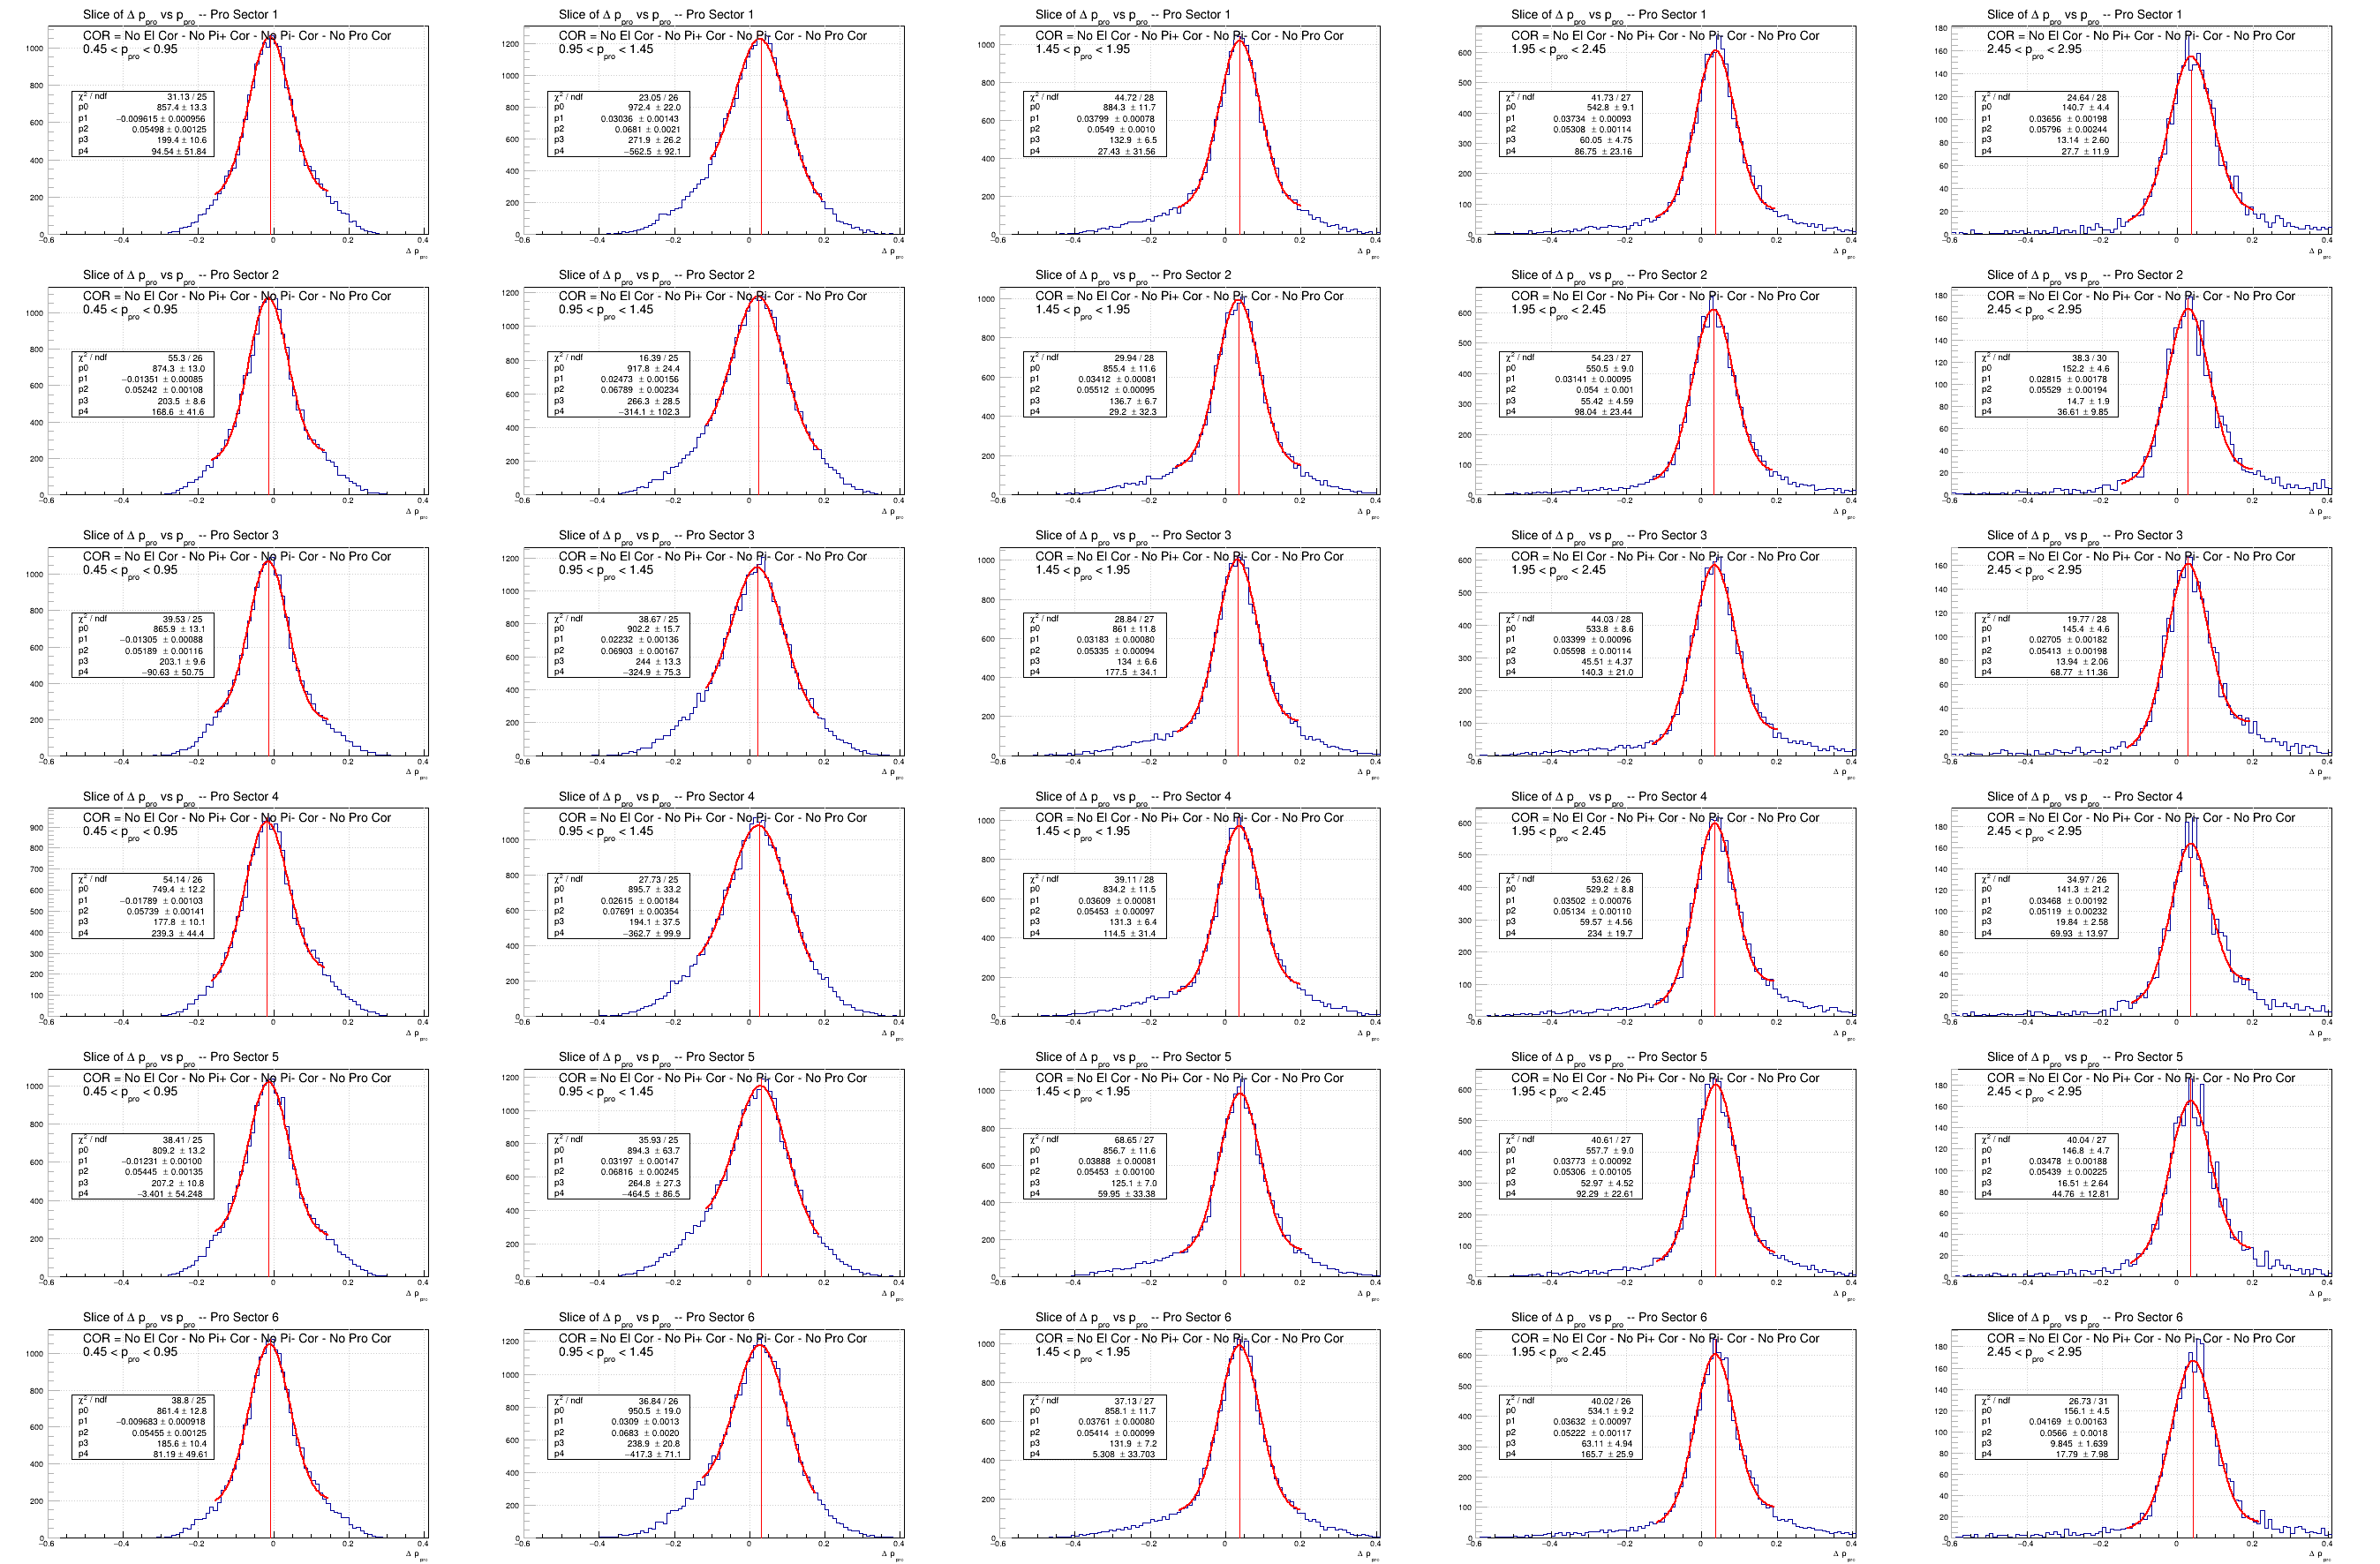

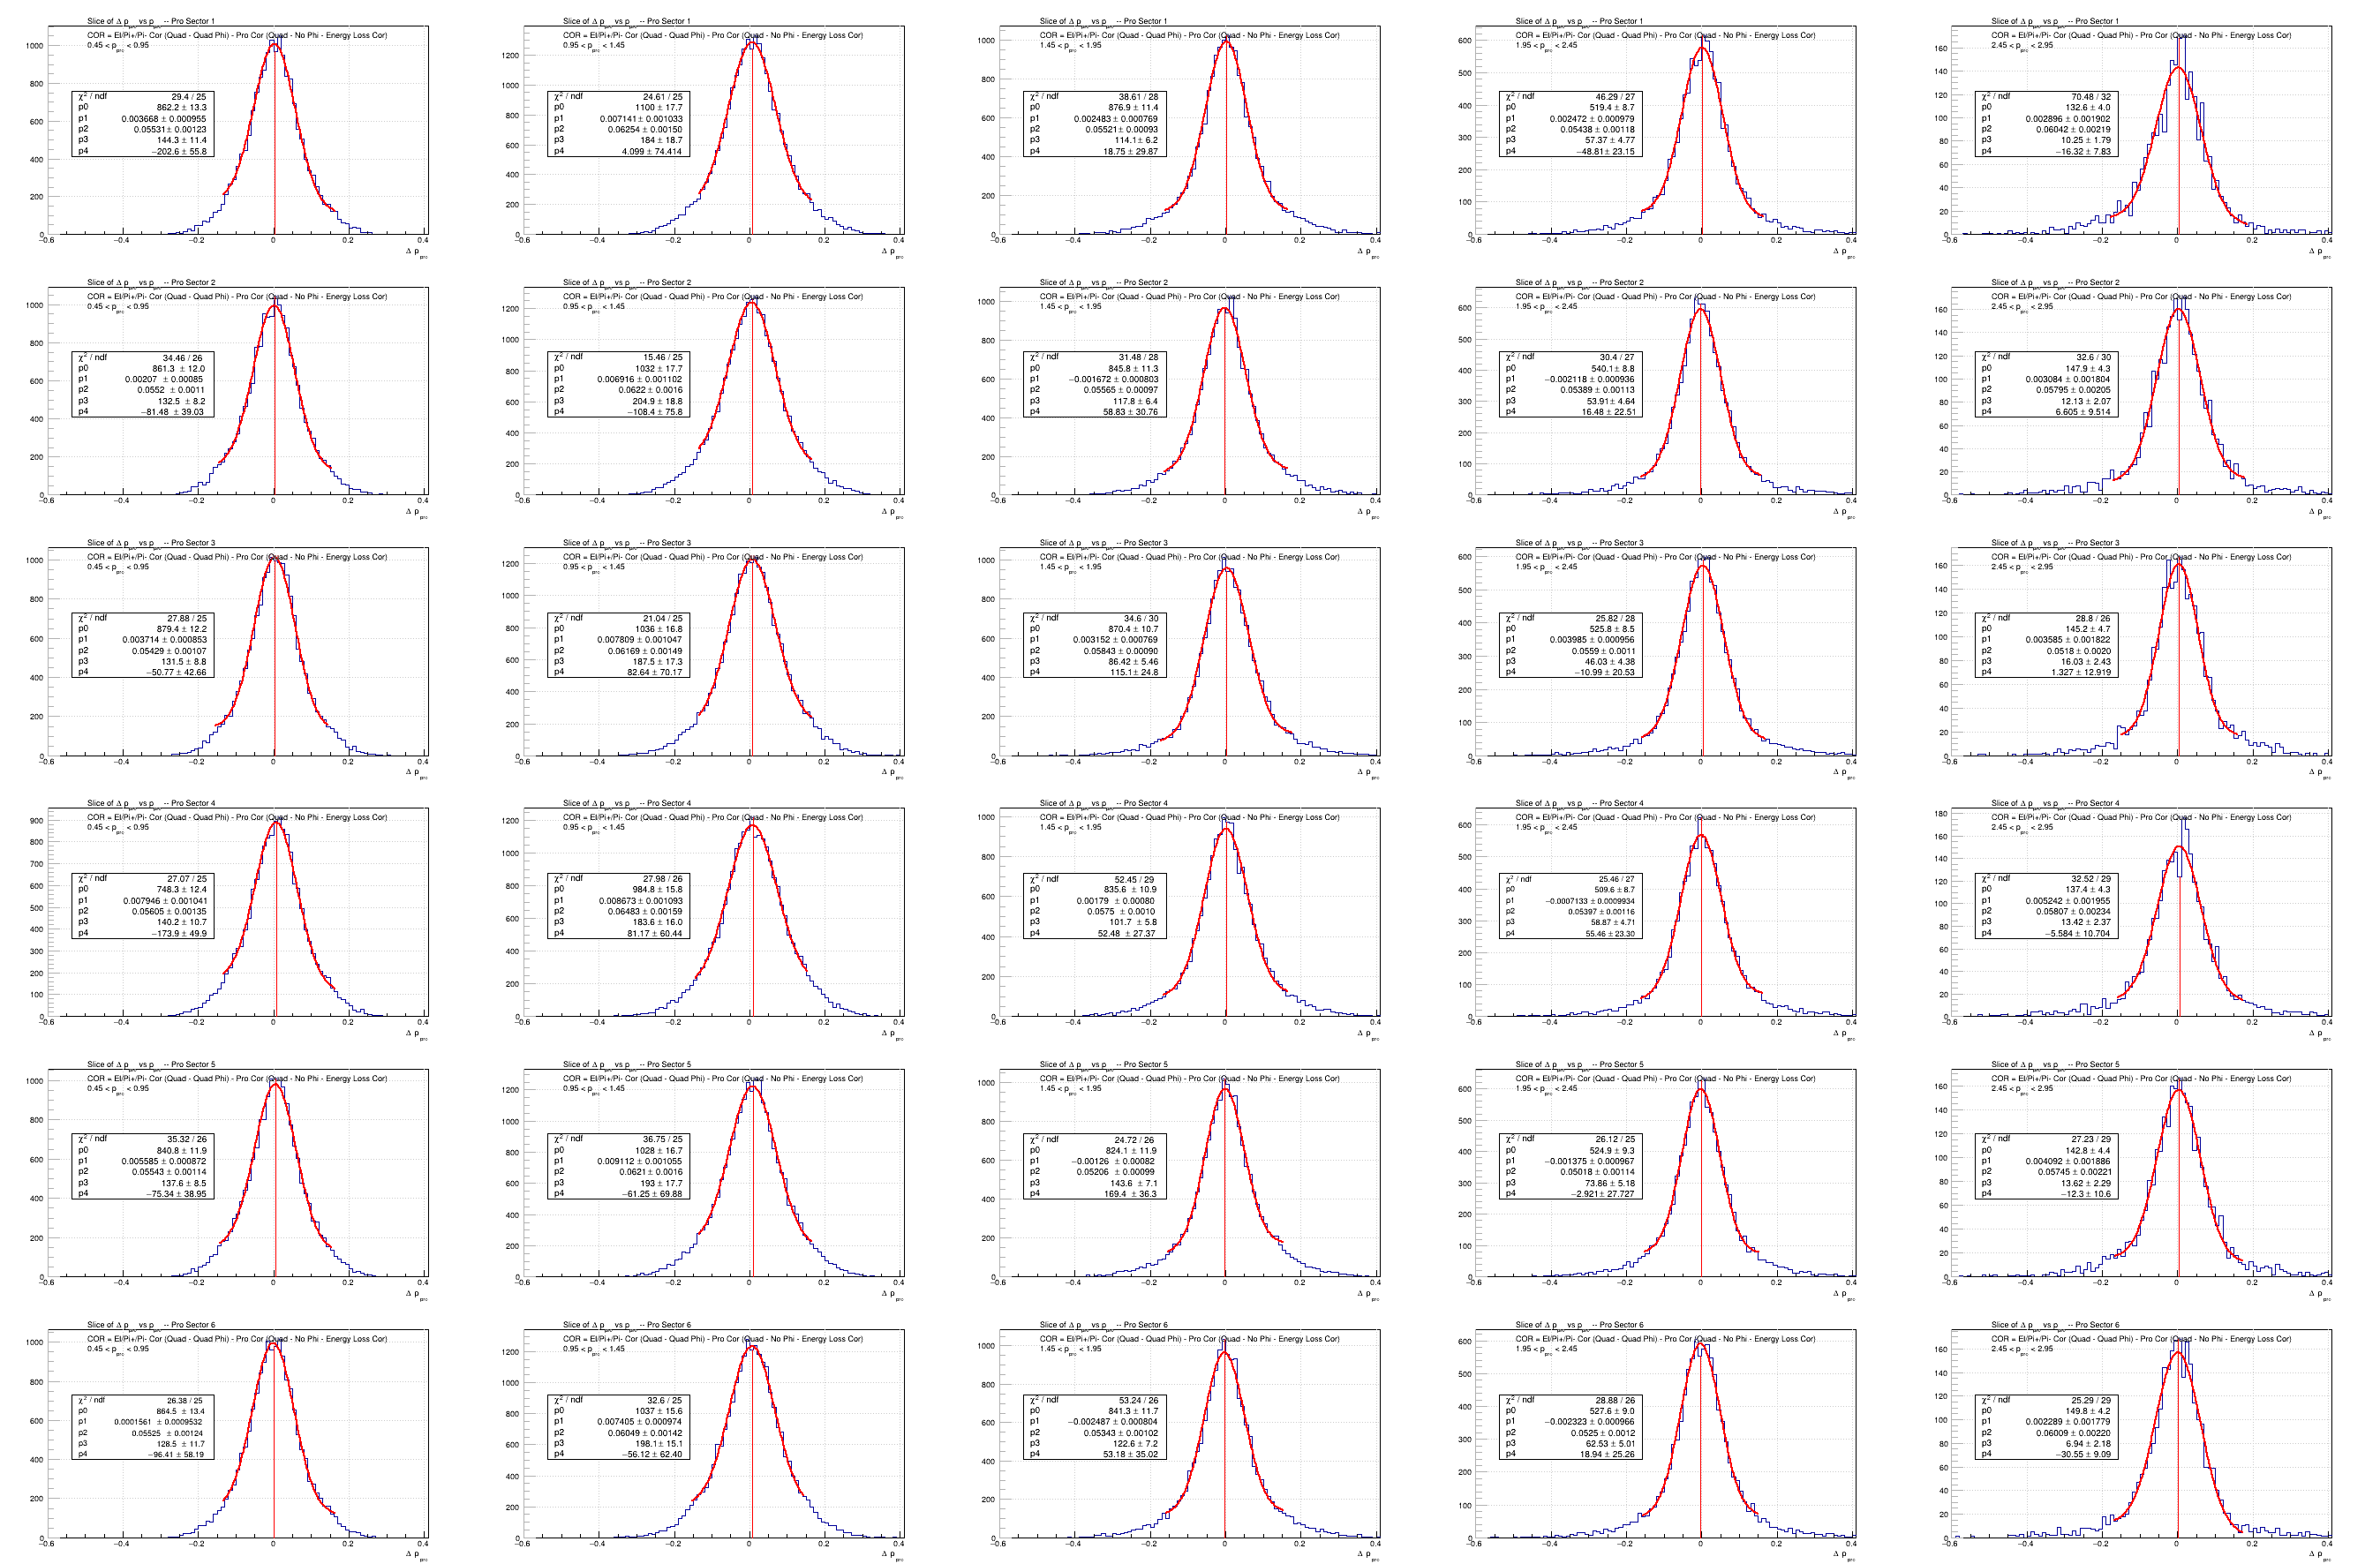

In [40]:
if(Extra_Delta_P_histoQ == 'y' and 'pro' in Delta_P_histo_CompareList):
    shift = ""
    ShowTheseHistogramsQ = 'yes'
#     ShowTheseHistogramsQ = 'no'
    
    # For presentation images
    special_print_these_histos_Q = "no"
    # special_print_these_histos_Q = "yes"
    
    if(ShowTheseHistogramsQ == 'yes'):

        c2, c2all, c4, stats_dp = {}, {}, {}, {}

        for correction in Extra_Delta_P_histoCorList:
            
            for binning in NumPhiBins:
                if(binning == '1'):
                    reglist = ['regall']
#                     continue
                if(binning == '3'):
                    reglist = ['reg1','reg2','reg3']
                if(binning == '5'):
                    reglist = ['reg1','reg2','reg3','reg4','reg5']

                for region in reglist:
                    canvasName = (correction, shift, binning, region)
                    histoName = (correction, shift, ''.join(['Pro Sector ', str(Extra_Delta_P_histoSecList[0]) if(Extra_Delta_P_histoSecList[0] != "all" and Extra_Delta_P_histoSecList[0] != 0) else str(Extra_Delta_P_histoSecList[1])]), binning, region)

                    # c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),4500,3000)
                    # c2[canvasName].Divide(len(Dmom_pip_Histo[histoName].hys2),6,0,0)  # 0.0001, 0.0001)
                    if(special_print_these_histos_Q == "yes"):
                        c2[canvasName] = ROOT.TCanvas("".join(["c2", str(canvasName)]), "".join(["c2", str(canvasName)]),2000,3000)
                        c2[canvasName].Divide(3, 6, 0, 0)
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetTitleY(1.01)
                        ROOT.gStyle.SetTitleX(0.5)
                    else:
#                         c2[canvasName] = ROOT.TCanvas("c2"+str(canvasName),"c2"+str(canvasName),4500,3000)
                        c2[canvasName] = ROOT.TCanvas("".join(["c2", str(canvasName)]), "".join(["c2", str(canvasName)]), 2700, 1800)
                        c2[canvasName].Divide(len(Dmom_pip_Histo[histoName].hys2), 6, 0.0001, 0.0001)
                        ROOT.gStyle.SetOptFit(1)
#                         ROOT.gStyle.SetTitleY(1.01)
                        ROOT.gStyle.SetTitleY(1)
                        ROOT.gStyle.SetTitleX(0.5)
                    c2[canvasName].SetGrid()
                    ROOT.gStyle.SetAxisColor(16,'xy')


                    c2[canvasName].Draw()

                    for sec in Extra_Delta_P_histoSecList:
                        if(sec == 'all' or sec == 0):
                            SecName = ''
                            continue
                        else:
                            SecName = ''.join(['Pro Sector ', str(sec)])

                        histoName = (correction, shift, SecName, binning, region)

                        # print(str(histoName)+"->"+str(len(Dmom_pip_Histo[histoName].hys2)))

                        cd_range = range(0,len(Dmom_pip_Histo[histoName].hys2))

                        if(special_print_these_histos_Q == "yes"):
                            cd_range = [0, int(len(Dmom_pip_Histo[histoName].hys2)/2), len(Dmom_pip_Histo[histoName].hys2)-1]
                            ii2 = 0

                        for ii in cd_range:
                            if(special_print_these_histos_Q == "yes"):
                                ii2 = ii2 + 1
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetLeftMargin(0.085)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetRightMargin(0.05)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetTopMargin(0.175)
                                c2[canvasName].cd(ii2 + 3*(sec-1)).SetBottomMargin(0.055)

                                Dmom_pip_Histo[histoName].hys2[ii].SetTitle("".join(["#scale[1]{", str(Dmom_pip_Histo[histoName].hys2[ii].GetTitle()), "}"]))

                                Dmom_pip_Histo[histoName].hys2[ii].GetXaxis().SetRangeUser(-0.6,0.4)
                                
                                Dmom_pip_Histo[histoName].hys2[ii].Draw('same')
                                
                                
                            else:
                                ii2 = ii + 1
                                c2[canvasName].cd(ii2 + len(Dmom_pip_Histo[histoName].hys2)*(sec-1))
                                
                                Dmom_pip_Histo[histoName].hys2[ii].GetXaxis().SetRangeUser(-0.6,0.4)
                                
                                Dmom_pip_Histo[histoName].hys2[ii].Draw('same')
                                
                                finding, search = 0, 0
                                
                                while(finding == 0 and search < 5):
                                    stats_dp[(str(histoName), str(ii))] = Dmom_pip_Histo[histoName].hys2[ii].GetListOfFunctions().FindObject("stats")
                                    try: 
                                        stats_dp[(str(histoName), str(ii))].SetY1NDC(0.45 - 0.05)
                                        stats_dp[(str(histoName), str(ii))].SetY2NDC(0.7 - 0.05)
                                        stats_dp[(str(histoName), str(ii))].SetX1NDC(0.15)
                                        stats_dp[(str(histoName), str(ii))].SetX2NDC(0.45)
                                        stats_dp[(str(histoName), str(ii))].Draw("same")
                                        c2[canvasName].Modified()
                                        c2[canvasName].Update()
                                        finding += 1
                                    except:
                                        c2[canvasName].Modified()
                                        c2[canvasName].Update()
                                        finding = 0
                                        search += 1
                                        
                                if(search > 4):
                                    print("Failed search")

                                    



                            # Dmom_pip_Histo[histoName].hys2[ii].ShowBackground(int(30/((ii/2) + 1)))
                            ll.DrawLine(Dmom_pip_Histo[histoName].FindPeak_x[ii], 0, Dmom_pip_Histo[histoName].FindPeak_x[ii], Dmom_pip_Histo[histoName].FindPeak_y[ii]) 
                            # Dmom_pip_Histo[histoName].hys2[ii].ShowBackground(10,'same')

                            if(SaveResultsQ == 'yes'):
                                c2[canvasName].SaveAs((("".join([str(Selection_of_In_or_Out), " Fit Quality of Delta p vs Pro Momentum [", str(canvasName), "].png"])).replace(correction, corNameTitles(correction).replace("/", "_"))).replace(" ", "_"))

        if(SaveResultsQ != 'yes'):
            print("These results are not currently being saved.")
    else:
        print("These histograms are being supressed right now. Let ShowTheseHistogramsQ = 'yes' in this cell to see these results.")

else:
    print("Not running these histograms at this time.")
    


.

.

.

.

# End of ∆P Histograms
## Running alert...

In [41]:
if(Extra_Delta_P_histoQ == 'y'):
    print("\nThe ∆P histograms are done...\n")
    
    # Getting current date
    datetime_object_extra = datetime.now()

    endMin_extra = datetime_object_extra.minute
    endHr_extra = datetime_object_extra.hour
    
    print("".join(["The time that the ", color.DELTA, "P histograms finished is ", Print_Time(datetime_object_extra)]))

    DtHr_extra = abs(endHr_extra - startHr_extra)*60
    DtMin_extra = (endMin_extra - startMin_extra) + DtHr_extra

    if(DtMin_extra <= 0):
        print("Error")
    else:
        print("".join(["\nTotal time elapsed: ", str(DtMin_extra), """ minutes
Rate of histograms per minute made: """, str(round(Extra_Delta_P_histoCount/DtMin_extra)), """ histos/min
Rate of fits per minute made: """, str(round(Extra_Delta_P_histoFitsCount/DtMin_extra)), " fits/min"]))
    

try:
    if(runAlertErrorH == 'yes'):
        alert()
    else:
        print("This alert was not activated")
except:
    print("\nError with Alert()...\n")





The ∆P histograms are done...

The time that the ΔP histograms finished is 2:30 p.m.
Error


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

# Second Half of Code (Missing Mass Histograms)


The code below this point is for producing the Missing Mass histograms

This part of the code functions independently of the ∆P Histograms above


.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

.

# Defining function to help make Missing Mass Histograms

.

.

# Setting Fit Titles

In [42]:
def fitTitle(Correction, Sector, Region, Shift, Binning, Particle, BGq, Particle_Filter):
    if(Shift == ''):
        shiftname = ' [No Shift]'
    if(Shift == 'Se1'):
        shiftname = ' [Electron Shift 1]'
    if(Shift == 'Se2'):
        shiftname = ' [Electron Shift 2]'
    if(Shift == 'Spip1'):
        shiftname = ' [Pi+ Shift 1]'
    if(Shift == 'Se1Spip1'):
        shiftname = ' [Electron Shift 1 and Pi+ Shift 1]'
    if(Shift == 'Se2Spip1'):
        shiftname = ' [Electron Shift 2 and Pi+ Shift 1]'
    
    shiftname = 'Phi Bin:'
    
    if(Binning == '1'):
        regionName = "".join([shiftname, ' Integrated Phi Bins '])
    if(Binning == '3'):
        if(Particle_Filter == 'el'):
            if(Region == 'reg1'):
                regionName = "".join([shiftname, ' -5 < #phi_{', str(Particle_Filter), '} < 5 '])
            if(Region == 'reg2'):
                regionName = "".join([shiftname, ' #phi_{', str(Particle_Filter), '} < -5 '])
            if(Region == 'reg3'):
                regionName = "".join([shiftname, ' #phi_{', str(Particle_Filter), '} > 5 '])
        if(Particle_Filter != 'el'):
            if(Region == 'reg1'):
                regionName = "".join([shiftname, ' -10 < #phi_{', str(Particle_Filter), '} < 10 '])
            if(Region == 'reg2'):
                regionName = "".join([shiftname, ' #phi_{', str(Particle_Filter), '} < -10 '])
            if(Region == 'reg3'):
                regionName = "".join([shiftname, ' #phi_{', str(Particle_Filter), '} > 10 '])
   
    if(Sector == 0):
        SecName = '-- All Sectors'
    else:
        SecName = ''.join(['-- ', (str(Particle_Filter).replace("el", "El")).replace("pip", "Pi+"),' Sector ', str(Sector)])
        
        
    CorrectionName = corNameTitles(Correction)
    
    if(BGq == 'yes'):
        output = "".join(["#scale[0.75]{#splitline{#splitline{Missing Mass Distribution ", SecName, "}{Cor: ", CorrectionName, " -- With SB }}{", regionName])
    if(BGq == 'no'):
        output = "".join(["#scale[0.75]{#splitline{#splitline{Missing Mass Distribution ", SecName, "}{Cor: ", CorrectionName, " }}{", regionName])
    
    return output


## Setting fit titles (for MM vs Phi histograms)

In [43]:
def fitTitlePhi(Correction,Sector,Region,Shift,Binning,Particle,BGq,KFit):
    if(Shift == ''):
        shiftname = ' [No Shift]'
    if(Shift == 'Se1'):
        shiftname = ' [Electron Shift 1]'
    if(Shift == 'Se2'):
        shiftname = ' [Electron Shift 2]'
    if(Shift == 'Spip1'):
        shiftname = ' [Pi+ Shift 1]'
    if(Shift == 'Se1Spip1'):
        shiftname = ' [Electron Shift 1 and Pi+ Shift 1]'
    if(Shift == 'Se2Spip1'):
        shiftname = ' [Electron Shift 2 and Pi+ Shift 1]'
    
    if(Binning == '1'):
        regionName = shiftname+'[all #phi_{'+str(Particle)+'}]'
    if(Binning == '3'):
        if(Shift != ''):
            if(Region == 'reg1'):
                regionName = shiftname+'[-5 < #phi_{'+str(Particle)+'} < 5]'
            if(Region == 'reg2'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} < -5]'
            if(Region == 'reg3'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} > 5]'
        if(Shift == ''):
            if(Region == 'reg1'):
                regionName = shiftname+'[0 < #phi_{'+str(Particle)+'} < 10]'
            if(Region == 'reg2'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} < 0]'
            if(Region == 'reg3'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} > 10]'
    if(Binning == '5'):
        if(Shift != ''):
            if(Region == 'reg1'):
                regionName = shiftname+'[-5 < #phi_{'+str(Particle)+'} < 5]'
            if(Region == 'reg2'):
                regionName = shiftname+'[-15 < #phi_{'+str(Particle)+'} < -5]'
            if(Region == 'reg3'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} < -15]'
            if(Region == 'reg4'):
                regionName = shiftname+'[5 < #phi_{'+str(Particle)+'} < 15]'
            if(Region == 'reg5'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} > 15]'
        if(Shift == ''):
            if(Region == 'reg1'):
                regionName = shiftname+'[0 < #phi_{'+str(Particle)+'} < 10]'
            if(Region == 'reg2'):
                regionName = shiftname+'[-10 < #phi_{'+str(Particle)+'} < 0]'
            if(Region == 'reg3'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} < -10]'
            if(Region == 'reg4'):
                regionName = shiftname+'[10 < #phi_{'+str(Particle)+'} < 20]'
            if(Region == 'reg5'):
                regionName = shiftname+'[#phi_{'+str(Particle)+'} > 20]'
        
    if(Sector == 0):
        SecName = 'all Sectors'
    else:
        SecName = 'Sector '+str(Sector)
        
    if(KFit == 'nf'):
        ErrorBGname = ''
    else:
        ErrorBGname = '['+str(KFit)+']'
    
    if(BGq == 'yes'):
        output = "(MM vs #phi) "+Particle+" "+Correction+" in "+SecName+" with SB"+regionName+ErrorBGname
    if(BGq == 'no'):
        output = "(MM vs #phi) "+Particle+" "+Correction+" in "+SecName+regionName+ErrorBGname
    
    return output


.

.

.

## Plot Range Selection

In [44]:
def Plot_Range_MM(Particle):
    
    Rmin, Rmax, dr, maxFit = 0, 0, 0, 0
    
    if(Particle == 'el'):
        Rmin = 3 # was 2
        Rmin = 2.5
        Rmax, dr = 7.85, 0.975
        Rmax, dr = 8.5, 0.975
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
    if(Particle == 'pro'):
        Rmin, Rmax, dr = 0.45, 3, 0.4
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
    if(Particle == "pip"):
        Rmin, Rmax, dr = 0.5, 6, 0.79
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
    if(Particle == "pim"):
        Rmin, Rmax, dr = 0.5, 6, 0.79
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
        
    if(Rmin == 0 or Rmax == 0 or dr == 0 or maxFit == 0):
        print("\nWARNING: ERROR\n")
        Rmin, Rmax, dr = 0.45, 3, 0.4
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
        
    output = [Rmin, Rmax, dr, maxFit]
    
    return output
    
    
print("Done")
    

Done


.

.

.

## For hmmCall

In [45]:
def histoMakerhmmCall(Bank, Correction, Sector, Region, Shift, Binning, KFit, Particle):
    
    name = (Correction, Sector, Shift, Binning, Region, Particle, KFit)
    
    output = Bank.Get("".join(["hmmCall_", str(name)]))
    
    return output

## For hmmCPARTall

In [46]:
def histoMakerhmmCPARTall(Bank, Correction, Sector, Region, Shift, Binning, Particle_Plot, Particle, KFit):

    name = (Correction, Sector, '', Binning, Region, Particle_Plot, Particle, '')
        
    output = Bank.Get("".join(["hmmCPARTall_", str(name)]))

    return output

## For hmmCPARTthall

In [47]:
def histoMakerhmmCPARTthall(Bank,Correction,Sector,Region,Shift,Binning,Particle,KFit):
    
    name = (Correction, Sector, Shift, Binning, Region, Particle, KFit)
    
    output = Bank.Get("".join(["hmmCPARTthall_", str(name)]))
        
    return output

## For hmmCPARTPhiall

In [48]:
def histoMakerhmmCPARTPhiall(Bank,Correction,Sector,Region,Shift,Binning,Particle,KFit):

    name = (Correction, Sector, Shift, Binning, Region, Particle, KFit)
    
    output = Bank.Get("".join(["hmmCPARTPhiall_", str(name)]))
       
    return output

.

.

.

.

.

.

.

.

.

# Determining which Missing Mass Histograms to make...

In [49]:
# # List of the parameters that will be made (holds true for the whole code - vitally important to run this cell always)



# mix_particle_plots = "yes"
# mix_particle_plots = "no"

# if(event_type == "SP"):
    
#     particleList = ['el', 'pip']
# #     particleList = ['el']
# #     particleList = ['pip']
# #     particleList = []
    
    
#     particle_plot_List = ['el', 'pip']
# #     particle_plot_List = ['el']
# #     particle_plot_List = ['pip']
    
    
    
    
#     if(Selection_of_In_or_Out == "Inbending"):
#         correctionList = ['mm0', 'mmF_PipMMF']        
#         # correctionList = ['mm0']

#     if(Selection_of_In_or_Out == "Outbending"):
#         correctionList = ['mm0', 'mmF_PipMMF']
#         # correctionList = ['mm0']
        
        
        
        
        
# if(event_type == "DP"):

#     particleList = ['el', 'pip', 'pim', 'pro']
# #     particleList = ['el', 'pim', 'pro']
#     particleList = ['el', 'pro']
# #     particleList = ['el']
#     particleList = ['pro']
# #     particleList = []

#     particle_plot_List = ['el', 'pip', 'pim', 'pro']
# #     particle_plot_List = ['el', 'pim', 'pro']
# #     particle_plot_List = ['el', 'pim', 'pro']
#     particle_plot_List = ['el', 'pro']
# #     particle_plot_List = ['el']
#     particle_plot_List = ['pro']
# #     particle_plot_List = []

#     if(Selection_of_In_or_Out == "Inbending"):
#         # correctionList = ['mm0', 'mmF_PipMMF', 'mmF_PipMMF_ProMMpro_qPhi', 'mmF_PipMMF_ProMMpro_pi0Phi', 'mmF_PipMMF_ProMMpro_pi2Phi', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_pi0Phi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_pi2Phi']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi']
#         # correctionList = ['mm0_NoELC' , 'mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_NoELC']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi', 'mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi_NoELC']
        
        
#         correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0_NoELC']
        
# #         correctionList = ['mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F']
# #         correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mm0_NoELC']
        
        
#     if(Selection_of_In_or_Out == "Outbending"):
#         # correctionList = ['mm0', 'mmF_PipMMF', 'mmF_PipMMF_ProMMpro_qPhi', 'mmF_PipMMF_ProMMpro_pi0Phi', 'mmF_PipMMF_ProMMpro_pi2Phi', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_pi0Phi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_pi2Phi']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi']
#         # correctionList = ['mm0_NoELC' , 'mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_NoELC']
#         # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi', 'mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_qNoPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_NoPhi_NoELC']

        
#         correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0_NoELC']
# #         correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mm0_NoELC']

        





# if(event_type == "P0"):

#     particleList = ['el', 'pro']
#     # particleList = ['el']
#     particleList = ['pro']
#     # particleList = []

#     particle_plot_List = ['el', 'pro']
#     particle_plot_List = ['pro']


#     if(Selection_of_In_or_Out == "Inbending"):
#         # correctionList = ['mm0', 'mmF', 'mmF_ProMMpro_qPhi', 'mmF_ProMMpro_pi0Phi', 'mmF_ProMMpro_pi2Phi']
#         # correctionList = ['mm0', 'mmF_ProMMpro_qPhi']
#         # correctionList = ['mm0_NoELC', 'mmF_NoELC', 'mmF_ProMMpro_qPhi_NoELC', 'mmF_ProMMpro_qNoPhi_NoELC', 'mmF_ProMMpro_NoPhi_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_qPhi', 'mmF_ProMMpro_qNoPhi', 'mmF_ProMMpro_NoPhi']
        
        
#         correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_qNoPhi']
#         correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_F', 'mmF']
        
        
#     if(Selection_of_In_or_Out == "Outbending"):
#         # correctionList = ['mm0', 'mmF', 'mmF_ProMMpro_qPhi', 'mmF_ProMMpro_pi0Phi', 'mmF_ProMMpro_pi2Phi']
#         # correctionList = ['mm0', 'mmF_ProMMpro_qPhi']
#         # correctionList = ['mm0_NoELC', 'mmF_NoELC', 'mmF_ProMMpro_qPhi_NoELC', 'mmF_ProMMpro_qNoPhi_NoELC', 'mmF_ProMMpro_NoPhi_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_qPhi', 'mmF_ProMMpro_qNoPhi', 'mmF_ProMMpro_NoPhi']
        
        
#         correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_qNoPhi']
#         correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_F', 'mmF']
        
        
     
    
    
# if(event_type == "ES"):
#     particleList = ['el', 'pro']
#     # particleList = ['el']
#     # particleList = ['pro']
#     # particleList = []
    
#     particle_plot_List = ['el', 'pro']
#     # particle_plot_List = ['el']
#     # particle_plot_List = ['pro']
    
#     if(Selection_of_In_or_Out == "Inbending"):
#         correctionList = ['mm0_NoELC', 'mmF_ProMMpro_F_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_F']
#         # correctionList = ['mm0']

#     if(Selection_of_In_or_Out == "Outbending"):
#         correctionList = ['mm0_NoELC', 'mmF_ProMMpro_F_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_F']
#         # correctionList = ['mm0']
    
    
# binningList = ['1','3','5']
# binningList = ['1', '3']
# # binningList = ['3']
# # binningList = ['1']


# if(event_type == "P0"):
#     binningList = ['1']

# # SecRangeMin = 0 refers to all sectors so the code will start by making histograms that do not filter by sector
# # Any number 1-6 will correspond to the sector of that same number (do not go above 6 or have SecRangeMin>SecRangeMax)
# # If SecRangeMin = SecRangeMax, then only 1 sector (the one specified) will be shown
# # The range of sectors will always be continuous
# SecRangeMin = 1
# SecRangeMax = 6


# ######### These lines of code are left over from before corrections were always applied with shifts. Leave as is to avoid future issues #########
# shiftList = ['']
# shiftElList = ['']
# shiftPipList = ['']
# shiftList = []
# for correction in correctionList:
#     if('mm0' in correction or 'mm1' in correction):
#         shiftElList2 = ['']
#     else:
#         shiftElList2 = shiftElList 
#     if('MM3' not in correction):
#         shiftPipList2 = ['']
#     else:
#         shiftPipList2 = shiftPipList

#     for sEl in shiftElList2:
#         for sPip in shiftPipList2:
#             adding = str(sEl+sPip)
#             if(adding not in shiftList):
#                 shiftList.append(str(adding))
# ######### These lines of code are left over from before corrections were always applied with shifts. Leave as is to avoid future issues #########

# # This list is for the extra phase space histograms which can be run with or without shifts      
# shiftList = ['', 'S', 'NS']



# # Letting Run_Without_MM = 'yes' allows for the histograms without the missing mass values to be run
# Run_Without_MM = 'yes'
# # Run_Without_MM = 'no'

# # This list is for the extra histograms without missing mass which can be run with or without shifts      
# shiftList_Extra = ['','S','NS']







# # Run with the extra histograms?
# # Letting RunExtra = 'yes' causes the code to also create histograms for missing mass versus the particle angles
# # RunExtra = 'yes'
# RunExtra = 'no'



# # For slicing MM vs phi histograms (just like MM vs momentum), let fitPhiSliceQ = 'y'
# # Must let RunExtra = 'yes' as well
# # IMPORTANT NOTE: fitPhiSliceQ does NOT work with binning = '5' (code is designed not to run with that many bins due to expected errors that would arise)
# # fitPhiSliceQ = 'y'
# fitPhiSliceQ = 'n'

# if(RunExtra == 'no'):
#     fitPhiSliceQ = 'n'


# # Use the function ShowBackground? ('yes' or 'no')
# ShowBGq = 'no'
# # ShowBGq = 'yes'


# # Print Progress? ('y' or 'n')
# pProgress1 = 'y'
# pProgress2 = 'n'
# # pProgress2 = 'y'

















# # Below this should not have to be update to change. Will just print options choosen above


# # kinematicFit should be a list that dictates how closely the measured data should match the kinematics of ep->e pi+ n. 
# # For the unfiltered data, the list value should be called 'nf'
# # For any other filter, put in the number that corresponds to the maximum % error between the detected data and the calculated predictions (i.e. using the number 5 corresponds to filtering out any data that has an error of more than 5% when compared to the kinematic equations)
# # See the definition of regFilter above for the process of filtering this condition
# # NOTE: Currently, the filter is applied to all corrections equally (may not always be appropriate)

    
# try: CutChoice
# except NameError: CutChoice = 'none';# print("CutChoice was not defined. Defaulting to CutChoice = 'none'")
    
# try: CC4calOnly
# except NameError: CC4calOnly = 'y';# print("CC4calOnly was not defined. Defaulting to CC4calOnly = 'y' (same as if CutChoice = 'none')")
    
    
# if(CutChoice == 'none' or CC4calOnly == 'y'):
#     kinematicFit = ['nf']
# else:
#     kinematicFit = ['nf', CutChoice]
    
    
# # try: Total_Extra
# # except NameError: Total_Extra = 0; print("Total_Extra was not defined. Defaulting to Total_Extra = 0")#\nThis means that the code assumes the first half was not run when predicting the time to finish running.")
    
# # print("\n\n\nRun next cell to see results...\n\n\n")

# # This cell will print the list of parameters and the number of histograms that will be created (should not have to change unless new histograms are added to the main loop)

# SecRangeAll = [*range(SecRangeMin,SecRangeMax+1)]

    
# if(SecRangeMin == 0 and SecRangeMax > 0):
#     SecRangeReduce = [*range(1,SecRangeMax+1)]
#     StartOfSRR = 0
# if(SecRangeMin > 0):
#     SecRangeReduce = [*range(SecRangeMin,SecRangeMax+1)]
#     StartOfSRR = SecRangeMin - 1
# if(SecRangeMin == 0 and SecRangeMax == 0):
#     SecRangeReduce = 'N/A'
#     StartOfSRR = SecRangeMin - 1
    



# # print("This code will run the following lists:")
# # print("Particles to be plotted include: " + str(particle_plot_List))
# # print("Particles to be used for sector/phi binning include: " + str(particleList))
# # print("Corrections included: "+str(correctionList))
# # print("The number of phi bins will include: "+str(binningList))

# # print("The sectors to be included are: "+str(SecRangeAll))
# # if(fitPhiSliceQ == 'y'):
# #     print("Running slices of MM vs Phi?: yes")
# # if(Run_Without_MM != 'yes'):
# #     print("Not running any histograms without missing mass.")
# # else:
# #     print("Will be running histograms without missing mass.")
# # print("Using ShowBackground()?: "+ShowBGq)


# if(particleList != []):
#     print("\n\033[1mFor the Missing Mass Histograms...\033[0m")
#     print("".join(["Particles to be plotted include: ", str(particle_plot_List)]))
#     print("".join(["Particles to be used for sector/phi binning include: ", str(particleList)]))

#     print("".join(["Corrections included: ", str(correctionList)]))

#     print("These Corrections correspond to the following:")
#     cor_num = 1
#     for cor_names in correctionList:
#         print("".join(["\t", str(cor_num), ") ", str(cor_names), " -> '", corNameTitles(cor_names), "'"]))
#         cor_num += 1

#     print("".join(["The number of phi bins will include: ", str(binningList)]))

#     print("".join(["The sectors to be included are: ", str(SecRangeAll)]))

#     if(Run_Without_MM == 'yes'):
#         print("Will be running the phase space histograms (without missing mass).")

#     if(str(ShowBGq) != 'no'):
#         print("".join(["Using ShowBackground()?: ", ShowBGq]))

# else:
#     print("\n\033[1mNot running Missing Mass Histograms...\033[0m")



# countHisto=0

# Print_Names_Of_Histos_To_Be_Made_Q = 'yes'
# Print_Names_Of_Histos_To_Be_Made_Q = 'no'


# for errorCut in kinematicFit:
#     for particle in particleList:
#         for sector in SecRangeAll:
#             for correction in correctionList:
#                 shift = '' # Corrections are always made using shifted phi
#                 for binning in binningList:
#                     if(binning == '1'):
#                         regionList = ['regall']
#                     if(binning == '3'):
#                         regionList = ['reg1','reg2','reg3']
#                     if(binning == '5'):
#                         regionList = ['reg1','reg2','reg3','reg4','reg5']
#                     for region in regionList:
                        
#                         if(Print_Names_Of_Histos_To_Be_Made_Q == 'yes'):
#                             print(str((correction,sector,shift,binning,region,particle,errorCut)))

#                         if(particle == 'el'):
#                             if(RunExtra == 'yes'):
#                                 countHisto += 4
#                             else:
#                                 countHisto += 2
#                             if(ShowBGq == 'yes'):
#                                 countHisto += 1
#                         if(particle == 'pip'):
#                             if(RunExtra == 'yes'):
#                                 countHisto += 3
#                             else:
#                                 countHisto += 1

                                
# if(Run_Without_MM == 'yes'):
#     for particle in particleList:
#         for shift in shiftList_Extra:
#             if(shift != ''):
#                 if(particle == 'pip'):
#                     if('Spip1' in shift):
#                         shiftname = 'Spip1'
#                     else:
#                         continue
#                 if(particle == 'el'):
#                     if('Se1' in shift):
#                         shiftname = 'Se1'
#                     elif('Se2' in shift):
#                         shiftname = 'Se2'
#                     else:
#                         continue
#             for sector in SecRangeAll:
#                 if(sector == 0):
#                     countHisto += 3
#                 else:
#                     countHisto += 3
                    

# print("".join(["\nTotal Histograms that will be made: ", str(countHisto)]))


In [50]:
# List of the parameters that will be made (holds true for the whole code - vitally important to run this cell always)



mix_particle_plots = "yes"
mix_particle_plots = "no"

if(event_type == "SP"):
    
    particleList = ['el', 'pip']
#     particleList = ['el']
#     particleList = ['pip']
#     particleList = []
    
    
    particle_plot_List = ['el', 'pip']
#     particle_plot_List = ['el']
#     particle_plot_List = ['pip']
    
    
    
    
    if(Selection_of_In_or_Out == "Inbending"):
        correctionList = ['mm0', 'mmF_PipMMF']        
        # correctionList = ['mm0']

    if(Selection_of_In_or_Out == "Outbending"):
        correctionList = ['mm0', 'mmF_PipMMF']
        # correctionList = ['mm0']
        
        
        
        
        
if(event_type == "DP"):

    particleList = ['el', 'pip', 'pim', 'pro']
#     particleList = ['el', 'pim', 'pro']
    particleList = ['el', 'pro']
#     particleList = ['el']
    particleList = ['pro']
#     particleList = []

    particle_plot_List = ['el', 'pip', 'pim', 'pro']
#     particle_plot_List = ['el', 'pim', 'pro']
#     particle_plot_List = ['el', 'pim', 'pro']
    particle_plot_List = ['el', 'pro']
#     particle_plot_List = ['el']
    particle_plot_List = ['pro']
#     particle_plot_List = []

    if(Selection_of_In_or_Out == "Inbending"):
        
        correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0_NoELC']
        # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mm0_NoELC']
        
        
    if(Selection_of_In_or_Out == "Outbending"):
        
        correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0_NoELC']
        # correctionList = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 'mm0_NoELC']

        





if(event_type == "P0"):

    particleList = ['el', 'pro']
    # particleList = ['el']
    particleList = ['pro']
    # particleList = []

    particle_plot_List = ['el', 'pro']
    particle_plot_List = ['pro']


    if(Selection_of_In_or_Out == "Inbending"):
        
        correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_qNoPhi']
        correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_F', 'mmF']
        
        
    if(Selection_of_In_or_Out == "Outbending"):
        
        correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_qNoPhi']
        correctionList = ['mm0_NoELC', 'mm0', 'mmF_ProMMpro_F', 'mmF']
        
        
     
    
    
if(event_type == "ES"):
    particleList = ['el', 'pro']
    # particleList = ['el']
    # particleList = ['pro']
    particleList = []
    
    particle_plot_List = ['el', 'pro']
    # particle_plot_List = ['el']
    # particle_plot_List = ['pro']
    
    if(Selection_of_In_or_Out == "Inbending"):
        correctionList = ['mm0_NoELC', 'mmF_ProMMpro_F_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_F']
        # correctionList = ['mm0']

    if(Selection_of_In_or_Out == "Outbending"):
        correctionList = ['mm0_NoELC', 'mmF_ProMMpro_F_NoELC', 'mm0', 'mmF', 'mmF_ProMMpro_F']
        # correctionList = ['mm0']
    
    
    
    
particleList = []
    
binningList = ['1','3','5']
binningList = ['1', '3']
# binningList = ['3']
# binningList = ['1']


if(event_type == "P0"):
    binningList = ['1']

# SecRangeMin = 0 refers to all sectors so the code will start by making histograms that do not filter by sector
# Any number 1-6 will correspond to the sector of that same number (do not go above 6 or have SecRangeMin>SecRangeMax)
# If SecRangeMin = SecRangeMax, then only 1 sector (the one specified) will be shown
# The range of sectors will always be continuous
SecRangeMin = 0
SecRangeMax = 6




######### These lines of code are left over from before corrections were always applied with shifts. Leave as is to avoid future issues #########
shiftList = ['']
shiftElList = ['']
shiftPipList = ['']
shiftList = []
for correction in correctionList:
    if('mm0' in correction or 'mm1' in correction):
        shiftElList2 = ['']
    else:
        shiftElList2 = shiftElList 
    if('MM3' not in correction):
        shiftPipList2 = ['']
    else:
        shiftPipList2 = shiftPipList

    for sEl in shiftElList2:
        for sPip in shiftPipList2:
            adding = str(sEl+sPip)
            if(adding not in shiftList):
                shiftList.append(str(adding))
######### These lines of code are left over from before corrections were always applied with shifts. Leave as is to avoid future issues #########

# This list is for the extra phase space histograms which can be run with or without shifts      
shiftList = ['', 'S', 'NS']



# Letting Run_Without_MM = 'yes' allows for the histograms without the missing mass values to be run
Run_Without_MM = 'yes'
# Run_Without_MM = 'no'

# This list is for the extra histograms without missing mass which can be run with or without shifts      
shiftList_Extra = ['','S','NS']







# Run with the extra histograms?
# Letting RunExtra = 'yes' causes the code to also create histograms for missing mass versus the particle angles
# RunExtra = 'yes'
RunExtra = 'no'



# For slicing MM vs phi histograms (just like MM vs momentum), let fitPhiSliceQ = 'y'
# Must let RunExtra = 'yes' as well
# IMPORTANT NOTE: fitPhiSliceQ does NOT work with binning = '5' (code is designed not to run with that many bins due to expected errors that would arise)
# fitPhiSliceQ = 'y'
fitPhiSliceQ = 'n'

if(RunExtra == 'no'):
    fitPhiSliceQ = 'n'


# Use the function ShowBackground? ('yes' or 'no')
ShowBGq = 'no'
# ShowBGq = 'yes'


# Print Progress? ('y' or 'n')
pProgress1 = 'y'
pProgress2 = 'n'
# pProgress2 = 'y'

















# Below this should not have to be update to change. Will just print options choosen above


# kinematicFit should be a list that dictates how closely the measured data should match the kinematics of ep->e pi+ n. 
# For the unfiltered data, the list value should be called 'nf'
# For any other filter, put in the number that corresponds to the maximum % error between the detected data and the calculated predictions (i.e. using the number 5 corresponds to filtering out any data that has an error of more than 5% when compared to the kinematic equations)
# See the definition of regFilter above for the process of filtering this condition
# NOTE: Currently, the filter is applied to all corrections equally (may not always be appropriate)

    
try: CutChoice
except NameError: CutChoice = 'none';# print("CutChoice was not defined. Defaulting to CutChoice = 'none'")
    
try: CC4calOnly
except NameError: CC4calOnly = 'y';# print("CC4calOnly was not defined. Defaulting to CC4calOnly = 'y' (same as if CutChoice = 'none')")
    
    
if(CutChoice == 'none' or CC4calOnly == 'y'):
    kinematicFit = ['nf']
else:
    kinematicFit = ['nf', CutChoice]
    
    
# try: Total_Extra
# except NameError: Total_Extra = 0; print("Total_Extra was not defined. Defaulting to Total_Extra = 0")#\nThis means that the code assumes the first half was not run when predicting the time to finish running.")
    
# print("\n\n\nRun next cell to see results...\n\n\n")

# This cell will print the list of parameters and the number of histograms that will be created (should not have to change unless new histograms are added to the main loop)

SecRangeAll = [*range(SecRangeMin,SecRangeMax+1)]

    
if(SecRangeMin == 0 and SecRangeMax > 0):
    SecRangeReduce = [*range(1,SecRangeMax+1)]
    StartOfSRR = 0
if(SecRangeMin > 0):
    SecRangeReduce = [*range(SecRangeMin,SecRangeMax+1)]
    StartOfSRR = SecRangeMin - 1
if(SecRangeMin == 0 and SecRangeMax == 0):
    SecRangeReduce = 'N/A'
    StartOfSRR = SecRangeMin - 1
    



# print("This code will run the following lists:")
# print("Particles to be plotted include: " + str(particle_plot_List))
# print("Particles to be used for sector/phi binning include: " + str(particleList))
# print("Corrections included: "+str(correctionList))
# print("The number of phi bins will include: "+str(binningList))

# print("The sectors to be included are: "+str(SecRangeAll))
# if(fitPhiSliceQ == 'y'):
#     print("Running slices of MM vs Phi?: yes")
# if(Run_Without_MM != 'yes'):
#     print("Not running any histograms without missing mass.")
# else:
#     print("Will be running histograms without missing mass.")
# print("Using ShowBackground()?: "+ShowBGq)


if(particleList != []):
    print("\n\033[1mFor the Missing Mass Histograms...\033[0m")
    print("".join(["Particles to be plotted include: ", str(particle_plot_List)]))
    print("".join(["Particles to be used for sector/phi binning include: ", str(particleList)]))

    print("".join(["Corrections included: ", str(correctionList)]))

    print("These Corrections correspond to the following:")
    cor_num = 1
    for cor_names in correctionList:
        print("".join(["\t", str(cor_num), ") ", str(cor_names), " -> '", corNameTitles(cor_names), "'"]))
        cor_num += 1

    print("".join(["The number of phi bins will include: ", str(binningList)]))

    print("".join(["The sectors to be included are: ", str(SecRangeAll)]))

    if(Run_Without_MM == 'yes'):
        print("Will be running the phase space histograms (without missing mass).")

    if(str(ShowBGq) != 'no'):
        print("".join(["Using ShowBackground()?: ", ShowBGq]))

else:
    print("\n\033[1mNot running Missing Mass Histograms...\033[0m")



countHisto=0

Print_Names_Of_Histos_To_Be_Made_Q = 'yes'
Print_Names_Of_Histos_To_Be_Made_Q = 'no'


for errorCut in kinematicFit:
    for particle in particleList:
        for sector in SecRangeAll:
            for correction in correctionList:
                shift = '' # Corrections are always made using shifted phi
                for binning in binningList:
                    if(binning == '1'):
                        regionList = ['regall']
                    if(binning == '3'):
                        regionList = ['reg1','reg2','reg3']
                    if(binning == '5'):
                        regionList = ['reg1','reg2','reg3','reg4','reg5']
                    for region in regionList:
                        
                        if(Print_Names_Of_Histos_To_Be_Made_Q == 'yes'):
                            print(str((correction,sector,shift,binning,region,particle,errorCut)))

                        if(particle == 'el'):
                            if(RunExtra == 'yes'):
                                countHisto += 4
                            else:
                                countHisto += 2
                            if(ShowBGq == 'yes'):
                                countHisto += 1
                        if(particle == 'pip'):
                            if(RunExtra == 'yes'):
                                countHisto += 3
                            else:
                                countHisto += 1

                                
if(Run_Without_MM == 'yes'):
    for particle in particleList:
        for shift in shiftList_Extra:
            if(shift != ''):
                if(particle == 'pip'):
                    if('Spip1' in shift):
                        shiftname = 'Spip1'
                    else:
                        continue
                if(particle == 'el'):
                    if('Se1' in shift):
                        shiftname = 'Se1'
                    elif('Se2' in shift):
                        shiftname = 'Se2'
                    else:
                        continue
            for sector in SecRangeAll:
                if(sector == 0):
                    countHisto += 3
                else:
                    countHisto += 3
                    

print("".join(["\nTotal Histograms that will be made: ", str(countHisto)]))



Not running Missing Mass Histograms...

Total Histograms that will be made: 0


.

.

.

.

.

.

.

.

.

# Main Missing Mass Timer

In [51]:
# import datetime class from datetime module
from datetime import datetime
print("\nStarting Missing Mass histogram loop...\n")

# Getting current date
datetime_object = datetime.now()



startMin = datetime_object.minute
startHr = datetime_object.hour

print("".join(["The time that the Missing Mass Histograms started is ", Print_Time(datetime_object)]))



Starting Missing Mass histogram loop...

The time that the Missing Mass Histograms started is 2:30 p.m.


.

.

.

# Main loop for making histograms

In [52]:
hmmCPARTall = {}
count = 0


for errorCut in kinematicFit:
    for particle in particle_plot_List:
        for sector in SecRangeAll:
            if(particle == 'el'):
                # Rmin, Rmax, dr, secfilter = 2, 9, 1, 'esec'
                Rmin, Rmax, dr = 2.5 if event_type == "SP" else (3 if event_type == "DP" else 4), 9.5 if event_type == "SP" else 8, 1
            if(particle == 'pip' or particle == 'pim'):
                # Rmin, Rmax, dr, secfilter = 1, 8, 1, 'pipsec'
                # Rmin, Rmax, dr = 1, 8 if event_type == "SP" else 7, 1
                # Rmin, Rmax, dr = 1 if event_type == "SP" else 0.5, 7 if event_type == "SP" else 5.5, 1
                Rmin, Rmax, dr = 0.5, 6.5 if event_type == "SP" else 5.5, 1
            if(particle == 'pro'):
                Rmin, Rmax, dr = 0.45 if event_type == "DP" else 0.35, 2.95 if event_type == "DP" else 2.35, 0.5

            for correction in correctionList:
                shift = '' # Corrections are always made using shifted phi

                for binning in binningList:
                    for particle_filter in particleList:
                        if(particle_filter == 'el'):
                            secfilter = 'esec'
                        if(particle_filter == 'pip'):
                            secfilter = 'pipsec'


                        regionList = regList_Call(binning, particle_filter, 1)

                        for region in regionList:

                            name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)

                            # if(particle == 'el'):
                            hmmCPARTall[name] = histoMakerhmmCPARTall(regFilter(rdf,binning,sector,region,shift,errorCut,particle_filter),correction,sector,region,shift,binning,particle,particle_filter,errorCut)
                            if(RunExtra == 'yes'):
                                hmmCPARTthall[name] = histoMakerhmmCPARTthall(regFilter(rdf,binning,sector,region,shift,errorCut,particle),correction,sector,region,shift,binning,particle,errorCut)
                                hmmCPARTPhiall[name] = histoMakerhmmCPARTPhiall(regFilter(rdf,binning,sector,region,shift,errorCut,particle),correction,sector,region,shift,binning,particle,errorCut)
                                count += 3
                            else:
                                count += 1




print("".join(["Total Missing Mass Histograms made: ", str(count)]))

Total Missing Mass Histograms made: 0


.

.

# Slicing the 2D Histograms (is faster when done seperately)

In [53]:
countSliced = 0

canvas_test, stats2 = {}, {}
shift = ''

Print_1D_histos = "yes"
Print_1D_histos = "no"


if(Extra_Delta_P_histoQ == 'n' and Print_1D_histos == "yes"):
    loop_list = [1, 2]
    print("\n\nPrinting MM histogram fit qualities\n\n")
else:
    loop_list = [1]
    print("\n\nNot printing MM histogram fit qualities\n\n")

for loop in loop_list:
    for errorCut in kinematicFit:
        for particle_filter in particleList:
            if(loop == 1):
                print("".join(["Starting particle (filter): ", particle_filter]))

            for particle in particle_plot_List:
                
                if(mix_particle_plots != "yes" and particle != particle_filter):
                    continue
                
                
                if(particle == 'el'):
                    Rmin_El = 2.5 if event_type == "SP" else (3 if event_type == "DP" else 4)
                    Rmax_El = 9.5 if event_type == "SP" else 8

                    dr_El = 1
                    Rmin, Rmax, dr = Rmin_El, Rmax_El, dr_El
                    maxFit_El = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)

                    minFit_El = Rmin_El

                if(particle == 'pip' or particle == 'pim'):
                    Rmin_Pip = 0.5
                    Rmax_Pip = 6.5 if event_type == "SP" else 5.5
                    dr_Pip = 1
                    Rmin, Rmax, dr = Rmin_Pip, Rmax_Pip, dr_Pip
                    maxFit_Pip = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)

                    minFit_Pip = Rmin_Pip

                if(particle == 'pro'):
                    Rmin_Pro = 0.45 if event_type == "DP" else 0.35
                    Rmax_Pro = 2.95 if event_type == "DP" else 2.35
                    dr_Pro = 0.5
                    Rmin, Rmax, dr = Rmin_Pro, Rmax_Pro, dr_Pro
                    maxFit_Pro = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)

                    minFit_Pro = Rmin_Pro

                if(pProgress1 == 'y' and loop == 1):
                    if(errorCut == 'nf'):
                        print("".join(["\tStarting particle (plot): ", particle]))
                    else:
                        print("".join(["\tStarting particle (plot): ", particle, " for cut: ", str(errorCut)]))

                for correction in correctionList:

                    for binning in binningList:

                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            regionList = ['reg1','reg2','reg3']
                        if(binning == '5'):
                            regionList = ['reg1','reg2','reg3','reg4','reg5']

                        for region in regionList:
                            
                            
                            if(loop != 1):
                                CName = (correction, shift, binning, region, particle, particle_filter, errorCut)
                                name = (correction, 1 if 1 in SecRangeAll else SecRangeAll[0], shift, binning, region, particle, particle_filter, errorCut)
                                try:
                                    num_of_fits = len(hmmCPARTall[name].hys2)
                                except:
                                    print("num of fits failed")
                                    try:
                                        num_of_fits = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
                                    except:
                                        print("failed twice")
                                        num_of_fits = 6

                                # print("".join(["\nnum_of_fits = ", str(num_of_fits)]))
                                
                                canvas_test[str(CName)] = ROOT.TCanvas("".join(["canvas_test_", str(CName)]), "".join(["canvas_test_", str(CName)]), 2700, 1800)
                                canvas_test[str(CName)].Divide(num_of_fits, 6, 0.001, 0.001)
                                canvas_test[str(CName)].SetGrid()
                                ROOT.gStyle.SetAxisColor(16, 'xy')
                                ROOT.gStyle.SetOptStat(1)
                                ROOT.gStyle.SetOptFit(1)
                                ROOT.gStyle.SetTitleY(0.95)
                                ROOT.gStyle.SetTitleX(0.45)

                                # canvas_test[str(CName)].Draw()
                                

                            for sector in SecRangeAll:
                                if(sector == 0):
                                    continue
                                if(pProgress2 == 'y' and loop == 1):
                                    print("".join(["Starting correction: ", correction, " for Sector: ", str(sector)]))
                                    print("".join(["Number of histograms made: ", str(countSliced)]))


                                name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)

                                # name = (correction, sector, shift, binning, region, particle, errorCut)

                                # try:
                                # hmmCPARTall[name] = fit2dall(hmmCPARTall[name].Clone(), Rmin, Rmax, dr, fitTitle(correction, sector, region, shift, binning, particle, ShowBGq, particle_filter), ShowBGq, particle)
                                if(loop == 1):
                                        # fit2dall(hmmCPARTall[name], Rmin, Rmax, dr, fitTitle(correction, sector, region, shift, binning, particle, ShowBGq, particle_filter), ShowBGq, particle)
                                    hmmCPARTall[name] = fit2dall(hmmCPARTall[name].Clone(), Rmin, Rmax, dr, fitTitle(correction, sector, region, shift, binning, particle, ShowBGq, particle_filter), ShowBGq, particle)
                                # except:
                                #     print("".join(["FAILED: hmmCPARTall[", str(name), "]"]))

                                if(loop != 1):
                                    for ii in range(0, num_of_fits, 1):
                                        try:
                                            canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1))
                                            hmmCPARTall[name].hys2[ii].Draw("same")
                                        except:
                                            print("histogram failed")
                                        canvas_test[str(CName)].Modified()
                                        canvas_test[str(CName)].Update()
                                        
                                        # hmmCPARTall[name].hys2[ii].ShowBackground(25)
                                        
                                        ll.DrawLine(hmmCPARTall[name].FindPeak_x[ii], 0, hmmCPARTall[name].FindPeak_x[ii], hmmCPARTall[name].FindPeak_y[ii])


                                        canvas_test[str(CName)].Modified()
                                        canvas_test[str(CName)].Update()


                                        finding, search = 0, 0

                                        while(finding == 0 and search < 5):
                                            stats2[(str(name), str(ii))] = hmmCPARTall[name].hys2[ii].GetListOfFunctions().FindObject("stats")
                                            try: 
                                                stats2[(str(name), str(ii))].SetY1NDC(0.45 - 0.05)
                                                stats2[(str(name), str(ii))].SetY2NDC(0.7 - 0.05)
                                                stats2[(str(name), str(ii))].SetX1NDC(0.15)
                                                stats2[(str(name), str(ii))].SetX2NDC(0.45)
                                                stats2[(str(name), str(ii))].Draw("same")
                                                canvas_test[str(CName)].Modified()
                                                canvas_test[str(CName)].Update()
                                                finding += 1
                                            except:
                                                canvas_test[str(CName)].Modified()
                                                canvas_test[str(CName)].Update()
                                                finding = 0
                                                search += 1

#                                         if(search > 4 and finding == 0):
#                                             print("".join(["Failed search ", str((str(name), str(ii)))]))



                                if(fitPhiSliceQ == 'y'):
                                    fit2dall(hmmCPARTPhiall[name], -10, 20, 5, fitTitlePhi(correction, sector, region, shift, binning, particle, ShowBGq, particle_filter), ShowBGq, particle)
                                    if(loop == 1):
                                        countSliced += 1

                                if(loop == 1):
                                    countSliced += 1
                                    
                            
                            if(loop != 1 and SaveResultsQ == 'yes'):
                                
                                save_title = "".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type) ,"_Missing_Mass_Sliced_Fit_Quality_", str(CName).replace(" ", "_"), ".png"])
                                save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")
                                
                                canvas_test[str(CName)].SaveAs(save_title)

print("\n\nDone\n")
print("".join(["Total made: ", str(countSliced), "\n"]))



Not printing MM histogram fit qualities




Done

Total made: 0



.

.

# Just the histograms without the missing mass (split by sector)

This cell is still making other histograms

In [54]:
def shiftTitle(SHIFT):
    output = ''
    if(SHIFT == ''):
        output = ' - No Shift'
    if(SHIFT == 'Se1'):
        output = ' - Electron Shift'
    if(SHIFT == 'Se2'):
        output = ' - Electron Shift 2'
    if(SHIFT == 'Spip1'):
        output = ' - #pi+ Shift'
    if(SHIFT == 'Se1Spip1'):
        output = ' - Electron Shift and #pi+ Shift'
    if(SHIFT == 'Se2Spip1'):
        output = ' - Electron Shift 2 and #pi+ Shift'

    return output


if(Run_Without_MM == 'yes'):
    count = 0

    hPARTthall, hPARTPhiall, hPARTthPhiall = {}, {}, {}

    for correction in correctionList:
        for particle in particle_plot_List:
            for shift in shiftList_Extra:
                for local_Q in ["", "local "]:
                    if(shift == "NS" and "local" in local_Q):
                        continue
                    for sector in SecRangeAll:
                        if("local" not in local_Q):
                            if(correction == "mm0"):
                                ref = (sector, particle, shift)
                            else:
                                ref = (correction, sector, particle, shift)
                        else:
                            if(correction == "mm0"):
                                ref = (sector, particle, shift, "local")
                            else:
                                ref = (correction, sector, particle, shift, "local")
                                
                                
                        particle_title = (((particle.replace("el", "El")).replace("pip", "#pi+")).replace("pim", "#pi-")).replace("pro", "Pro")
                        
                        hPARTthall_ref_title = "".join(["hPARTthall_", particle, "thallSec", str(sector), shift, "" if correction == "mm0" else "".join(["_", correction]), local_Q])
                        hPARTPhiall_ref_title = "".join(["hPARTPhiall_", particle, "PhiSec", str(sector), shift, "" if correction == "mm0" else "".join(["_", correction]), local_Q])
                        hPARTthPhiall_ref_title = "".join(["hPARTthPhiall_", particle, "thPhiSec", str(sector), shift, local_Q])


                        hPARTthall[ref] = rdf.Get(hPARTthall_ref_title)
                        hPARTPhiall[ref] = rdf.Get(hPARTPhiall_ref_title)
                        count += 2
                        if(correction == 'mm0'):
                            hPARTthPhiall[ref] = rdf.Get(hPARTthPhiall_ref_title)
                            count += 1

               
    print("".join(["Total histograms made from this cell = ", str(count)]))
else:
    print("Not running this cell.")

Total histograms made from this cell = 315


.

.

.

.

.

.

## End of Main Loop Timer

In [55]:
print("\nMain loop for Missing Mass Histograms is done...\n")

# Getting current date
datetime_object = datetime.now()

endMin = datetime_object.minute
endHr = datetime_object.hour


print("".join(["The time that the Missing Mass Histograms finished is ", Print_Time(datetime_object)]))

    
DtHr = abs(endHr - startHr)*60
DtMin = (endMin - startMin) + DtHr

if(DtMin < 0):
    print("Error")
else:
    print("".join(["Total time elapsed: ", str(DtMin), " minutes"]))
    
if(DtMin != 0):
    print("".join(["Average rate of histograms made per minute: ", str(round(countHisto/DtMin)), " histo/min"]))
    
if(DtMin != 0):
    print("".join(["Average rate of sliced fits made per minute: ", str(round(countSliced/DtMin)), " fits/min"]))

    
    
if(runAlertMLoop == 'yes'):
    alert()
else:
    print("Alarm not set for this run of the code")


Main loop for Missing Mass Histograms is done...

The time that the Missing Mass Histograms finished is 2:30 p.m.
Total time elapsed: 0 minutes


.

.

.

.

.

.

# Displaying Results (without Missing Mass)

In [56]:
run_this_cell = 'y'
run_this_cell = 'n'


if(Run_Without_MM == 'yes' and run_this_cell == 'y'):
    
    c2_no_MM, hPART_Mom_all = {}, {}
    
    
    plot_type_list = ["all", "mom"]
#     plot_type_list = ["mom"]
    
    for plot_type in plot_type_list:

        for correction in correctionList:

            # if(correction != "mm0"):
            #     continue

            for particle in particle_plot_List:

                # if(particle != "pro"):
                #     continue

                for shift in shiftList_Extra:
                    # for local_Q in ["", "local "]:
                    for local_Q in [""]:
                        if(shift == "NS" and "local" in local_Q):
                            continue

                        if(shift != "S" and plot_type == "mom"):
                            continue

                        for sector in SecRangeAll:

                            if(sector != 0 and sector != "all" and plot_type == "all"):
                                continue
                                
                            if(sector != 0 and sector != "all"):
                                continue

                            if("local" not in local_Q):
                                if(correction == "mm0"):
                                    ref = (sector, particle, shift)
                                else:
                                    ref = (correction, sector, particle, shift)
                            else:
                                if(correction == "mm0"):
                                    ref = (sector, particle, shift, "local")
                                else:
                                    ref = (correction, sector, particle, shift, "local")


                            particle_title = (((particle.replace("el", "El")).replace("pip", "#pi+")).replace("pim", "#pi-")).replace("pro", "Pro")


                            try: 
                                c2_no_MM[(str(ref), plot_type)].Draw()
                            except:
                                c2_no_MM[(str(ref), plot_type)] = ROOT.TCanvas("".join(["c2_no_MM_", str(ref), "_", plot_type]), "".join(["c2_no_MM_", str(ref), "_", plot_type]), 1200 if plot_type == "all" else 600, 600)

                                # c2_no_MM[(str(ref), plot_type)].Divide(3 if plot_type == "all" else len(SecRangeAll), 1, 0.01, 0.01)
                                
                                c2_no_MM[(str(ref), plot_type)].Divide(3 if plot_type == "all" else 1, 1, 0.01, 0.01)

                                c2_no_MM[(str(ref), plot_type)].SetGrid()
                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetAxisColor(16,'xy')
                                ROOT.gStyle.SetTitleY(1)
                                ROOT.gStyle.SetTitleX(0.45)
                                ROOT.gStyle.SetLegendTextSize(0.0275)
                                ROOT.gStyle.SetOptFit(1)


                            
                            if(plot_type == "all"):

                                title_theta = "".join(["#splitline{#theta_{", particle_title, "} vs p_{", particle_title, "} ", "(All Sectors)" if (sector == 0 or sector == 'all') else "".join(["(Sector ", str(sector),")"]), shiftTitle(shift), "}{Cor: ", corNameTitles(correction), "}; p_{", particle_title, "}; #theta_{", particle_title, "} [#circ]"])
                                title_phi = "".join(["#splitline{", local_Q, "#phi_{", particle_title, "} vs p_{", particle_title, "} ", "(All Sectors)" if (sector == 0 or sector == 'all') else "".join(["(Sector ", str(sector),")"]), shiftTitle(shift), "}{Cor: ", corNameTitles(correction), "}; p_{", particle_title, "}; ", local_Q, "#phi_{", particle_title, "} [#circ]"])
                                title_theta_phi = "".join(["#theta_{", particle_title, "} vs ", local_Q, "#phi_{", particle_title, "} ", "(All Sectors)" if (sector == 0 or sector == 'all') else "".join(["(Sector ", str(sector),")"]), shiftTitle(shift), "; ", local_Q, "#phi_{", particle_title, "} [#circ]; #theta_{", particle_title, "} [#circ]"])

                                # try:
                                #     print(hPARTthall[ref].GetTitle())
                                # except:
                                #     print(ref)


                                hPARTthall[ref].SetTitle(str(title_theta))
                                hPARTPhiall[ref].SetTitle(str(title_phi))

                                if("local" not in local_Q):
                                    ref_hPARTthPhiall = (sector, particle, shift)
                                else:
                                    ref_hPARTthPhiall = (sector, particle, shift, "local")

                                hPARTthPhiall[ref_hPARTthPhiall].SetTitle(str(title_theta_phi))

                                c2_no_MM[(str(ref), plot_type)].Draw()

                                c2_no_MM[(str(ref), plot_type)].cd(1).SetLeftMargin(0.09)
                                c2_no_MM[(str(ref), plot_type)].cd(1).SetRightMargin(0.06)
                                # c2_no_MM[ref].cd(1).SetTopMargin(0.175)
                                # c2_no_MM[ref].cd(1).SetBottomMargin(0.055)

                                c2_no_MM[(str(ref), plot_type)].cd(1)
                                if(correction != 'mm0'):
                                    hPARTthall[ref].GetXaxis().SetTitle("".join(["(Corrected) ", (str(hPARTthall[ref].GetXaxis().GetTitle())).replace("(Corrected) ", "")]))
                                hPARTthall[ref].Draw("colz")
                                c2_no_MM[(str(ref), plot_type)].Modified()
                                c2_no_MM[(str(ref), plot_type)].Update()

                                palette_test = 0

                                while(palette_test < 4 and palette_test != -1):
                                    try:
                                        palette_hPARTthall = hPARTthall[ref].GetListOfFunctions().FindObject("palette")
                                        palette_hPARTthall.SetX1NDC(0.84 + 0.06)
                                        palette_hPARTthall.SetX2NDC(0.88 + 0.06)
                                        palette_hPARTthall.SetY1NDC(0.12)
                                        palette_hPARTthall.SetY2NDC(0.89)
                                        c2_no_MM[(str(ref), plot_type)].Modified()
                                        c2_no_MM[(str(ref), plot_type)].Update()
                                        palette_test = -1
                                    except:
                                        palette_test += 1

                                if(palette_test > 0):
                                    print("\nfailed")




                                c2_no_MM[(str(ref), plot_type)].cd(2).SetLeftMargin(0.09)
                                c2_no_MM[(str(ref), plot_type)].cd(2).SetRightMargin(0.06)
                                # c2_no_MM[ref].cd(2).SetTopMargin(0.175)
                                # c2_no_MM[ref].cd(2).SetBottomMargin(0.055)

                                c2_no_MM[(str(ref), plot_type)].cd(2)
                                if(correction != 'mm0'):
                                    hPARTPhiall[ref].GetXaxis().SetTitle("".join(["(Corrected) ", (str(hPARTPhiall[ref].GetXaxis().GetTitle())).replace("(Corrected) ", "")]))
                                # hPARTPhiall[ref].GetYaxis().SetRangeUser(-40 if (particle == "el" or shift != '') else -120, 380)
                                # hPARTPhiall[ref].GetYaxis().SetRangeUser(-200, 380)# if(sector == 0 or sector == "all") else 100)
                                hPARTPhiall[ref].GetYaxis().SetRangeUser(-100 if shift != "NS" else -200, 380 if shift != "NS" else 200)
                                # hPARTPhiall[ref].GetYaxis().SetRangeUser(-200, 200)
                                hPARTPhiall[ref].Draw("colz")
                                c2_no_MM[(str(ref), plot_type)].Modified()
                                c2_no_MM[(str(ref), plot_type)].Update()

                                palette_test = 0

                                while(palette_test < 4 and palette_test != -1):
                                    try:
                                        palette_hPARTPhiall = hPARTPhiall[ref].GetListOfFunctions().FindObject("palette")
                                        palette_hPARTPhiall.SetX1NDC(0.84 + 0.06)
                                        palette_hPARTPhiall.SetX2NDC(0.88 + 0.06)
                                        palette_hPARTPhiall.SetY1NDC(0.12)
                                        palette_hPARTPhiall.SetY2NDC(0.89)
                                        c2_no_MM[(str(ref), plot_type)].Modified()
                                        c2_no_MM[(str(ref), plot_type)].Update()
                                        palette_test = -1
                                    except:
                                        palette_test += 1

                                if(palette_test > 0):
                                    print("\nfailed")


                                # if(correction == 'mm0'):
                                c2_no_MM[(str(ref), plot_type)].cd(3).SetLeftMargin(0.09)
                                c2_no_MM[(str(ref), plot_type)].cd(3).SetRightMargin(0.06)
                                # c2_no_MM[ref].cd(3).SetTopMargin(0.175)
                                # c2_no_MM[ref].cd(3).SetBottomMargin(0.055)

                                c2_no_MM[(str(ref), plot_type)].cd(3)
                                # hPARTthPhiall[ref].GetXaxis().SetRangeUser(-40 if (particle == "el" or shift != '') else -120, 380)
                                # hPARTthPhiall[(sector, particle, shift)].GetXaxis().SetRangeUser(-200, 380)# if(sector == 0 or sector == "all") else 100)
                                hPARTthPhiall[(sector, particle, shift)].GetXaxis().SetRangeUser(-100 if shift != "NS" else -200, 380 if shift != "NS" else 200)
                                # hPARTthPhiall[(sector, particle, shift)].GetXaxis().SetRangeUser(-200, 200)
                                hPARTthPhiall[(sector, particle, shift)].Draw("colz")
                                c2_no_MM[(str(ref), plot_type)].Modified()
                                c2_no_MM[(str(ref), plot_type)].Update()

                                palette_test = 0

                                while(palette_test < 4 and palette_test != -1):
                                    try:
                                        palette_hPARTthPhiall = hPARTthPhiall[(sector, particle, shift)].GetListOfFunctions().FindObject("palette")
                                        palette_hPARTthPhiall.SetX1NDC(0.84 + 0.06)
                                        palette_hPARTthPhiall.SetX2NDC(0.88 + 0.06)
                                        palette_hPARTthPhiall.SetY1NDC(0.12)
                                        palette_hPARTthPhiall.SetY2NDC(0.89)
                                        c2_no_MM[(str(ref), plot_type)].Modified()
                                        c2_no_MM[(str(ref), plot_type)].Update()
                                        palette_test = -1
                                    except:
                                        palette_test += 1

                                if(palette_test > 0):
                                    print("\nfailed because palette_test = " + str(palette_test))
                                    
                                    
                                    
                            else:
                            
                                # if(sector == SecRangeAll[len(SecRangeAll) - 1]):
                                #     c2_no_MM[(str(ref), plot_type)].Draw()
                                c2_no_MM[(str(ref), plot_type)].Draw()
                                
                                title_mom = "".join(["#splitline{Phase Space Momentum: p_{", particle_title, "} ", "(All Sectors)" if (sector == 0 or sector == 'all') else "".join(["(Sector ", str(sector),")"]), shiftTitle(shift), "}{Cor: ", corNameTitles(correction), "}; ", " (Corrected)" if "mm0" != correction else "" ," p_{", particle_title, "}"])

                                
                                hPART_Mom_all[ref] = hPARTthall[ref].Clone().ProjectionX()
                                
                                hPART_Mom_all[ref].SetTitle(title_mom)
                                
                                # c2_no_MM[(str(ref), plot_type)].cd(sector + 1)
                                c2_no_MM[(str(ref), plot_type)].cd(1)
                                hPART_Mom_all[ref].Draw("same")
                                
                                c2_no_MM[(str(ref), plot_type)].Modified()
                                c2_no_MM[(str(ref), plot_type)].Update()
                                

                            if(SaveResultsQ == 'yes'):
                                # if((sector == SecRangeAll[len(SecRangeAll) - 1]) or plot_type != "mom"):
                                
                                save_title = "".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type), "_Phase_Space_Histos_for_", str(str(ref).replace(" ", "_")), "_", plot_type, ".png"])
                                save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")
                                
                                c2_no_MM[(str(ref), plot_type)].SaveAs(save_title)
    print("Done")
else:
    print("Not running this cell.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBut it is an important one.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")

Not running this cell.

















But it is an important one.


























.

.

.

# Displaying Results (for Missing Mass)

.

.

.

# 2D Histogram of MM vs momentum with sliced fits (before and after corrections)

In [57]:
Run2DmmHistoQ = 'yes'
Run2DmmHistoQ = 'no'

# If Run2DmmHistoQ = 'yes', the following cells will display the 2D MM vs histograms that were run
# If Run2DmmHistoQ = 'no', the following cells will not display any results

# This will not improve the runtime of the code but will possibly make the code easier to navigate


### Just corrections

In [58]:
c2 = {}

if(Run2DmmHistoQ == 'yes'):
    for particle_filter in particleList:
        for particle in particle_plot_List:
            for errorCut in kinematicFit:
                for shift in shiftList:
                    cName = (particle, particle_filter, shift, errorCut)
                    c2[cName] = ROOT.TCanvas("c2" + str(cName), "c2" + str(cName), 600*len(correctionList),500)
                    c2[cName].Divide(len(correctionList),1,0,0)  # 0.0001, 0.0001)
                    ROOT.gStyle.SetOptStat(0)

    # name = (correction,sector,shift,binning,region,particle)


    if(0 in SecRangeAll):
        for particle_filter in particleList:
            for particle in particle_plot_List:
                for errorCut in kinematicFit:
                    for shift in shiftList:
                        cName = (particle, particle_filter, shift, errorCut)
                        c2[cName].Draw()
                        for ii in range(0,len(correctionList),1):
                            name = (correctionList[ii], 0, shift, '1', 'regall', particle, particle_filter, errorCut)
                            c2[cName].cd(ii+1)
                            try: hmmCPARTall[name]
                            except KeyError: 
                                print("Failed to make hmmCPARTall[" + str(name) + "]")
                                print("Either rerun main loop or note that this combination is permanently invalid")
                            else:
                                hmmCPARTall[name].Draw("colz")
                                hmmCPARTall[name].gr2.Draw("P")
                                if(particle == 'el'):
                                    ll.DrawLine(2,0.9396,10,0.9396)
                                else:
                                    ll.DrawLine(1,0.9396,9,0.9396)


    else:
        print("Missing all sectors data")
else:
    print("These results were not set to be displayed")



These results were not set to be displayed


## Corrections by sector AND region (i.e. phi binning)

In [59]:
c2secphi = {}

if(Run2DmmHistoQ == 'yes'):
    for errorCut in kinematicFit:
        for particle_filter in particleList:
            for particle in particle_plot_List:
                for correction in correctionList:
                    if('mm0' in correction or 'mm1' in correction):
                        shiftElList2 = ['']
                    else:
                        shiftElList2 = shiftElList 
                    if('MM3' not in correction):
                        shiftPipList2 = ['']
                    else:
                        shiftPipList2 = shiftPipList

                    shiftList2 = []

                    for sEl in shiftElList2:
                        for sPip in shiftPipList2:
                            shiftList2.append(str(sEl+sPip))

                    for binning in binningList:
                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            regionList = ['reg1','reg2','reg3']
                        for region in regionList:
                            for shift in shiftList2:
                                cName = (particle, particle_filter, correction, shift, binning, region, errorCut)
                                c2secphi[cName] = ROOT.TCanvas("c2sec" + str(cName), "c2sec" + str(cName), 1000,1500)
                                c2secphi[cName].Divide(2,3, 0.000, 0.0001)
                                ROOT.gStyle.SetOptStat(0)



    if(SecRangeReduce != 'N/A'):
        for errorCut in kinematicFit:
            for particle_filter in particleList:
                for particle in particle_plot_List:
                    for correction in correctionList:
                        if('mm0' in correction or 'mm1' in correction):
                            shiftElList2 = ['']
                        else:
                            shiftElList2 = shiftElList 
                        if('MM3' not in correction):
                            shiftPipList2 = ['']
                        else:
                            shiftPipList2 = shiftPipList

                        shiftList2 = []

                        for sEl in shiftElList2:
                            for sPip in shiftPipList2:
                                shiftList2.append(str(sEl+sPip))

                        for binning in binningList:
                            if(binning == '1'):
                                regionList = ['regall']
                            if(binning == '3'):
                                regionList = ['reg1','reg2','reg3']
                                if('mm1' in correction):
                                    continue
                            for region in regionList:
                                for shift in shiftList2:
                                    cName = (particle, particle_filter, correction, shift, binning, region, errorCut)
                                    c2secphi[cName].Draw()
                                    for sec in SecRangeReduce:
                                        name = (correction,sec,shift,binning,region,particle,particle_filter,errorCut)
                                        c2secphi[cName].cd(sec-StartOfSRR)
                                        try: hmmCPARTall[name]
                                        except KeyError: 
                                            print("Failed to make hmmCPARTall["+str(name)+"]")
                                            print("Either rerun main loop or note that this combination is permanently invalid")
                                        else:
                                            hmmCPARTall[name].Draw("colz")
                                            hmmCPARTall[name].gr2.Draw("P")
                                            if(particle == 'el'):
                                                hmmCPARTall[name].GetXaxis().SetRangeUser(2,10)
                                            else:
                                                ll.DrawLine(0,0.9396,8,0.9396)
                                                hmmCPARTall[name].GetXaxis().SetRangeUser(0,8)


    #                                 if(SaveResultsQ == 'yes'):
    #                                     c2[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass vs "+str(particle)+" Momentum [Cor = "+str(corNameTitles(correction))+"]["+str(cName)+"] (colored).png")

                       
    else:
        print("Sectors not run")
        
    if(SaveResultsQ != 'yes'):
        print("These results are not currently being saved.")

else:
    print("These results were not set to be displayed")


These results were not set to be displayed


.

.

.

.

.

.

# Exclusive Cuts

## Functions to help with getting (new) exclusivity cuts

### Plot Range Selection

In [60]:
def Plot_Range_MM(Particle):
    
    Rmin, Rmax, dr, maxFit = 0, 0, 0, 0
    
    
    if(Particle == 'el'):
        Rmin = 3 # was 2
        Rmin = 2.5
        Rmax, dr = 7.85, 0.975
        # Rmax, dr = 8.5, 0.975

        Rmin, Rmax, dr = 2.5 if event_type == "SP" else (3 if event_type == "DP" else 4), 9.5 if event_type == "SP" else 8, 1
    
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
    if(Particle == 'pro'):
        Rmin, Rmax, dr = 0.45, 2.95, 0.5
        
        Rmin, Rmax, dr = 0.45 if event_type == "DP" else 0.35, 2.95 if event_type == "DP" else 2.35, 0.5
        
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
    if(Particle == "pip"):
        Rmin, Rmax, dr = 0.5, 6, 0.79
        
        # Rmin, Rmax, dr = 1 if event_type == "SP" else 0.5, 7 if event_type == "SP" else 5.5, 1
        Rmin, Rmax, dr = 0.5, 6.7 if event_type == "SP" else 5.5, 1
        
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
    if(Particle == "pim"):
        Rmin, Rmax, dr = 0.5, 6, 0.79
        
        # Rmin, Rmax, dr = 1 if event_type == "SP" else 0.5, 7 if event_type == "SP" else 5.5, 1
        Rmin, Rmax, dr = 0.5, 6.5 if event_type == "SP" else 5.5, 1
        
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
        
    if(Rmin == 0 or Rmax == 0 or dr == 0 or maxFit == 0):
        print("\nWARNING: ERROR\n")
        Rmin, Rmax, dr = 0.45, 2.95, 0.5
        maxFit = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
        
    output = [Rmin, Rmax, dr, maxFit]
    
    return output
    
    
print("Done")
    

Done


### Print Cut Functions

In [61]:
def Print_Cut_Func(Histogram_Up, Histogram_Down, Sector):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    print("".join(["\n\t\tif(esec == ", str(Sector), "){\n\n\t\t\t// Upper Cut\n\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\n\t\t\t// Lower Cut\n\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\n\t\t}"]))
    
    
    
def Print_Cut_Func_Phi(Histogram_Up, Histogram_Down, Phi_Bin):
    
    par_UP_1 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(1), 6)
    par_UP_0 = round(Histogram_Up.GetFunction("Upper_Cut_Func").GetParameter(0), 6)
    
    par_DOWN_1 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(1), 6)
    par_DOWN_0 = round(Histogram_Down.GetFunction("Lower_Cut_Func").GetParameter(0), 6)
    
    
    binName = "localelPhiS"
    
    PhiFilter = "localelPhiS > -100000" # Integrated phi (this statement will always be true by the definitions of phi)
    
    if(Phi_Bin == 'reg1'):
        PhiFilter = "".join([binName, ' > -5 && ', binName, ' < 5'])
    if(Phi_Bin == 'reg2'):
        PhiFilter = "".join([binName, ' < -5'])
    if(Phi_Bin == 'reg3'):
        PhiFilter = "".join([binName, ' > 5'])
    
    output = "".join(["\n\t\t\tif(", str(PhiFilter), "){\n\n\t\t\t\t// Upper Cut\n\t\t\t\tcut_up = (", str(par_UP_1), ")*el + (", str(par_UP_0), ");\n\n\t\t\t\t// Lower Cut\n\t\t\t\tcut_down = (", str(par_DOWN_1), ")*el + (", str(par_DOWN_0), ");\n\n\t\t\t}"])
    
    return output
    

## Printing Cuts...

In [62]:
Cell_On_Q = 'yes'
# Cell_On_Q = 'no'


cut_type = 'none'
cut_type = 'int'
# cut_type = 'phi2'


if(event_type == "SP"):
    Cell_On_Q = 'no' # This event type uses 3 phi bin exclusivity cuts
    

# cut_type = 'phi'

if('3' not in binningList and cut_type != 'none'):
    cut_type = 'int'
if('1' not in binningList):
    cut_type = 'none'
    

Upper_Cut_Func, Lower_Cut_Func = {}, {}
Upper_Cut_Func_Phi, Lower_Cut_Func_Phi = {}, {}
    
if(Cell_On_Q == 'yes'):

    if(SecRangeMax != 0):

        c2phi_Bins = {}

        for correction in correctionList:
            # if("mm0" not in correction):
            #     continue
                
            # if("DP" in event_type and "_NoELC" not in correction):
            #     continue
            
            for errorCut in kinematicFit:
                for particle_filter in particleList:
                    if(particle_filter != "el"):
                        continue
                    for particle in particle_plot_List:
                        if(particle != "el"):
                            continue
                        for binning in binningList:
                            if(binning == '1'):
                                regionList = [['regall', 2, 1]]
                                # The numbers following the region in the list above correspond to the colors used for that region:
                                    # The first number is the color for corrected results
                                    # The second number is the color for uncorrected results
                                if(cut_type == 'phi'):
                                    continue

                            if(binning == '3'):
                                regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                if(cut_type == 'int'):
                                    continue

                            if(binning == '5'):
                                print("Error")
                                break

                            for region_Lists in regionList:
                                
                                region = region_Lists[0]
                                    
                                cName = (particle,particle_filter,binning,region,errorCut,correction)
                                c2phi_Bins[cName] = ROOT.TCanvas("".join(["c2phi_Bins", str(cName)]), "".join(["c2phi_Bins", str(cName)]), 1200, 1100)
                                c2phi_Bins[cName].Divide(3, 2, 0.000, 0.000)
                                c2phi_Bins[cName].SetGrid()
                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetAxisColor(16,'xy')
                                ROOT.gStyle.SetTitleY(1)
                                ROOT.gStyle.SetTitleX(0.45)
                                ROOT.gStyle.SetLegendTextSize(0.0275)
                                ROOT.gStyle.SetOptFit(1)
                                
                                print("Running")


        MM_histo_for_cut_1D, MM_histo_for_cut_2D, stats2 = {}, {}, {}
        shift = ''
        


        for correction in correctionList:
            # if("mm0" not in correction):
            #     continue
            # if("DP" in event_type and "_NoELC" not in correction):
            #     continue
            
            for particle_filter in particleList:
                
                if(particle_filter == 'el'):
                    particle_filter_name = "El"
                else:
                    continue
                if(particle_filter == 'pro'):
                    particle_filter_name = "Pro"
                if(particle_filter == 'pip'):
                    particle_filter_name = "Pi+"
                if(particle_filter == 'pim'):
                    particle_filter_name = "Pi-"
                    
                for particle in particle_plot_List:
                    
                    if(particle_filter != particle):
                        continue
                    
                    if(particle == 'el'):
                        particle_Momentum_Name = "El"
                    else:
                        continue
                    if(particle == 'pro'):
                        particle_Momentum_Name = "Pro"
                    if(particle == 'pip'):
                        particle_Momentum_Name = "Pi+"
                    if(particle == 'pim'):
                        particle_Momentum_Name = "Pi-"
                        
                    ranges = Plot_Range_MM(particle)
                    Rmin, Rmax = ranges[0], ranges[1]
                        
                    for errorCut in kinematicFit:
                        for binning in binningList:
                            
                            if(binning == '1'):
                                regionList = [['regall', 2, 1]]
                                # The numbers following the region in the list above correspond to the colors used for that region:
                                    # The first number is the color for corrected results
                                    # The second number is the color for uncorrected results
                                Bin_Title = " Integrated Phi Bins"
                                if(cut_type == 'phi'):
                                    continue

                            if(binning == '3'):
                                regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins"])
                                if(cut_type == 'int'):
                                    continue

                            if(binning == '5'):
                                print("Error")
                                break

                            for region_Lists in regionList:
                                region = region_Lists[0]
                                
                                if(region == "reg1"):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins (Center Bin) "])
                                if(region == "reg2"):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins (Negative Bin) "])
                                if(region == "reg3"):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins (Positive Bin) "])
                                

                                cName = (particle,particle_filter,binning,region,errorCut,correction)
                                c2phi_Bins[cName].Draw()


                                # if("mm0" in correction and binning == '1'):
                                if("mm0" in correction):
                                    print("".join(["\n\nif(MM_type == \"", str(MM_type), "\"):\n\n\tCalculated_Exclusive_Cuts = \"\"\"\n\n\t\tauto cut_up = 0.2;\n\t\tauto cut_down = -0.2;\n"]))

                                for sec in SecRangeReduce:

                                    histo_name = (correction, sec, shift, binning, region, particle, particle_filter, errorCut)
                                    
                                    MM_histo_for_cut_1D[histo_name] = (hmmCPARTall[histo_name].gr2_V2).Clone()
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")] = (hmmCPARTall[histo_name].gr2_Cut_Range_Up).Clone()
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")] = (hmmCPARTall[histo_name].gr2_Cut_Range_Down).Clone()
                                    MM_histo_for_cut_2D[histo_name] = (hmmCPARTall[histo_name]).Clone()
                                    
                                    
                                    
                                    MM_histo_for_cut_1D[histo_name].SetMarkerColor(1)
                                    MM_histo_for_cut_1D[histo_name].SetMarkerSize(0.75)
                                    MM_histo_for_cut_1D[histo_name].SetMarkerStyle(8)
                                    # MM_histo_for_cut_1D[histo_name].SetLineColor(1)
                                    MM_histo_for_cut_1D[histo_name].SetLineStyle(0)
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetMarkerColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetLineColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetMarkerSize(0.95)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetMarkerStyle(47)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetLineStyle(0)
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetMarkerColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetLineColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetMarkerSize(0.95)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetMarkerStyle(47)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetLineStyle(0)



                                    ##########################################        Adding Multigraph to Canvas        ##########################################

                                    # MM_histo_for_cut_1D[histo_name].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    # MM_histo_for_cut_2D[histo_name].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))

                                    MM_histo_for_cut_1D[histo_name].SetTitle("".join(["#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    MM_histo_for_cut_2D[histo_name].SetTitle("".join(["#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
        

                                    
                                    # MM_histo_for_cut_1D[(str(histo_name), "Up")].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    # MM_histo_for_cut_1D[(str(histo_name), "Down")].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))


                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetTitle("".join(["#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetTitle("".join(["#splitline{#scale[2.5]{", str(Selection_of_In_or_Out), " Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
        
                                    
                                    Upper_Cut_Func = ROOT.TF1("Upper_Cut_Func","[p0_Up] + [p1_Up]*x", Rmin - 0.5, Rmax + 1)
                                    Lower_Cut_Func = ROOT.TF1("Lower_Cut_Func","[p0_Down] + [p1_Down]*x", Rmin - 0.5, Rmax + 1)

                                    # Upper_Cut_Func = ROOT.TF1("Upper_Cut_Func","[p0_Up] + [p1_Up]*x", 0, Rmax + 1)
                                    # Lower_Cut_Func = ROOT.TF1("Lower_Cut_Func","[p0_Down] + [p1_Down]*x", 0, Rmax + 1)
                                    
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].Fit("Upper_Cut_Func", "RQ")
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].Fit("Lower_Cut_Func", "RQ")


                                    if("mm0" in correction):
                                        Print_Cut_Func(MM_histo_for_cut_1D[(str(histo_name), "Up")], MM_histo_for_cut_1D[(str(histo_name), "Down")], sec)
                                    
                                    
                            
                                    # MM_histo_for_cut_2D[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Peaks"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];MM_{eppippim}")
                                    # MM_histo_for_cut_2D[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass #sigma"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];#sigma_{eppippim}")
                                    ROOT.gStyle.SetTitleY(1.09)


                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetLeftMargin(0.15)
                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetRightMargin(0.05)
                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetTopMargin(0.15)
                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetBottomMargin(0.085)

                                    
                                    MM_histo_for_cut_2D[histo_name].Draw("colz")
                                    # ROOT.gPad.SetLogz()
                                    MM_histo_for_cut_1D[histo_name].Draw("P same")
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].Draw("P same")
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].Draw("P same")
                                    c2phi_Bins[cName].Modified()
                                    c2phi_Bins[cName].Update()
    
    
                                    stats2[(str(histo_name), "Down")] = MM_histo_for_cut_1D[(str(histo_name), "Down")].GetListOfFunctions().FindObject("stats")
                                    stats2[(str(histo_name), "Up")] = MM_histo_for_cut_1D[(str(histo_name), "Up")].GetListOfFunctions().FindObject("stats")
                                    


                                    # print("Down")
                                    # # stats2[(str(histo_name), "Down")].Print()
                                    # print("".join(["Y1 = ", str(stats2[(str(histo_name), "Down")].GetY1NDC())]))
                                    # print("".join(["Y2 = ", str(stats2[(str(histo_name), "Down")].GetY2NDC())]))
                                    # # print("".join(["X1 = ", str(stats2[(str(histo_name), "Down")].GetX1NDC())]))
                                    # # print("".join(["X2 = ", str(stats2[(str(histo_name), "Down")].GetX2NDC())]))
                                    # print("Up")
                                    # # stats2[(str(histo_name), "Up")].Print()
                                    # print("".join(["Y1 = ", str(stats2[(str(histo_name), "Up")].GetY1NDC())]))
                                    # print("".join(["Y2 = ", str(stats2[(str(histo_name), "Up")].GetY2NDC())]))
                                    # # print("".join(["X1 = ", str(stats2[(str(histo_name), "Up")].GetX1NDC())]))
                                    # # print("".join(["X2 = ", str(stats2[(str(histo_name), "Up")].GetX2NDC())]))

                                    
                                    stats2[(str(histo_name), "Down")].SetY1NDC(0.7750000059604645 - 0.65)
                                    stats2[(str(histo_name), "Down")].SetY2NDC(0.9350000023841858 - 0.65)
                                    # stats2[(str(histo_name), "Down")].SetX1NDC(0.2)
                                    # stats2[(str(histo_name), "Down")].SetX2NDC(0.5)
                                    
                                
                                    
                                    stats2[(str(histo_name), "Up")].SetY1NDC(0.7750000059604645 - 0.05)
                                    stats2[(str(histo_name), "Up")].SetY2NDC(0.9350000023841858 - 0.05)
                                    # stats2[(str(histo_name), "Up")].SetX1NDC(1)
                                    # stats2[(str(histo_name), "Up")].SetX2NDC(0.8)
                                    
                                    stats2[(str(histo_name), "Down")].Draw()
                                    stats2[(str(histo_name), "Up")].Draw()
                                    c2phi_Bins[cName].Modified()
                                    c2phi_Bins[cName].Update()
                                    
                                    
                                    palette_move(c2phi_Bins[cName], MM_histo_for_cut_2D[histo_name], 0, 0, 0, 0)
                                    


                                    ll.DrawLine(Rmin - 0.1, 0.01948, Rmax + 0.01, 0.01948)
                                    MM_histo_for_cut_1D[histo_name].GetYaxis().SetRangeUser(-0.4, 0.4)
                                    MM_histo_for_cut_2D[histo_name].GetYaxis().SetRangeUser(-0.4, 0.4)
            
            
                                    # MM_histo_for_cut_1D[histo_name].GetXaxis().SetRangeUser(Rmin, Rmax)
                                    # MM_histo_for_cut_2D[histo_name].GetXaxis().SetRangeUser(Rmin, Rmax)


                                    MM_histo_for_cut_1D[histo_name].GetXaxis().SetRangeUser(0, Rmax + 1)
                                    MM_histo_for_cut_2D[histo_name].GetXaxis().SetRangeUser(0, Rmax + 1)
        
        
                                    # MM_histo_for_cut_2D[histo_name].GetYaxis().SetRangeUser(0.01, 0.075) # for sigma





                                    ##########################################        Added Multigraph        ##########################################



                                if(SaveResultsQ == 'yes'):
                        
                                    save_title = str(("".join(["(", str(Selection_of_In_or_Out), ")_", event_type, "_Exclusivity_Cuts_From_MM_Peaks_", str(Bin_Title), "_for_", str(cName), ".png"])).replace(" ", "_"))
                                    save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")
                                    
                                    c2phi_Bins[cName].SaveAs(save_title)
                                    
                                    
                            if("mm0" in correction and binning == '1'):                    
                                print("".join(["\n\n\t\treturn (", MM_type, "C[0].M", "2" if MM_type != "epipX" else "", "() < cut_up && ", MM_type, "C[0].M", "2" if MM_type != "epipX" else "", "() > cut_down);\n\n\t\"\"\"", "\n\n\n\n\n"]))
    else:
        print("Only plotting individual sectors")
else:
    print("Cell Off\n\n\n\n\n\n\n\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\nBut is important\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n\n\n\n\n\n\n")




.

.

.

.

.

# 3 Phi Exclusivity Cut

In [63]:
Cell_On_Q = 'yes'
# Cell_On_Q = 'no'


cut_type = 'none'
cut_type = 'int'
cut_type = 'phi2'


cut_type = 'phi'

if('3' not in binningList and cut_type != 'none'):
    cut_type = 'int'
if('1' not in binningList):
    cut_type = 'none'
    
    
if(event_type != "SP"):
    Cell_On_Q = 'no' # These event types use integrated phi bins for exclusivity cuts
    

Upper_Cut_Func, Lower_Cut_Func = {}, {}
Upper_Cut_Func_Phi, Lower_Cut_Func_Phi = {}, {}

text_of_output = {}

for sec in SecRangeReduce:
    text_of_output[sec] = "".join(["\n\t\tif(esec == ", str(sec), "){"])
    
if(Cell_On_Q == 'yes'):

    if(SecRangeMax != 0):

        c2phi_Bins = {}

        for correction in correctionList:
#             if("mm0" not in correction):
#                 continue
            
            for errorCut in kinematicFit:
                for particle_filter in particleList:
                    if(particle_filter != "el"):
                        continue
                    for particle in particle_plot_List:
                        if(particle != "el"):
                            continue
                        for binning in binningList:
                            if(binning == '1'):
                                regionList = [['regall', 2, 1]]
                                # The numbers following the region in the list above correspond to the colors used for that region:
                                    # The first number is the color for corrected results
                                    # The second number is the color for uncorrected results
                                if(cut_type == 'phi'):
                                    continue

                            if(binning == '3'):
                                regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                if(cut_type == 'int'):
                                    continue

                            if(binning == '5'):
                                print("Error")
                                break

                            for region_Lists in regionList:
                                
                                region = region_Lists[0]
                                    
                                cName = (particle,particle_filter,binning,region,errorCut,correction)
                                c2phi_Bins[cName] = ROOT.TCanvas("".join(["c2phi_Bins", str(cName)]), "".join(["c2phi_Bins", str(cName)]), 1100, 1200)
                                c2phi_Bins[cName].Divide(2, 3, 0.000, 0.000)
                                c2phi_Bins[cName].SetGrid()
                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetAxisColor(16,'xy')
                                ROOT.gStyle.SetTitleY(1)
                                ROOT.gStyle.SetTitleX(0.45)
                                ROOT.gStyle.SetLegendTextSize(0.0275)
                                ROOT.gStyle.SetOptFit(1)


        MM_histo_for_cut_1D, MM_histo_for_cut_2D, stats2 = {}, {}, {}
        shift = ''
        


        for correction in correctionList:
            # if("mm0" not in correction):
            #     continue
            
            for particle_filter in particleList:
                
                if(particle_filter == 'el'):
                    particle_filter_name = "El"
                else:
                    continue
                if(particle_filter == 'pro'):
                    particle_filter_name = "Pro"
                if(particle_filter == 'pip'):
                    particle_filter_name = "Pi+"
                if(particle_filter == 'pim'):
                    particle_filter_name = "Pi-"
                    
                for particle in particle_plot_List:
                    
                    if(particle_filter != particle):
                        continue
                    
                    if(particle == 'el'):
                        particle_Momentum_Name = "El"
                    else:
                        continue
                    if(particle == 'pro'):
                        particle_Momentum_Name = "Pro"
                    if(particle == 'pip'):
                        particle_Momentum_Name = "Pi+"
                    if(particle == 'pim'):
                        particle_Momentum_Name = "Pi-"

                    ranges = Plot_Range_MM(particle)
                    Rmin, Rmax = ranges[0], ranges[1]
                        
                    for errorCut in kinematicFit:
                        for binning in binningList:
                            
                            if(binning == '1'):
                                regionList = [['regall', 2, 1]]
                                # The numbers following the region in the list above correspond to the colors used for that region:
                                    # The first number is the color for corrected results
                                    # The second number is the color for uncorrected results
                                Bin_Title = " Integrated Phi Bins"
                                if(cut_type == 'phi'):
                                    continue

                            if(binning == '3'):
                                regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins"])
                                if(cut_type == 'int'):
                                    continue

                            if(binning == '5'):
                                print("Error")
                                break

                            for region_Lists in regionList:
                                region = region_Lists[0]
                                
                                if(region == "reg1"):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins (Center Bin) "])
                                if(region == "reg2"):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins (Negative Bin) "])
                                if(region == "reg3"):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins (Positive Bin) "])
                                

                                cName = (particle,particle_filter,binning,region,errorCut,correction)
                                c2phi_Bins[cName].Draw()


                                # if("mm0" in correction and binning == '1'):
                                if("mm0" in correction and cut_type != "phi"):
                                    print("".join(["\n\nif(MM_type == \"", str(MM_type), "\"):\n\n\tCalculated_Exclusive_Cuts = \"\"\"\n\n\t\tauto cut_up = 0.2;\n\t\tauto cut_down = -0.2;\n"]))

                                for sec in SecRangeReduce:

                                    histo_name = (correction, sec, shift, binning, region, particle, particle_filter, errorCut)
                                    
                                    MM_histo_for_cut_1D[histo_name] = (hmmCPARTall[histo_name].gr2_V2).Clone()
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")] = (hmmCPARTall[histo_name].gr2_Cut_Range_Up).Clone()
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")] = (hmmCPARTall[histo_name].gr2_Cut_Range_Down).Clone()
                                    MM_histo_for_cut_2D[histo_name] = (hmmCPARTall[histo_name]).Clone()
                                    
                                    
                                    
                                    MM_histo_for_cut_1D[histo_name].SetMarkerColor(1)
                                    MM_histo_for_cut_1D[histo_name].SetMarkerSize(0.75)
                                    MM_histo_for_cut_1D[histo_name].SetMarkerStyle(8)
                                    # MM_histo_for_cut_1D[histo_name].SetLineColor(1)
                                    MM_histo_for_cut_1D[histo_name].SetLineStyle(0)
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetMarkerColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetLineColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetMarkerSize(0.95)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetMarkerStyle(47)
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetLineStyle(0)
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetMarkerColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetLineColor(3)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetMarkerSize(0.95)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetMarkerStyle(47)
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetLineStyle(0)



                                    ##########################################        Adding Multigraph to Canvas        ##########################################

                                    MM_histo_for_cut_1D[histo_name].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    MM_histo_for_cut_2D[histo_name].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass", " Squared" if MM_type != "epipX" else "", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector " + str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "^{2}" if MM_type != "epipX" else "", "_{", str(MM_type), "} [GeV", "^{2}" if MM_type != "epipX" else "", "]"]))
                                    
                                    Upper_Cut_Func = ROOT.TF1("Upper_Cut_Func","[p0_Up] + [p1_Up]*x", Rmin - 0.5, Rmax + 1)
                                    Lower_Cut_Func = ROOT.TF1("Lower_Cut_Func","[p0_Down] + [p1_Down]*x", Rmin - 0.5, Rmax + 1)

                                    # Upper_Cut_Func = ROOT.TF1("Upper_Cut_Func","[p0_Up] + [p1_Up]*x", 0, Rmax + 1)
                                    # Lower_Cut_Func = ROOT.TF1("Lower_Cut_Func","[p0_Down] + [p1_Down]*x", 0, Rmax + 1)
                                    
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].Fit("Upper_Cut_Func", "RQ")
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].Fit("Lower_Cut_Func", "RQ")


                                    
                                    if("mm0" in correction):
                                        try:
                                            text_of_output[sec] = "".join([text_of_output[sec], "\n", Print_Cut_Func_Phi(MM_histo_for_cut_1D[(str(histo_name), "Up")], MM_histo_for_cut_1D[(str(histo_name), "Down")], region)])
                                        except:
                                            print("Failure")
                                            print(Print_Cut_Func_Phi(MM_histo_for_cut_1D[(str(histo_name), "Up")], MM_histo_for_cut_1D[(str(histo_name), "Down")], region))
                                    
                            
                                    # MM_histo_for_cut_2D[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Peaks"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];MM_{eppippim}")
                                    # MM_histo_for_cut_2D[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass #sigma"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];#sigma_{eppippim}")
                                    ROOT.gStyle.SetTitleY(1.09)


                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetLeftMargin(0.15)
                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetRightMargin(0.05)
                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetTopMargin(0.15)
                                    c2phi_Bins[cName].cd(sec - StartOfSRR).SetBottomMargin(0.085)

                                    
                                    MM_histo_for_cut_2D[histo_name].Draw("colz")
                                    # ROOT.gPad.SetLogz()
                                    MM_histo_for_cut_1D[histo_name].Draw("P same")
                                    
                                    MM_histo_for_cut_1D[(str(histo_name), "Up")].Draw("P same")
                                    MM_histo_for_cut_1D[(str(histo_name), "Down")].Draw("P same")
                                    c2phi_Bins[cName].Modified()
                                    c2phi_Bins[cName].Update()
    
    
                                    stats2[(str(histo_name), "Down")] = MM_histo_for_cut_1D[(str(histo_name), "Down")].GetListOfFunctions().FindObject("stats")
                                    stats2[(str(histo_name), "Up")] = MM_histo_for_cut_1D[(str(histo_name), "Up")].GetListOfFunctions().FindObject("stats")
                                    


                                    # print("Down")
                                    # # stats2[(str(histo_name), "Down")].Print()
                                    # print("".join(["Y1 = ", str(stats2[(str(histo_name), "Down")].GetY1NDC())]))
                                    # print("".join(["Y2 = ", str(stats2[(str(histo_name), "Down")].GetY2NDC())]))
                                    # # print("".join(["X1 = ", str(stats2[(str(histo_name), "Down")].GetX1NDC())]))
                                    # # print("".join(["X2 = ", str(stats2[(str(histo_name), "Down")].GetX2NDC())]))
                                    # print("Up")
                                    # # stats2[(str(histo_name), "Up")].Print()
                                    # print("".join(["Y1 = ", str(stats2[(str(histo_name), "Up")].GetY1NDC())]))
                                    # print("".join(["Y2 = ", str(stats2[(str(histo_name), "Up")].GetY2NDC())]))
                                    # # print("".join(["X1 = ", str(stats2[(str(histo_name), "Up")].GetX1NDC())]))
                                    # # print("".join(["X2 = ", str(stats2[(str(histo_name), "Up")].GetX2NDC())]))

                                    
                                    stats2[(str(histo_name), "Down")].SetY1NDC(0.7750000059604645 - 0.65)
                                    stats2[(str(histo_name), "Down")].SetY2NDC(0.9350000023841858 - 0.65)
#                                     stats2[(str(histo_name), "Down")].SetX1NDC(0.2)
#                                     stats2[(str(histo_name), "Down")].SetX2NDC(0.5)
                                    
                                
                                    
                                    stats2[(str(histo_name), "Up")].SetY1NDC(0.7750000059604645 - 0.05)
                                    stats2[(str(histo_name), "Up")].SetY2NDC(0.9350000023841858 - 0.05)
                                    # stats2[(str(histo_name), "Up")].SetX1NDC(1)
                                    # stats2[(str(histo_name), "Up")].SetX2NDC(0.8)
                                    
                                    stats2[(str(histo_name), "Down")].Draw()
                                    stats2[(str(histo_name), "Up")].Draw()
                                    c2phi_Bins[cName].Modified()
                                    c2phi_Bins[cName].Update()
                                    
                                    
                                    palette_move(c2phi_Bins[cName], MM_histo_for_cut_2D[histo_name], 0, 0, 0, 0)
                                    
                                    
                                    ll.DrawLine(Rmin - 0.1, 0.01948, Rmax + 0.01, 0.01948)
                                    MM_histo_for_cut_1D[histo_name].GetYaxis().SetRangeUser(-0.4, 0.4)
                                    MM_histo_for_cut_2D[histo_name].GetYaxis().SetRangeUser(-0.4, 0.4)
            
            
                                    # MM_histo_for_cut_1D[histo_name].GetXaxis().SetRangeUser(Rmin, Rmax)
                                    # MM_histo_for_cut_2D[histo_name].GetXaxis().SetRangeUser(Rmin, Rmax)


                                    MM_histo_for_cut_1D[histo_name].GetXaxis().SetRangeUser(0, Rmax + 1)
                                    MM_histo_for_cut_2D[histo_name].GetXaxis().SetRangeUser(0, Rmax + 1)
        
        
                                    # MM_histo_for_cut_2D[histo_name].GetYaxis().SetRangeUser(0.01, 0.075) # for sigma





                                    ##########################################        Added Multigraph        ##########################################


                                if(SaveResultsQ == 'yes'):
                        
                                    save_title = str(("".join(["(", str(Selection_of_In_or_Out), ")_", event_type, "_Exclusivity_Cuts_From_MM_Peaks_", str(Bin_Title), "_for_", str(cName), ".png"])).replace(" ", "_"))
                                    save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")
                                    
                                    c2phi_Bins[cName].SaveAs(save_title)
                                
                                    
                            if("mm0" in correction and cut_type != "phi"):                                
                                print("".join(["\n\n\t\treturn (", MM_type, "C[0].M", "2" if MM_type != "epipX" else "", "() < cut_up && ", MM_type, "C[0].M", "2" if MM_type != "epipX" else "", "() > cut_down);\n\n\t\"\"\"", "\n\n\n\n\n"]))
                                
                                
        if(cut_type == "phi"):
            print("".join(["\n\nif(MM_type == \"", str(MM_type), "\"):\n\n\tCalculated_Exclusive_Cuts = \"\"\"\n\n\t\tauto cut_up = ", "0.2" if event_type != "SP" else "1.1", ";\n\t\tauto cut_down = ", "-0.2" if event_type != "SP" else "0", ";\n"]))
            for sec in SecRangeReduce:
                print("".join([text_of_output[sec], "\n\t\t}"]))
            print("".join(["\n\n\t\treturn (MM_Vector.M", "2" if MM_type != "epipX" else "", "() < cut_up && MM_Vector.M", "2" if MM_type != "epipX" else "", "() > cut_down);\n\n\t\"\"\"", "\n\n\n\n\n"]))
    else:
        print("Only plotting individual sectors")
else:
    print("Not running this cell.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nBut it is an important one.\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")




Not running this cell.

















But it is an important one.


























.

.

.

.

.

.

## Run Comparison of MM peak fits with the 2D histograms?

In [64]:
# Set SliceWithHistoQ = 'yes' in the following cell for the other cells below to be used.
# Setting SliceWithHistoQ = 'no' will prevent some of the cells below from showing their results.
# (This can be done in the interest of making these results easier to read)

In [65]:
SliceWithHistoQ = 'yes'
SliceWithHistoQ = 'no'

.

.

.

## Results from the sliced fits with the 2D histograms (3 Phi bins corrections)
<!-- #### The line is ideal (i.e. 0.9396)
#### When shifted, black is phi < -5, red is -5 < phi < 5, and green is phi > 5
#### When NOT shifted, black is phi < 0, red is 0 < phi < 10, and green is phi > 10
 -->

In [66]:
if(SliceWithHistoQ == 'yes'):
    c2phi3 = {}

    for correction in correctionList:
        if(('mm1' not in correction) and ('mm5' not in correction)):
            if('mm0' in correction or 'mm1' in correction):
                shiftElList2 = ['']
            else:
                shiftElList2 = shiftElList 
            if('MM3' not in correction):
                shiftPipList2 = ['']
            else:
                shiftPipList2 = shiftPipList

            shiftList2 = []

            for sEl in shiftElList2:
                for sPip in shiftPipList2:
                    shiftList2.append(str(sEl+sPip))
            for errorCut in kinematicFit:
                for particle in particleList:    
                    for shift in shiftList2:
                        cName = (particle,shift,errorCut,correction)
                        c2phi3[cName] = ROOT.TCanvas("c2phi3"+correction+particle+str(errorCut)+shift,"c2phi3"+correction+particle+str(errorCut)+shift,4000,500)
                        c2phi3[cName].Divide(6,1,0,0)  # 0.0001, 0.0001)
                        c2phi3[cName].SetGrid()
                        ROOT.gStyle.SetOptStat(0)
                        ROOT.gStyle.SetAxisColor(16,'xy')




    mgr1phi3 = {}

    if('3' in binningList):
        binning = '3'
        for correction in correctionList:
            if(('mm1' not in correction) and ('mm5' not in correction)):
                if('mm0' in correction or 'mm1' in correction):
                    shiftElList2 = ['']
                else:
                    shiftElList2 = shiftElList 
                if('MM3' not in correction):
                    shiftPipList2 = ['']
                else:
                    shiftPipList2 = shiftPipList

                shiftList2 = []

                for sEl in shiftElList2:
                    for sPip in shiftPipList2:
                        shiftList2.append(str(sEl+sPip))
                for particle in particleList:
                    for errorCut in kinematicFit:
                        for shift in shiftList2:
                            cName = (particle,shift,errorCut,correction)
                            c2phi3[cName].Draw()

                            for sec in SecRangeReduce:
                                multiGName = (particle,sec,shift,errorCut,correction)
                                mgr1phi3[multiGName] = ROOT.TMultiGraph()
                                for region in ['reg1','reg2','reg3']:
#                                 for region in ['reg1']:
#                                     name = (correction,sec,shift,'3',region,particle,errorCut)
#                                     name = (correction,sec,shift,'3',region,particle,errorCut)
                                    name = (correction,sec,shift,binning,region,particle,errorCut)
                                    if(region == 'reg1'):
                                        hmmCPARTall[name].gr2.SetMarkerColor(2)
                                    if(region == 'reg2'):
                                        hmmCPARTall[name].gr2.SetMarkerColor(1)
                                    if(region == 'reg3'):
                                        hmmCPARTall[name].gr2.SetMarkerColor(3)
                                    mgr1phi3[multiGName].Add(hmmCPARTall[name].gr2.Clone())

                                if(errorCut == 'nf'):
                                    mgr1phi3[multiGName].SetTitle("Sliced fits for 3 #phi bins ["+particle+"][Cor = "+correction+"][Sector "+str(sec)+"] "+shift+region+";p_{"+particle+"} [GeV];MM_{epipX}")
                                    c2phi3[cName].cd(sec-StartOfSRR)
                                    hmmCPARTall[name].SetTitle("Sliced fits for 3 #phi bins ["+particle+"][Cor = "+correction+"][Sector "+str(sec)+"] "+shift+region+";p_{"+particle+"} [GeV];MM_{epipX}")
                                    hmmCPARTall[name].Draw("colz")
                                    mgr1phi3[multiGName].Draw("P")
                                    if(particle == 'el'):
                                        ll.DrawLine(2,0.9396,10,0.9396)
                                    else:
                                        ll.DrawLine(1,0.9396,9,0.9396)
            #                         mgr1phi3[multiGName].GetYaxis().SetRangeUser(0.89,0.99)
                                else:
                                    mgr1phi3[multiGName].SetTitle("Sliced fits for 3 #phi bins ["+particle+"][Correction: "+correction+"][Sector "+str(sec)+"][Cut: "+str(errorCut)+"] "+str(shift+region)+";p_{"+particle+"} [GeV];MM_{epipX}")
                                    c2phi3[cName].cd(sec-StartOfSRR)
                                    hmmCPARTall[name].SetTitle("Sliced fits for 3 #phi bins ["+particle+"][Correction: "+correction+"][Sector "+str(sec)+"][Cut: "+str(errorCut)+"] "+str(shift+region)+";p_{"+particle+"} [GeV];MM_{epipX}")
                                    hmmCPARTall[name].Draw("colz")
                                    mgr1phi3[multiGName].Draw("P")
                                    if(particle == 'el'):
                                        ll.DrawLine(2,0.9396,10,0.9396)
                                    else:
                                        ll.DrawLine(1,0.9396,9,0.9396)
            #                         mgr1phi3[multiGName].GetYaxis().SetRangeUser(0.89,0.99)


#         else:
#             print("NOTE: Before correction ('mm0') was not used when running the main loop. This option is required to run this cell.")
    else:
#         print("NOTE: Either before correction was not run or 3 phi binning was not. Both are required for this cell.")
        print("NOTE: 3 phi bins was not used when running the main loop. This option is required to run this cell.")
else:
    print("Choose not to run.")

# # Note from running epippimX for the 1st time: after is just slightly over the ideal (can only see when before data is removed)





Choose not to run.


.

.

.

.

.

.

## Missing Mass vs momentum, theta, and phi

###  All Sectors

In [67]:
# if(run2Dq == 'yes'):
if(RunExtra == 'yes'):
    c2 = {}

    for errorCut in kinematicFit:
        for particle in particleList:
            for correction in correctionList:
                if('mm0' in correction or 'mm1' in correction):
                    shiftElList2 = ['']
                else:
                    shiftElList2 = shiftElList 
                if('MM3' not in correction):
                    shiftPipList2 = ['']
                else:
                    shiftPipList2 = shiftPipList

                shiftList2 = []

                for sEl in shiftElList2:
                    for sPip in shiftPipList2:
                        shiftList2.append(str(sEl+sPip))
                for shift in shiftList2:
    #                 cName = (particle,shift,errorCut)
    #                 c2[cName] = ROOT.TCanvas("c2"+particle+str(errorCut)+shift,"c2"+particle+str(errorCut)+shift,1000,700)
    #                 c2[cName].Divide(3,len(correctionList),0,0)  # 0.0001, 0.0001)
                    cName = (particle,shift,errorCut,correction)
                    c2[cName] = ROOT.TCanvas("c2"+particle+str(correction)+str(errorCut)+shift,"c2"+particle+str(correction)+str(errorCut)+shift,1200,500)
                    c2[cName].Divide(3,1,0,0)  # 0.0001, 0.0001)
                    ROOT.gStyle.SetOptStat(0)

    # name = (correction,sector,shift,binning,region,particle)


    if(0 in SecRangeAll):
        for errorCut in kinematicFit:
            for particle in particleList:
                for correction in correctionList:
                    if('mm0' in correction or 'mm1' in correction):
                        shiftElList2 = ['']
                    else:
                        shiftElList2 = shiftElList 
                    if('MM3' not in correction):
                        shiftPipList2 = ['']
                    else:
                        shiftPipList2 = shiftPipList

                    shiftList2 = []

                    for sEl in shiftElList2:
                        for sPip in shiftPipList2:
                            shiftList2.append(str(sEl+sPip))
                    for shift in shiftList2:
                        cName = (particle,shift,errorCut,correction)
                        c2[cName].Draw()
#                             for ii in range(0,len(correctionList),1):
#                             name = (correctionList[ii],0,shift,'1','regall',particle,errorCut)
                        name = (correction,0,shift,'1','regall',particle,errorCut)
#                         (correctionList[ii],0,shift,'1','regall',particle)
#                         nameErrorCut
#                             c2[cName].cd((ii*3)+1)
                        c2[cName].cd(1)
                        hmmCPARTall[name].Draw("colz")
#                             c2[cName].cd((ii*3)+2)
                        c2[cName].cd(2)
                        hmmCPARTthall[name].Draw('colz')
#                             c2[cName].cd((ii*3)+3)
                        c2[cName].cd(3)
                        hmmCPARTPhiall[name].Draw('colz')




    else:
        print("Missing 'All Sectors' data")
else:
    print("These histograms were not created (i.e., RunExtra != 'yes')")
# else:
#     print("2D histograms were set to not be displayed.")


These histograms were not created (i.e., RunExtra != 'yes')


### Sector-by-sector

In [68]:
# if(run2Dq == 'yes'):
if(RunExtra == 'yes'):
    c2 = {}

    for errorCut in kinematicFit:
        for particle in particleList:
            for correction in correctionList:
                if('mm0' in correction or 'mm1' in correction):
                    shiftElList2 = ['']
                else:
                    shiftElList2 = shiftElList 
                if('MM3' not in correction):
                    shiftPipList2 = ['']
                else:
                    shiftPipList2 = shiftPipList

                shiftList2 = []

                for sEl in shiftElList2:
                    for sPip in shiftPipList2:
                        shiftList2.append(str(sEl+sPip))
                for shift in shiftList2:
                    for sec in SecRangeAll:
                        if(sec != 0):
                            cName = (particle,shift,errorCut,correction,sec)
                            c2[cName] = ROOT.TCanvas("c2"+particle+str(correction)+str(errorCut)+shift+"Sec"+str(sec),"c2"+particle+str(correction)+str(errorCut)+shift+"Sec"+str(sec),1200,500)
                            c2[cName].Divide(3,1,0,0)  # 0.0001, 0.0001)
                            ROOT.gStyle.SetOptStat(0)

    # name = (correction,sector,shift,binning,region,particle)

    for sec in SecRangeAll:
        if(sec != 0):
            for errorCut in kinematicFit:
                for particle in particleList:
                    for correction in correctionList:
                        if('mm0' in correction or 'mm1' in correction):
                            shiftElList2 = ['']
                        else:
                            shiftElList2 = shiftElList 
                        if('MM3' not in correction):
                            shiftPipList2 = ['']
                        else:
                            shiftPipList2 = shiftPipList

                        shiftList2 = []

                        for sEl in shiftElList2:
                            for sPip in shiftPipList2:
                                shiftList2.append(str(sEl+sPip))
                        for shift in shiftList2:
                            cName = (particle,shift,errorCut,correction,sec)
                            c2[cName].Draw()
                            name = (correction,sec,shift,'1','regall',particle,errorCut)
                            c2[cName].cd(1)
                            hmmCPARTall[name].Draw("colz")
                            c2[cName].cd(2)
                            hmmCPARTthall[name].Draw('colz')
                            c2[cName].cd(3)
                            hmmCPARTPhiall[name].Draw('colz')




else:
    print("These histograms were not created (i.e., RunExtra != 'yes')")
# else:
#     print("2D histograms were set to not be displayed.")


These histograms were not created (i.e., RunExtra != 'yes')


.

.

.

.

.

.

.

.

.

# Results from the sliced fits without the 2D histograms

### All Sectors Comparision to Uncorrected

In [69]:
cell_off = "off"
# cell_off = "on"

if(0 in SecRangeAll and 'mm0' in correctionList and cell_off == "on"):
    
    c2phi_Bins = {}

    for correction in correctionList:
        if(correction == 'mm0'):
            continue
        for errorCut in kinematicFit:
            for particle_filter in particleList:
                for particle in particle_plot_List:
                    for binning in binningList:
                        cName = (particle,particle_filter,binning,errorCut,correction)
                        c2phi_Bins[cName] = ROOT.TCanvas("c2phi_Bins" + str(cName), "c2phi_Bins" + str(cName), 800,800)
                        c2phi_Bins[cName].Divide(1,1,0.0001, 0.0001)
                        c2phi_Bins[cName].SetGrid()
                        ROOT.gStyle.SetOptStat(0)
                        ROOT.gStyle.SetAxisColor(16,'xy')


    mgr1phi_Bins = {}
        
    for correction in correctionList:
        if(correction == 'mm0'):
            continue
        for particle_filter in particleList:
            for particle in particle_plot_List:
                for errorCut in kinematicFit:
                    for binning in binningList:

                        cName = (particle,particle_filter,binning,errorCut,correction)
                        c2phi_Bins[cName].Draw()

                        sec = 0
                        shift = ''

                        multiGName = (particle,particle_filter,sec,binning,errorCut,correction)
                        mgr1phi_Bins[multiGName] = ROOT.TMultiGraph()


                        legend = ROOT.TLegend(0.15,0.275,0.85,0.1)

                        if(binning == '1'):
                            regionList = [['regall', 2, 1]]
                            # The numbers following the region in the list above correspond to the colors used for that region:
                                # The first number is the color for corrected results
                                # The second number is the color for uncorrected results
                            legend.SetNColumns(1)

                        if(binning == '3'):
                            regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                            legend.SetNColumns(3)

                        if(binning == '5'):
                            print("Error")
                            break


                        for region_Lists in regionList:

                            region = region_Lists[0]

                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[1])
                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[1])
                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(1)

                            hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[2])
                            hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[2])
                            hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                            hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)



                            ##########################################        Adding Entries to Legend        ##########################################
                            if(region == 'regall'):
                                legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected","p")
                                legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected","p")

                            if(region == 'reg1'):
                                if(particle == 'pip'):
                                    legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected: -10 < #phi_{Pi+} < 10","p")
                                    legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected: -10 < #phi_{Pi+} < 10","p")
                                else:
                                    legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected: -5 < #phi_{El} < 5","p")
                                    legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected: -5 < #phi_{El} < 5","p")

                            if(region == 'reg2'):
                                if(particle == 'pip'):
                                    legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected: #phi_{Pi+} < -10","p")
                                    legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected: #phi_{Pi+} < -10","p")
                                else:
                                    legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected: #phi_{El} < -5","p")
                                    legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected: #phi_{El} < -5","p")

                            if(region == 'reg3'):
                                if(particle == 'pip'):
                                    legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected: #phi_{Pi+} > 10","p")
                                    legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected: #phi_{Pi+} > 10","p")
                                else:
                                    legend.AddEntry(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Corrected: #phi_{El} > 5","p")
                                    legend.AddEntry(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"Uncorrected: #phi_{El} > 5","p")


                            ##########################################        Added Entries        ##########################################





                            ##########################################        Adding Entries to Multigraph        ##########################################


                            mgr1phi_Bins[multiGName].Add(hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, 'p')#.Clone())
                            mgr1phi_Bins[multiGName].Add(hmmCPARTall[('mm0',sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, 'lp')#.Clone())


                            ##########################################        Added Entries        ##########################################




                            ##########################################        Adding Multigraph to Canvas        ##########################################



                            if(particle == 'el'):
                                particle_Momentum_Name = "El"
                            if(particle == 'pip'):
                                particle_Momentum_Name = "Pi+"

                            if(binning == '1'):
                                Bin_Title = ""
                            if(binning == '3'):
                                Bin_Title = " in 3 Phi Bins"


                            mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Peaks"+str(Bin_Title)+" -- All Sectors}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];MM_{epipX}")
    #                         mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass #sigma"+str(Bin_Title)+" -- All Sectors}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];#sigma_{epipX}")

                            c2phi_Bins[cName].cd(1)
                            mgr1phi_Bins[multiGName].Draw("A")

                            if(particle == 'el'):
                                ll.DrawLine(2.2,0.9396,8.8,0.9396)
                            else:
                                ll.DrawLine(1.2,0.9396,6.8,0.9396)
                            mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.89,0.99)
    #                         mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.01, 0.075) # for sigma

                            # legend.Draw('same')



                            ##########################################        Added Multigraph        ##########################################


                            if(SaveResultsQ == 'yes'):
                                c2phi_Bins[cName].SaveAs("("+str(Selection_of_In_or_Out)+") MM Peaks (All Sectors)"+str(Bin_Title)+" for "+str(cName)+".png")
    #                             c2phi_Bins[cName].SaveAs("("+str(Selection_of_In_or_Out)+") MM Sigma (All Sectors)"+str(Bin_Title)+" for "+str(cName)+".png")
else:
    print("Only plotting individual sectors")






Only plotting individual sectors


.

.

.

# Sector-by-Sector Missing Mass Plots (V1)
## For the Single Pion Channel (i.e., ep->eπ+N)

In [70]:
# Redesigned to run just the uncorrected results...

Cell_On_Q = 'yes'
# Cell_On_Q = 'no'

if(event_type == "SP"):

    try: 
        Already_Run += 1
        print("".join(["\n\nHave run already ", str(Already_Run), " number of times\n"]))
    except:
        Already_Run = 0

    legend_2, hmmCPARTall_Clone = {}, {}

    if(Cell_On_Q == 'yes' and Already_Run == 0):

        c2phi_Bins, mgr1phi_Bins, legend = {}, {}, {}

        if('mm0' in correctionList and SecRangeMax != 0):

            for correction in correctionList:
#                 if(correction == 'mm0' or "mmF" not in correction or correction == 'mm0_NoELC'):
#                     continue
                for errorCut in kinematicFit:
                    for particle_filter in particleList:
                        if(particle_filter == "pim" and "pim" not in MM_type):
                            continue
                        for particle in particle_plot_List:
                            if(particle == "pim" and "pim" not in MM_type):
                                continue

                            if(mix_particle_plots != "yes" and particle != particle_filter):
                                continue

                            for binning in binningList:

                                if(binning == "1" and "Pro" not in correction and event_type == "DP"):
                                    continue

                                cName = (particle, particle_filter, binning, errorCut, correction)

                                if(print_method == "ver"):
                                    c2phi_Bins[cName] = ROOT.TCanvas("".join(["c2phi_Bins_", str(cName)]), "".join(["c2phi_Bins_", str(cName)]), 900, 1200)
                                    c2phi_Bins[cName].Divide(2, 3, 0.000, 0.000)
                                else:
                                    c2phi_Bins[cName] = ROOT.TCanvas("".join(["c2phi_Bins_", str(cName)]), "".join(["c2phi_Bins_", str(cName)]), 1200, 800)
                                    c2phi_Bins[cName].Divide(3, 2, 0.000, 0.000)
                                c2phi_Bins[cName].SetGrid()

                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetAxisColor(16,'xy')
#                                 ROOT.gStyle.SetTitleY(1.25)
                                ROOT.gStyle.SetTitleY(1.15)
    #                             ROOT.gStyle.SetTitleY(1)
                                ROOT.gStyle.SetTitleX(0.45)
                                ROOT.gStyle.SetLegendTextSize(0.0275)



            for correction in correctionList:
#                 if(correction == 'mm0' or "mmF" not in correction or correction == 'mm0_NoELC'):
#                     continue
                for particle_filter in particleList:
                    if(particle_filter == "pim" and "pim" not in MM_type):
                        continue
                    for particle in particle_plot_List:
                        if(particle == "pim" and "pim" not in MM_type):
                            continue
                        if(mix_particle_plots != "yes" and particle != particle_filter):
                            continue
                        for errorCut in kinematicFit:
                            for binning in binningList:

                                if(binning == '1'):
                                    regionList = [['regall', 2, 1]]

                                if(binning == '3'):
                                    regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]

                                if(binning == '5'):
                                    print("Error")
                                    break


                                if(binning == "1" and "Pro" not in correction and event_type == "DP"):
                                    continue

                                cName = (particle, particle_filter, binning, errorCut, correction)
                                c2phi_Bins[cName].Draw()


                                for sec in SecRangeReduce:
                                    shift = ''
                                    multiGName = (particle, particle_filter, sec, binning, errorCut, correction)
                                    try: mgr1phi_Bins[multiGName]
                                    except:
                                         mgr1phi_Bins[multiGName] = ROOT.TMultiGraph()

                                    try: legend[multiGName]
                                    except:
                                        legend[multiGName] = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)


                                    if(binning == '1'):
                                        regionList = [['regall', 2, 1]]
                                        # The numbers following the region in the list above correspond to the colors used for that region:
                                            # The first number is the color for corrected results
                                            # The second number is the color for uncorrected results

                                        if(binning == "1" and event_type == "DP"):
                                            regionList = [['regall', 2, 1, 4]]
                                            # The numbers following the region in the list above correspond to the colors used for that region:
                                                # The first number is the color for corrected results
                                                # The second number is the color for uncorrected results
                                                # The third number is the color for uncorrected (proton) results

                                        if(Already_Run != 0):
                                            print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                        else:
                                            # if(binning == "1" and event_type == "DP"):
                                            #     legend[multiGName].SetNColumns(3)
                                            # else:
                                            legend[multiGName].SetNColumns(2)


                                    if(binning == '3'):
                                        regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                        if(Already_Run != 0): 
                                            print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                        else:
                                            legend[multiGName].SetNColumns(3)

                                    if(binning == '5'):
                                        print("Error")
                                        break


                                    if(correction == 'mm0'):
                                        continue
                                        
                                    cor_2_List = [correction, 'mm0']
                                    # cor_2_List = [correction, 'mmF_PipMMF']

                                    if(binning == "1" and event_type == "DP"):
                                        if("mm0_NoELC" in correctionList):
                                            cor_2_List = ['mm0_NoELC', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi', correction]
                                            cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', correction]
                                            cor_2_List = ['mm0_NoELC', correction, 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC']
                                            if("".join([correction, "_NoELC"]) in correctionList):
                                                cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', correction, "".join([correction, "_NoELC"])]
                                            else:
                                                cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', correction]
                                        else:
                                            cor_2_List = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', correction]
                                            
                                            
                                            
                                            
                                            
                                    # cor_2_List = ['mm0']

                                    for cor_2 in cor_2_List:
                                        if(cor_2 == 'mm0'):
                                            if(event_type == "DP"):
                                                Legend_Title = "Energy Loss Only"
                                            else:
                                                Legend_Title = "Uncorrected"
                                        elif(cor_2 == 'mm0_NoELC'):
                                            Legend_Title = "Uncorrected"
                                        elif(cor_2 == 'mmF_PipMMF_PimMMpim_qPhi'):
                                            Legend_Title = "No Proton (Mom) Cor"
                                        elif(cor_2 == 'mmF_PipMMF_PimMMpim_qPhi_NoELC'):
                                            Legend_Title = "No Proton or Energy Cor"
                                        elif(cor_2 == "".join([correction, "_NoELC"])):
                                            Legend_Title = "(All) Momentum Cors Only"
                                        else:
                                            Legend_Title = "Corrected"

                                        for region_Lists in regionList:

                                            region = region_Lists[0]

                                            if(cor_2 == correction and "mm0" not in cor_2):
                                                hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[1])
                                                hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[1])
                                                hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(1)
                                                hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(8)
                                                hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)

                                            if(cor_2 != correction or cor_2 == 'mm0' or (binning == "1" and event_type == "DP" and ((cor_2 == 'mm0' and 'mm0_NoELC' not in cor_2_List) or (cor_2 == 'mm0_NoELC')))):
                                                hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[2])
                                                hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[2])
                                                hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.7)
                                                hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(2)

                                            if(binning == "1" and event_type == "DP" and cor_2 == 'mmF_PipMMF_PimMMpim_qPhi'):
                                                try:
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[3])
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[3])
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                except:
                                                    print("Error in Uncorrected Proton Momentum")

                                            if(binning == "1" and event_type == "DP" and (cor_2 == 'mm0' and 'mm0_NoELC' in cor_2_List)):
                                                try:
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(3)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(3)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                except:
                                                    print("Error in Uncorrected Results")

                                            if(binning == "1" and event_type == "DP" and (cor_2 == 'mmF_PipMMF_PimMMpim_qPhi_NoELC' and 'mmF_PipMMF_PimMMpim_qPhi_NoELC' in cor_2_List)):
                                                try:
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(7)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(7)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                except:
                                                    print("Error in Uncorrected Proton Results")

                                            if(binning == "1" and event_type != "SP" and cor_2 == "".join([correction, "_NoELC"])):
                                                try:
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(24)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(24)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                except:
                                                    print("Error in Pure Momentum Correction Results (i.e., No Energy Loss)")





                                            ##########################################        Adding Entries to Legend        ##########################################

                                            if(Already_Run != 0): 
                                                print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                            else:
                                                if(region == 'regall'):
                                                    if(cor_2 == correction and "mm0" not in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#scale[1.25]{", str(Legend_Title), "}"]), "p")
                                                    if(cor_2 != correction or "mm0" in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#scale[1.25]{", str(Legend_Title), "}"]), "pl")
                                                if(region == 'reg1'):
                                                    if(cor_2 == correction and "mm0" not in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Center ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                                    if(cor_2 != correction or "mm0" in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Center ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                                if(region == 'reg2'):
                                                    if(cor_2 == correction and "mm0" not in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Negative ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                                    if(cor_2 != correction or "mm0" in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Negative ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                                if(region == 'reg3'):
                                                    if(cor_2 == correction and "mm0" not in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Positive ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                                    if(cor_2 != correction or "mm0" in cor_2):
                                                        legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Positive ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                            ##########################################        Added Entries        ##########################################





                                            ##########################################        Adding Entries to Multigraph        ##########################################
                                            if(Already_Run != 0):
                                                print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                            else:
                                                # if(cor_2 == 'mm0'):
                                                # if(cor_2 == 'mmF_PipMMF'):
                                                if(cor_2 != correction or "mm0" in cor_2):
                                                    mgr1phi_Bins[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "lp")#.Clone())
                                                else:
                                                    # mgr1phi_Bins[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "lp" if(binning == "1" and event_type == "DP") else "p")#.Clone())
                                                    mgr1phi_Bins[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "p")#.Clone())
                                            ##########################################        Added Entries        ##########################################





                                    ##########################################        Adding Multigraph to Canvas        ##########################################



                                    if(particle == 'el'):
                                        particle_Momentum_Name = "El"
                                    if(particle_filter == 'el'):
                                        particle_filter_name = "El"

                                    if(particle == 'pip'):
                                        particle_Momentum_Name = "#pi+"
                                    if(particle_filter == 'pip'):
                                        particle_filter_name = "#pi+"

                                    if(particle == 'pim'):
                                        particle_Momentum_Name = "#pi-"
                                    if(particle_filter == 'pim'):
                                        particle_filter_name = "#pi-"

                                    if(particle == 'pro'):
                                        particle_Momentum_Name = "Pro"
                                    if(particle_filter == 'pro'):
                                        particle_filter_name = "Pro"

                                    if(binning == '1'):
                                        Bin_Title = " Integrated Phi Bins"
                                    if(binning == '3'):
                                        Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins"])


    #                                 mgr1phi_Bins[multiGName].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass", "" if str(event_type) == "SP" else "^{2}", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "" if str(event_type) == "SP" else "^{2}", "_{", str(MM_type),"}"]))
                                    mgr1phi_Bins[multiGName].SetTitle("".join(["#splitline{#scale[3.5]{#splitline{", Selection_of_In_or_Out, " Missing Mass", "" if str(event_type) == "SP" else "^{2}", " Peaks}{", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}}{#scale[2.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "" if str(event_type) == "SP" else "^{2}", "_{", str(MM_type),"}"]))
                                    # mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Peaks"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];MM_{epipX}")
                                    # mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass #sigma"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];#sigma_{epipX}")
    #                                 ROOT.gStyle.SetTitleY(1.09)

                                    c2phi_Bins[cName].cd(sec-StartOfSRR)

                                    # hmmCPARTall[(correction,sec,shift,'1','regall',particle,errorCut)].Draw("colz")

                                    mgr1phi_Bins[multiGName].Draw("A")

                                    ranges = Plot_Range_MM(particle)
                                    Rmin, Rmax = ranges[0], ranges[1]


                                    if(MM_type == "epipX"):
                                        ll.DrawLine(Rmin, 0.9396, Rmax + 0.25, 0.9396)

                                        mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.9, 0.98)


                                    elif(MM_type == "eppipX"):
                                        ll.DrawLine(Rmin, 0.13957*0.13957, Rmax + 0.25, 0.13957*0.13957)

                                        if(binning == "1" and event_type == "DP"):
                                            mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.01 if("In" in Selection_of_In_or_Out) else 0.005, 0.05 if("In" in Selection_of_In_or_Out) else 0.06)
                                        else:
                                            mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.05, 0.1)


                                    elif(MM_type == "eppi0X"):
                                        ll.DrawLine(Rmin, 0.13498*0.13498, Rmax + 0.25, 0.13498*0.13498)

                                        mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.05, 0.1)


                                    # mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.01, 0.075) # for sigma

                                    if(sec == 6):
                                        legend[multiGName].Draw('same')
                                        c2phi_Bins[cName].Modified()
                                        c2phi_Bins[cName].Update()




                                    ##########################################        Added Multigraph        ##########################################


                                if(SaveResultsQ == 'yes'):

                                    save_title = "".join([str(Selection_of_In_or_Out), "_", str(event_type) ,"_MM_Peaks_", str(Bin_Title).replace(" ", "_").replace("#p", "P"), "_for_", str(cName).replace(" ", "_"), ".png"])

                                    save_title = save_title.replace("regall", "Integrated_Phi")

                                    save_title = save_title.replace("reg1", "Center_Phi")
                                    save_title = save_title.replace("reg2", "Negative_Phi")
                                    save_title = save_title.replace("reg3", "Positive_Phi")

                                    save_title = save_title.replace(" ", "_")
                                    save_title = save_title.replace("__", "_")

                                    c2phi_Bins[cName].SaveAs(save_title)

        else:
            print("Only plotting individual sectors")
    else:

        if(Cell_On_Q == 'no'):
            print("Cell Off\n\n\n\n\n\n(But this is the cell that you most want to run if you want to see the Missing Mass Peak vs Momentum plots)\n\n\n\n\n\n\n\n\n\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n\n\n\n\n\n\n\n\n\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n\n\n\n\n\n")


        if(Already_Run != 0):
            try:
                if('mm0' in correctionList and SecRangeMax != 0):
                    for correction in correctionList:
                        if(correction == 'mm0' or "mmF" not in correction):
                            continue
                        for errorCut in kinematicFit:
                            for particle_filter in particleList:
                                if(particle_filter == "pim" and "pim" not in MM_type):
                                    continue
                                for particle in particle_plot_List:
                                    if(particle == "pim" and "pim" not in MM_type):
                                        continue
                                    if(mix_particle_plots != "yes" and particle != particle_filter):
                                        continue
                                    for binning in binningList:
                                        if(binning == "1" and "Pro" not in correction and event_type == "DP"):
                                            continue
                                        cName = (particle, particle_filter, binning, errorCut, correction)

                                        try:
                                            c2phi_Bins[cName].Draw()
                                        except:
                                            print("Failed to reprint a histogram.")



            except:
                print("Major failure to reprint histograms")


            if(event_type == "DP"):

                canvas_test, Peak_line = {}, {}

                for cor in correctionList:
                    # if("Pro" not in cor):
                    #     continue

#                     if('mmF_PipMMF_PimMMpim_qPhi' in correctionList):
#                         if("mm0_NoELC" in correctionList):
#                             cor_2_List = ['mmF_PipMMF_PimMMpim_qPhi', 'mm0', 'mm0_NoELC', cor]
#                         else:
#                             cor_2_List = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', cor]
#                     else:
#                         cor_2_List = ['mm0', cor]

#                     cor_2_List = [cor]
                    
                    cor_2_List = [cor]

                    if('mm0_NoELC' in correctionList):
                        cor_2_List.append('mm0_NoELC')
                    if('mmF_PipMMF_PimMMpim_qPhi' in correctionList):
                        cor_2_List.append('mmF_PipMMF_PimMMpim_qPhi')
                    if('mm0' in correctionList):
                        cor_2_List.append('mm0')
                    if('mmF_PipMMF_PimMMpim_qPhi_NoELC' in correctionList):
                        cor_2_List.append('mmF_PipMMF_PimMMpim_qPhi_NoELC')
                    if("".join([cor, "_NoELC"]) in correctionList):
                        cor_2_List.append("".join([cor, "_NoELC"]))

                        
                    for correction in cor_2_List:
                        
                        for particle_filter in particleList:
                            for particle in particle_plot_List:
                                if(mix_particle_plots != "yes" and particle != particle_filter):
                                    continue

                                for binning in binningList:

                                    if(binning == '1'):
                                        regionList = ['regall']
                                    if(binning == '3'):
                                        continue
                                        regionList = ['reg1','reg2','reg3']
                                    if(binning == '5'):
                                        continue
                                        regionList = ['reg1','reg2','reg3','reg4','reg5']

                                    for region in regionList:

                                        CName = (correction, shift, binning, region, particle, particle_filter, errorCut)
                                        name = (correction, 1 if 1 in SecRangeAll else SecRangeAll[0], shift, binning, region, particle, particle_filter, errorCut)
                #                         CName = (shift, binning, region, particle, particle_filter, errorCut)
                #                         name = ("mm0", 1 if 1 in SecRangeAll else SecRangeAll[0], shift, binning, region, particle, particle_filter, errorCut)
                                        try:
                                            num_of_fits = len(hmmCPARTall[name].hys2)
                                        except:
                                            print("num of fits failed")
                                            try:
                                                num_of_fits = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
                                            except:
                                                print("failed twice")
                                                num_of_fits = 6

                                        # print("".join(["\nnum_of_fits = ", str(num_of_fits)]))

                                        canvas_test[str(CName)] = ROOT.TCanvas("".join(["canvas_test_", str(CName)]), "".join(["canvas_test_", str(CName)]), 2700, 1800)
                                        canvas_test[str(CName)].Divide(num_of_fits, 6, 0.00, 0.00)
                                        canvas_test[str(CName)].SetGrid()
                                        ROOT.gStyle.SetAxisColor(16, 'xy')
                                        ROOT.gStyle.SetOptStat(1)
                                        ROOT.gStyle.SetOptFit(1)
        #                                 ROOT.gStyle.SetTitleY(0.95)
                                        ROOT.gStyle.SetTitleY(1.025)
        #                                 ROOT.gStyle.SetTitleX(0.45)
                                        ROOT.gStyle.SetTitleX(0.5)


                                        canvas_test[str(CName)].Draw()


                                        for sector in SecRangeAll:
                                            if(sector == 0):
                                                continue

                                            for ii in range(0, num_of_fits, 1):

                                                max_peak_stat = 0

    #                                             try: legend_2[(CName, ii, sector)]
    #                                             except:
    # #                                                 legend_2[(CName, ii, sector)] = ROOT.TLegend(0.15, 0.75, 0.45, 0.35)
    #                                                 legend_2[(CName, ii, sector)] = ROOT.TLegend(0.125, 0.25, 0.45, 0.45)
    #                                                 legend_2[(CName, ii, sector)].SetNColumns(1)

#                                                 for correction in cor_2_List:

#                                                 if(correction != 'cor'):
#                                                     continue

                                                name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)

                                                if(correction == 'mm0'):
                                                    if(event_type == "DP"):
                                                        Legend_Title = "Energy Loss Only"
                                                    else:
                                                        Legend_Title = "Uncorrected"
                                                elif(correction == 'mm0_NoELC'):
                                                    Legend_Title = "Uncorrected"
                                                elif(correction == 'mmF_PipMMF_PimMMpim_qPhi'):
                                                    Legend_Title = "No Proton (Mom) Correction"
                                                else:
                                                    Legend_Title = "Corrected"


                                                if(cor == correction):
                                                    color_of_1D_histogram = 2
                                                    hmmCPARTall[name].hys2[ii].SetLineWidth(2)

                                                if(cor != correction or (binning == "1" and event_type == "DP" and ((correction == 'mm0' and 'mm0_NoELC' not in cor_2_List) or (correction == 'mm0_NoELC')))):
                                                    color_of_1D_histogram = 1
                                                    hmmCPARTall[name].hys2[ii].SetLineWidth(2)

                                                if(binning == "1" and event_type == "DP" and correction == 'mmF_PipMMF_PimMMpim_qPhi'):
                                                    try:
                                                        color_of_1D_histogram = 4
                                                    except:
                                                        print("Error in Uncorrected Proton Momentum")

                                                if(binning == "1" and event_type == "DP" and (correction == 'mm0' and 'mm0_NoELC' in cor_2_List)):
                                                    try:
                                                        color_of_1D_histogram = 3
                                                    except:
                                                        print("Error in Uncorrected Results")

                                                if(binning == "1" and event_type == "DP" and (cor_2 == 'mmF_PipMMF_PimMMpim_qPhi_NoELC' and 'mmF_PipMMF_PimMMpim_qPhi_NoELC' in cor_2_List)):
                                                    try:
                                                        color_of_1D_histogram = 7
                                                    except:
                                                        print("Error in Uncorrected Proton Momentum and Energy Results")

                                        ##########################################        Adding Entries to Legend        ##########################################
                                                hmmCPARTall_Clone[(name, ii)] = hmmCPARTall[name].hys2[ii].Clone()

#                                                 legend_2[(CName, ii, sector)].AddEntry(hmmCPARTall_Clone[(name, ii)], "".join(["#scale[2]{", str(Legend_Title), "}"]), "p")

                                                try:
                                                    canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1))
                                                    canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetLeftMargin(0.12)
                                                    canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetRightMargin(0.05)
                                                    canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetTopMargin(0.1)
                                                    canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetBottomMargin(0.075)


                                                    hmmCPARTall_Clone[(name, ii)].SetLineColor(color_of_1D_histogram)

#                                                     hmmCPARTall_Clone[(name, ii)].SetTitle("".join(["#scale[2]{", str(str(str(hmmCPARTall[name].hys2[ii].GetTitle().replace("".join(["Cor: ", str(corNameTitles(correction))]), "")).replace("pro", "Pro")).replace("Missing", "".join([Selection_of_In_or_Out, " Missing"]))), "}"]))
                                                    hmmCPARTall_Clone[(name, ii)].SetTitle("".join(["#scale[2]{", str(str(str(hmmCPARTall[name].hys2[ii].GetTitle()).replace("pro", "Pro")).replace("Missing", "".join([Selection_of_In_or_Out, " Missing"]))), "}"]))


                                                    if(max_peak_stat < hmmCPARTall[name].FindPeak_y[ii]):
                                                        max_peak_stat = hmmCPARTall[name].FindPeak_y[ii]

                                                    hmmCPARTall_Clone[(name, ii)].GetYaxis().SetRangeUser(0, max_peak_stat*1.45)

                                                    hmmCPARTall_Clone[(name, ii)].GetXaxis().SetRangeUser(-0.3, 0.3)

                                                    hmmCPARTall_Clone[(name, ii)].Draw("same")

                                                except:
                                                    print("histogram failed")
                                                canvas_test[str(CName)].Modified()
                                                canvas_test[str(CName)].Update()


                                                Peak_line[correction] = ROOT.TLine()
                                                Peak_line[correction].SetLineColor(color_of_1D_histogram)
#                                                 Peak_line[correction].SetLineWidth(3 if(cor == correction) else 2)
                                                Peak_line[correction].SetLineWidth(2)


                                                Peak_line[correction].DrawLine(hmmCPARTall[name].FindPeak_x[ii], 0, hmmCPARTall[name].FindPeak_x[ii], hmmCPARTall[name].FindPeak_y[ii])


                                                canvas_test[str(CName)].Modified()
                                                canvas_test[str(CName)].Update()

#                                                 if(sector == 1 and ii == 0):
#                                                     legend_2[(CName, ii, sector)].Draw()




                                            finding, search = 0, 0
                                            while(finding == 0 and search < 5):
                                                stats2[(str(name), str(ii))] = hmmCPARTall_Clone[(name, ii)].GetListOfFunctions().FindObject("stats")
                                                try: 
                                                    stats2[(str(name), str(ii))].SetY1NDC(0.45 - 0.05)
                                                    stats2[(str(name), str(ii))].SetY2NDC(0.7 - 0.05)
                                                    stats2[(str(name), str(ii))].SetX1NDC(0.15)
#                                                     stats2[(str(name), str(ii))].SetX1NDC(0.125)
                                                    stats2[(str(name), str(ii))].SetX2NDC(0.45)
                                                    stats2[(str(name), str(ii))].Draw("same")
                                                    canvas_test[str(CName)].Modified()
                                                    canvas_test[str(CName)].Update()
                                                    finding += 1
                                                except:
                                                    canvas_test[str(CName)].Modified()
                                                    canvas_test[str(CName)].Update()
                                                    finding = 0
                                                    search += 1




                                        if(SaveResultsQ == 'yes'):

                                            save_title = "".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type) ,"_Missing_Mass_Sliced_Fit_Quality_", str(CName).replace(" ", "_"), ".png"])
                                            save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")

                                            canvas_test[str(CName)].SaveAs(save_title)


else:
    print("\n\n\nThis cell is not designed to be used with the given channel. (See Below)\n\n")





This cell is not designed to be used with the given channel. (See Below)




.

.

.

# Sector-by-Sector Missing Mass Plots (V2)
## For the Proton Channels Only

In [71]:
Cell_On_Q = 'yes'
# Cell_On_Q = 'no'

if(event_type != "SP"):
    
    if(SaveResultsQ == 'yes'):
        run_loop = [1, 2]
    else:
        run_loop = [1]
        
    for run in run_loop:
        try: 
            Already_Run += 1
            print("".join(["\n\nHave run already ", str(Already_Run), " number of times\n"]))
        except:
            Already_Run = 0

        legend_2, hmmCPARTall_Clone = {}, {}

        if(Cell_On_Q == 'yes' and Already_Run == 0):

            c2phi_Bins, mgr1phi_Bins, legend = {}, {}, {}

            if('mm0' in correctionList and SecRangeMax != 0):

                for correction in correctionList:
                    if(correction == 'mm0' or "mmF" not in correction or correction == 'mm0_NoELC' or 'NoELC' in correction):
                        continue
                    for errorCut in kinematicFit:
                        for particle_filter in particleList:
                            if(particle_filter == "pim" and "pim" not in MM_type):
                                continue
                            for particle in particle_plot_List:
                                if(particle == "pim" and "pim" not in MM_type):
                                    continue

                                if(mix_particle_plots != "yes" and particle != particle_filter):
                                    continue

                                for binning in binningList:

                                    if(binning == "1" and "Pro" not in correction and (event_type == "P0" or event_type == "DP")):
                                        continue

                                    cName = (particle, particle_filter, binning, errorCut, correction, event_type)

                                    if(print_method == "ver"):
                                        c2phi_Bins[cName] = ROOT.TCanvas("".join(["c2phi_Bins_", str(cName)]), "".join(["c2phi_Bins_", str(cName)]), 900, 1200)
                                        c2phi_Bins[cName].Divide(2, 3, 0.000, 0.000)
                                    else:
                                        c2phi_Bins[cName] = ROOT.TCanvas("".join(["c2phi_Bins_", str(cName)]), "".join(["c2phi_Bins_", str(cName)]), 1200, 800)
                                        c2phi_Bins[cName].Divide(3, 2, 0.000, 0.000)
                                    c2phi_Bins[cName].SetGrid()

                                    ROOT.gStyle.SetOptStat(0)
                                    ROOT.gStyle.SetAxisColor(16,'xy')
                                    ROOT.gStyle.SetTitleY(1.25)
        #                             ROOT.gStyle.SetTitleY(1)
                                    ROOT.gStyle.SetTitleX(0.45)
                                    ROOT.gStyle.SetLegendTextSize(0.0275)



                for correction in correctionList:
                    if(correction == 'mm0' or "mmF" not in correction or correction == 'mm0_NoELC' or 'NoELC' in correction):
                        continue
                    for particle_filter in particleList:
                        if(particle_filter == "pim" and "pim" not in MM_type):
                            continue
                        for particle in particle_plot_List:
                            if(particle == "pim" and "pim" not in MM_type):
                                continue
                            if(mix_particle_plots != "yes" and particle != particle_filter):
                                continue
                            for errorCut in kinematicFit:
                                for binning in binningList:

                                    if(binning == '1'):
                                        regionList = [['regall', 2, 1]]

                                    if(binning == '3'):
                                        regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]

                                    if(binning == '5'):
                                        print("Error")
                                        break


                                    if(binning == "1" and "Pro" not in correction and (event_type == "P0" or event_type == "DP")):
                                        continue

                                    cName = (particle, particle_filter, binning, errorCut, correction, event_type)
                                    c2phi_Bins[cName].Draw()


                                    for sec in SecRangeReduce:
                                        shift = ''
                                        multiGName = (particle, particle_filter, sec, binning, errorCut, correction, event_type)
                                        try: mgr1phi_Bins[multiGName]
                                        except:
                                             mgr1phi_Bins[multiGName] = ROOT.TMultiGraph()

                                        try: legend[multiGName]
                                        except:
                                            legend[multiGName] = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)


                                        if(binning == '1'):
                                            regionList = [['regall', 2, 1]]
                                            # The numbers following the region in the list above correspond to the colors used for that region:
                                                # The first number is the color for corrected results
                                                # The second number is the color for uncorrected results

                                            if(binning == "1" and event_type != "SP"):
                                                regionList = [['regall', 2, 1, 4]]
                                                # The numbers following the region in the list above correspond to the colors used for that region:
                                                    # The first number is the color for corrected results
                                                    # The second number is the color for uncorrected results
                                                    # The third number is the color for uncorrected (proton) results

                                            if(Already_Run != 0):
                                                print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                            else:
                                                # if(binning == "1" and event_type == "DP"):
                                                #     legend[multiGName].SetNColumns(3)
                                                # else:
#                                                 legend[multiGName].SetNColumns(2)
                                                legend[multiGName].SetNColumns(3)


                                        if(binning == '3'):
                                            regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                            if(Already_Run != 0): 
                                                print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                            else:
                                                legend[multiGName].SetNColumns(3)

                                        if(binning == '5'):
                                            print("Error")
                                            break


                                        cor_2_List = [correction, 'mm0']
                                        # cor_2_List = [correction, 'mmF_PipMMF']

                                        if(binning == "1" and event_type == "DP"):
                                            if("mm0_NoELC" in correctionList):
                                                cor_2_List = ['mm0_NoELC', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi', correction]
                                                cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', correction]
                                                cor_2_List = ['mm0_NoELC', correction, 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC']
                                                cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', correction]
                                                
                                                if("".join([correction, "_NoELC"]) in correctionList):
                                                    cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', correction, "".join([correction, "_NoELC"])]
                                                else:
                                                    cor_2_List = ['mm0_NoELC', 'mmF_PipMMF_PimMMpim_qPhi', 'mm0', 'mmF_PipMMF_PimMMpim_qPhi_NoELC', correction]

                                            else:
                                                cor_2_List = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', correction]

                                        if(binning == "1" and event_type == "P0"):
                                            if('mm0_NoELC' != correction and 'mmF' != correction and 'mm0' != correction and 'mmF_NoELC' != correction):
                                                if("".join([correction, "_NoELC"]) in correctionList):
                                                    cor_2_List = ['mm0_NoELC', 'mmF_NoELC', 'mm0', 'mmF', correction, "".join([correction, "_NoELC"])]
                                                else:
                                                    cor_2_List = ['mm0_NoELC', 'mmF_NoELC', 'mm0', 'mmF', correction]
                                            else:
                                                continue
                                                
                                                
                                        cor_2_List = [correction, 'mm0_NoELC']
                                        
                                        if(binning == "1" and event_type == "DP"):
                                            if("mmF_PipMMF_PimMMpim_qPhi" == correction):
                                                continue
                                            if("mmF_PipMMF_PimMMpim_qPhi" in correctionList):
                                                cor_2_List = [correction, 'mm0_NoELC', "mmF_PipMMF_PimMMpim_qPhi"]
                                            else:
                                                cor_2_List = [correction, 'mm0_NoELC']
                                                
                                        if(binning == "1" and event_type == "P0"):
                                            if("mmF" == correction):
                                                continue
                                            if("mmF" in correctionList):
                                                cor_2_List = [correction, 'mm0_NoELC', "mmF"]
                                            else:
                                                cor_2_List = [correction, 'mm0_NoELC']
                                                


                                        for cor_2 in cor_2_List:
                                            if(cor_2 == 'mm0'):
                                                if(event_type != "SP"):
                                                    Legend_Title = "Energy Loss Only"
                                                else:
                                                    Legend_Title = "Uncorrected"
                                            elif(cor_2 == 'mm0_NoELC'):
                                                Legend_Title = "Uncorrected"
                                            elif((cor_2 == 'mmF_PipMMF_PimMMpim_qPhi' and event_type == "DP") or (cor_2 == 'mmF' and event_type == "P0")):
                                                Legend_Title = "No Proton (Mom) Cor"
                                            elif((cor_2 == 'mmF_PipMMF_PimMMpim_qPhi_NoELC' and event_type == "DP") or (cor_2 == 'mmF_NoELC' and event_type == "P0")):
                                                Legend_Title = "No Proton or Energy Cor" if(event_type == "DP") else "Electron Cor Only"
                                            elif(cor_2 == "".join([correction, "_NoELC"])):
                                                Legend_Title = "(All) Momentum Cors Only"
                                            else:
                                                Legend_Title = "Corrected"

                                            for region_Lists in regionList:

                                                region = region_Lists[0]

                                                if(cor_2 == correction):
                                                    hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[1])
                                                    hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[1])
                                                    hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(1)
                                                    hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(8)
                                                    hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)

                                                if(cor_2 != correction or (binning == "1" and ((cor_2 == 'mm0' and 'mm0_NoELC' not in cor_2_List) or (cor_2 == 'mm0_NoELC')))):
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[2])
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[2])
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.7)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                    hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(2)

                                                if(binning == "1" and ((event_type == "DP" and cor_2 == 'mmF_PipMMF_PimMMpim_qPhi') or (event_type == "P0" and cor_2 == 'mmF'))):
                                                    try:
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[3])
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[3])
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                    except:
                                                        print("Error in Uncorrected Proton Momentum Results")

                                                if(binning == "1" and (cor_2 == 'mm0' and 'mm0_NoELC' in cor_2_List)):
                                                    try:
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(3)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(3)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                    except:
                                                        print("Error in Uncorrected Results")

                                                if(binning == "1" and ((event_type == "DP" and (cor_2 == 'mmF_PipMMF_PimMMpim_qPhi_NoELC' and 'mmF_PipMMF_PimMMpim_qPhi_NoELC' in cor_2_List)) or (event_type == "P0" and (cor_2 == 'mmF_NoELC' and 'mmF_NoELC' in cor_2_List)))):
                                                    try:
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(7)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(7)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                    except:
                                                        print("Error in Uncorrected Proton Momentum and Energy Results")

                                                if(binning == "1" and event_type != "SP" and cor_2 == "".join([correction, "_NoELC"])):
                                                    try:
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(24)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(24)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.85)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                                        hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)
                                                    except:
                                                        print("Error in Pure Momentum Correction Results (i.e., No Energy Loss)")





                                                ##########################################        Adding Entries to Legend        ##########################################

                                                if(Already_Run != 0): 
                                                    print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                                else:
                                                    if(region == 'regall'):
                                                        if(cor_2 == correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#scale[1.25]{", str(Legend_Title), "}"]), "p")
                                                        if(cor_2 != correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#scale[1.25]{", str(Legend_Title), "}"]), "pl")
                                                    if(region == 'reg1'):
                                                        if(cor_2 == correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Center ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                                        if(cor_2 != correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Center ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                                    if(region == 'reg2'):
                                                        if(cor_2 == correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Negative ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                                        if(cor_2 != correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Negative ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                                    if(region == 'reg3'):
                                                        if(cor_2 == correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Positive ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                                        if(cor_2 != correction):
                                                            legend[multiGName].AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Positive ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                                ##########################################        Added Entries        ##########################################





                                                ##########################################        Adding Entries to Multigraph        ##########################################
                                                if(Already_Run != 0):
                                                    print("".join(["Have run already ", str(Already_Run), " number of times\n"]))
                                                else:
                                                    # if(cor_2 == 'mm0'):
                                                    # if(cor_2 == 'mmF_PipMMF'):
                                                    if(cor_2 != correction):
                                                        mgr1phi_Bins[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "lp")#.Clone())
                                                    else:
                                                        # mgr1phi_Bins[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "lp" if(binning == "1" and event_type == "DP") else "p")#.Clone())
                                                        mgr1phi_Bins[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "p")#.Clone())
                                                ##########################################        Added Entries        ##########################################





                                        ##########################################        Adding Multigraph to Canvas        ##########################################



                                        if(particle == 'el'):
                                            particle_Momentum_Name = "El"
                                        if(particle_filter == 'el'):
                                            particle_filter_name = "El"

                                        if(particle == 'pip'):
                                            particle_Momentum_Name = "#pi+"
                                        if(particle_filter == 'pip'):
                                            particle_filter_name = "#pi+"

                                        if(particle == 'pim'):
                                            particle_Momentum_Name = "#pi-"
                                        if(particle_filter == 'pim'):
                                            particle_filter_name = "#pi-"

                                        if(particle == 'pro'):
                                            particle_Momentum_Name = "Pro"
                                        if(particle_filter == 'pro'):
                                            particle_filter_name = "Pro"

                                        if(binning == '1'):
                                            Bin_Title = " Integrated Phi Bins"
                                        if(binning == '3'):
                                            Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins"])


        #                                 mgr1phi_Bins[multiGName].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass", "" if str(event_type) == "SP" else "^{2}", " Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "" if str(event_type) == "SP" else "^{2}", "_{", str(MM_type),"}"]))
                                        mgr1phi_Bins[multiGName].SetTitle("".join(["#splitline{#scale[3.5]{#splitline{", Selection_of_In_or_Out, " Missing Mass", "" if str(event_type) == "SP" else "^{2}", " Peaks}{", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}}{#scale[2.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "" if str(event_type) == "SP" else "^{2}", "_{", str(MM_type),"}"]))
                                        # mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Peaks"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];MM_{epipX}")
                                        # mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass #sigma"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];#sigma_{epipX}")
        #                                 ROOT.gStyle.SetTitleY(1.09)

                                        c2phi_Bins[cName].cd(sec-StartOfSRR)

                                        # hmmCPARTall[(correction,sec,shift,'1','regall',particle,errorCut)].Draw("colz")

                                        mgr1phi_Bins[multiGName].Draw("A")

                                        ranges = Plot_Range_MM(particle)
                                        Rmin, Rmax = ranges[0], ranges[1]


                                        if(MM_type == "epipX"):
                                            ll.DrawLine(Rmin, 0.9396, Rmax + 0.25, 0.9396)

                                            mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.9, 0.98)


                                        elif(MM_type == "eppipX"):
                                            ll.DrawLine(Rmin, 0.13957*0.13957, Rmax + 0.25, 0.13957*0.13957)

                                            if(binning == "1" and event_type == "DP"):
                                                mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.01 if("In" in Selection_of_In_or_Out) else 0.005, 0.05 if("In" in Selection_of_In_or_Out) else 0.06)
                                            else:
                                                mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.05, 0.1)


                                        elif(MM_type == "eppi0X"):
                                            ll.DrawLine(Rmin, 0.13498*0.13498, Rmax + 0.25, 0.13498*0.13498)

                                            if("In" in Selection_of_In_or_Out):
                                                mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.08, 0.08)
                                            else:
                                                mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(-0.08 if(particle == "el") else -0.045, 0.125)


                                        # mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.01, 0.075) # for sigma

                                        if(sec == 6):
                                            legend[multiGName].Draw('same')
                                            c2phi_Bins[cName].Modified()
                                            c2phi_Bins[cName].Update()




                                        ##########################################        Added Multigraph        ##########################################


                                    if(SaveResultsQ == 'yes'):

                                        save_title = "".join([str(Selection_of_In_or_Out), "_", str(event_type) ,"_MM_Peaks_", str(Bin_Title).replace(" ", "_").replace("#p", "P"), "_for_", str(cName).replace(" ", "_"), ".png"])

                                        save_title = save_title.replace("regall", "Integrated_Phi")

                                        save_title = save_title.replace("reg1", "Center_Phi")
                                        save_title = save_title.replace("reg2", "Negative_Phi")
                                        save_title = save_title.replace("reg3", "Positive_Phi")

                                        save_title = save_title.replace(" ", "_")
                                        save_title = save_title.replace("__", "_")

                                        c2phi_Bins[cName].SaveAs(save_title)

            else:
                print("Only plotting individual sectors")
        else:

            if(Cell_On_Q == 'no'):
                print("Cell Off\n\n\n\n\n\n(But this is the cell that you most want to run if you want to see the Missing Mass Peak vs Momentum plots)\n\n\n\n\n\n\n\n\n\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n\n\n\n\n\n\n\n\n\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n\n\n\n\n\n")


            if(Already_Run != 0):
                try:
                    if('mm0' in correctionList and SecRangeMax != 0):
                        for correction in correctionList:
                            if(correction == 'mm0' or "mmF" not in correction or correction == 'mm0_NoELC' or 'NoELC' in correction):
                                continue
                            for errorCut in kinematicFit:
                                for particle_filter in particleList:
                                    if(particle_filter == "pim" and "pim" not in MM_type):
                                        continue
                                    for particle in particle_plot_List:
                                        if(particle == "pim" and "pim" not in MM_type):
                                            continue
                                        if(mix_particle_plots != "yes" and particle != particle_filter):
                                            continue
                                        for binning in binningList:
                                            if(binning == "1" and "Pro" not in correction and (event_type == "P0" or event_type == "DP")):
                                                continue
                                            cName = (particle, particle_filter, binning, errorCut, correction, event_type)

                                            try:
                                                c2phi_Bins[cName].Draw()
                                            except:
                                                print("Failed to reprint a histogram.")



                except:
                    print("Major failure to reprint histograms")


                if(event_type != "SP"):

                    canvas_test, Peak_line = {}, {}

                    for cor in correctionList:

    #                     if(('mm0_NoELC' == cor) or ('mmF' == cor) or ('mm0' == cor) or ('mmF_NoELC' == cor)):
    #                         continue
                        if("Pro" not in cor or "NoELC" in cor):
                            continue

                        # if('mmF' in correctionList):
                        #     if("mm0_NoELC" in correctionList):
                        #         cor_2_List = ['mmF', 'mm0', 'mm0_NoELC', cor]
                        #     else:
                        #         cor_2_List = ['mm0', 'mmF_PipMMF_PimMMpim_qPhi', cor]

                        cor_2_List = [cor]

                        if("".join([cor, "_NoELC"]) in correctionList):
                            cor_2_List.append("".join([cor, "_NoELC"]))
                        
                        if('mm0_NoELC' in correctionList):
                            cor_2_List.append('mm0_NoELC')
                        if('mm0' in correctionList):
                            cor_2_List.append('mm0')
                            
                          
                        if('mmF_NoELC' in correctionList):
                            cor_2_List.append('mmF_NoELC')
                        if('mmF' in correctionList):
                            cor_2_List.append('mmF')
                            
                            
                        if('mmF_PipMMF_PimMMpim_qPhi_NoELC' in correctionList):
                            cor_2_List.append('mmF_PipMMF_PimMMpim_qPhi_NoELC')
                        if('mmF_PipMMF_PimMMpim_qPhi' in correctionList):
                            cor_2_List.append('mmF_PipMMF_PimMMpim_qPhi')



                        for correction in cor_2_List:


                            for particle_filter in particleList:
                                for particle in particle_plot_List:
                                    if(mix_particle_plots != "yes" and particle != particle_filter):
                                        continue

                                    for binning in binningList:

                                        if(binning == '1'):
                                            regionList = ['regall']
                                        if(binning == '3'):
                                            continue
                                            regionList = ['reg1','reg2','reg3']
                                        if(binning == '5'):
                                            continue
                                            regionList = ['reg1','reg2','reg3','reg4','reg5']

                                        for region in regionList:

                                            CName = (correction, shift, binning, region, particle, particle_filter, errorCut, event_type)
                                            name = (correction, 1 if 1 in SecRangeAll else SecRangeAll[0], shift, binning, region, particle, particle_filter, errorCut)
                                            try:
                                                num_of_fits = len(hmmCPARTall[name].hys2)
                                            except:
                                                print("num of fits failed")
                                                try:
                                                    num_of_fits = ((Rmax - Rmin)/dr) - (((Rmax - Rmin)/dr)%1)
                                                except:
                                                    print("failed twice")
                                                    num_of_fits = 6


                                            try:
                                                canvas_test[str(CName)]
                                                continue
                                            except:
                                                canvas_test[str(CName)] = ROOT.TCanvas("".join(["canvas_test_", str(CName)]), "".join(["canvas_test_", str(CName)]), 2700, 1800)
                                                canvas_test[str(CName)].Divide(num_of_fits, 6, 0.00, 0.00)
                                                canvas_test[str(CName)].SetGrid()
                                                ROOT.gStyle.SetAxisColor(16, 'xy')
                                                ROOT.gStyle.SetOptStat(1)
                                                ROOT.gStyle.SetOptFit(1)
                #                                 ROOT.gStyle.SetTitleY(0.95)
                                                ROOT.gStyle.SetTitleY(1.025)
                #                                 ROOT.gStyle.SetTitleX(0.45)
                                                ROOT.gStyle.SetTitleX(0.5)


                                                canvas_test[str(CName)].Draw()


                                            for sector in SecRangeAll:
                                                if(sector == 0):
                                                    continue

                                                loop = 0
                                                if(loop != 1):
                                                    for ii in range(0, num_of_fits, 1):

                                                        max_peak_stat = 0

            #                                             try: legend_2[(CName, ii, sector)]
            #                                             except:
            # #                                                 legend_2[(CName, ii, sector)] = ROOT.TLegend(0.15, 0.75, 0.45, 0.35)
            #                                                 legend_2[(CName, ii, sector)] = ROOT.TLegend(0.125, 0.25, 0.45, 0.45)
            #                                                 legend_2[(CName, ii, sector)].SetNColumns(1)

        #                                                 for correction in cor_2_List:

            #                                                 if(correction != 'cor'):
            #                                                     continue

                                                        name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)

                                                        if(correction == 'mm0'):
                                                            if(event_type != "SP"):
                                                                Legend_Title = "Energy Loss Only"
                                                            else:
                                                                Legend_Title = "Uncorrected"
                                                        elif(correction == 'mm0_NoELC'):
                                                            Legend_Title = "Uncorrected"
                                                        elif(correction == 'mmF'):
                                                            Legend_Title = "No Proton (Mom) Correction"
                                                        else:
                                                            Legend_Title = "Corrected"


                                                        if(cor == correction):
                                                            color_of_1D_histogram = 2
                                                            hmmCPARTall[name].hys2[ii].SetLineWidth(2)

                                                        if(cor != correction or (binning == "1" and ((correction == 'mm0' and 'mm0_NoELC' not in cor_2_List) or (correction == 'mm0_NoELC')))):
                                                            color_of_1D_histogram = 1
                                                            hmmCPARTall[name].hys2[ii].SetLineWidth(2)

                                                        if(binning == "1" and ((event_type == "DP" and correction == 'mmF_PipMMF_PimMMpim_qPhi') or (event_type == "P0" and correction == 'mmF'))):
                                                            try:
                                                                color_of_1D_histogram = 4
                                                            except:
                                                                print("Error in Uncorrected Proton Momentum Results")

                                                        if(binning == "1" and (correction == 'mm0' and 'mm0_NoELC' in cor_2_List)):
                                                            try:
                                                                color_of_1D_histogram = 3
                                                            except:
                                                                print("Error in Uncorrected Results")

                                                        if(binning == "1" and ((event_type == "DP" and (correction == 'mmF_PipMMF_PimMMpim_qPhi_NoELC' and 'mmF_PipMMF_PimMMpim_qPhi_NoELC' in cor_2_List)) or (event_type == "P0" and (correction == 'mmF_NoELC' and 'mmF_NoELC' in cor_2_List)))):
                                                            try:
                                                                color_of_1D_histogram = 7
                                                            except:
                                                                print("Error in Uncorrected Proton Momentum and Energy Results")

                                                        if(binning == "1" and event_type != "SP" and correction == "".join([cor, "_NoELC"])):
                                                            try:
                                                                color_of_1D_histogram = 24
                                                            except:
                                                                print("Error in Pure Momentum Correction Results (i.e., No Energy Loss)")

                                                ##########################################        Adding Entries to Legend        ##########################################
                                                        hmmCPARTall_Clone[(name, ii)] = hmmCPARTall[name].hys2[ii].Clone()

        #                                                 legend_2[(CName, ii, sector)].AddEntry(hmmCPARTall_Clone[(name, ii)], "".join(["#scale[2]{", str(Legend_Title), "}"]), "p")

                                                        try:
                                                            canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1))
                                                            canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetLeftMargin(0.12)
                                                            canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetRightMargin(0.05)
                                                            canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetTopMargin(0.1)
                                                            canvas_test[str(CName)].cd((ii + 1) + num_of_fits*(sector - 1)).SetBottomMargin(0.075)


                                                            hmmCPARTall_Clone[(name, ii)].SetLineColor(color_of_1D_histogram)

        #                                                     hmmCPARTall_Clone[(name, ii)].SetTitle("".join(["#scale[2]{", str(str(str(hmmCPARTall[name].hys2[ii].GetTitle().replace("".join(["Cor: ", str(corNameTitles(correction))]), "")).replace("pro", "Pro")).replace("Missing", "".join([Selection_of_In_or_Out, " Missing"]))), "}"]))
                                                            hmmCPARTall_Clone[(name, ii)].SetTitle("".join(["#scale[2]{", str(str(str(hmmCPARTall[name].hys2[ii].GetTitle()).replace("pro", "Pro")).replace("Missing", "".join([Selection_of_In_or_Out, " Missing"]))), "}"]))


                                                            if(max_peak_stat < hmmCPARTall[name].FindPeak_y[ii]):
                                                                max_peak_stat = hmmCPARTall[name].FindPeak_y[ii]

                                                            hmmCPARTall_Clone[(name, ii)].GetYaxis().SetRangeUser(0, max_peak_stat*1.45)

                                                            hmmCPARTall_Clone[(name, ii)].GetXaxis().SetRangeUser(-0.5, 0.5)

                                                            hmmCPARTall_Clone[(name, ii)].Draw("same")

                                                        except:
                                                            print("histogram failed")
                                                        canvas_test[str(CName)].Modified()
                                                        canvas_test[str(CName)].Update()


                                                        Peak_line[correction] = ROOT.TLine()
                                                        Peak_line[correction].SetLineColor(color_of_1D_histogram)
        #                                                 Peak_line[correction].SetLineWidth(3 if(cor == correction) else 2)
                                                        Peak_line[correction].SetLineWidth(2)


                                                        Peak_line[correction].DrawLine(hmmCPARTall[name].FindPeak_x[ii], 0, hmmCPARTall[name].FindPeak_x[ii], hmmCPARTall[name].FindPeak_y[ii])


                                                        canvas_test[str(CName)].Modified()
                                                        canvas_test[str(CName)].Update()

        #                                                 if(sector == 1 and ii == 0):
        #                                                     legend_2[(CName, ii, sector)].Draw()




                                                        finding, search = 0, 0
                                                        while(finding == 0 and search < 5):
                                                            stats2[(str(name), str(ii))] = hmmCPARTall_Clone[(name, ii)].GetListOfFunctions().FindObject("stats")
                                                            try: 
                                                                stats2[(str(name), str(ii))].SetY1NDC(0.45 - 0.05)
                                                                stats2[(str(name), str(ii))].SetY2NDC(0.7 - 0.05)
                                                                stats2[(str(name), str(ii))].SetX1NDC(0.15)
            #                                                     stats2[(str(name), str(ii))].SetX1NDC(0.125)
                                                                stats2[(str(name), str(ii))].SetX2NDC(0.35)
                                                                stats2[(str(name), str(ii))].Draw("same")
                                                                canvas_test[str(CName)].Modified()
                                                                canvas_test[str(CName)].Update()
                                                                finding += 1
                                                            except:
                                                                canvas_test[str(CName)].Modified()
                                                                canvas_test[str(CName)].Update()
                                                                finding = 0
                                                                search += 1

    #                                                 if(finding == 0):
    #                                                     print("failed")




                                        if(SaveResultsQ == 'yes'):

                                            save_title = "".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type) ,"_Missing_Mass_Sliced_Fit_Quality_", str(CName).replace(" ", "_"), ".png"])
                                            save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")

                                            canvas_test[str(CName)].SaveAs(save_title)


else:
    print("\n\nThis cell is designed to be used with the Proton Channels Only. (i.e., Either the Double Pion or the Pi0 Channels)\n")





Have run already 1 number of times



###### .

.

.

.

.

.

.

.

.

.

.

.

.

.

# Quality of Sliced Missing Mass Fits

In [72]:
ShowTheseFits_Q = 'yes'
# ShowTheseFits_Q = 'no'

# Will not print results for the options included below
Skip_Cor_List = ["mm0", "mm0_NoELC", "mmF_PipMMF_PimMMpim_qPhi"]
Skip_Cor_List = ["no skip"]

if(ShowTheseFits_Q == 'yes'):

    print("Running...")

    canvas_Fit_Quality, line_list, stats2 = {}, {}, {}
    
    
    for correction in correctionList:
        if(correction in Skip_Cor_List):
            print("".join(["\nManually skipping correction: ", correction]))
            continue
        for particle_filter in particleList:
            if(particle_filter == 'pim'):
                continue
            for particle in particle_plot_List:

                if(mix_particle_plots == "no" and particle_filter != particle):
                    continue

                for errorCut in kinematicFit:
                    for binning in binningList:
                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            regionList = ['reg1', 'reg2', 'reg3']
                        for region in regionList:
                            for shift in shiftList:
                                if(shift != ""):
                                    continue


                                cName = (particle, particle_filter, correction, shift, binning, region, errorCut)
                                
                                canvas_Fit_Quality[cName] = ROOT.TCanvas("".join(["canvas_Fit_Quality_", str(cName)]), "".join(["canvas_Fit_Quality_", str(cName)]), 4000, 4000)
                                
                                name_test = (correction, SecRangeAll[0], shift, binning, region, particle, particle_filter, errorCut)
                                
                                num_of_fits = 0
                                
                                for sector in SecRangeAll:
                                    if(sector == 0):
                                        continue
                                    else:
                                        histo_name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)
                                        try: hmmCPARTall[histo_name]
                                        except KeyError:
                                            print("".join(["Failed to make hmmCPARTall[", str(histo_name), "]"]))
                                            continue
                                        try:
                                            # if(num_of_fits < len(hmmCPARTall[histo_name].hys2)):
                                            num_of_fits = len(hmmCPARTall[histo_name].hys2)
                                        except:
                                            print("".join(["Issue getting the number of fits for hmmCPARTall[", str(name_test), "]"]))
                                            # num_of_fits = 7


                                
                                canvas_Fit_Quality[cName].Divide(num_of_fits, 6, 0.0001, 0.0001)
                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetOptFit(1)
                                ROOT.gStyle.SetTitleY(0.95)
                                ROOT.gStyle.SetTitleX(0.45)

                                canvas_Fit_Quality[cName].Draw()
                                
                                for sector in SecRangeAll:
                                    if(sector == 0):
                                        continue

                                    histo_name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)

                                    
                                    try: hmmCPARTall[histo_name]
                                    except KeyError:
                                        print("".join(["Failed to make hmmCPARTall[", str(histo_name), "]"]))
                                        continue


                                    for ii in range(0, num_of_fits):

                                        try: 
                                            hmmCPARTall[histo_name].hys2[ii]
                                            # print("".join(["\nMADE hmmCPARTall[", str(histo_name), "].hys2[", str(ii), "]\n"]))
                                        except:
                                            print("".join(["Failed to make hmmCPARTall[", str(histo_name), "].hys2[", str(ii), "]"]))
                                            continue

                                        # print(histo_name)

                                        canvas_Fit_Quality[cName].cd((ii + 1) + num_of_fits*(sector - 1))
                                        
                                        
                                        main_title = (((((((hmmCPARTall[histo_name].hys2[ii].GetTitle()).replace("Phi ", "#phi ")).replace("pip", "#pi^{+}")).replace("pim", "#pi^{-}")).replace("pi0", "#pi^{0}")).replace("Pi+", "#pi^{+}")).replace("Pi-", "#pi^{-}")).replace("##", "#")
                                        xaxis_title = (((((hmmCPARTall[histo_name].hys2[ii].GetXaxis().GetTitle()).replace("^2", "^{2}")).replace("pip", "#pi^{+}")).replace("pim", "#pi^{-}")).replace("pi0", "#pi^{0}")).replace("##", "#")


                                        hmmCPARTall[histo_name].hys2[ii].GetYaxis().SetRangeUser(0, 1.35*hmmCPARTall[histo_name].FindPeak_y[ii])
                                        
                                        canvas_Fit_Quality[cName].Modified()
                                        canvas_Fit_Quality[cName].Update()
                                        
                                        hmmCPARTall[histo_name].hys2[ii].SetTitle(main_title)
                                        hmmCPARTall[histo_name].hys2[ii].GetXaxis().SetTitle(xaxis_title)
                                        
                                        hmmCPARTall[histo_name].hys2[ii].SetLineColor(4)
                                        hmmCPARTall[histo_name].hys2[ii].Draw('same')
                                        
                                        
                                        line_list[histo_name] = ROOT.TLine()
                                        line_list[histo_name].SetLineColor(2)
                                        
                                        line_list[histo_name].DrawLine(hmmCPARTall[histo_name].FindPeak_x[ii], 0, hmmCPARTall[histo_name].FindPeak_x[ii], hmmCPARTall[histo_name].FindPeak_y[ii])

                                        canvas_Fit_Quality[cName].Modified()
                                        canvas_Fit_Quality[cName].Update()

                                        
                                        statbox_move(hmmCPARTall[histo_name].hys2[ii], canvas_Fit_Quality[cName], stats2, -1, "hor", 0.75, 0.3, -1.95, -1.5)


                                if(SaveResultsQ == 'yes'):
                                    canvas_Fit_Quality[cName].SaveAs("".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type) ,"_Missing_Mass_Sliced_Fit Quality_", str(cName).replace(" ", "_"), ".png"]))


    if(SaveResultsQ != 'yes'):
        print("\nThese results were not saved")
else:
    print(color.BOLD + "\n\n\n\n\n\nNot currently showing these. \n\n\n\n\n(But this is the cell that should be run if you want to see the fit quality)\n\n\n\n\n\n\n\n\n\n\n" + color.END)

Running...


In [73]:
# canvas_Fit_Quality["test"] = ROOT.TCanvas("".join(["canvas_Fit_Quality_", str("test")]), "".join(["canvas_Fit_Quality_", str("test")]), 4000, 4000)
# canvas_Fit_Quality["test"].Divide(5, 6, 0.0001, 0.0001)
# ROOT.gStyle.SetOptStat(0)
# ROOT.gStyle.SetOptFit(1)
# ROOT.gStyle.SetTitleY(0.95)
# ROOT.gStyle.SetTitleX(0.45)

# # canvas_Fit_Quality["test"].Draw()

# cd_num_start = 0
# for sector in range(1, 7, 1):
#     new_cd = 0
#     for histo in hmmCPARTall[('mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', sector, '', '1', 'regall', 'pro', 'pro', 'nf')].hys2:
#         if(new_cd > 0):
#             cd_num_start += 1
#             continue
#         else:
#             cd_num_start += 1
#             canvas_Fit_Quality["test"].cd(cd_num_start)
#             histo.Draw("same")
#         new_cd += 1
#         print(new_cd)
        
        
# print(hmmCPARTall[('mmF_PipMMF_PimMMpim_qPhi_ProMMpro_F', 1, '', '1', 'regall', 'pro', 'pro', 'nf')].hys2[1].GetTitle())

.

.

.

.

.

.

.

.

# Sector-by-sector comparison between corrections

In [74]:
Cell_On_Q = 'yes'
# Cell_On_Q = 'no'

cor_compare = 'mmF_PipMMF_PimMMpim_qPhi'


if(event_type == "SP"):
    cor_compare = "mmPhi_R5_PipMMqPhi_R5" if "In" in Selection_of_In_or_Out else "mmPhi_R2_PipMMqPhi_R2"


cor_compare = 'mm0'
legend_name_compare = "No Correction"

legend_name_compare = "Without Proton Cor"

if(event_type == "SP"):
    legend_name_compare = "Pre-Finalization"

if(cor_compare not in correctionList):
#     Cell_On_Q = 'no' # Can't run with this correction
    cor_compare = "mm0"
    legend_name_compare = "No Correction"
    Cell_On_Q = 'no'

if(Cell_On_Q == 'yes'):

    if(cor_compare in correctionList and SecRangeMax != 0):

        c2_MM_Cor_Compare = {}

        for correction in correctionList:
            if(correction == 'mm0' or correction == cor_compare):
                continue
            for errorCut in kinematicFit:
                for particle_filter in particleList:
                    if(particle_filter == "pim" and "pim" not in MM_type):
                        continue
                    for particle in particle_plot_List:
                        if(particle == "pim" and "pim" not in MM_type):
                            continue
                        if(mix_particle_plots != "yes" and particle != particle_filter):
                            continue
                        for binning in binningList:
                            cName = (particle,particle_filter,binning,errorCut,correction)
                            if(print_method == "ver" or (particle_filter != particle)):
                                c2_MM_Cor_Compare[cName] = ROOT.TCanvas("c2_MM_Cor_Compare" + str(cName), "c2_MM_Cor_Compare" + str(cName), 900, 1200)
                                c2_MM_Cor_Compare[cName].Divide(2, 3, 0.000, 0.000)
                            else:
                                c2_MM_Cor_Compare[cName] = ROOT.TCanvas("c2_MM_Cor_Compare" + str(cName), "c2_MM_Cor_Compare" + str(cName), 1200, 800)
                                c2_MM_Cor_Compare[cName].Divide(3, 2, 0.000, 0.000)
    #                         c2_MM_Cor_Compare[cName] = ROOT.TCanvas("c2_MM_Cor_Compare"+correction+particle+str(errorCut)+str(binning),"c2_MM_Cor_Compare"+correction+particle+str(errorCut)+str(binning),1200,900)
    #                         c2_MM_Cor_Compare[cName].Divide(3,2,0.000, 0.000)
                            c2_MM_Cor_Compare[cName].SetGrid()
                            ROOT.gStyle.SetOptStat(0)
                            ROOT.gStyle.SetAxisColor(16,'xy')
                            ROOT.gStyle.SetTitleY(1)
                            # ROOT.gStyle.SetTitleX(0.425)
                            ROOT.gStyle.SetTitleX(0.45)
                            ROOT.gStyle.SetLegendTextSize(0.0275)


        mgr1phi_MM_Cor_Compare = {}

        for correction in correctionList:
            if(correction == 'mm0' or correction == cor_compare):
                continue
            for particle_filter in particleList:
                if(particle_filter == "pim" and "pim" not in MM_type):
                    continue
                for particle in particle_plot_List:
                    if(particle == "pim" and "pim" not in MM_type):
                        continue
                    if(mix_particle_plots != "yes" and particle != particle_filter):
                        continue
                    for errorCut in kinematicFit:
                        for binning in binningList:
                            
                            if(binning == '1'):
                                regionList = [['regall', 2, 1]]
                                # The numbers following the region in the list above correspond to the colors used for that region:
                                    # The first number is the color for corrected results
                                    # The second number is the color for uncorrected results
                                continue

                            if(binning == '3'):
                                regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]

                            if(binning == '5'):
                                print("Error")
                                break

                            cName = (particle,particle_filter,binning,errorCut,correction)
                            c2_MM_Cor_Compare[cName].Draw()


                            for sec in SecRangeReduce:

                                shift = ''

                                multiGName = (particle,particle_filter,sec,binning,errorCut,correction)
                                mgr1phi_MM_Cor_Compare[multiGName] = ROOT.TMultiGraph()

    #                             legend = ROOT.TLegend(0.15,0.275,0.85,0.1)
                                legend = ROOT.TLegend(0.05,0.25,0.95,0.1)
        
        
                                if(binning == '1'):
                                    regionList = [['regall', 2, 1]]
                                    # The numbers following the region in the list above correspond to the colors used for that region:
                                        # The first number is the color for corrected results
                                        # The second number is the color for uncorrected results
                                    legend.SetNColumns(1)
                                    continue

                                if(binning == '3'):
                                    regionList = [['reg1', 1, 12], ['reg2', 2, 46], ['reg3', 3, 8]]
                                    legend.SetNColumns(3)

                                if(binning == '5'):
                                    print("Error")
                                    break


                                cor_2_List = [correction, cor_compare]

                                for cor_2 in cor_2_List:
                                    if(cor_2 == 'mm0'):
                                        Legend_Title = "Uncorrected"
                                    elif(cor_2 == cor_compare):
                                        Legend_Title = legend_name_compare
                                    else:
                                        Legend_Title = "Corrected"

                                    for region_Lists in regionList:

                                        region = region_Lists[0]

                                        if(cor_2 == correction):
                                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[1])
                                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[1])
                                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(1)
                                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(8)
                                            hmmCPARTall[(correction,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(1)

                                        if(cor_2 != correction):
                                            hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerColor(region_Lists[2])
                                            hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineColor(region_Lists[2])
                                            hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerSize(0.7)
                                            hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetMarkerStyle(47)
                                            hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineStyle(2)
                                            hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2.SetLineWidth(2)




                                        ##########################################        Adding Entries to Legend        ##########################################

                                        if(region == 'regall'):
                                            if(cor_2 == correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,str(Legend_Title),"p")
                                            if(cor_2 != correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,str(Legend_Title),"pl")
                                        if(region == 'reg1'):
                                            if(cor_2 == correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Center ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                            if(cor_2 != correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Center ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                        if(region == 'reg2'):
                                            if(cor_2 == correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Negative ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                            if(cor_2 != correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Negative ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                        if(region == 'reg3'):
                                            if(cor_2 == correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Positive ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"p")
                                            if(cor_2 != correction):
                                                legend.AddEntry(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2, "".join(["#splitline{", str(Legend_Title), ":}{Positive ", "El" if particle_filter == 'el' else ("Pi+" if particle_filter == 'pip' else ("Pi-" if particle_filter == 'pim' else "Pro")), " #phi Bin}"]) ,"pl")

                                        ##########################################        Added Entries        ##########################################





                                        ##########################################        Adding Entries to Multigraph        ##########################################

                                        if(cor_2 == 'mm0' or cor_2 == cor_compare):
                                            mgr1phi_MM_Cor_Compare[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"lp")#.Clone())
                                        else:
                                            mgr1phi_MM_Cor_Compare[multiGName].Add(hmmCPARTall[(cor_2,sec,shift,binning,region,particle,particle_filter,errorCut)].gr2,"p")#.Clone())
                                        ##########################################        Added Entries        ##########################################





                                ##########################################        Adding Multigraph to Canvas        ##########################################



                                if(particle == 'el'):
                                    particle_Momentum_Name = "El"
                                if(particle_filter == 'el'):
                                    particle_filter_name = "El"
                                    
                                if(particle == 'pip'):
                                    particle_Momentum_Name = "#pi+"
                                if(particle_filter == 'pip'):
                                    particle_filter_name = "#pi+"
                                    
                                if(particle == 'pim'):
                                    particle_Momentum_Name = "#pi-"
                                if(particle_filter == 'pim'):
                                    particle_filter_name = "#pi-"
                                    
                                if(particle == 'pro'):
                                    particle_Momentum_Name = "Pro"
                                if(particle_filter == 'pro'):
                                    particle_filter_name = "Pro"
                                    
                                if(binning == '1'):
                                    Bin_Title = " Integrated Phi Bins"
                                if(binning == '3'):
                                    Bin_Title = "".join([" in 3 ", str(particle_filter_name), " Phi Bins"])


                                mgr1phi_MM_Cor_Compare[multiGName].SetTitle("".join(["#splitline{#splitline{#scale[2.5]{Missing Mass Peaks", str(Bin_Title), " -- ", str(particle_filter_name), " Sector ", str(sec), "}}{#scale[1.75]{Correction: ", str(corNameTitles(correction)), " ", shift, "}}}{#scale[1.5]{Particle Momentum: ", particle_Momentum_Name, "}};p_{", particle_Momentum_Name, "} [GeV];MM", "" if str(event_type) == "SP" else "^{2}", "_{", str(MM_type),"}"]))
                                # mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Peaks"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];MM_{epipX}")
                                # mgr1phi_Bins[multiGName].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass #sigma"+str(Bin_Title)+" -- Sector "+str(sec)+"}}{#scale[1.5]{Correction: "+str(corNameTitles(correction))+" "+shift+"}}}{#scale[1.25]{Particle Momentum: "+particle_Momentum_Name+"}};p_{"+particle_Momentum_Name+"} [GeV];#sigma_{epipX}")
                                ROOT.gStyle.SetTitleY(1.09)

                                c2_MM_Cor_Compare[cName].cd(sec-StartOfSRR)

                                # hmmCPARTall[(correction,sec,shift,'1','regall',particle,errorCut)].Draw("colz")

                                mgr1phi_MM_Cor_Compare[multiGName].Draw("A")
                                
                                ranges = Plot_Range_MM(particle)
                                Rmin, Rmax = ranges[0], ranges[1]


                                if(MM_type == "epipX"):
#                                     ll.DrawLine(Rmin - 0.25, 0.9396, Rmax + 0.25, 0.9396)
                                    ll.DrawLine(Rmin, 0.9396, Rmax + 0.25, 0.9396)
                                    # if(particle == 'el'):
                                    #     ll.DrawLine(2.2, 0.9396, 8.8, 0.9396)
                                    # else:
                                    #     ll.DrawLine(1.2, 0.9396, 6.8, 0.9396)
                                    mgr1phi_MM_Cor_Compare[multiGName].GetYaxis().SetRangeUser(0.9 if cor_compare == "mm0" else 0.92, 0.98 if cor_compare == "mm0" else 0.95)
                                elif(MM_type == "eppipX"):
#                                     ll.DrawLine(Rmin - 0.25, 0.13957*0.13957, Rmax + 0.25, 0.13957*0.13957)
                                    ll.DrawLine(Rmin, 0.13957*0.13957, Rmax + 0.25, 0.13957*0.13957)
                                    # if(particle == 'el'):
                                    #     ll.DrawLine(2.2, 0.13957*0.13957, 8.8, 0.13957*0.13957)
                                    # else:
                                    #     ll.DrawLine(1.2 if particle != "pro" else 0, 0.13957*0.13957, 6.8 if particle != "pro" else 3, 0.13957*0.13957)
                                    mgr1phi_MM_Cor_Compare[multiGName].GetYaxis().SetRangeUser(-0.05 if cor_compare == "mm0" else -0.015 - 0.02, 0.1 if cor_compare == "mm0" else 0.055 + 0.02)
                                elif(MM_type == "eppi0X"):
#                                     ll.DrawLine(Rmin - 0.25, 0.13498*0.13498, Rmax + 0.25, 0.13498*0.13498)
                                    ll.DrawLine(Rmin, 0.13498*0.13498, Rmax + 0.25, 0.13498*0.13498)
                                    # if(particle == 'el'):
                                    #     ll.DrawLine(2.2, 0.13498*0.13498, 8.8, 0.13498*0.13498)
                                    # else:
                                    #     ll.DrawLine(1.2 if particle != "pro" else 0, 0.13498*0.13498, 6.8 if particle != "pro" else 3, 0.13498*0.13498)
                                    mgr1phi_MM_Cor_Compare[multiGName].GetYaxis().SetRangeUser(-0.05, 0.1)
                                # mgr1phi_Bins[multiGName].GetYaxis().SetRangeUser(0.01, 0.075) # for sigma

                                if(sec == 6):
                                    legend.Draw('same')
                                    c2_MM_Cor_Compare[cName].Modified()
                                    c2_MM_Cor_Compare[cName].Update()




                                ##########################################        Added Multigraph        ##########################################


                            if(SaveResultsQ == 'yes'):
#                                 c2_MM_Cor_Compare[cName].SaveAs("".join(["(", str(Selection_of_In_or_Out), ") MM Peaks ", str(Bin_Title), " for ", str(cName), ".png"]))
                                
                                save_title = "".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type) ,"_MM_Peaks_(Compared)_", str(Bin_Title).replace(" ", "_").replace("#p", "P"), "_for_", str(cName).replace(" ", "_"), ".png"])
                                save_title = ((((save_title.replace(" ", "_")).replace("regall", "Integrated_Phi")).replace("reg1", "Center_Phi")).replace("reg2", "Negative_Phi")).replace("reg3", "Positive_Phi")
                                
                                c2_MM_Cor_Compare[cName].SaveAs(save_title)
                                # c2_MM_Cor_Compare[cName].SaveAs("("+str(Selection_of_In_or_Out)+") MM Sigma "+str(Bin_Title)+" for "+str(cName)+".png")

    else:
        print("Only plotting individual sectors")
else:
    print("Cell Off\n\n\n\n\n\n\n\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\nBut is important\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n\n\n\n\n\n\n\n")




.

.

.

## Function for Picking Result Comparisons

In [75]:
def Compare_Choose(Electron_Cor, Electron_Cor_Title, Correction_Input, Comparison_Number):
    
    correctionLinear = 'Error'
    Cors_Title_Name = 'Error'
    
    if(Correction_Input == Electron_Cor + 'PipMMq'):
        correctionLinear = Electron_Cor + 'PipMM1'
        Cors_Title_Name = str(Electron_Cor_Title) + " - Pi+ Cor (No phi)"
    if('q3' in Correction_Input):
        correctionLinear = Electron_Cor + 'PipMM3'
        Cors_Title_Name = str(Electron_Cor_Title) + " - Pi+ Cor (3 phi bins)"
    if('qPhi' in Correction_Input):
        correctionLinear = Electron_Cor + 'PipMMPhi'
        Cors_Title_Name = str(Electron_Cor_Title) + " - Pi+ Cor (Function of phi)"
    if('q2_Phi' in Correction_Input):
        correctionLinear = Electron_Cor + 'PipMMPhi'
        Cors_Title_Name = str(Electron_Cor_Title) + " - Pi+ Cor (2 pol2 - Function of phi)"
    if('MMc' in Correction_Input):
        correctionLinear = Electron_Cor + 'PipMMPhi'
        Cors_Title_Name = str(Electron_Cor_Title) + " - Pi+ Cor (Combined to pol1 - Function of phi)"
        if(comparison == 1):
            correctionLinear = Electron_Cor + 'PipMMqPhi'
            Cors_Title_Name = str(Electron_Cor_Title) + " - Pi+ Cor (Combined to pol2 - Function of phi)"
        if(comparison != 0 and comparison != 1):
            print("Correction " + str(Correction_Input) + " does not have " + str(Correction_Input + 1) + " options...")
            return "break"

    if('MMse' in Correction_Input):
        correctionLinear = Electron_Cor + 'PipMMPhi'
        Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + " }{Compared to: (Stat) Linear Continuous Functions}"
        if(Comparison_Number == 1):
            correctionLinear = Electron_Cor + 'PipMMqPhi'
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + " }{Compared to: (Stat) Quad Continuous Function}"
        if(Comparison_Number == 2):
            if('q' in Correction_Input):
                correctionLinear = Electron_Cor + 'PipMMsePhi'
            else:
                return "continue"
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: (SE) Linear Continuous Functions}"
        if(Comparison_Number == 3):
            if('2' not in Correction_Input):
                if('q' in Correction_Input):
                    correctionLinear = Electron_Cor + 'PipMMrq_Phi'
                if('q' not in Correction_Input):
                    correctionLinear = Electron_Cor + 'PipMMr_Phi'
            else:
                if('q' in Correction_Input):
                    correctionLinear = Electron_Cor + 'PipMMr_2q_Phi'
                else:
                    correctionLinear = Electron_Cor + 'PipMMr_2_Phi'
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: " + corNameTitles(correctionLinear) + "}"
        if(Comparison_Number == 4):
            if('2' in Correction_Input):
                if('q' in Correction_Input):
                    correctionLinear = Electron_Cor + 'PipMMseq_Phi'
                if('q' not in correction):
                    correctionLinear = Electron_Cor + 'PipMMsePhi'
            else:
                return "continue"
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: " + corNameTitles(correctionLinear) + "}"

    if('MMr' in Correction_Input):
        correctionLinear = Electron_Cor + 'PipMMPhi'
        Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: (Stat) Linear Continuous Functions}"
        if(Comparison_Number == 1):
            correctionLinear = Electron_Cor + 'PipMMqPhi'
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: (Stat) Quad Continuous Function}"
        if(Comparison_Number == 2):
            if('q' in Correction_Input):
                correctionLinear = Electron_Cor + 'PipMMr_Phi'
            else:
                return "continue"
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: (RES) Linear Continuous Functions}"
        if(Comparison_Number == 3):
            return "continue"
        if(Comparison_Number == 4):
            if('2' in Correction_Input):
                if('q' in Correction_Input):
                    correctionLinear = Electron_Cor + 'PipMMrq_Phi'
                if('q' not in correction):
                    correctionLinear = Electron_Cor + 'PipMMr_Phi'
            else:
                return "continue"
            Cors_Title_Name = "#splitline{" + corNameTitles(Correction_Input) + "}{Compared to: " + corNameTitles(correctionLinear) + "}"
            # Cors_Title_Name = corNameTitles(Correction_Input) + " compared to (SE) Linear Continuous Functions"
            
    
    if(correctionLinear == 'Error' or Cors_Title_Name == 'Error'):
        print("An error has occured with the inputs:")
        print("Electron_Cor = " + str(Electron_Cor))
        print("Electron_Cor_Title = " + str(Electron_Cor_Title))
        print("Correction_Input = " + str(Correction_Input))
        print("Comparison_Number = " + str(Comparison_Number))
    
    outputs = [correctionLinear, Cors_Title_Name]
    
#     print(outputs)
#     print("\n\n")
    
    
    return outputs

print("Done.")

Done.


.

.

.

.

.

.

.

.

.

.

# Full Comparison with Baseline

In [76]:
# ready2runQ = 'yes'
# ready2runQ = 'no'

# if(ready2runQ != 'no'):
#     c1sec = {}
#     c4 = {}

#     multiGNameRepeat = []
#     multiGNameRepeatL = []

# #     correctionList = ['mm0', 'mmPhiPipMMQ', 'mmPhiPipMM1', 'mmPhiPipMM3', 'mmPhiPipMMPhi', 'mmPhiPipMMq', 'mmPhiPipMMq3', 'mmPhiPipMMqPhi']
# #     corListNew = [['mm0', 'mmPhiPipMM3', 'mmPhiPipMMPhi'], ['mm0', 'mmPhiPipMMq3', 'mmPhiPipMMqPhi']]

#     corB = 'mmPhi'
    
#     corListNew = []
#     for cor in correctionList:
#         if('mmPhi' in cor):
#             corB = 'mmPhi'
#         if('mm3' in cor):
#             corB = 'mm3'
#         if('mm0' != cor and 'MMQ' not in cor):
#             corListNew.append(cor)
# #         if('MMQ' in cor):
# #             corListNew.append(cor)
            
#     for errorCut in kinematicFit:
#         for particle in particleList:
#             for correction in corListNew:
#                 for binning in binningList:
#                     if(binning == '1' or sector == 0):
#                         regionList = ['regall']
#                     if(binning == '3' and sector != 0):
#                         regionList = ['reg1','reg2','reg3']
#                     if(binning == '5' and sector != 0):
#                         regionList = ['reg1','reg2','reg3','reg4','reg5']

#                     for region in regionList:
#                         cName = (particle,str(correction),binning,region,errorCut)
#                         c1sec[cName] = ROOT.TCanvas("c1sec"+str(correction)+particle+str(errorCut)+str(binning)+str(region),"c1sec"+str(correction)+particle+str(errorCut)+str(binning)+str(region),2000,1000)
#                         c1sec[cName].Divide(2,3,0.0001, 0.0001)
#                         c1sec[cName].SetGrid()
#                         ROOT.gStyle.SetOptStat(0)
#                         ROOT.gStyle.SetAxisColor(16,'xy')



#         mgr1sec = {}

#         for errorCut in kinematicFit:
#             for particle in particleList:
#                 for correction in corListNew:
#                     for binning in binningList:

#                         if(binning == '1' or sector == 0):
#                             regionList = ['regall']
#                         if(binning == '3' and sector != 0):
#                             regionList = ['reg1','reg2','reg3']
#                         if(binning == '5' and sector != 0):
#                             regionList = ['reg1','reg2','reg3','reg4','reg5']

#                         for region in regionList:

#                             cName = (particle,str(correction),binning,region,errorCut)
#                             c1sec[cName].Draw()

#                             shift = ''

#                             for sec in SecRangeReduce:
#                                 multiGName = (particle,str(correction),sec,binning,region,errorCut)
#                                 multiHistoName = (correction,sec,shift,binning,region,particle,errorCut)
#                                 nameBaseline = (str(corB)+"PipMMQ",sec,shift,binning,region,particle,errorCut)
#                                 namebefore = ('mm0',sec,shift,binning,region,particle,errorCut)
#                                 multiHistoName = (correction,sec,shift,binning,region,particle,errorCut)
#                                 c1sec[cName].cd(sec-StartOfSRR)

#                                 if(multiGName not in multiGNameRepeat):
#                                     mgr1sec[multiGName] = ROOT.TMultiGraph()
#                                     multiGNameRepeat.append(multiGName)


#                                 hmmCPARTall[namebefore].gr2.SetMarkerColor(1) # Color of 'before' corrections = black
#                                 mgr1sec[multiGName].Add(hmmCPARTall[namebefore].gr2.Clone())

#                                 hmmCPARTall[nameBaseline].gr2.SetMarkerColor(2) # Color of Andrey's corrections = red
#                                 mgr1sec[multiGName].Add(hmmCPARTall[nameBaseline].gr2.Clone())

                                
#                                 if('PipMM1' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(4) # Color of pi+ linear (no phi) corrections = blue
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMq' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(6) # Color of pi+ quadratic (no phi) corrections = pink
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMq3' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(3) # Color of pi+ quadratic (3 phi) corrections = green
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMqPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(40) # Color of pi+ quadratic (continuous phi) corrections = grey
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMM3' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(5) # Color of pi+ linear (3 phi) corrections = yellow
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(7) # Color of pi+ linear continuous phi corrections = cyan
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipG2MMPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(28) # Color of Gen 2 pi+ linear continuous phi corrections = brown
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())


#                                 if(shift != ''):
#                                     ShiftTitle = "Shifted"
#                                 else:
#                                     ShiftTitle = ""

#                                 mgr1sec[multiGName].SetTitle("Missing Mass vs p_{"+str(particle)+"}  Sector "+str(sec)+" "+regFilterTitleExtra(binning,sec,region,'',errorCut,particle)+" "+str(ShiftTitle)+";p_{"+particle+"} [GeV];MM_{epipX}")

#                                 mgr1sec[multiGName].Draw("AP")
#                                 if(particle == 'el'):
#                                     ll.DrawLine(2,0.9396,9,0.9396)
#                                 else:
#                                     ll.DrawLine(1,0.9396,8,0.9396)
#                                 mgr1sec[multiGName].GetYaxis().SetRangeUser(0.89,0.99)

#                                 if(sec == 4):
#                                     if(multiGName not in multiGNameRepeatL):
#                                         legend = ROOT.TLegend(0.42,0.4,0.9,0.1)
#     #                                     if(correction == 'mm0'):
#     #                                         legend.AddEntry(hmmCPARTall[multiHistoName].gr2,"No Corrections","lep")
#     #                                         multiGNameRepeatL.append(multiGName)
#                                         legend.AddEntry(hmmCPARTall[namebefore].gr2,str(corNameTitles('mm0')),"lep")
#                                         legend.AddEntry(hmmCPARTall[nameBaseline].gr2,str(corNameTitles(str(corB)+"PipMMQ")),"lep")
#                                         legend.AddEntry(hmmCPARTall[multiHistoName].gr2,str(corNameTitles(correction)),"lep")
#     #                                             if('MMQ' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With (Andrey) Quadratic Pi+ Cor","lep")
#     #                                             if('MM1' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With Linear Pi+ Cor","lep")
#     #                                             if('MMq1' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With Quadratic Pi+ Cor (From Delta p)","lep")
#                                     legend.Draw('same')
#                             if(SaveResultsQ == 'yes'):
#                                 c1sec[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass vs Momentum Comparison for "+str(cName)+".png")

#         #                     c4[cName].Draw()


#         # # Note from running epippimX for the 1st time: after is just slightly over the ideal (can only see when before data is removed)
#         if(SaveResultsQ != 'yes'):
#             print("These results are not currently being saved.")

In [77]:
# ready2runQ = 'yes'
# ready2runQ = 'no'

# if(ready2runQ != 'no' and '1' in binningList and '3' in binningList):
#     c1sec = {}
#     c4 = {}

#     multiGNameRepeat = []
#     multiGNameRepeatL = []

# #     correctionList = ['mm0', 'mmPhiPipMMQ', 'mmPhiPipMM1', 'mmPhiPipMM3', 'mmPhiPipMMPhi', 'mmPhiPipMMq', 'mmPhiPipMMq3', 'mmPhiPipMMqPhi']
# #     corListNew = [['mm0', 'mmPhiPipMM3', 'mmPhiPipMMPhi'], ['mm0', 'mmPhiPipMMq3', 'mmPhiPipMMqPhi']]

#     corB = 'mmPhi'
    
#     corListNew = []
#     for cor in correctionList:
#         if('mmPhi' in cor):
#             corB = 'mmPhi'
#         if('mm3' in cor):
#             corB = 'mm3'
#         if('mm0' != cor and 'MMQ' not in cor):
#             corListNew.append(cor)
# #         if('MMQ' in cor):
# #             corListNew.append(cor)
            
#     for errorCut in kinematicFit:
#         for particle in particleList:
#             for correction in corListNew:
#                 cName = (particle,str(correction),errorCut)
#                 c1sec[cName] = ROOT.TCanvas("c1sec"+str(correction)+particle+str(errorCut),"c1sec"+str(correction)+particle+str(errorCut),2000,4000)
#                 c1sec[cName].Divide(3,8,0,0)# 0.0001, 0.0001)
#                 c1sec[cName].SetGrid()
#                 ROOT.gStyle.SetOptStat(0)
#                 ROOT.gStyle.SetAxisColor(16,'xy')



#         mgr1sec = {}

#         for errorCut in kinematicFit:
#             for particle in particleList:
#                 for correction in corListNew:
                    
#                     cName = (particle,str(correction),errorCut)
#                     c1sec[cName].Draw()
                    
#                     for binning in binningList:

#                         if(binning == '1' or sector == 0):
#                             regionList = ['regall']
#                         if(binning == '3' and sector != 0):
#                             regionList = ['reg1','reg2','reg3']

#                         for region in regionList:

#                             if(region == 'regall'):
#                                 canvasCD = 0
#                             if(region == 'reg1'):
#                                 canvasCD = 6
#                             if(region == 'reg2'):
#                                 canvasCD = 12
#                             if(region == 'reg3'):
#                                 canvasCD = 18
                            
#                             shift = ''

#                             for sec in SecRangeReduce:
#                                 multiGName = (particle,str(correction),sec,binning,region,errorCut)
#                                 multiHistoName = (correction,sec,shift,binning,region,particle,errorCut)
#                                 nameBaseline = (str(corB)+"PipMMQ",sec,shift,binning,region,particle,errorCut)
#                                 namebefore = ('mm0',sec,shift,binning,region,particle,errorCut)
#                                 multiHistoName = (correction,sec,shift,binning,region,particle,errorCut)
#                                 c1sec[cName].cd((sec-StartOfSRR)+canvasCD)

#                                 if(multiGName not in multiGNameRepeat):
#                                     mgr1sec[multiGName] = ROOT.TMultiGraph()
#                                     multiGNameRepeat.append(multiGName)


#                                 hmmCPARTall[namebefore].gr2.SetMarkerColor(1) # Color of 'before' corrections = black
#                                 mgr1sec[multiGName].Add(hmmCPARTall[namebefore].gr2.Clone())

#                                 hmmCPARTall[nameBaseline].gr2.SetMarkerColor(2) # Color of Andrey's corrections = red
#                                 mgr1sec[multiGName].Add(hmmCPARTall[nameBaseline].gr2.Clone())

                                
#                                 if('PipMM1' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(4) # Color of pi+ linear (no phi) corrections = blue
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMq' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(6) # Color of pi+ quadratic (no phi) corrections = pink
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMq3' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(3) # Color of pi+ quadratic (3 phi) corrections = green
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMqPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(40) # Color of pi+ quadratic (continuous phi) corrections = grey
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMM3' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(5) # Color of pi+ linear (3 phi) corrections = yellow
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(7) # Color of pi+ linear continuous phi corrections = cyan
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipG2MMPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(28) # Color of Gen 2 pi+ linear continuous phi corrections = brown
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())


#                                 if(shift != ''):
#                                     ShiftTitle = "Shifted"
#                                 else:
#                                     ShiftTitle = ""

#                                 mgr1sec[multiGName].SetTitle("Missing Mass vs p_{"+str(particle)+"}  Sector "+str(sec)+" "+regFilterTitleExtra(binning,sec,region,'',errorCut,particle)+" "+str(ShiftTitle)+";p_{"+particle+"} [GeV];MM_{epipX}")

#                                 mgr1sec[multiGName].Draw("AP")
#                                 if(particle == 'el'):
#                                     ll.DrawLine(2,0.9396,9,0.9396)
#                                 else:
#                                     ll.DrawLine(1,0.9396,8,0.9396)
#                                 mgr1sec[multiGName].GetYaxis().SetRangeUser(0.89,0.99)

#                                 if(sec == 1 and region == 'regall'):
#                                     if(multiGName not in multiGNameRepeatL):
#                                         legend = ROOT.TLegend(0.42,0.4,0.9,0.1)
#     #                                     if(correction == 'mm0'):
#     #                                         legend.AddEntry(hmmCPARTall[multiHistoName].gr2,"No Corrections","lep")
#     #                                         multiGNameRepeatL.append(multiGName)
#                                         legend.AddEntry(hmmCPARTall[namebefore].gr2,str(corNameTitles('mm0')),"lep")
#                                         legend.AddEntry(hmmCPARTall[nameBaseline].gr2,str(corNameTitles(str(corB)+"PipMMQ")),"lep")
#                                         legend.AddEntry(hmmCPARTall[multiHistoName].gr2,str(corNameTitles(correction)),"lep")
#     #                                             if('MMQ' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With (Andrey) Quadratic Pi+ Cor","lep")
#     #                                             if('MM1' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With Linear Pi+ Cor","lep")
#     #                                             if('MMq1' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With Quadratic Pi+ Cor (From Delta p)","lep")
#                                     legend.Draw('same')
#                             if(SaveResultsQ == 'yes'):
#                                 c1sec[cName].SaveAs("("+str(Selection_of_In_or_Out)+") MM vs p Full Phi Comparison for "+str(cName)+".png")

#         #                     c4[cName].Draw()


#         # # Note from running epippimX for the 1st time: after is just slightly over the ideal (can only see when before data is removed)
#         if(SaveResultsQ != 'yes'):
#             print("These results are not currently being saved.")

.

.

.

## Just Baseline

In [78]:
# ready2runQ = 'yes'
# ready2runQ = 'no'

# if(ready2runQ != 'no'):
#     c1sec = {}
#     c4 = {}

#     multiGNameRepeat = []
#     multiGNameRepeatL = []

#     corB = 'mmPhi'
    
#     corListNew = []
#     for cor in correctionList:
#         if('mmPhi' in cor):
#             corB = 'mmPhi'
#         if('mm3' in cor):
#             corB = 'mm3'
# #         if('mm0' != cor and 'MMQ' not in cor):
# #             corListNew.append(cor)
#         if('MMQ' in cor):
#             corListNew.append(cor)
            
#     for errorCut in kinematicFit:
#         for particle in particleList:
#             for correction in corListNew:
#                 for binning in binningList:
#                     if(binning == '1' or sector == 0):
#                         regionList = ['regall']
#                     if(binning == '3' and sector != 0):
#                         regionList = ['reg1','reg2','reg3']
#                     if(binning == '5' and sector != 0):
#                         regionList = ['reg1','reg2','reg3','reg4','reg5']

#                     for region in regionList:
#                         cName = (particle,str(correction),binning,region,errorCut)
#                         c1sec[cName] = ROOT.TCanvas("c1sec"+str(correction)+particle+str(errorCut)+str(binning)+str(region),"c1sec"+str(correction)+particle+str(errorCut)+str(binning)+str(region),1000,1500)
#                         c1sec[cName].Divide(2,3, 0.000, 0.0001)
#                         c1sec[cName].SetGrid()
#                         ROOT.gStyle.SetOptStat(0)
#                         ROOT.gStyle.SetAxisColor(16,'xy')



#         mgr1sec = {}

#         for errorCut in kinematicFit:
#             for particle in particleList:
#                 for correction in corListNew:
#                     for binning in binningList:

#                         if(binning == '1' or sector == 0):
#                             regionList = ['regall']
#                         if(binning == '3' and sector != 0):
#                             regionList = ['reg1','reg2','reg3']
#                         if(binning == '5' and sector != 0):
#                             regionList = ['reg1','reg2','reg3','reg4','reg5']

#                         for region in regionList:

#                             cName = (particle,str(correction),binning,region,errorCut)
#                             c1sec[cName].Draw()

#                             shift = ''

#                             for sec in SecRangeReduce:
#                                 multiGName = (particle,str(correction),sec,binning,region,errorCut)
#                                 multiHistoName = (correction,sec,shift,binning,region,particle,errorCut)
#                                 nameBaseline = (str(corB)+"PipMMQ",sec,shift,binning,region,particle,errorCut)
#                                 namebefore = ('mm0',sec,shift,binning,region,particle,errorCut)
#                                 multiHistoName = (correction,sec,shift,binning,region,particle,errorCut)
#                                 c1sec[cName].cd(sec-StartOfSRR)

#                                 if(multiGName not in multiGNameRepeat):
#                                     mgr1sec[multiGName] = ROOT.TMultiGraph()
#                                     multiGNameRepeat.append(multiGName)


#                                 hmmCPARTall[namebefore].gr2.SetMarkerColor(1) # Color of 'before' corrections = black
#                                 mgr1sec[multiGName].Add(hmmCPARTall[namebefore].gr2.Clone())

#                                 hmmCPARTall[nameBaseline].gr2.SetMarkerColor(2) # Color of Andrey's corrections = red
#                                 mgr1sec[multiGName].Add(hmmCPARTall[nameBaseline].gr2.Clone())

                                
#                                 if('PipMM1' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(4) # Color of pi+ linear (no phi) corrections = blue
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMq' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(6) # Color of pi+ quadratic (no phi) corrections = pink
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMq3' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(3) # Color of pi+ quadratic (3 phi) corrections = green
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMqPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(40) # Color of pi+ quadratic (continuous phi) corrections = grey
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMM3' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(5) # Color of pi+ linear (3 phi) corrections = yellow
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipMMPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(7) # Color of pi+ linear continuous phi corrections = cyan
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())
#                                 if('PipG2MMPhi' in correction):
#                                     hmmCPARTall[multiHistoName].gr2.SetMarkerColor(28) # Color of Gen 2 pi+ linear continuous phi corrections = brown
#                                     mgr1sec[multiGName].Add(hmmCPARTall[multiHistoName].gr2.Clone())


#                                 if(shift != ''):
#                                     ShiftTitle = "Shifted"
#                                 else:
#                                     ShiftTitle = ""

#                                 mgr1sec[multiGName].SetTitle("Missing Mass vs p_{"+str(particle)+"}  Sector "+str(sec)+" "+regFilterTitleExtra(binning,sec,region,'',errorCut,particle)+" "+str(ShiftTitle)+";p_{"+particle+"} [GeV];MM_{epipX}")

#                                 mgr1sec[multiGName].Draw("AP")
#                                 if(particle == 'el'):
#                                     ll.DrawLine(2,0.9396,9,0.9396)
#                                 else:
#                                     ll.DrawLine(1,0.9396,8,0.9396)
#                                 mgr1sec[multiGName].GetYaxis().SetRangeUser(0.89,0.99)

#                                 if(sec == 4):
#                                     if(multiGName not in multiGNameRepeatL):
#                                         legend = ROOT.TLegend(0.42,0.4,0.9,0.1)
#     #                                     if(correction == 'mm0'):
#     #                                         legend.AddEntry(hmmCPARTall[multiHistoName].gr2,"No Corrections","lep")
#     #                                         multiGNameRepeatL.append(multiGName)
#                                         legend.AddEntry(hmmCPARTall[namebefore].gr2,str(corNameTitles('mm0')),"lep")
# #                                         legend.AddEntry(hmmCPARTall[nameBaseline].gr2,str(corNameTitles(str(corB)+"PipMMQ")),"lep")
#                                         legend.AddEntry(hmmCPARTall[multiHistoName].gr2,str(corNameTitles(correction)),"lep")
#     #                                             if('MMQ' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With (Andrey) Quadratic Pi+ Cor","lep")
#     #                                             if('MM1' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With Linear Pi+ Cor","lep")
#     #                                             if('MMq1' in correction):
#     #                                                 legend.AddEntry(hmmCPARTall[nameafter].gr2,"With Quadratic Pi+ Cor (From Delta p)","lep")
#                                     legend.Draw('same')
#                             if(SaveResultsQ == 'yes'):
#                                 c1sec[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass vs Momentum Comparison for "+str(cName)+".png")

#         #                     c4[cName].Draw()


#         # # Note from running epippimX for the 1st time: after is just slightly over the ideal (can only see when before data is removed)
#         if(SaveResultsQ != 'yes'):
#             print("These results are not currently being saved.")

.

.

.

# Sliced Fits Before (Black) and After (Blue) correction 

Note: Can choose correction and particle to be compared with

In [79]:
FirstRun2 = 'y'
# Do not change this line
### Note 2: Must also run manually in order to see fit parameters (FirstRun2 = 'n' must be true to see proper fit parameters)
### Maunal run not working outside of correction 1 for electron (reason unknown)

## Running the Sliced Fits Manually
<!-- Input two corrections using 'corChoice' and 'CorChoiceB' in the cell bellow.


This cell only compares two corrections at a time and must be run manually, but will compare any two corrections that are already in correctionList and will do so for every available sector, shift, and phi binning/region. -->

In [80]:
if(FirstRun2 == 'n'):

    c2slice = {}

    binningList2 = binningList


    # (before) Correction to be compared with:
    CorChoiceB = 'mm0'

    # (after) Correction to be compared with:
    corChoice = 'mm3PipMMQ'

    # Particle to be displayed:
    particle = 'el'

    print("The 'Before' Correction Chosen is: "+CorChoiceB)
    print("The 'After' Correction Chosen is: "+corChoice)
    print("Particle is: "+particle)
    print("Running...")

    stats1 = {}
    stats2 = {}

    if(particle in particleList):
        if(particle == 'el'):
            maxFit = 6
        if(particle == 'pip'):
            maxFit = 6
        if(corChoice in correctionList):
            correction = corChoice
            for plotrepeat in range(0,5,1):
                for errorCut in kinematicFit:
                    for sector in SecRangeAll:
                        if(sector == 0):
                            binningList2 = ['1']
                        if(sector != 0):
                            binningList2 = binningList
                        for binning in binningList2:
                            if(binning == '1'):
                                regionList = ['regall']
                                for region in regionList:
                                    for shift in shiftList:
                                        cName = (particle,correction,sector,shift,binning,region,errorCut)
                                        c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"Sec"+str(sector)+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"Sec"+str(sector)+"bin"+binning+region,1000,1500)
                                        c2slice[cName].Divide(2,3, 0.000, 0.0001)
                                        ROOT.gStyle.SetOptStat(0)
                                        ROOT.gStyle.SetOptFit(1)
#                                         ROOT.gStyle.SetOptFit(1)
                                        if(CorChoiceB in correctionList):
                                            namebefore = (CorChoiceB,sector,shift,binning,region,particle,errorCut)
    #                                     else:
    #                                         namebefore = (correction,sector,shift,binning,region,particle,errorCut)
    #                                         print("ERROR: uncorrected data was not run")
                                        nameafter = (correction,sector,shift,binning,region,particle,errorCut)



                                        try: hmmCPARTall[namebefore]
                                        except KeyError:
                                            if(plotrepeat == 4):
                                                print("Failed to make hmmCPARTall["+str(namebefore)+"]")
                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                        else:
                                            try: hmmCPARTall[nameafter]
                                            except KeyError: 
                                                if(plotrepeat == 4):
                                                    print("Failed to make hmmCPARTall["+str(nameafter)+"]")
                                                    print("Either rerun main loop or note that this combination is permanently invalid")
                                            else:
                                                c2slice[cName].Draw()
                                                for ii in range(0,maxFit):
                                                    
                                                    
                                                    try: hmmCPARTall[namebefore].hys2[ii]
                                                    except KeyError: 
                                                        if(plotrepeat == 4):
                                                            print("Failed to make hmmCPARTall["+str(namebefore)+"].hys2["+str(ii)+"]")
                                                            print("Either rerun main loop or note that this combination is permanently invalid")
                                                    else:
                                                        try: hmmCPARTall[nameafter].hys2[ii]
                                                        except KeyError: 
                                                            if(plotrepeat == 4):
                                                                print("Failed to make hmmCPARTall["+str(nameafter)+"].hys2["+str(ii)+"]")
                                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                                        else:




                                                            c2slice[cName].cd(ii+1)
                                                            if(CorChoiceB in correctionList):
                                                                hmmCPARTall[namebefore].hys2[ii].SetLineColor(1)
                                                                hmmCPARTall[namebefore].hys2[ii].Draw('same')
                                                            hmmCPARTall[nameafter].hys2[ii].SetLineColor(4)
                                                            hmmCPARTall[nameafter].hys2[ii].Draw('sames')

                                                            c2slice[cName].Modified()
                                                            c2slice[cName].Update()

                    #                                         try:hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats").Clone("stats2")
                    #                                         except NameError: print("Stat block could not be found")

                                                            if(CorChoiceB in correctionList):
                                                                if(plotrepeat == 4):
                                                                    stats1[ii] = hmmCPARTall[namebefore].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats1")
                                                                    stats1[ii].SetY1NDC(0.9)
                                                                    stats1[ii].SetY2NDC(0.7)
                                                                    stats1[ii].SetX1NDC(0.2)
                                                                    stats1[ii].SetX2NDC(0.5)
                                                                    stats1[ii].Draw()
                                                                    c2slice[cName].Modified()
                                                                    c2slice[cName].Update()

                                                            if(plotrepeat == 4):
                                                                stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                                                stats2[ii].SetY1NDC(0.7)
                                                                stats2[ii].SetY2NDC(0.5)
                                                                stats2[ii].SetX1NDC(0.2)
                                                                stats2[ii].SetX2NDC(0.5)
                                                                stats2[ii].Draw()
                                                                c2slice[cName].Modified()
                                                                c2slice[cName].Update()

                            if(binning == '3'):
                                regionList = ['reg1','reg2','reg3']
#                                 if(correction == CorChoiceB or correction == 'mm3' or correction == 'mmPhi' or correction == 'mm0Pip' or correction == 'mmPhiPip'):
                                if(correction == CorChoiceB or 'mm3' in correction or 'mmPhi' in correction or 'mm0Pip' in correction):
                                    for region in regionList:
                                        for shift in shiftList:
                                            cName = (particle,correction,sector,shift,binning,region,errorCut)
                                            c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"Sec"+str(sector)+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"Sec"+str(sector)+"bin"+binning+region,4000,750)
                                            c2slice[cName].Divide(7,1,0,0)  # 0.0001, 0.0001)
#                                             ROOT.gStyle.SetOptStat(0)
#                                             ROOT.gStyle.SetOptFit(1)
                                            if(CorChoiceB in correctionList):
                                                namebefore = (CorChoiceB,sector,shift,binning,region,particle,errorCut)
                                            nameafter = (correction,sector,shift,binning,region,particle,errorCut)







                                            try: hmmCPARTall[namebefore]
                                            except KeyError:
                                                if(plotrepeat == 4):
                                                    print("Failed to make hmmCPARTall["+str(namebefore)+"]")
                                                    print("Either rerun main loop or note that this combination is permanently invalid")
                                            else:
                                                try: hmmCPARTall[nameafter]
                                                except KeyError: 
                                                    if(plotrepeat == 4):
                                                        print("Failed to make hmmCPARTall["+str(nameafter)+"]")
                                                        print("Either rerun main loop or note that this combination is permanently invalid")
                                                else:
                                                    c2slice[cName].Draw()
                                                    for ii in range(0,maxFit):
                                                        try: hmmCPARTall[namebefore].hys2[ii]
                                                        except KeyError: 
                                                            if(plotrepeat == 4):
                                                                print("Failed to make hmmCPARTall["+str(namebefore)+"].hys2["+str(ii)+"]")
                                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                                        else:
                                                            try: hmmCPARTall[nameafter].hys2[ii]
                                                            except KeyError: 
                                                                if(plotrepeat == 4):
                                                                    print("Failed to make hmmCPARTall["+str(nameafter)+"].hys2["+str(ii)+"]")
                                                                    print("Either rerun main loop or note that this combination is permanently invalid")
                                                            else:






                                                                c2slice[cName].Draw()
                                                                for ii in range(0,maxFit):
                                                                    c2slice[cName].cd(ii+1)
                                                                    if(CorChoiceB in correctionList):
                                                                        hmmCPARTall[namebefore].hys2[ii].SetLineColor(1)
                                                                        hmmCPARTall[namebefore].hys2[ii].Draw('same')
                                                                    hmmCPARTall[nameafter].hys2[ii].SetLineColor(4)
                                                                    hmmCPARTall[nameafter].hys2[ii].Draw('sames')

                                                                    c2slice[cName].Modified()
                                                                    c2slice[cName].Update()

                                                                    if(CorChoiceB in correctionList):
                                                                        if(plotrepeat == 4):
                                                                            stats1[ii] = hmmCPARTall[namebefore].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats1")
                                                                            stats1[ii].SetY1NDC(0.9)
                                                                            stats1[ii].SetY2NDC(0.7)
                                                                            stats1[ii].SetX1NDC(0.2)
                                                                            stats1[ii].SetX2NDC(0.5)
                                                                            stats1[ii].Draw()
                                                                            c2slice[cName].Modified()
                                                                            c2slice[cName].Update()

                                                                    if(plotrepeat == 4):
                                                                        stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                                                        stats2[ii].SetY1NDC(0.7)
                                                                        stats2[ii].SetY2NDC(0.5)
                                                                        stats2[ii].SetX1NDC(0.2)
                                                                        stats2[ii].SetX2NDC(0.5)
                                                                        stats2[ii].Draw()
                                                                        c2slice[cName].Modified()
                                                                        c2slice[cName].Update()


                            if(binning == '5'):
                                regionList = ['reg1','reg2','reg3','reg4','reg5']
#                                 if(correction == CorChoiceB or correction == 'mm5' or correction == 'mmPhi' or correction == 'mm0Pip' or correction == 'mmPhiPip'):
                                if(correction == CorChoiceB or 'mm5' in correction or 'mmPhi' in correction or 'mm0Pip' in correction):
                                    for region in regionList:
                                        for shift in shiftList:
                                            cName = (particle,correction,sector,shift,binning,region,errorCut)
                                            c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"Sec"+str(sector)+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"Sec"+str(sector)+"bin"+binning+region,4000,750)
                                            c2slice[cName].Divide(7,1,0,0)  # 0.0001, 0.0001)
#                                             ROOT.gStyle.SetOptStat(0)
#                                             ROOT.gStyle.SetOptFit(1)
                                            if(CorChoiceB in correctionList):
                                                namebefore = (CorChoiceB,sector,shift,binning,region,particle,errorCut)
                                            nameafter = (correction,sector,shift,binning,region,particle,errorCut)






                                            try: hmmCPARTall[namebefore]
                                            except KeyError:
                                                if(plotrepeat == 4):
                                                    print("Failed to make hmmCPARTall["+str(namebefore)+"]")
                                                    print("Either rerun main loop or note that this combination is permanently invalid")
                                            else:
                                                try: hmmCPARTall[nameafter]
                                                except KeyError: 
                                                    if(plotrepeat == 4):
                                                        print("Failed to make hmmCPARTall["+str(nameafter)+"]")
                                                        print("Either rerun main loop or note that this combination is permanently invalid")
                                                else:
                                                    c2slice[cName].Draw()
                                                    for ii in range(0,maxFit):
                                                        try: hmmCPARTall[namebefore].hys2[ii]
                                                        except KeyError: 
                                                            if(plotrepeat == 4):
                                                                print("Failed to make hmmCPARTall["+str(namebefore)+"].hys2["+str(ii)+"]")
                                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                                        else:
                                                            try: hmmCPARTall[nameafter].hys2[ii]
                                                            except KeyError: 
                                                                if(plotrepeat == 4):
                                                                    print("Failed to make hmmCPARTall["+str(nameafter)+"].hys2["+str(ii)+"]")
                                                                    print("Either rerun main loop or note that this combination is permanently invalid")
                                                            else:




                                                                c2slice[cName].Draw()
                                                                for ii in range(0,maxFit):
                                                                    c2slice[cName].cd(ii+1)
                                                                    if(CorChoiceB in correctionList):
                                                                        hmmCPARTall[namebefore].hys2[ii].SetLineColor(1)
                                                                        hmmCPARTall[namebefore].hys2[ii].Draw('same')
                                                                    hmmCPARTall[nameafter].hys2[ii].SetLineColor(4)
                                                                    hmmCPARTall[nameafter].hys2[ii].Draw('sames')

                                                                    c2slice[cName].Modified()
                                                                    c2slice[cName].Update()

                                                                    if(CorChoiceB in correctionList):
                                                                        if(plotrepeat == 4):
                                                                            stats1[ii] = hmmCPARTall[namebefore].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats1")
                                                                            stats1[ii].SetY1NDC(0.9)
                                                                            stats1[ii].SetY2NDC(0.7)
                                                                            stats1[ii].SetX1NDC(0.2)
                                                                            stats1[ii].SetX2NDC(0.5)
                                                                            stats1[ii].Draw()
                                                                            c2slice[cName].Modified()
                                                                            c2slice[cName].Update()

                                                                    if(plotrepeat == 4):
                                                                        stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                                                        stats2[ii].SetY1NDC(0.7)
                                                                        stats2[ii].SetY2NDC(0.5)
                                                                        stats2[ii].SetX1NDC(0.2)
                                                                        stats2[ii].SetX2NDC(0.5)
                                                                        stats2[ii].Draw()
                                                                        c2slice[cName].Modified()
                                                                        c2slice[cName].Update()

        else:
            print("Correction is not a part of the run list")
    else:
        print("The particle was not a part of the run list")

    print("Done")
    
else:
    print("This cell should be run manually first before results are shown.")
    print("This cell will now run automatically (as FirstRun2 will now be set equal to 'n')")
    FirstRun2 = 'n'

This cell should be run manually first before results are shown.
This cell will now run automatically (as FirstRun2 will now be set equal to 'n')


.

.

.

.

.

# Quality of Missing Mass Fits (Comparing with/without correction)

In [81]:
ShowTheseFits_Q = 'yes'
ShowTheseFits_Q = 'no'


if(ShowTheseFits_Q == 'yes'):
    c2slice = {}


    # (before) Correction to be compared with:
    CorChoiceB = 'mm0'

    # (after) Correction to be compared with:
    corChoice = 'mmPhiPipMMQ'

    print("Running...")

    stats1 = {}
    stats2 = {}

    for particle_filter in particleList:
        for particle in particle_plot_List:
            if(particle == 'el'):
                maxFit = int(maxFit_El)
            if(particle == 'pip'):
                maxFit = int(maxFit_Pip)
    #             continue
            for corChoice in correctionList:
                correction = corChoice
                for plotrepeat in [1]:
                    for errorCut in kinematicFit:
                        for binning in binningList:
                            if(binning == '1'):
                                regionList = ['regall']
                            if(binning == '3'):
                                regionList = ['reg1','reg2','reg3']
                            for region in regionList:
                                for shift in shiftList:
                                    cName = (particle,particle_filter,correction,shift,binning,region,errorCut)
                                    c2slice[cName] = ROOT.TCanvas("c2slice" + str(cName), "c2slice" + str(cName), 4000,4000)
                                    c2slice[cName].Divide(maxFit,6,0.0001, 0.0001)
                                    ROOT.gStyle.SetOptStat(0)
                                    ROOT.gStyle.SetOptFit(0)
                                    ROOT.gStyle.SetTitleY(0.95)
                                    ROOT.gStyle.SetTitleX(0.35)

                                    for sector in SecRangeAll:

                                        if(CorChoiceB in correctionList):
                                            namebefore = (CorChoiceB,sector,shift,binning,region,particle,particle_filter,errorCut)

                                        nameafter = (correction,sector,shift,binning,region,particle,particle_filter,errorCut)


                                        if(correction == CorChoiceB):
                                            continue


                                        try: hmmCPARTall[namebefore]
                                        except KeyError:
                                            if(plotrepeat == 4):
                                                print("Failed to make hmmCPARTall["+str(namebefore)+"]")
                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                        else:
                                            try: hmmCPARTall[nameafter]
                                            except KeyError: 
                                                if(plotrepeat == 4):
                                                    print("Failed to make hmmCPARTall["+str(nameafter)+"]")
                                                    print("Either rerun main loop or note that this combination is permanently invalid")
                                            else:


                                                c2slice[cName].Draw()
                                                for ii in range(0,maxFit):



                                                    try: hmmCPARTall[namebefore].hys2[ii]
                                                    except KeyError: 
                                                        if(plotrepeat == 4):
                                                            print("Failed to make hmmCPARTall["+str(namebefore)+"].hys2["+str(ii)+"]")
                                                            print("Either rerun main loop or note that this combination is permanently invalid")
                                                    else:
                                                        try: hmmCPARTall[nameafter].hys2[ii]
                                                        except KeyError: 
                                                            if(plotrepeat == 4):
                                                                print("Failed to make hmmCPARTall["+str(nameafter)+"].hys2["+str(ii)+"]")
                                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                                        else:



                                                            ii2 = ii+1
                                                            c2slice[cName].cd(ii2 + maxFit*(sector-1))
                                                            hmmCPARTall[nameafter].hys2[ii].SetLineColor(4)
                                                            hmmCPARTall[nameafter].hys2[ii].Draw('same')
    #                                                         ll.DrawLine(hmmCPARTall[nameafter].FindPeak_x[ii],0,hmmCPARTall[nameafter].FindPeak_x[ii],hmmCPARTall[nameafter].FindPeak_y[ii])

                                                            if(CorChoiceB in correctionList):
                                                                hmmCPARTall[namebefore].hys2[ii].SetLineColor(1)
                                                                hmmCPARTall[namebefore].hys2[ii].Draw('same')
    #                                                             ll2.DrawLine(hmmCPARTall[namebefore].FindPeak_x[ii],0,hmmCPARTall[namebefore].FindPeak_x[ii],hmmCPARTall[namebefore].FindPeak_y[ii])

                                                            legend = ROOT.TLegend(0.2,0.7,0.5,0.85)
                                                            legend.AddEntry(hmmCPARTall[namebefore].hys2[ii],"No Momentum Corrections",'l')
                                                            legend.AddEntry(hmmCPARTall[nameafter].hys2[ii],corNameTitles(correction),'l')
                                                            legend.Draw('same')

                                                            c2slice[cName].Modified()
                                                            c2slice[cName].Update()


                                                            if(plotrepeat == 4):
                                                                stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                                                stats2[ii].SetY1NDC(0.7)
                                                                stats2[ii].SetY2NDC(0.5)
                                                                stats2[ii].SetX1NDC(0.2)
                                                                stats2[ii].SetX2NDC(0.5)
                                                                stats2[ii].Draw()
                                                                c2slice[cName].Modified()
                                                                c2slice[cName].Update()

                                                                if(SaveResultsQ == 'yes'):
                                                                    c2slice[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass Sliced Fit Quality "+str(cName)+".png")


    if(SaveResultsQ != 'yes'):
        print("These results were not saved")
else:
    print("Not currently showing these.")

Not currently showing these.


In [82]:
ShowTheseFits_Q = 'yes'
ShowTheseFits_Q = 'no'


if(ShowTheseFits_Q == 'yes'):

    print("Running...")

    canvas_Fit_Quality, stats1, stats2 = {}, {}, {}

    for particle_filter in particleList:
        if(particle_filter == 'pim'):
            continue
        for particle in particle_plot_List:
            for correction in correctionList:
                for errorCut in kinematicFit:
                    for binning in binningList:
                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            regionList = ['reg1', 'reg2', 'reg3']
                        for region in regionList:
                            for shift in shiftList:
                                if(shift != ""):
                                    continue


                                cName = (particle, particle_filter, correction, shift, binning, region, errorCut)
                                
                                canvas_Fit_Quality[cName] = ROOT.TCanvas("".join(["canvas_Fit_Quality_", str(cName)]), "".join(["canvas_Fit_Quality_", str(cName)]), 4000, 4000)
                                
                                
                                name_test = (correction, SecRangeAll[0], shift, binning, region, particle, particle_filter, errorCut)
                                
                                try: 
                                    num_of_fits = len(hmmCPARTall[name_test].hys2)
                                except:
                                    print("".join(["Issue getting the number of fits for hmmCPARTall[", str(name_test), "]"]))
                                    num_of_fits = 7
                                
                                canvas_Fit_Quality[cName].Divide(num_of_fits, 6, 0.0001, 0.0001)
                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetOptFit(1)
                                ROOT.gStyle.SetTitleY(0.95)
                                ROOT.gStyle.SetTitleX(0.45)

                                canvas_Fit_Quality[cName].Draw()
                                
                                for sector in SecRangeAll:
                                    if(sector == 0):
                                        continue

                                    histo_name = (correction, sector, shift, binning, region, particle, particle_filter, errorCut)
                                    

#                                     ranges2 = Plot_Range_MM(particle)
#                                     Rmin2, Rmax2, dr2 = ranges2[0], ranges2[1], ranges2[2]

# #                                     print("".join([str(Rmin2), "\t", str(Rmax2), "\t", str(dr2)]))

#                                     if("y" not in ShowBGq):
#                                         hmmCPARTall[histo_name] = fit2dall(hmmCPARTall[histo_name].Clone(), Rmin2, Rmax2, dr2, fitTitle(correction, sector, region, shift, binning, particle, ShowBGq, particle_filter), ShowBGq, particle)

#                                         # try:
#                                         #     hmmCPARTall[nameafter] = fit2dall(hmmCPARTall[nameafter].Clone(), Rmin, Rmax, dr, fitTitle(correction, sector, region, shift, binning, particle, ShowBGq, particle_filter), ShowBGq, particle)
#                                         # except:
#                                         #     print("Could not re-fit...")

                                    try: hmmCPARTall[histo_name]
                                    except KeyError:
                                        print("".join(["Failed to make hmmCPARTall[", str(histo_name), "]"]))
                                        continue


                                    for ii in range(0, num_of_fits):


                                        try: hmmCPARTall[histo_name].hys2[ii]
                                        except KeyError:
                                            print("".join(["Failed to make hmmCPARTall[", str(histo_name), "].hys2[", str(ii), "]"]))
                                            continue


                                        canvas_Fit_Quality[cName].cd((ii + 1) + num_of_fits*(sector - 1))
                                        
                                        hmmCPARTall[histo_name].hys2[ii].SetLineColor(4)
                                        hmmCPARTall[histo_name].hys2[ii].Draw('same')
                                        
                                        # hmmCPARTall[histo_name].hys2[ii].ShowBackground(25)
                                        
                                        ll.DrawLine(hmmCPARTall[histo_name].FindPeak_x[ii], 0, hmmCPARTall[histo_name].FindPeak_x[ii], hmmCPARTall[histo_name].FindPeak_y[ii])


                                        canvas_Fit_Quality[cName].Modified()
                                        canvas_Fit_Quality[cName].Update()


                                        finding, search = 0, 0

                                        while(finding == 0 and search < 5):
                                            stats2[(str(histo_name), str(ii))] = hmmCPARTall[histo_name].hys2[ii].GetListOfFunctions().FindObject("stats")
                                            try: 
                                                stats2[(str(histo_name), str(ii))].SetY1NDC(0.45 - 0.05)
                                                stats2[(str(histo_name), str(ii))].SetY2NDC(0.7 - 0.05)
                                                stats2[(str(histo_name), str(ii))].SetX1NDC(0.15)
                                                stats2[(str(histo_name), str(ii))].SetX2NDC(0.45)
                                                stats2[(str(histo_name), str(ii))].Draw("same")
                                                canvas_Fit_Quality[cName].Modified()
                                                canvas_Fit_Quality[cName].Update()
                                                finding += 1
                                            except:
                                                canvas_Fit_Quality[cName].Modified()
                                                canvas_Fit_Quality[cName].Update()
                                                finding = 0
                                                search += 1

                                        if(search > 4 and finding == 0):
                                            print("".join(["Failed search ", str((str(histo_name), str(ii)))]))


                                if(SaveResultsQ == 'yes'):
                                    canvas_Fit_Quality[cName].SaveAs("".join(["(", str(Selection_of_In_or_Out), ")_", str(event_type) ,"_Missing_Mass_Sliced_Fit Quality_", str(cName).replace(" ", "_"), ".png"]))


    if(SaveResultsQ != 'yes'):
        print("These results were not saved")
else:
    print("Not currently showing these. \n\n\n\n\n(But this is the cell that should be run if you want to see the fit quality)\n\n\n\n\n")

Not currently showing these. 




(But this is the cell that should be run if you want to see the fit quality)







.

.

.

.

In [83]:
ShowTheseFits_Q = 'yes'
ShowTheseFits_Q = 'no'

# For presentation images
special_print_these_histos_Q = "no"
# special_print_these_histos_Q = "yes"


if(ShowTheseFits_Q == 'yes'):
    c2slice = {}


    # (before) Correction to be compared with:
    CorChoiceB = 'mm01'
    CorChoiceB = 'Not using'


    print("Running...")

    stats1 = {}
    stats2 = {}

    for particle in particleList:
        if(particle == 'el'):
            maxFit = int(maxFit_El)
        if(particle == 'pip'):
            maxFit = int(maxFit_Pip)
            # continue
        for corChoice in correctionList:
            correction = corChoice
            for plotrepeat in [1]:
                for errorCut in kinematicFit:
                    for binning in binningList:
                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            regionList = ['reg1','reg2','reg3']
                        for region in regionList:
                            for shift in shiftList:
                                cName = (particle,correction,shift,binning,region,errorCut)
                                # c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,4000,650*len(SecRangeAll))
                                # c2slice[cName].Divide(maxFit,len(SecRangeAll),0, 0)
                                
                                if(special_print_these_histos_Q == "yes"):
                                    c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,2000,650*6)
                                    c2slice[cName].Divide(3, 6, 0, 0)
                                    # ROOT.gStyle.SetTitleY(1.01)
                                    # ROOT.gStyle.SetTitleX(0.5)
                                else:
                                    c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,4000,650*6)
                                    c2slice[cName].Divide(maxFit, 6, 0, 0)
                                    
                                ROOT.gStyle.SetOptStat(0)
                                ROOT.gStyle.SetOptFit(0)
                                ROOT.gStyle.SetTitleY(0.95)
                                ROOT.gStyle.SetTitleX(0.45)

                        

                                for sector in SecRangeAll:

                                    if(CorChoiceB in correctionList):
                                        namebefore = (CorChoiceB,sector,shift,binning,region,particle,errorCut)

                                    nameafter = (correction,sector,shift,binning,region,particle,errorCut)


                                    if(correction == CorChoiceB):
                                        continue
                                    if(correction == 'mm0'):
                                        continue



                                    # try: hmmCPARTall[namebefore]
                                    # except KeyError:
                                    #     if(plotrepeat == 4):
                                    #         print("Failed to make hmmCPARTall["+str(namebefore)+"]")
                                    #         print("Either rerun main loop or note that this combination is permanently invalid")
                                    #     continue
                                    try: hmmCPARTall[nameafter]
                                    except KeyError: 
                                        if(plotrepeat == 4):
                                            print("Failed to make hmmCPARTall["+str(nameafter)+"]")
                                            print("Either rerun main loop or note that this combination is permanently invalid")
                                        continue


                                    c2slice[cName].Draw()
                                    
                                    
                                    cd_range = range(0,maxFit)
                                    
                                    if(special_print_these_histos_Q == "yes"):
                                        cd_range = [0, int(maxFit/2), maxFit - 1]
                                        ii2 = 0
                                        
                                    for ii in cd_range:
                                        
                                        NumOfColumns = maxFit
                                        
                                        if(special_print_these_histos_Q == "yes"):
                                            ii2 = ii2 + 1
                                            NumOfColumns = 3
                                        else:
                                            ii2 = ii + 1
                                            NumOfColumns = maxFit
                                    

                                        # try: hmmCPARTall[namebefore].hys2[ii]
                                        # except KeyError: 
                                        #     if(plotrepeat == 4):
                                        #         print("Failed to make hmmCPARTall["+str(namebefore)+"].hys2["+str(ii)+"]")
                                        #         print("Either rerun main loop or note that this combination is permanently invalid")
                                        #     continue
                                        try: hmmCPARTall[nameafter].hys2[ii]
                                        except KeyError: 
                                            if(plotrepeat == 4):
                                                print("Failed to make hmmCPARTall["+str(nameafter)+"].hys2["+str(ii)+"]")
                                                print("Either rerun main loop or note that this combination is permanently invalid")
                                            continue

                                    
                                    
                                        if(sector != 0):
                                            c2slice[cName].cd(ii2 + NumOfColumns*(sector - 1)).SetLeftMargin(0.08)
                                            c2slice[cName].cd(ii2 + NumOfColumns*(sector - 1)).SetTopMargin(0.2)
                                            c2slice[cName].cd(ii2 + NumOfColumns*(sector - 1)).SetBottomMargin(0.05)
                                        else:
                                            c2slice[cName].cd(ii2).SetLeftMargin(0.08)
                                            c2slice[cName].cd(ii2).SetTopMargin(0.2)
                                            c2slice[cName].cd(ii2).SetBottomMargin(0.05)
                                            continue


                                        After_Max_Value = hmmCPARTall[nameafter].hys2[ii].GetBinContent(hmmCPARTall[nameafter].hys2[ii].GetMaximumBin())
                                        Before_Max_Value = 0

                                        if(CorChoiceB in correctionList):
                                            Before_Max_Value = hmmCPARTall[namebefore].hys2[ii].GetBinContent(hmmCPARTall[namebefore].hys2[ii].GetMaximumBin())
                                        else:
                                            Before_Max_Value = 0

                                        Max_Value = After_Max_Value

                                        if(After_Max_Value > Before_Max_Value):
                                            Max_Value = After_Max_Value
                                        else:
                                            Max_Value = Before_Max_Value


                                        hmmCPARTall[nameafter].hys2[ii].SetLineColor(4)
                                        hmmCPARTall[nameafter].hys2[ii].GetYaxis().SetRangeUser(0,1.1*Max_Value)
                                        hmmCPARTall[nameafter].hys2[ii].Draw('same')
                                        # ll.DrawLine(hmmCPARTall[nameafter].FindPeak_x[ii],0,hmmCPARTall[nameafter].FindPeak_x[ii],hmmCPARTall[nameafter].FindPeak_y[ii])

                                        ll.DrawLine(0.9396,0,0.9396,1.1*Max_Value)

                                        if(CorChoiceB in correctionList):
                                            hmmCPARTall[namebefore].hys2[ii].SetLineColor(1)
                                            hmmCPARTall[namebefore].hys2[ii].GetYaxis().SetRangeUser(0,1.1*Max_Value)
                                            hmmCPARTall[namebefore].hys2[ii].Draw('same')
                                            # ll2.DrawLine(hmmCPARTall[namebefore].FindPeak_x[ii],0,hmmCPARTall[namebefore].FindPeak_x[ii],hmmCPARTall[namebefore].FindPeak_y[ii])

                                        legend = ROOT.TLegend(0.15,0.5,0.4,0.65)
                                        if(CorChoiceB in correctionList):
                                            legend.AddEntry(hmmCPARTall[namebefore].hys2[ii],"No Momentum Corrections",'l')
                                        legend.AddEntry(hmmCPARTall[nameafter].hys2[ii],corNameTitles(correction),'l')
                                        legend.Draw('same')



                                        c2slice[cName].Modified()
                                        c2slice[cName].Update()


                                        if(plotrepeat == 4):
                                            stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                            stats2[ii].SetY1NDC(0.7)
                                            stats2[ii].SetY2NDC(0.5)
                                            stats2[ii].SetX1NDC(0.2)
                                            stats2[ii].SetX2NDC(0.5)
                                            stats2[ii].Draw()
                                            c2slice[cName].Modified()
                                            c2slice[cName].Update()

                                        if(SaveResultsQ == 'yes'):
                                            c2slice[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass Sliced Fit Quality "+str(cName)+".png")


    if(SaveResultsQ != 'yes'):
        print("These results were not saved")
else:
    print("Not currently showing these.")

Not currently showing these.


.

.

.

.

.

.

# Quality of Missing Mass Fits (comparing linear/quad corrections)

In [84]:
ShowTheseFits_Q = 'yes'
ShowTheseFits_Q = 'no'





if(ShowTheseFits_Q == 'yes'):
    c2slice = {}


    # (before) Correction to be compared with:
    CorChoiceB = 'mm0'

    # (after) Correction to be compared with:
    corChoice = 'mmPhiPipMMQ'

    print("Running...")

    stats1 = {}
    stats2 = {}

    
    
    corListNew = []

    for cor in correctionList:
        if('mmPhi' in cor):
            corB = 'mmPhi'
            electron_Title = "El Cor (Function of phi)"
        if('mm3' in cor):
            corB = 'mm3'
            electron_Title = "El Cor (3 phi bins)"
        if('mm0' != cor and 'MMQ' not in cor and 'q' in cor):
            corListNew.append(cor)
            
    

    for particle in particleList:
        if(particle == 'el'):
            maxFit = int(maxFit_El)
        if(particle == 'pip'):
            maxFit = int(maxFit_Pip)
#             continue
#     for corChoice in correctionList:
#         correction = corChoice
        for plotrepeat in [1]:
            for errorCut in kinematicFit:
                for binning in binningList:
                    if(binning == '1'):
                        regionList = ['regall']
                    if(binning == '3'):
                        regionList = ['reg1','reg2','reg3']
                    for region in regionList:
                        for shift in shiftList:
#                             cName = (particle,correction,shift,binning,region,errorCut)
                            cName = (particle,shift,binning,region,errorCut)
                            # c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,"c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning+region,4000,650*len(SecRangeAll))
                            # c2slice[cName].Divide(maxFit,len(SecRangeAll),0, 0)
                            c2slice[cName] = ROOT.TCanvas("c2slice"+particle+str(errorCut)+shift+"bin"+binning+region,"c2slice"+particle+str(errorCut)+shift+"bin"+binning+region,4000,650*6)
                            c2slice[cName].Divide(maxFit,6,0, 0)
                            ROOT.gStyle.SetOptStat(0)
                            ROOT.gStyle.SetOptFit(0)
                            ROOT.gStyle.SetTitleY(0.95)
                            ROOT.gStyle.SetTitleX(0.45)

                            for sector in SecRangeAll:

                                if(CorChoiceB in correctionList):
                                    namebefore = (CorChoiceB,sector,shift,binning,region,particle,errorCut)
                                    
                                # for correction in correctionList:
                                for correction in corListNew:

                                    correctionLinear = corB + 'PipMMPhi'

                                    if(correction == corB + 'PipMMq'):
                                        correctionLinear = corB + 'PipMM1'
                                    if('q3' in correction):
                                        correctionLinear = corB + 'PipMM3'
                                    if('qPhi' in correction):
                                        correctionLinear = corB + 'PipMMPhi'

                                    if(correctionLinear not in correctionList):
                                        continue
                                        
                                    nameafter_Linear = (correctionLinear,sector,shift,binning,region,particle,errorCut)
                                    nameafter_Quad = (correction,sector,shift,binning,region,particle,errorCut)
                                    
                                    if(correction == CorChoiceB):
                                        continue
                                    if(correction == 'mm0'):
                                        continue



                                    try: hmmCPARTall[namebefore]
                                    except KeyError:
                                        if(CorChoiceB in correctionList):
                                            print("Failed to make hmmCPARTall["+str(namebefore)+"]")
                                            continue
                                            # print("Either rerun main loop or note that this combination is permanently invalid")
                                    try: hmmCPARTall[nameafter_Linear]
                                    except KeyError: 
                                        print("Failed to make hmmCPARTall["+str(nameafter_Linear)+"]")
                                        continue
                                    try: hmmCPARTall[nameafter_Quad]
                                    except KeyError: 
                                        print("Failed to make hmmCPARTall["+str(nameafter_Quad)+"]")
                                        continue


                                    c2slice[cName].Draw()
                                    for ii in range(0,maxFit):

                                        try: hmmCPARTall[namebefore].hys2[ii]
                                        except KeyError:
                                            if(CorChoiceB in correctionList):
                                                print("Failed to make hmmCPARTall["+str(namebefore)+"].hys2["+str(ii)+"]")
                                                continue
                                                # print("Either rerun main loop or note that this combination is permanently invalid")
                                        try: hmmCPARTall[nameafter_Linear].hys2[ii]
                                        except KeyError: 
                                            print("Failed to make hmmCPARTall["+str(nameafter_Linear)+"].hys2["+str(ii)+"]")
                                            continue
                                        try: hmmCPARTall[nameafter_Quad].hys2[ii]
                                        except KeyError: 
                                            print("Failed to make hmmCPARTall["+str(nameafter_Quad)+"].hys2["+str(ii)+"]")
                                            continue



                                        ii2 = ii+1
                                        if(sector != 0):
                                            c2slice[cName].cd(ii2 + maxFit*(sector-1)).SetLeftMargin(0.08)
                                            c2slice[cName].cd(ii2 + maxFit*(sector-1)).SetTopMargin(0.2)
                                            c2slice[cName].cd(ii2 + maxFit*(sector-1)).SetBottomMargin(0.05)
                                        else:
                                            c2slice[cName].cd(ii2).SetLeftMargin(0.08)
                                            c2slice[cName].cd(ii2).SetTopMargin(0.2)
                                            c2slice[cName].cd(ii2).SetBottomMargin(0.05)


                                        After_Max_Value_L = hmmCPARTall[nameafter_Linear].hys2[ii].GetBinContent(hmmCPARTall[nameafter_Linear].hys2[ii].GetMaximumBin())
                                        After_Max_Value_Q = hmmCPARTall[nameafter_Quad].hys2[ii].GetBinContent(hmmCPARTall[nameafter_Quad].hys2[ii].GetMaximumBin())
                                        Before_Max_Value = 0

                                        if(CorChoiceB in correctionList):
                                            Before_Max_Value = hmmCPARTall[namebefore].hys2[ii].GetBinContent(hmmCPARTall[namebefore].hys2[ii].GetMaximumBin())
                                        else:
                                            Before_Max_Value = 0
                                            
                                        Max_Values_List = [After_Max_Value_L, After_Max_Value_Q, Before_Max_Value]

                                        Max_Value = max(Max_Values_List)

                                        
                                        hmmCPARTall[nameafter_Linear].hys2[ii].SetLineColor(46)
                                        hmmCPARTall[nameafter_Linear].hys2[ii].SetLineStyle(9)
                                        hmmCPARTall[nameafter_Linear].hys2[ii].SetLineWidth(3)
                                        hmmCPARTall[nameafter_Linear].hys2[ii].GetYaxis().SetRangeUser(0,1.1*Max_Value)
                                        hmmCPARTall[nameafter_Linear].hys2[ii].Draw('same')

                                        hmmCPARTall[nameafter_Quad].hys2[ii].SetLineColor(4)
                                        hmmCPARTall[nameafter_Quad].hys2[ii].SetLineStyle(1)
                                        hmmCPARTall[nameafter_Quad].hys2[ii].SetLineWidth(2)
                                        hmmCPARTall[nameafter_Quad].hys2[ii].GetYaxis().SetRangeUser(0,1.1*Max_Value)
                                        hmmCPARTall[nameafter_Quad].hys2[ii].Draw('same')
                                        
                                        if(CorChoiceB in correctionList):
                                            hmmCPARTall[namebefore].hys2[ii].SetLineColor(1)
                                            hmmCPARTall[namebefore].hys2[ii].GetYaxis().SetRangeUser(0,1.1*Max_Value)
                                            hmmCPARTall[namebefore].hys2[ii].Draw('same')


                                        ll.DrawLine(0.9396,0,0.9396,1.1*Max_Value)


                                        legend = ROOT.TLegend(0.10,0.5,0.455,0.7)
                                        if(CorChoiceB in correctionList):
                                            legend.AddEntry(hmmCPARTall[namebefore].hys2[ii],"No Momentum Corrections",'l')
                                        legend.AddEntry(hmmCPARTall[nameafter_Linear].hys2[ii],corNameTitles(correctionLinear),'l')
                                        legend.AddEntry(hmmCPARTall[nameafter_Quad].hys2[ii],corNameTitles(correction),'l')
                                        if(ii == maxFit - 1):
                                            legend.Draw('same')



#                                         c2slice[cName].Modified()
#                                         c2slice[cName].Update()


                                        if(plotrepeat == 4):
                                            stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                            stats2[ii].SetY1NDC(0.7)
                                            stats2[ii].SetY2NDC(0.5)
                                            stats2[ii].SetX1NDC(0.2)
                                            stats2[ii].SetX2NDC(0.5)
                                            stats2[ii].Draw()
                                            c2slice[cName].Modified()
                                            c2slice[cName].Update()

                                        if(SaveResultsQ == 'yes'):
                                            c2slice[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass Sliced Fit Quality "+str(cName)+".png")


    if(SaveResultsQ != 'yes'):
        print("These results were not saved")
else:
    print("Not currently showing these.")

Not currently showing these.


.

.

.

.

.

.

# Quality of Missing Mass Fits (momentum bins together - no correction comparison)

In [85]:
ShowTheseFits_Q = 'yes'
ShowTheseFits_Q = 'no'



Max_Values_List = []

if(ShowTheseFits_Q == 'yes'):
    c2slice = {}


    # (before) Correction to be compared with:
    CorChoiceB = 'mm0'

    # (after) Correction to be compared with:
    corChoice = 'mmPhiPipMMQ'

    print("Running...")

    stats1 = {}
    stats2 = {}

            

    for particle in particleList:
        if(particle == 'el'):
            maxFit = int(maxFit_El)
        if(particle == 'pip'):
            maxFit = int(maxFit_Pip)
        for correction in correctionList:
            for plotrepeat in [1]:
                for errorCut in kinematicFit:
                    for binning in binningList:
                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            regionList = ['reg1','reg2','reg3']
                            
                        cName = (particle,correction,shift,binning,errorCut)
                        c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning,"c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning,1100,1200)
                        c2slice[cName].Divide(2,3,0, 0)
                        ROOT.gStyle.SetOptStat(0)
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetTitleY(0.95)
                        ROOT.gStyle.SetTitleX(0.45)
                        
                        for sector in SecRangeAll:
                            for shift in shiftList:

                                reg_num = 0
                                for region in regionList:
                                    reg_num = reg_num + 1
                                    if(sector == 0):
                                        print("Not set up for all sectors yet")
                                        continue

                                    name_Cor = (correction,sector,shift,binning,region,particle,errorCut)

                                    try: hmmCPARTall[name_Cor]
                                    except KeyError: 
                                        print("Failed to make hmmCPARTall["+str(name_Cor)+"]")
                                        continue
                                        

                                    c2slice[cName].Draw()
                                    for ii in range(0,maxFit):
                                        Max_Values_List.append(hmmCPARTall[name_Cor].hys2[ii].GetBinContent(hmmCPARTall[name_Cor].hys2[ii].GetMaximumBin()))
                                        Max_Value = max(Max_Values_List)
                                        
                                    for ii in range(0,maxFit):
                                        c2slice[cName].cd(sector).SetLeftMargin(0.08)
                                        c2slice[cName].cd(sector).SetTopMargin(0.2)
                                        c2slice[cName].cd(sector).SetBottomMargin(0.05)


                                        hmmCPARTall[name_Cor].hys2[ii].SetLineColor(ii+1)
                                        hmmCPARTall[name_Cor].hys2[ii].SetLineStyle(reg_num*2)
                                        hmmCPARTall[name_Cor].hys2[ii].SetLineWidth(reg_num)
                                        hmmCPARTall[name_Cor].hys2[ii].GetYaxis().SetRangeUser(0,1.1*Max_Value)
                                        hmmCPARTall[name_Cor].hys2[ii].Draw('same')

                                        ll.DrawLine(0.9396,0,0.9396,1.1*Max_Value)



#                                             if(CorChoiceB in correctionList):
#                                                 legend.AddEntry(hmmCPARTall[namebefore].hys2[ii],"No Momentum Corrections",'l')
#                                             legend.AddEntry(hmmCPARTall[nameafter_Linear].hys2[ii],corNameTitles(correctionLinear),'l')
#                                             legend.AddEntry(hmmCPARTall[nameafter_Quad].hys2[ii],corNameTitles(correction),'l')
#                                             if(ii == maxFit - 1):
#                                                 legend.Draw('same')



#                                         c2slice[cName].Modified()
#                                         c2slice[cName].Update()


                                        if(plotrepeat == 4):
                                            stats2[ii] = hmmCPARTall[nameafter].hys2[ii].GetListOfFunctions().FindObject("stats")#.Clone("stats2")
                                            stats2[ii].SetY1NDC(0.7)
                                            stats2[ii].SetY2NDC(0.5)
                                            stats2[ii].SetX1NDC(0.2)
                                            stats2[ii].SetX2NDC(0.5)
                                            stats2[ii].Draw()
                                            c2slice[cName].Modified()
                                            c2slice[cName].Update()

                                        if(SaveResultsQ == 'yes'):
                                            c2slice[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass Sliced Fit Quality "+str(cName)+".png")


    if(SaveResultsQ != 'yes'):
        print("These results were not saved")
else:
    print("Not currently showing these.")

Not currently showing these.


.

.

.

.

.

.

# Quality of Missing Mass Fits (comparing corrections using momentum bins)

In [86]:
ShowTheseFits_Q = 'yes'
ShowTheseFits_Q = 'no'

Use_Legend_Q = 'yes'
Use_Legend_Q = 'no'


Max_Values_List = []

if(ShowTheseFits_Q == 'yes'):
    c2slice = {}

    print("Running...")

    stats1 = {}
    stats2 = {}

            

    for particle in particleList:
        if(particle == 'el'):
            Rmin = Rmin_El
            Rmax = Rmax_El
            dr = dr_El
            maxFit = int(maxFit_El)
        if(particle == 'pip'):
            Rmin = Rmin_Pip
            Rmax = Rmax_Pip
            dr = dr_Pip
            maxFit = int(maxFit_Pip)  
        if(len(range(0, maxFit)) != 3):
            print("Too many momentum bins to print.")
            break
#         maxFit = 1
        for correction in correctionList:
            if(correction == 'mm0'):
                continue
            if('mm0' not in correctionList):
                print("Uncorrected Data required for this cell.")
                break
            for plotrepeat in [1]:
                for errorCut in kinematicFit:
                    for binning in binningList:
                        if(binning == '1'):
                            regionList = ['regall']
                        if(binning == '3'):
                            # regionList = ['reg1','reg2','reg3']
                            print("Integrated phi bins required for this cell.")
                            continue
                            
                            
                    #########################################     Making Canvas     #########################################
                        cName = (particle,correction,shift,binning,errorCut)
                        c2slice[cName] = ROOT.TCanvas("c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning,"c2slice"+correction+particle+str(errorCut)+shift+"bin"+binning,1100,1200)
                        c2slice[cName].Divide(2,3,0, 0)
                        ROOT.gStyle.SetOptStat(0)
                        ROOT.gStyle.SetOptFit(0)
                        ROOT.gStyle.SetTitleY(0.95)
                        ROOT.gStyle.SetTitleX(0.45)
                        
                        if(0 in SecRangeAll):
                            cName_All_Sec = (particle,correction,shift,binning,errorCut,"All Sectors")
                            c2slice[cName_All_Sec] = ROOT.TCanvas("c2slice_All_Sectors_"+correction+particle+str(errorCut)+shift+"bin"+binning,"c2slice_All_Sectors_"+correction+particle+str(errorCut)+shift+"bin"+binning,800,600)
                            c2slice[cName_All_Sec].Divide(1,1,0, 0)
                            ROOT.gStyle.SetOptStat(0)
                            ROOT.gStyle.SetOptFit(0)
                            ROOT.gStyle.SetTitleY(0.95)
                            ROOT.gStyle.SetTitleX(0.45)
                            
                    #########################################     Canvas Made     #########################################
                    

                        for sector in SecRangeAll:
                            legend = ROOT.TLegend(0.095,0.55 - 0.075,0.575,0.7775 - 0.075)
                            for shift in shiftList:

                                for region in regionList:

                                    name_Cor_After = (correction,sector,shift,binning,region,particle,errorCut)
                                    name_Cor_Before = ('mm0',sector,shift,binning,region,particle,errorCut)

                                    try: hmmCPARTall[name_Cor_After]
                                    except KeyError: 
                                        print("Failed to make hmmCPARTall["+str(name_Cor_After)+"]")
                                        continue
                                        
                                    try: hmmCPARTall[name_Cor_Before]
                                    except KeyError: 
                                        print("Failed to make hmmCPARTall["+str(name_Cor_Before)+"]")
                                        continue
                                        

                    #########################################     Setting Y-axis Range     #########################################
                                    Max_Values_List = []
                                    for ii in range(0,maxFit):
                                        Max_Values_List.append(hmmCPARTall[name_Cor_After].hys2[ii].GetBinContent(hmmCPARTall[name_Cor_After].hys2[ii].GetMaximumBin()))
                                        Max_Values_List.append(hmmCPARTall[name_Cor_Before].hys2[ii].GetBinContent(hmmCPARTall[name_Cor_Before].hys2[ii].GetMaximumBin()))
                                        Max_Value = max(Max_Values_List)
                                      
                    #########################################     Y-axis Range Set     #########################################
                    
                        
                    
                    #########################################     Drawing Canvas     #########################################
                    

                                    ################     Integrated Sectors     ################
                                    if(sector == 0):
                                        c2slice[cName_All_Sec].Draw()
                                        for ii in range(0,maxFit):
                                            c2slice[cName_All_Sec].cd(1).SetLeftMargin(0.08)
                                            c2slice[cName_All_Sec].cd(1).SetTopMargin(0.2)
                                            c2slice[cName_All_Sec].cd(1).SetBottomMargin(0.05)

                                            before_color_choice = int(-36*ii*ii + 70*ii + 12)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetLineColor(before_color_choice)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetLineStyle(2)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetLineWidth(1)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].GetYaxis().SetRangeUser(0,1.2*Max_Value)
                                            # hmmCPARTall[name_Cor_Before].hys2[ii].GetXaxis().SetRangeUser(0.8, 1.1)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Distribution -- All Sectors}}{#scale[1.75]{Correction: "+str(corNameTitles(correction))+"}}}{#scale[1.25]{Momentum Bins for Particle: "+str(particle)+"}}")
                                            hmmCPARTall[name_Cor_Before].hys2[ii].Draw('same')
                                            
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetLineColor(ii+1)
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetLineStyle(1)
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetLineWidth(2)
                                            hmmCPARTall[name_Cor_After].hys2[ii].GetYaxis().SetRangeUser(0,1.2*Max_Value)
                                            # hmmCPARTall[name_Cor_After].hys2[ii].GetXaxis().SetRangeUser(0.8, 1.1)
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Distribution -- All Sectors}}{#scale[1.75]{Correction: "+str(corNameTitles(correction))+"}}}{#scale[1.25]{Momentum Bins for Particle: "+str(particle)+"}}")
                                            hmmCPARTall[name_Cor_After].hys2[ii].Draw('same')
                                            

                                            ll.DrawLine(0.9396,0,0.9396,1.1*Max_Value)
                                            
                                            if(Use_Legend_Q == 'yes'):
                                                if(sector == 0 or sector == 16):
                                                    legend.SetNColumns(2)
                                                    legend_name = str((Rmin + ii*dr)) + " < p_{"+str(particle)+"} < " + str((Rmin + (ii + 1)*dr))
                                                    legend.AddEntry(hmmCPARTall[name_Cor_After].hys2[ii],"Corrected: " + str(legend_name),'l')
                                                    legend.AddEntry(hmmCPARTall[name_Cor_Before].hys2[ii],"No Corrections: " + str(legend_name),'l')
                                                    legend.Draw('same')
                                                    
                                        if(SaveResultsQ == 'yes'):
                                            c2slice[cName_All_Sec].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass Sliced Fit Quality (All Sectors) "+str(cName_All_Sec)+".png")
                                            
                                            
                                    ################     Individual Sectors     ################
                                    if(sector != 0):
                                        c2slice[cName].Draw()
                                        for ii in range(0,maxFit):
                                            c2slice[cName].cd(sector).SetLeftMargin(0.08)
                                            c2slice[cName].cd(sector).SetTopMargin(0.2)
                                            c2slice[cName].cd(sector).SetBottomMargin(0.05)

                                            before_color_choice = int(-36*ii*ii + 70*ii + 12)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetLineColor(before_color_choice)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetLineStyle(2)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetLineWidth(1)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].GetYaxis().SetRangeUser(0,1.2*Max_Value)
                                            # hmmCPARTall[name_Cor_Before].hys2[ii].GetXaxis().SetRangeUser(0.8, 1.1)
                                            hmmCPARTall[name_Cor_Before].hys2[ii].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Distribution -- Sector "+str(sector)+"}}{#scale[1.75]{Correction: "+str(corNameTitles(correction))+"}}}{#scale[1.25]{Momentum Bins for Particle: "+str(particle)+"}}")
                                            hmmCPARTall[name_Cor_Before].hys2[ii].Draw('same')
                                            
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetLineColor(ii+1)
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetLineStyle(1)
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetLineWidth(2)
                                            hmmCPARTall[name_Cor_After].hys2[ii].GetYaxis().SetRangeUser(0,1.2*Max_Value)
                                            # hmmCPARTall[name_Cor_After].hys2[ii].GetXaxis().SetRangeUser(0.8, 1.1)
                                            hmmCPARTall[name_Cor_After].hys2[ii].SetTitle("#splitline{#splitline{#scale[2]{Missing Mass Distribution -- Sector "+str(sector)+"}}{#scale[1.75]{Correction: "+str(corNameTitles(correction))+"}}}{#scale[1.25]{Momentum Bins for Particle: "+str(particle)+"}}")
                                            hmmCPARTall[name_Cor_After].hys2[ii].Draw('same')
                                            
                                            # hmmCPARTall[name_Cor_After].hys2[ii].SetTitle("#splitline{#scale[2]{Missing Mass Distribution -- Sector "+str(sector)+"}}{#scale[1.25]{Momentum Bins for Particle: "+str(particle)+"}}")

                                            ll.DrawLine(0.9396,0,0.9396,1.1*Max_Value)
                                            
                                            if(Use_Legend_Q == 'yes'):
                                                if(sector == 0 or sector == 16):
                                                    legend.SetNColumns(2)
                                                    legend_name = str((Rmin + ii*dr)) + " < p_{"+str(particle)+"} < " + str((Rmin + (ii + 1)*dr))
                                                    legend.AddEntry(hmmCPARTall[name_Cor_After].hys2[ii],"Corrected: " + str(legend_name),'l')
                                                    legend.AddEntry(hmmCPARTall[name_Cor_Before].hys2[ii],"No Corrections: " + str(legend_name),'l')
                                                    legend.Draw('same')





                                        if(SaveResultsQ == 'yes'):
                                            c2slice[cName].SaveAs("("+str(Selection_of_In_or_Out)+") Missing Mass Sliced Fit Quality "+str(cName)+".png")


    if(SaveResultsQ != 'yes'):
        print("These results were not saved")
else:
    print("Not currently showing these.")

Not currently showing these.


.

.

.

.

.

.

.

.

In [87]:
FirstRun3 = 'y'

In [88]:
# Same as Cell above but automatically runs all corrections in correctionList

# Printing (numeric) results of slices

In [89]:
print("need to fix")
# # printlist_List = ['peakList','peakIdealList','peakInError']
# printlist_List = ['peakList','peakIdealList']

# IdealPeak = 0.9396

# # supressOutPutsQ = 'y'
# supressOutPutsQ = 'n'

# supressOutPutsQall = 'y'
# # supressOutPutsQall = 'n'

# NeedsImprovementList = []

# needsimprovementCondition = 0.005

# # The following are for individual peaks that extend beyond the given limit (away from the ideal)
# # Only meant work for corrected data (not 'mm0')

# IndividualNeedsImprovementList = []

# IndividualNeedsImprovementCondition = 0.005

# for printlist in printlist_List:
#     if(supressOutPutsQ == 'n' and supressOutPutsQall != 'y'):
#         print("\n \n \n Printing lists for: "+printlist)
#     for errorCut in kinematicFit:
#         for particle in particleList:
#             for sector in SecRangeAll:
#                 for correction in correctionList:
#                     if('mm0' in correction or 'mm1' in correction):
#                         shiftElList2 = ['']
#                     else:
#                         shiftElList2 = shiftElList 
#                     if('MM3' not in correction):
#                         shiftPipList2 = ['']
#                     else:
#                         shiftPipList2 = shiftPipList

#                     shiftList2 = []

#                     for sEl in shiftElList2:
#                         for sPip in shiftPipList2:
#                             shiftList2.append(str(sEl+sPip))
                   
#                     if(supressOutPutsQall == 'n'):
#                         if(correction == 'mm0'):
#                             supressOutPutsQ = 'y'
#                         else:
#                             supressOutPutsQ = 'n'
#                     else:
#                         supressOutPutsQ = 'y'
                    
#                     for shift in shiftList2:
#                         for binning in binningList:
#                             if(binning == '1'):
#                                 region = 'regall'
#                                 name = (correction,sector,shift,binning,region,particle,errorCut)
#                                 list_peaks = []
#                                 list_idealpeaks = []
                                
#                                 if(printlist == 'peakList'):
#                                     listname = (hmmCPARTall[name].peakList[0],hmmCPARTall[name].peakList[1])
#                                     if(supressOutPutsQ == 'n'):
#                                         print("\n"+str(listname))
#                                     for ii in range(2,len(hmmCPARTall[name].peakList),1):
#                                         list_peaks.append(hmmCPARTall[name].peakList[ii][1])
#                                         if(supressOutPutsQ == 'n'):
#                                             print(hmmCPARTall[name].peakList[ii])
                                        
#                                         if((abs((hmmCPARTall[name].peakList[ii][1]) - IdealPeak) > IndividualNeedsImprovementCondition) and correction != 'mm0'):
#                                             IndividualNeedsImprovementList.append((listname,hmmCPARTall[name].peakList[ii],"Off by: "+str(round((hmmCPARTall[name].peakList[ii][1]) - IdealPeak,4))))
#                                             if(supressOutPutsQ == 'n'):
#                                                 print("This peak is beyond the set limit (i.e. "+str(IndividualNeedsImprovementCondition)+")")
                                        
#                                     if(supressOutPutsQ == 'n'):
#                                         print("Average peak position was: "+str(round(sum(list_peaks)/len(list_peaks),3)))
#                                         print("This average is off from the ideal of "+str(IdealPeak)+" by: "+str(round((sum(list_peaks)/len(list_peaks)) - IdealPeak,4)))
#                                     if(abs((sum(list_peaks)/len(list_peaks)) - IdealPeak) > needsimprovementCondition and correction != 'mm0'):
#                                         NeedsImprovementList.append((listname,round((sum(list_peaks)/len(list_peaks)) - IdealPeak,4)))
                                        
#                                 if(printlist == 'peakIdealList'):
#                                     listname = (hmmCPARTall[name].peakIdealList[0],hmmCPARTall[name].peakIdealList[1])
#                                     if(supressOutPutsQ == 'n'):
#                                         print(listname)
#                                     for ii in range(2,len(hmmCPARTall[name].peakIdealList),1):
#                                         list_idealpeaks.append(hmmCPARTall[name].peakIdealList[ii][1])
#                                         if(supressOutPutsQ == 'n'):
#                                             print(hmmCPARTall[name].peakIdealList[ii])
#                                     if(supressOutPutsQ == 'n'):
#                                         print("Average difference in peak position was: "+str(round(sum(list_idealpeaks)/len(list_idealpeaks),3)))
                                    
#                                 if(printlist == 'peakInError'):
#                                     listname = (hmmCPARTall[name].peakInError[0])
#                                     if(supressOutPutsQ == 'n'):
#                                         print(listname)
#                                     for ii in range(1,len(hmmCPARTall[name].peakInError),1):
#                                         if(supressOutPutsQ == 'n'):
#                                             print(hmmCPARTall[name].peakInError[ii])

                                        
#                             if(binning == '3' and sector != 0):
#                                 if('mm0' in correction or 'mm3' in correction or 'mmPhi' in correction):
#                                     for region in ['reg1','reg2','reg3']:
#                                         name = (correction,sector,shift,binning,region,particle,errorCut)
#                                         list_peaks = []
#                                         list_idealpeaks = []

#                                         if(printlist == 'peakList'):
#                                             listname = (hmmCPARTall[name].peakList[0],hmmCPARTall[name].peakList[1])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print(listname)
#                                             for ii in range(2,len(hmmCPARTall[name].peakList),1):
#                                                 list_peaks.append(hmmCPARTall[name].peakList[ii][1])
#                                                 if(supressOutPutsQ == 'n'):
#                                                     print(hmmCPARTall[name].peakList[ii])
                                                    
#                                                 if((abs((hmmCPARTall[name].peakList[ii][1]) - IdealPeak) > IndividualNeedsImprovementCondition) and correction != 'mm0'):
#                                                     IndividualNeedsImprovementList.append((listname,hmmCPARTall[name].peakList[ii],"Off by: "+str(round((hmmCPARTall[name].peakList[ii][1]) - IdealPeak,4))))     
#                                                     if(supressOutPutsQ == 'n'):
#                                                         print("This peak is beyond the set limit (i.e. "+str(IndividualNeedsImprovementCondition)+")")
                                                
#                                             if(supressOutPutsQ == 'n'):
#                                                 print("Average peak position was: "+str(round(sum(list_peaks)/len(list_peaks),3)))
#                                                 print("This average is off from the ideal of "+str(IdealPeak)+" by: "+str(round((sum(list_peaks)/len(list_peaks)) - IdealPeak,4)))
#                                             if(abs((sum(list_peaks)/len(list_peaks)) - IdealPeak) > needsimprovementCondition and correction != 'mm0'):
#                                                 NeedsImprovementList.append((listname,round((sum(list_peaks)/len(list_peaks)) - IdealPeak,4)))
                                            
#                                         if(printlist == 'peakIdealList'):
#                                             listname = (hmmCPARTall[name].peakIdealList[0],hmmCPARTall[name].peakIdealList[1])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print(listname)
#                                             for ii in range(2,len(hmmCPARTall[name].peakIdealList),1):
#                                                 list_idealpeaks.append(hmmCPARTall[name].peakIdealList[ii][1])
#                                                 if(supressOutPutsQ == 'n'):
#                                                     print(hmmCPARTall[name].peakIdealList[ii])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print("Average difference in peak position was: "+str(round(sum(list_idealpeaks)/len(list_idealpeaks),3)))
                                            
#                                         if(printlist == 'peakInError'):
#                                             listname = (hmmCPARTall[name].peakInError[0])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print(listname)
#                                             for ii in range(1,len(hmmCPARTall[name].peakInError),1):
#                                                 if(supressOutPutsQ == 'n'):
#                                                     print(hmmCPARTall[name].peakInError[ii])
                                            
                                            
#                             if(binning == '5' and sector != 0):
#                                 if('mm0' in correction or 'mm5' in correction or 'mmPhi' in correction):
#                                     for region in ['reg1','reg2','reg3','reg4','reg5']:
#                                         name = (correction,sector,shift,binning,region,particle,errorCut)
#                                         list_peaks = []
#                                         list_idealpeaks = []

#                                         if(printlist == 'peakList'):
#                                             listname = (hmmCPARTall[name].peakList[0],hmmCPARTall[name].peakList[1])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print(listname)
#                                             for ii in range(2,len(hmmCPARTall[name].peakList),1):
#                                                 list_peaks.append(hmmCPARTall[name].peakList[ii][1])
#                                                 if(supressOutPutsQ == 'n'):
#                                                     print(hmmCPARTall[name].peakList[ii])
                                                    
#                                                 if((abs((hmmCPARTall[name].peakList[ii][1]) - IdealPeak) > IndividualNeedsImprovementCondition) and correction != 'mm0'):
#                                                     IndividualNeedsImprovementList.append((listname,hmmCPARTall[name].peakList[ii],"Off by: "+str(round((hmmCPARTall[name].peakList[ii][1]) - IdealPeak,4))))
#                                                     if(supressOutPutsQ == 'n'):
#                                                         print("This peak is beyond the set limit (i.e. "+str(IndividualNeedsImprovementCondition)+")")
                                                        
#                                             if(supressOutPutsQ == 'n'):
#                                                 print("Average peak position was: "+str(round(sum(list_peaks)/len(list_peaks),3)))
#                                                 print("This average is off from the ideal of "+str(IdealPeak)+" by: "+str(round((sum(list_peaks)/len(list_peaks)) - IdealPeak,4)))
#                                             if(abs((sum(list_peaks)/len(list_peaks)) - IdealPeak) > needsimprovementCondition and correction != 'mm0'):
#                                                 NeedsImprovementList.append((listname,round((sum(list_peaks)/len(list_peaks)) - IdealPeak,4)))
                                                
#                                         if(printlist == 'peakIdealList'):
#                                             listname = (hmmCPARTall[name].peakIdealList[0],hmmCPARTall[name].peakIdealList[1])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print(listname)
#                                             for ii in range(2,len(hmmCPARTall[name].peakIdealList),1):
#                                                 list_idealpeaks.append(hmmCPARTall[name].peakIdealList[ii][1])
#                                                 if(supressOutPutsQ == 'n'):
#                                                     print(hmmCPARTall[name].peakIdealList[ii])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print("Average difference in peak position was: "+str(round(sum(list_idealpeaks)/len(list_idealpeaks),3)))
                                            
#                                         if(printlist == 'peakInError'):
#                                             listname = (hmmCPARTall[name].peakInError[0])
#                                             if(supressOutPutsQ == 'n'):
#                                                 print(listname)
#                                             for ii in range(1,len(hmmCPARTall[name].peakInError),1):
#                                                 if(supressOutPutsQ == 'n'):
#                                                     print(hmmCPARTall[name].peakInError[ii])

# print("\n\nDone")

# if(supressOutPutsQ == 'y' or supressOutPutsQall == 'y'):
#     print("Some (or all) outputs were suppressed. To see all peak positions, let supressOutPutsQ == 'n' and supressOutPutsQall == 'n'")

need to fix


# Printing the peaks that could be 'improved'

In [90]:
print('need to fix')
# printAllimprovementsQ = 'yes'
# printAllimprovementsQ = 'no'

# print("Conditions for improvement are set as:")
# print("Average difference between peaks and ideal: "+str(needsimprovementCondition))
# print("Individual difference between peaks and ideal: "+str(IndividualNeedsImprovementCondition))

# print("\n\n(Average) Corrections that could be improved include:")

# # Let ImproveCchoice be set as a string that specifies which correction(s) you wish to highlight
# # Note: The code will highlight any correction that includes ImproveCchoice in its name.
# # Example: If ImproveCchoice = 'mmPhi', it will also highlight corrections with different shifts and pion corrections (in addition to just the purely electron correction specified by 'mmPhi')
# ImproveCchoice = 'Pip'

# ImproveCchoicetotal = 0

# for ii in range(0,len(NeedsImprovementList),1):
# #     if(printAllimprovementsQ == 'yes'):
# #         print(NeedsImprovementList[ii])
#     if(ImproveCchoice in NeedsImprovementList[ii][0][0]):
#         ImproveCchoicetotal = ImproveCchoicetotal + 1
#         print(NeedsImprovementList[ii])
    
# print("\nTotal improvements possible: "+str(len(NeedsImprovementList)))
# print("\nTotal '"+ImproveCchoice+"' improvements possible: "+str(ImproveCchoicetotal))

# print("\n\nTotal individual: "+str(len(IndividualNeedsImprovementList)))

# if(printAllimprovementsQ == 'yes'):
#     print("\nIndividual peaks that could be improved include:\n")
#     for ii in range(0,len(IndividualNeedsImprovementList),1):
#         print(IndividualNeedsImprovementList[ii])
# else:
#     print("Chose not to print each individual peak that could be improved")
#     print("Set printAllimprovementsQ = 'yes' to show each peak that could be improved")
    
    


need to fix


.

.

.

.

.

# End of Code

The line below will produce a sound to notify you that the code is done running.


(Can be turned off by editing earlier cell at the beginning of this code)

In [91]:
print("The code has finished running...")

# Getting current date
datetime_object_full = datetime.now()


endMin_full = datetime_object_full.minute
endHr_full = datetime_object_full.hour


print("".join(["The time that the code finished is ", Print_Time(datetime_object_full)]))

DtHr_extra = abs(endHr_extra - startHr_extra)*60
DtMin_extra = (endMin_extra - startMin_extra) + DtHr_extra

if(DtMin_extra <= 0):
    print("Error")
else:
    print("".join(["\nTotal time elapsed: ", str(DtMin_extra), " minutes"]))

if(runAlert == 'yes' and final_Only != "yes"):
    
    alert()
    
else:
    print("Alarm not set for this run of the code")

The code has finished running...
The time that the code finished is 2:30 p.m.
Error


.

.

.

.

.

.

## Saving/Moving the Images Saved

In [92]:
# if(SaveResultsQ == 'yes'):
#     import shutil
#     import os

#     MovingToFolder = []


#     print("\n")


#     if(datetime_object_full.minute < 10):
#         minuteTime = ''.join(['0', str(datetime_object_full.minute)])
#     else:
#         minuteTime = str(datetime_object_full.minute)


#     if(datetime_object_full.hour > 12):
#         timeClock = "".join([str(datetime_object_full.hour - 12), ":", str(minuteTime), " pm"])
#     if(datetime_object_full.hour < 12):
#         timeClock = "".join([str(datetime_object_full.hour), ":", str(minuteTime), " am"])
#     if(datetime_object_full.hour == 0):
#         timeClock = "".join(["12:", str(minuteTime), " am"])
#     if(datetime_object_full.hour == 12):
#         timeClock = "".join([str(datetime_object_full.hour), ":", str(minuteTime), " pm"])


#     destination = "".join([str(Selection_of_In_or_Out), " ", event_type, " ", MM_type, " Images from ", str(datetime_object_full.date()), " at ", str(timeClock)])
#     destination = "".join(["Events_", event_type, "/", str(Selection_of_In_or_Out), "/", (destination.replace(" ", "_")).replace(":", "-")])
    
    
#     os.mkdir(destination)


#     if(Extra_Delta_P_histoQ == 'y' and 'momentum' in Delta_P_histo_CompareList):

#         with open(str(Selection_of_In_or_Out) + ' Pi+ Corrections as of ' + str(datetime_object_full.date()) + ' at ' + str(timeClock) + '.txt','w') as f:
#             f.write("These are the correction functions produced at the time this file was created using the kinematic equations derived for the ideal pi+ momentum values. These corrections are for the "+str(Selection_of_In_or_Out)+" epipX data.")
#             f.write('\n\n')
#             f.write("Files that were used are located at: ")
#             f.write(str(running_code_with_these_files))
#             f.write('\n\n\n')

#             if(Selection_of_In_or_Out == "Inbending"):
#                 f.write("Andrey's Baseline Quadratic pi+ Corrections (Inbending)\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 1: dp = 6.75663e-05*pp*pp + 0.00224678*pp -0.00597441;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 2: dp = 0.000569465*pp*pp -0.00232434*pp + 0.00419923;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 3: dp = 0.0016486*pp*pp -0.00726998*pp + 0.00876877;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 4: dp = 0.00107162*pp*pp -0.005099*pp + 0.00777903;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 5: dp = 0.0015461*pp*pp -0.0105564*pp + 0.00932841;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 6: dp = 0.00200804*pp*pp -0.00988233*pp + 0.00852797;\n")

#             if(Selection_of_In_or_Out == "Outbending"):
#                 f.write("Andrey's Baseline Quadratic pi+ Corrections (Outbending)\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 1: dp = -0.000309556*pp*pp -0.00655093*pp + 0.0312784;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 2: dp = 0.0009783*pp*pp -0.0167832*pp + 0.0410139;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 3: dp = 0.00144454*pp*pp -0.0215002*pp + 0.0442885;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 4: dp = 0.00207241*pp*pp -0.0214719*pp + 0.0458149;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 5: dp = 3.05367e-05*pp*pp -0.0100031*pp + 0.0322424;\n")
#                 f.write("Andrey's Baseline Quadratic Fit for Sector 6: dp = 6.02e-06*pp*pp -0.00930066*pp + 0.0355808;\n")

#             f.write('\n\n\n\n')

#         for adding in printing_to_txt_file_list:
#             with open(str(Selection_of_In_or_Out) + ' Pi+ Corrections as of ' + str(datetime_object_full.date()) + ' at ' + str(timeClock) + '.txt','w') as f:
#                 f.writelines('\n'.join(adding))
                
#         try:
#             printing_to_txt_file_list_EL
#         except:
#             print("Electron sector/bin not run with Dp")
#         else:
#             for addingEL in printing_to_txt_file_list_EL:
#                 with open(str(Selection_of_In_or_Out) + ' Pi+ Corrections as of ' + str(datetime_object_full.date()) + ' at ' + str(timeClock) + '.txt','w') as f:
#                     f.writelines('\n'.join(addingEL))
                




#     for Entry in os.listdir():
#         if('.png' in Entry or '.txt' in Entry):
#             MovingToFolder.append(Entry)
#             # print("\n"+Entry)

#     print(MovingToFolder)

#     for movingFiles in MovingToFolder:
#         shutil.move(movingFiles, destination)



#     print("Done")
# else:
#     print("These results are not currently being saved.")

In [93]:
if(SaveResultsQ == 'yes'):
    import shutil
    import os

    MovingToFolder = []


    print("\n")


    if(datetime_object_full.minute < 10):
        minuteTime = ''.join(['0', str(datetime_object_full.minute)])
    else:
        minuteTime = str(datetime_object_full.minute)


    if(datetime_object_full.hour > 12):
        timeClock = "".join([str(datetime_object_full.hour - 12), ":", str(minuteTime), " pm"])
    if(datetime_object_full.hour < 12):
        timeClock = "".join([str(datetime_object_full.hour), ":", str(minuteTime), " am"])
    if(datetime_object_full.hour == 0):
        timeClock = "".join(["12:", str(minuteTime), " am"])
    if(datetime_object_full.hour == 12):
        timeClock = "".join([str(datetime_object_full.hour), ":", str(minuteTime), " pm"])


    destination = "".join([str(Selection_of_In_or_Out), " ", event_type, " ", MM_type, " Images from ", str(datetime_object_full.date()), " at ", str(timeClock)])
    destination = "".join(["/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/All_Images/Events_", event_type, "/", str(Selection_of_In_or_Out), "/", (destination.replace(" ", "_")).replace(":", "-")])
    
    print(destination)
    
    
    os.mkdir(destination)


    for Entry in os.listdir():
        if('.png' in Entry or '.txt' in Entry):
            MovingToFolder.append(Entry)
            # print("\n"+Entry)

    print(MovingToFolder)

    for movingFiles in MovingToFolder:
        shutil.move(movingFiles, destination)


    print("Done")
else:
    print("These results are not currently being saved.")



/lustre19/expphy/volatile/clas12/richcap/Momentum_Cors/Exclusive_RG-A_Momentum_Corrections/All_Images/Events_DP/Outbending/Outbending_DP_eppipX_Images_from_2022-09-17_at_2-30_pm
["Outbending_Delta_p_vs_Pro_Momentum_('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'Sectors',_'1',_'Intergrated_Phi',_'quadratic')_Fit_quadratic.png", "Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('No_El_Cor_-_No_Pi+_Cor_-_No_Pi-_Cor_-_No_Pro_Cor',_'',_'1',_'regall'].png", "Outbending_Fit_Quality_of_Delta_p_vs_Pro_Momentum_[('El_Pi+_Pi-_Cor_(Quad_-_Quad_Phi_-_Pro_Cor_(Quad_-_No_Phi_-_Energy_Loss_Cor',_'',_'1',_'regall'].png", "Outbending_Delta_p_vs_Pro_Momentum_('El_Pi+_Pi-_Cor_(Quad_-_Quad_Phi)_-_Pro_Cor_(Quad_-_No_Phi_-_Energy_Loss_Cor)',_'',_'Sectors',_'1',_'Intergrated_Phi',_'quadratic')_Fit_quadratic.png"]
Done


.

.

.

.

.

# Final Alert

The line below will produce a sound to notify you that the code is done running (but does not use a timer)

In [94]:
if(runAlert == 'yes' and final_Only != "yes"):
    
    alert()
    
else:
    print("Done")
    

In [95]:
if(final_Only == "yes"):
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        # """ makes sound on client using javascript (works with remote server) """
        framerate = 44100
        duration=1
        freq=300
        t = np.linspace(0,duration,framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
    alert()

.

.

.

.

.